# BLOCK A — Structural & Data-Type Integrity EDA

## Data Ingestion & Basic Structure

In [1]:
# ============================================================
# STEP A1 — Report Setup (Collector)
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

# Dataset path
DATA_PATH = "/kaggle/input/cyber-attack/Cyber Attack/DataTrain_Preliminary.csv"

# Output PDF path
PDF_PATH  = "EDA_STEP_A1_Data_Ingestion_and_Structure.pdf"

# Collector untuk semua halaman (tiap sub-step append ke sini)
REPORT_PAGES = []

def add_text_page(title: str, lines: list[str]):
    """Simpan konten halaman berbasis text ke REPORT_PAGES (belum write PDF)."""
    REPORT_PAGES.append({
        "type": "text",
        "title": title,
        "lines": [str(x) for x in lines]
    })

def render_report_to_pdf(pdf_path: str):
    """Render semua halaman di REPORT_PAGES ke satu file PDF."""
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped_lines = []
        for line in lines:
            wrapped_lines.extend(wrap(str(line), 110))
            wrapped_lines.append("")
        body = "\n".join(wrapped_lines)
        ax.text(
            0.01, 0.98,
            f"{title}\n\n{body}",
            va="top", ha="left",
            family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES:
            fig, ax = plt.subplots()
            if page["type"] == "text":
                _render_text(ax, page["title"], page["lines"])
            else:
                ax.axis("off")
                ax.text(0.01, 0.98, f"{page['title']}\n\n(Unsupported page type)", va="top", family="monospace")
            pdf.savefig(fig)
            plt.close(fig)

print("✅ Collector siap. Lanjut ke Sub-Step A1.1")

✅ Collector siap. Lanjut ke Sub-Step A1.1


In [2]:
# ============================================================
# Sub-Step A1.1 — Data Ingestion (Raw Load)
# ============================================================

df = pd.read_csv(DATA_PATH, sep=";")

add_text_page(
    title="STEP A1.1 — Data Ingestion (Raw Load)",
    lines=[
        f"Dataset path   : {DATA_PATH}",
        "Delimiter      : ';'",
        "",
        "Purpose:",
        "- Ensure dataset loads correctly",
        "- Verify delimiter parsing",
        "",
        "Head Preview (first 5 rows):",
        df.head().to_string()
    ]
)

df.head()

duration protocol_type  service flag src_bytes dst_bytes land  \
0        0           tcp  private   SH         0         0    0   
1        0           tcp  private   S0         0         0    0   
2        0           tcp     http   SF       285      3623    0   
3        0           tcp     http   SF       232       584    0   
4        1           tcp     smtp   SF      1080       327    0   

  wrong_fragment urgent hot  ... dst_host_srv_count dst_host_same_srv_rate  \
0              0      0   0  ...                  1                   0.01   
1              0      0   0  ...                  5                   0.02   
2              0      0   0  ...                228                   1.00   
3              0      0   0  ...                255                   1.00   
4              0      0   0  ...                154                   0.58   

  dst_host_diff_srv_rate dst_host_same_src_port_rate  \
0                   0.94                        0.95   
1                   0.08                        0.00   
2                   0.00                        0.01   
3                   0.00                        0.17   
4                   0.02                        0.00   

  dst_host_srv_diff_host_rate dst_host_serror_rate dst_host_srv_serror_rate  \
0                           0                 0.95                        1   
1                           0                 1.00                        1   
2                           *                 0.00                        0   
3                           *                 0.00                        0   
4                           *                 0.00                        0   

  dst_host_rerror_rate dst_host_srv_rerror_rate type_of_attack  
0                    0                        0           nmap  
1                    0                        0        neptune  
2                    0                        0         normal  
3                    0                        0         normal  
4                    0                        0         normal  

[5 rows x 42 columns]

In [3]:
# ============================================================
# Sub-Step A1.2 — Dataset Shape
# ============================================================

n_rows, n_cols = df.shape

add_text_page(
    title="STEP A1.2 — Dataset Shape",
    lines=[
        "Purpose:",
        "- Understand dataset scale (rows x columns)",
        "",
        f"Number of rows    : {n_rows}",
        f"Number of columns : {n_cols}"
    ]
)

print(f"Jumlah baris  : {n_rows}")
print(f"Jumlah kolom  : {n_cols}")

Jumlah baris  : 112446
Jumlah kolom  : 42


In [4]:
# ============================================================
# Sub-Step A1.3 — Memory Footprint Estimation
# ============================================================

memory_per_col = df.memory_usage(deep=True)
total_memory_mb = memory_per_col.sum() / (1024 ** 2)

mem_table = (
    memory_per_col
    .to_frame(name="Memory_Bytes")
    .assign(Memory_MB=lambda x: x["Memory_Bytes"] / (1024 ** 2))
    .sort_values("Memory_MB", ascending=False)
)

add_text_page(
    title="STEP A1.3 — Memory Footprint Estimation",
    lines=[
        "Purpose:",
        "- Estimate raw memory usage (deep=True)",
        "",
        f"Total memory usage : {total_memory_mb:.2f} MB",
        "",
        "Top memory-consuming columns (sorted desc):",
        mem_table.head(30).to_string()
    ]
)

print(f"Total memory usage: {total_memory_mb:.2f} MB")
mem_table.head(15)

Total memory usage: 209.29 MB


Memory_Bytes  Memory_MB
type_of_attack                    6258199   5.968284
service                           6100712   5.818092
protocol_type                     5841249   5.570649
dst_host_count                    5806767   5.537765
dst_host_srv_count                5758922   5.492136
dst_bytes                         5747178   5.480936
src_bytes                         5747141   5.480901
flag                              5735936   5.470215
count                             5726756   5.461460
srv_count                         5683033   5.419763
duration                          5634945   5.373902
dst_host_srv_diff_host_rate       5624704   5.364136
rerror_rate                       5624384   5.363831
srv_serror_rate                   5623744   5.363220
diff_srv_rate                     5623708   5.363186

In [5]:
# ============================================================
# Sub-Step A1.4 — Early Structural Sanity Check
# ============================================================

sanity = {
    "DataFrame empty (rows == 0)": (df.shape[0] == 0),
    "No columns (cols == 0)"      : (df.shape[1] == 0),
    "Potential delimiter issue (only 1 column)": (df.shape[1] == 1),
}

add_text_page(
    title="STEP A1.4 — Early Structural Sanity Check",
    lines=[
        "Purpose:",
        "- Detect fatal structural anomalies early",
        "",
        *[f"{k}: {v}" for k, v in sanity.items()]
    ]
)

sanity

{'DataFrame empty (rows == 0)': False,
 'No columns (cols == 0)': False,
 'Potential delimiter issue (only 1 column)': False}

In [6]:
# ============================================================
# Sub-Step A1.5 — Export PDF (Finalize)
# ============================================================

render_report_to_pdf(PDF_PATH)

print(f"✅ PDF generated: {PDF_PATH}")
display(FileLink(PDF_PATH))

✅ PDF generated: EDA_STEP_A1_Data_Ingestion_and_Structure.pdf


/kaggle/working/EDA_STEP_A1_Data_Ingestion_and_Structure.pdf

__Insight Kesimpulan (Naratif per Sub-Step)__

Pada Sub-Step A1.1, proses data ingestion berjalan tanpa kendala, delimiter dikenali dengan benar, dan struktur kolom terbaca normal. Ini mengonfirmasi bahwa file dataset berada dalam kondisi sehat secara teknis dan tidak mengalami kerusakan parsing yang sering terjadi pada data log jaringan.

Pada Sub-Step A1.2, ukuran dataset yang mencapai lebih dari 112 ribu baris dengan 42 kolom menunjukkan bahwa problem ini berada pada skala realistis dan cukup kompleks. Dataset cukup besar untuk memunculkan pola serangan yang beragam, namun masih berada dalam batas aman untuk EDA eksploratif tanpa teknik big-data khusus.

Pada Sub-Step A1.3, estimasi memori mengungkap bahwa dataset mentah mengonsumsi sekitar 209 MB, dengan kontribusi terbesar berasal dari kolom kategorikal dan beberapa numerik besar. Ini memberi sinyal awal bahwa optimasi dtype dan strategi encoding akan menjadi isu penting di tahap preprocessing.

Pada Sub-Step A1.4, seluruh pemeriksaan sanity dasar lolos tanpa temuan anomali fatal. Dataset tidak kosong, memiliki struktur kolom yang wajar, dan tidak menunjukkan indikasi kesalahan delimiter atau format.

## Raw Schema & Dtype Audit (Apa Adanya)

In [7]:
# ============================================================
# STEP A2 — Report Setup (Collector)
# ============================================================

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

PDF_PATH_A2 = "EDA_STEP_A2_Raw_Schema_and_Dtype_Audit.pdf"
REPORT_PAGES_A2 = []

def add_text_page_a2(title: str, lines: list[str]):
    REPORT_PAGES_A2.append({
        "type": "text",
        "title": title,
        "lines": [str(x) for x in lines]
    })

def render_report_a2(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped_lines = []
        for line in lines:
            wrapped_lines.extend(wrap(str(line), 110))
            wrapped_lines.append("")
        body = "\n".join(wrapped_lines)
        ax.text(
            0.01, 0.98,
            f"{title}\n\n{body}",
            va="top", ha="left",
            family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_A2:
            fig, ax = plt.subplots()
            _render_text(ax, page["title"], page["lines"])
            pdf.savefig(fig)
            plt.close(fig)

print("✅ Collector STEP A2 siap. Lanjut A2.1")

✅ Collector STEP A2 siap. Lanjut A2.1


In [8]:
# ============================================================
# Sub-Step A2.1 — Raw dtypes Overview
# ============================================================

dtypes = df.dtypes.astype(str)

dtype_table = dtypes.to_frame(name="raw_dtype")

add_text_page_a2(
    title="STEP A2.1 — Raw dtypes Overview",
    lines=[
        "Purpose:",
        "- Identify raw dtype per column (no casting)",
        "",
        "Raw dtype table (all columns):",
        dtype_table.to_string()
    ]
)

dtype_table

raw_dtype
duration                       object
protocol_type                  object
service                        object
flag                           object
src_bytes                      object
dst_bytes                      object
land                           object
wrong_fragment                 object
urgent                         object
hot                            object
num_failed_logins              object
logged_in                      object
num_compromised                object
root_shell                     object
su_attempted                   object
num_root                       object
num_file_creations             object
num_shells                     object
num_access_files               object
num_outbound_cmds              object
is_host_login                  object
is_guest_login                 object
count                          object
srv_count                      object
serror_rate                    object
srv_serror_rate                object
rerror_rate                    object
srv_rerror_rate                object
same_srv_rate                  object
diff_srv_rate                  object
srv_diff_host_rate             object
dst_host_count                 object
dst_host_srv_count             object
dst_host_same_srv_rate        float64
dst_host_diff_srv_rate        float64
dst_host_same_src_port_rate   float64
dst_host_srv_diff_host_rate    object
dst_host_serror_rate          float64
dst_host_srv_serror_rate       object
dst_host_rerror_rate           object
dst_host_srv_rerror_rate       object
type_of_attack                 object

In [9]:
# ============================================================
# Sub-Step A2.2 — Unique Count per Column
# ============================================================

nunique = df.nunique(dropna=False).sort_values(ascending=False)

nunique_table = nunique.to_frame(name="unique_count")

add_text_page_a2(
    title="STEP A2.2 — Unique Count per Column (dropna=False)",
    lines=[
        "Purpose:",
        "- Measure raw cardinality per feature (including NaN if any)",
        "",
        "Unique count (sorted desc):",
        nunique_table.to_string()
    ]
)

nunique_table.head(20)

unique_count
dst_bytes                            8843
src_bytes                            3201
duration                             2665
count                                 514
srv_count                             511
dst_host_count                        258
dst_host_srv_count                    258
dst_host_serror_rate                  103
dst_host_same_srv_rate                103
dst_host_diff_srv_rate                103
dst_host_same_src_port_rate           103
num_compromised                        82
num_root                               73
service                                71
num_file_creations                     33
hot                                    26
flag                                   12
num_access_files                       12
type_of_attack                          8
num_failed_logins                       7

In [10]:
# ============================================================
# Sub-Step A2.3 — Example Raw Values (Unique Sampling)
# ============================================================

example_k = 5

example_values = {}
for col in df.columns:
    # ambil sample nilai unik (tanpa memaksa semua unique -> aman untuk performa)
    vals = df[col].dropna().astype(str).unique()[:example_k]
    example_values[col] = list(vals)

example_df = (
    pd.DataFrame({
        "column": df.columns,
        "example_values": [example_values[c] for c in df.columns]
    })
)

add_text_page_a2(
    title="STEP A2.3 — Example Raw Values (first 5 unique values)",
    lines=[
        "Purpose:",
        "- Collect raw example values per column (no casting, no cleaning)",
        f"- Sample size per column: {example_k}",
        "",
        "Example values table:",
        example_df.to_string(index=False)
    ]
)

example_df

column  \
0                      duration   
1                 protocol_type   
2                       service   
3                          flag   
4                     src_bytes   
5                     dst_bytes   
6                          land   
7                wrong_fragment   
8                        urgent   
9                           hot   
10            num_failed_logins   
11                    logged_in   
12              num_compromised   
13                   root_shell   
14                 su_attempted   
15                     num_root   
16           num_file_creations   
17                   num_shells   
18             num_access_files   
19            num_outbound_cmds   
20                is_host_login   
21               is_guest_login   
22                        count   
23                    srv_count   
24                  serror_rate   
25              srv_serror_rate   
26                  rerror_rate   
27              srv_rerror_rate   
28                same_srv_rate   
29                diff_srv_rate   
30           srv_diff_host_rate   
31               dst_host_count   
32           dst_host_srv_count   
33       dst_host_same_srv_rate   
34       dst_host_diff_srv_rate   
35  dst_host_same_src_port_rate   
36  dst_host_srv_diff_host_rate   
37         dst_host_serror_rate   
38     dst_host_srv_serror_rate   
39         dst_host_rerror_rate   
40     dst_host_srv_rerror_rate   
41               type_of_attack   

                                       example_values  
0                                 [0, 1, 3, 9, 15211]  
1                                    [tcp, udp, icmp]  
2            [private, http, smtp, discard, domain_u]  
3                             [SH, S0, SF, REJ, RSTR]  
4                             [0, 285, 232, 1080, 43]  
5                             [0, 3623, 584, 327, 43]  
6                                    [0, *, 99999, 1]  
7                                        [0, 3, *, 1]  
8                                 [0, *, 99999, 1, 3]  
9                                    [0, 2, *, 7, 30]  
10                                [0, 1, 99999, *, 2]  
11                                          [0, 1, *]  
12                                  [0, 1, 177, *, 5]  
13                                   [0, 1, *, 99999]  
14                                [0, *, 2, 99999, 1]  
15                                  [0, 190, 1, *, 5]  
16                                   [0, *, 1, 2, 25]  
17                                [0, 99999, *, 1, 2]  
18                                    [0, 1, *, 8, 2]  
19                                             [0, *]  
20                                          [0, *, 1]  
21                                   [0, *, 1, 99999]  
22                             [1, 144, 14, 274, 120]  
23                                  [1, 5, 15, 2, 18]  
24                                   [1, 0, *, 99999]  
25                                   [1, 0, 99999, *]  
26                                   [0, 99999, 1, *]  
27                                   [0, 1, *, 99999]  
28                                   [1, *, 0, 99999]  
29                                   [0, *, 99999, 1]  
30                                          [0, *, 1]  
31                            [176, 255, 115, 6, 202]  
32                              [1, 5, 228, 255, 154]  
33                      [0.01, 0.02, 1.0, 0.58, 0.07]  
34                      [0.94, 0.08, 0.0, 0.02, 0.05]  
35                       [0.95, 0.0, 0.01, 0.17, 0.1]  
36                                   [0, *, 1, 99999]  
37                       [0.95, 1.0, 0.0, 0.02, 0.03]  
38                                          [1, 0, *]  
39                                   [0, *, 1, 99999]  
40                                          [0, *, 1]  
41  [nmap, neptune, normal, Denial of Service Atta...

In [11]:
# ============================================================
# Sub-Step A2.4 — Final Raw Schema Table
# ============================================================

raw_schema = (
    pd.DataFrame({
        "column": df.columns,
        "raw_dtype": dtypes.reindex(df.columns).values,
        "example_values": [example_values[c] for c in df.columns],
        "unique_count": df.nunique(dropna=False).reindex(df.columns).values
    })
)

add_text_page_a2(
    title="STEP A2.4 — Final Raw Schema Table",
    lines=[
        "Purpose:",
        "- Consolidate raw schema table: column | raw_dtype | example_values | unique_count",
        "",
        raw_schema.to_string(index=False)
    ]
)

raw_schema

column raw_dtype  \
0                      duration    object   
1                 protocol_type    object   
2                       service    object   
3                          flag    object   
4                     src_bytes    object   
5                     dst_bytes    object   
6                          land    object   
7                wrong_fragment    object   
8                        urgent    object   
9                           hot    object   
10            num_failed_logins    object   
11                    logged_in    object   
12              num_compromised    object   
13                   root_shell    object   
14                 su_attempted    object   
15                     num_root    object   
16           num_file_creations    object   
17                   num_shells    object   
18             num_access_files    object   
19            num_outbound_cmds    object   
20                is_host_login    object   
21               is_guest_login    object   
22                        count    object   
23                    srv_count    object   
24                  serror_rate    object   
25              srv_serror_rate    object   
26                  rerror_rate    object   
27              srv_rerror_rate    object   
28                same_srv_rate    object   
29                diff_srv_rate    object   
30           srv_diff_host_rate    object   
31               dst_host_count    object   
32           dst_host_srv_count    object   
33       dst_host_same_srv_rate   float64   
34       dst_host_diff_srv_rate   float64   
35  dst_host_same_src_port_rate   float64   
36  dst_host_srv_diff_host_rate    object   
37         dst_host_serror_rate   float64   
38     dst_host_srv_serror_rate    object   
39         dst_host_rerror_rate    object   
40     dst_host_srv_rerror_rate    object   
41               type_of_attack    object   

                                       example_values  unique_count  
0                                 [0, 1, 3, 9, 15211]          2665  
1                                    [tcp, udp, icmp]             4  
2            [private, http, smtp, discard, domain_u]            71  
3                             [SH, S0, SF, REJ, RSTR]            12  
4                             [0, 285, 232, 1080, 43]          3201  
5                             [0, 3623, 584, 327, 43]          8843  
6                                    [0, *, 99999, 1]             4  
7                                        [0, 3, *, 1]             4  
8                                 [0, *, 99999, 1, 3]             6  
9                                    [0, 2, *, 7, 30]            26  
10                                [0, 1, 99999, *, 2]             7  
11                                          [0, 1, *]             3  
12                                  [0, 1, 177, *, 5]            82  
13                                   [0, 1, *, 99999]             4  
14                                [0, *, 2, 99999, 1]             5  
15                                  [0, 190, 1, *, 5]            73  
16                                   [0, *, 1, 2, 25]            33  
17                                [0, 99999, *, 1, 2]             5  
18                                    [0, 1, *, 8, 2]            12  
19                                             [0, *]             2  
20                                          [0, *, 1]             3  
21                                   [0, *, 1, 99999]             4  
22                             [1, 144, 14, 274, 120]           514  
23                                  [1, 5, 15, 2, 18]           511  
24                                   [1, 0, *, 99999]             4  
25                                   [1, 0, 99999, *]             4  
26                                   [0, 99999, 1, *]             4  
27                                   [0, 1, *, 99999]             4  
28                                   [1, *, 0, 99999]      

In [12]:
# ============================================================
# Sub-Step A2.5 — Export PDF (Finalize)
# ============================================================

render_report_a2(PDF_PATH_A2)

print(f"✅ PDF generated: {PDF_PATH_A2}")
display(FileLink(PDF_PATH_A2))

✅ PDF generated: EDA_STEP_A2_Raw_Schema_and_Dtype_Audit.pdf


/kaggle/working/EDA_STEP_A2_Raw_Schema_and_Dtype_Audit.pdf

__Insight Kesimpulan (Naratif)__

Pada STEP A2, audit skema mentah mengungkap bahwa dataset berada dalam kondisi raw-text heavy, di mana hampir seluruh fitur numerik disimpan sebagai object. Hal ini bukan anomali parsing, melainkan karakteristik inheren dataset network intrusion berbasis log.

Distribusi cardinality yang sangat heterogen—mulai dari fitur dengan ribuan nilai unik hingga fitur dengan hanya dua atau tiga nilai—menunjukkan bahwa dataset ini mencampur fitur kontinu, diskrit, dan indikator dalam satu tabel. Pendekatan preprocessing seragam akan sangat berisiko.

Contoh nilai mentah memperjelas adanya placeholder terselubung seperti * dan 99999, yang berperan sebagai missing atau sentinel value, namun tidak tercatat sebagai NaN. Ini merupakan risiko kualitas data utama yang belum disentuh di tahap ini, namun sudah terdeteksi secara struktural.

Tabel schema mentah akhirnya berfungsi sebagai peta risiko awal, yang mengunci kebutuhan eksplorasi lanjutan sebelum preprocessing dilakukan.

## Object Column Semantic Inspection

In [13]:
# ============================================================
# STEP A3 — Report Setup (Collector)
# ============================================================

import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

PDF_PATH_A3 = "EDA_STEP_A3_Object_Column_Semantic_Inspection.pdf"
REPORT_PAGES_A3 = []

def add_text_page_a3(title: str, lines: list[str]):
    REPORT_PAGES_A3.append({
        "title": title,
        "lines": [str(x) for x in lines]
    })

def render_report_a3(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped = []
        for line in lines:
            wrapped.extend(wrap(str(line), 110))
            wrapped.append("")
        ax.text(
            0.01, 0.98,
            f"{title}\n\n" + "\n".join(wrapped),
            va="top", ha="left",
            family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_A3:
            fig, ax = plt.subplots()
            _render_text(ax, page["title"], page["lines"])
            pdf.savefig(fig)
            plt.close(fig)

print("✅ Collector STEP A3 siap. Lanjut A3.1")


✅ Collector STEP A3 siap. Lanjut A3.1


In [14]:
# ============================================================
# Sub-Step A3.1 — Object Column Identification
# ============================================================

object_cols = df.select_dtypes(include="object").columns.tolist()

add_text_page_a3(
    title="STEP A3.1 — Object Column Identification",
    lines=[
        "Purpose:",
        "- Identify columns with raw dtype = object",
        "",
        f"Total object columns: {len(object_cols)}",
        "",
        "Object columns:",
        object_cols
    ]
)

object_cols

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'type_of_attack']

In [15]:
# ============================================================
# Sub-Step A3.2 — Regex Numeric Pattern Check
# ============================================================

numeric_regex = re.compile(r"^-?\d+(\.\d+)?$")

numeric_safe_cols = []

for col in object_cols:
    sample_vals = (
        df[col]
        .dropna()
        .astype(str)
        .sample(min(200, df[col].dropna().shape[0]), random_state=42)
    )
    is_numeric_like = sample_vals.apply(lambda x: bool(numeric_regex.match(x))).mean()
    
    if is_numeric_like > 0.98:
        numeric_safe_cols.append(col)

add_text_page_a3(
    title="STEP A3.2 — Object Numeric-Safe Detection",
    lines=[
        "Purpose:",
        "- Detect object columns containing pure numeric strings",
        "",
        "Rule:",
        "- >98% sampled values match numeric regex",
        "",
        "Object-Numeric-Safe columns:",
        numeric_safe_cols
    ]
)

numeric_safe_cols

['duration',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'dst_host_count',
 'dst_host_srv_count']

In [16]:
# ============================================================
# Sub-Step A3.3 — Object Mixed-Type Detection
# ============================================================

mixed_type_cols = []

for col in object_cols:
    sample_vals = (
        df[col]
        .dropna()
        .astype(str)
        .sample(min(200, df[col].dropna().shape[0]), random_state=42)
    )
    has_numeric = sample_vals.str.contains(r"\d").any()
    has_non_numeric = (~sample_vals.str.match(numeric_regex)).any()
    
    if has_numeric and has_non_numeric:
        mixed_type_cols.append(col)

add_text_page_a3(
    title="STEP A3.3 — Object Mixed-Type Columns",
    lines=[
        "Purpose:",
        "- Detect object columns with numeric + non-numeric mixture",
        "",
        "Criteria:",
        "- Contains digits AND non-numeric patterns",
        "",
        "Object-Mixed columns:",
        mixed_type_cols
    ]
)

mixed_type_cols

['service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_compromised',
 'num_root',
 'num_access_files',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [17]:
# ============================================================
# Sub-Step A3.4 — Object Categorical Genuine Detection
# ============================================================

categorical_cols = [
    col for col in object_cols
    if col not in numeric_safe_cols and col not in mixed_type_cols
]

add_text_page_a3(
    title="STEP A3.4 — Object Categorical Genuine Columns",
    lines=[
        "Purpose:",
        "- Identify true categorical object columns",
        "",
        "Object-Categorical columns:",
        categorical_cols
    ]
)

categorical_cols

['protocol_type', 'type_of_attack']

In [18]:
# ============================================================
# Sub-Step A3.5 — Final Object Semantic Classification Table
# ============================================================

import pandas as pd

semantic_map = []

for col in object_cols:
    if col in numeric_safe_cols:
        cls = "object-numeric-safe"
    elif col in mixed_type_cols:
        cls = "object-mixed"
    else:
        cls = "object-categorical"
    
    semantic_map.append({
        "column": col,
        "semantic_class": cls
    })

semantic_df = pd.DataFrame(semantic_map)

add_text_page_a3(
    title="STEP A3.5 — Final Object Semantic Classification",
    lines=[
        "Purpose:",
        "- Consolidate object column semantic classification",
        "",
        semantic_df.to_string(index=False)
    ]
)

semantic_df

column       semantic_class
0                      duration  object-numeric-safe
1                 protocol_type   object-categorical
2                       service         object-mixed
3                          flag         object-mixed
4                     src_bytes         object-mixed
5                     dst_bytes  object-numeric-safe
6                          land  object-numeric-safe
7                wrong_fragment  object-numeric-safe
8                        urgent  object-numeric-safe
9                           hot  object-numeric-safe
10            num_failed_logins  object-numeric-safe
11                    logged_in  object-numeric-safe
12              num_compromised  object-numeric-safe
13                   root_shell  object-numeric-safe
14                 su_attempted  object-numeric-safe
15                     num_root  object-numeric-safe
16           num_file_creations  object-numeric-safe
17                   num_shells  object-numeric-safe
18             num_access_files  object-numeric-safe
19            num_outbound_cmds  object-numeric-safe
20                is_host_login  object-numeric-safe
21               is_guest_login  object-numeric-safe
22                        count  object-numeric-safe
23                    srv_count  object-numeric-safe
24                  serror_rate         object-mixed
25              srv_serror_rate  object-numeric-safe
26                  rerror_rate  object-numeric-safe
27              srv_rerror_rate  object-numeric-safe
28                same_srv_rate         object-mixed
29                diff_srv_rate         object-mixed
30           srv_diff_host_rate         object-mixed
31               dst_host_count  object-numeric-safe
32           dst_host_srv_count  object-numeric-safe
33  dst_host_srv_diff_host_rate         object-mixed
34     dst_host_srv_serror_rate         object-mixed
35         dst_host_rerror_rate         object-mixed
36     dst_host_srv_rerror_rate         object-mixed
37               type_of_attack   object-categorical

In [19]:
# ============================================================
# Sub-Step A3.6 — Export PDF
# ============================================================

render_report_a3(PDF_PATH_A3)

print(f"✅ PDF generated: {PDF_PATH_A3}")
display(FileLink(PDF_PATH_A3))

✅ PDF generated: EDA_STEP_A3_Object_Column_Semantic_Inspection.pdf


/kaggle/working/EDA_STEP_A3_Object_Column_Semantic_Inspection.pdf

## Missing Value Analysis (Explicit)

In [20]:
# ============================================================
# STEP A4 — Report Setup (Collector)
# ============================================================

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

PDF_PATH_A4 = "EDA_STEP_A4_Explicit_Missing_Value_Analysis.pdf"
REPORT_PAGES_A4 = []

def add_text_page_a4(title: str, lines: list[str]):
    REPORT_PAGES_A4.append({
        "title": title,
        "lines": [str(x) for x in lines]
    })

def render_report_a4(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped = []
        for line in lines:
            wrapped.extend(wrap(str(line), 110))
            wrapped.append("")
        ax.text(
            0.01, 0.98,
            f"{title}\n\n" + "\n".join(wrapped),
            va="top", ha="left",
            family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_A4:
            fig, ax = plt.subplots()
            _render_text(ax, page["title"], page["lines"])
            pdf.savefig(fig)
            plt.close(fig)

print("✅ Collector STEP A4 siap. Lanjut A4.1")

✅ Collector STEP A4 siap. Lanjut A4.1


In [21]:
# ============================================================
# Sub-Step A4.1 — NaN Count per Column
# ============================================================

nan_count = df.isna().sum().sort_values(ascending=False)

nan_count_df = nan_count.to_frame(name="nan_count")

add_text_page_a4(
    title="STEP A4.1 — Explicit NaN Count per Column",
    lines=[
        "Purpose:",
        "- Count explicit missing values (NaN) per column",
        "",
        "NaN count per column (sorted desc):",
        nan_count_df.to_string()
    ]
)

nan_count_df.head(20)

nan_count
service                           1020
flag                               853
protocol_type                      668
dst_host_same_src_port_rate        438
dst_host_serror_rate               428
dst_host_same_srv_rate             328
dst_host_diff_srv_rate             243
duration                             0
src_bytes                            0
dst_bytes                            0
hot                                  0
urgent                               0
wrong_fragment                       0
land                                 0
num_failed_logins                    0
logged_in                            0
num_compromised                      0
root_shell                           0
num_access_files                     0
num_outbound_cmds                    0

In [22]:
# ============================================================
# Sub-Step A4.2 — NaN Percentage per Column
# ============================================================

nan_ratio = df.isna().mean().sort_values(ascending=False)

nan_ratio_df = (
    nan_ratio
    .to_frame(name="nan_ratio")
    .assign(nan_percent=lambda x: x["nan_ratio"] * 100)
)

add_text_page_a4(
    title="STEP A4.2 — Explicit NaN Percentage per Column",
    lines=[
        "Purpose:",
        "- Measure percentage of explicit missing values",
        "",
        "NaN percentage per column (sorted desc):",
        nan_ratio_df.to_string()
    ]
)

nan_ratio_df.head(20)

nan_ratio  nan_percent
service                       0.009071     0.907102
flag                          0.007586     0.758586
protocol_type                 0.005941     0.594063
dst_host_same_src_port_rate   0.003895     0.389520
dst_host_serror_rate          0.003806     0.380627
dst_host_same_srv_rate        0.002917     0.291696
dst_host_diff_srv_rate        0.002161     0.216104
duration                      0.000000     0.000000
src_bytes                     0.000000     0.000000
dst_bytes                     0.000000     0.000000
hot                           0.000000     0.000000
urgent                        0.000000     0.000000
wrong_fragment                0.000000     0.000000
land                          0.000000     0.000000
num_failed_logins             0.000000     0.000000
logged_in                     0.000000     0.000000
num_compromised               0.000000     0.000000
root_shell                    0.000000     0.000000
num_access_files              0.000000     0.000000
num_outbound_cmds             0.000000     0.000000

In [23]:
# ============================================================
# Sub-Step A4.3 — Highlight Significant Missing Columns
# ============================================================

# Threshold EDA (observasional)
THRESHOLD_PERCENT = 5.0

significant_missing = nan_ratio_df[nan_ratio_df["nan_percent"] >= THRESHOLD_PERCENT]

add_text_page_a4(
    title="STEP A4.3 — Columns with Significant Explicit Missing",
    lines=[
        "Purpose:",
        "- Highlight columns with significant explicit missing (EDA-only)",
        "",
        f"Threshold used : {THRESHOLD_PERCENT} %",
        "",
        "Columns with significant missing:",
        significant_missing.to_string()
    ]
)

significant_missing

Empty DataFrame
Columns: [nan_ratio, nan_percent]
Index: []

In [24]:
# ============================================================
# Sub-Step A4.4 — Global Missing Pattern Summary
# ============================================================

total_nan = df.isna().sum().sum()
total_cells = df.shape[0] * df.shape[1]
overall_nan_ratio = total_nan / total_cells

summary_lines = [
    f"Total NaN cells           : {total_nan}",
    f"Total cells               : {total_cells}",
    f"Overall NaN ratio         : {overall_nan_ratio:.6f}",
]

add_text_page_a4(
    title="STEP A4.4 — Global Explicit Missing Summary",
    lines=[
        "Purpose:",
        "- Summarize explicit missing pattern globally",
        "",
        *summary_lines
    ]
)

summary_lines

['Total NaN cells           : 3978',
 'Total cells               : 4722732',
 'Overall NaN ratio         : 0.000842']

In [25]:
# ============================================================
# Sub-Step A4.5 — Export PDF
# ============================================================

render_report_a4(PDF_PATH_A4)

print(f"✅ PDF generated: {PDF_PATH_A4}")
display(FileLink(PDF_PATH_A4))

✅ PDF generated: EDA_STEP_A4_Explicit_Missing_Value_Analysis.pdf


/kaggle/working/EDA_STEP_A4_Explicit_Missing_Value_Analysis.pdf

__Insight Kesimpulan (Naratif)__

STEP A4 menunjukkan bahwa dataset ini sangat bersih dari sisi missing eksplisit (NaN). Hampir seluruh fitur tidak memiliki NaN sama sekali, dan kolom dengan missing pun hanya terdampak dalam proporsi kecil (<1%).

Missing eksplisit terkonsentrasi pada fitur-fitur tertentu, terutama fitur kategorikal dan beberapa fitur statistik dst_host_*, yang mengindikasikan bahwa NaN muncul akibat kondisi logging tertentu, bukan karena kerusakan data masif.

Secara keseluruhan, dataset lulus uji kelengkapan eksplisit, dan tidak ada kolom yang memerlukan penanganan agresif hanya karena NaN eksplisit.

## Missing Value Analysis (Implicit / Terselubung)

In [26]:
# ============================================================
# STEP A5 — Report Setup (Collector: text + figures)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

PDF_PATH_A5 = "EDA_STEP_A5_Implicit_Missing_Value_Analysis.pdf"

REPORT_PAGES_A5 = []  # each item: {"type": "text"/"fig", "title": str, "lines": [...]} or {"type":"fig","title":..., "fig": fig}

def add_text_page_a5(title: str, lines: list[str]):
    REPORT_PAGES_A5.append({"type": "text", "title": title, "lines": [str(x) for x in lines]})

def add_fig_page_a5(title: str, fig):
    REPORT_PAGES_A5.append({"type": "fig", "title": title, "fig": fig})

def render_report_a5(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped_lines = []
        for line in lines:
            wrapped_lines.extend(wrap(str(line), 110))
            wrapped_lines.append("")
        ax.text(0.01, 0.98, f"{title}\n\n" + "\n".join(wrapped_lines),
                va="top", ha="left", family="monospace")

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_A5:
            if page["type"] == "text":
                fig, ax = plt.subplots()
                _render_text(ax, page["title"], page["lines"])
                pdf.savefig(fig)
                plt.close(fig)
            elif page["type"] == "fig":
                # add title to figure (suptitle) without changing colors
                page["fig"].suptitle(page["title"], y=0.98)
                pdf.savefig(page["fig"])
                plt.close(page["fig"])

print("✅ Collector STEP A5 siap. Lanjut A5.1")

✅ Collector STEP A5 siap. Lanjut A5.1


In [27]:
# ============================================================
# Sub-Step A5.1 — Placeholder Candidates + Normalized View
# ============================================================

# Kandidat placeholder umum + yang terindikasi dari STEP A2/A3
PLACEHOLDER_TOKENS = [
    "", " ", "  ", "\t",
    "?", "unknown", "unk", "none", "null", "nan",
    "*",
    "99999"
]

object_cols = df.select_dtypes(include="object").columns.tolist()

add_text_page_a5(
    title="STEP A5.1 — Placeholder Candidates & Normalized View (no replace)",
    lines=[
        "Purpose:",
        "- Define implicit-missing placeholder candidates",
        "- Create normalized string view for detection (strip + lower) WITHOUT modifying df",
        "",
        f"Total object columns: {len(object_cols)}",
        "Placeholder candidates:",
        PLACEHOLDER_TOKENS,
        "",
        "Normalization:",
        "- s.astype(str).str.strip().str.lower()  (no replace, no mutation)"
    ]
)

# sanity display
object_cols[:10], PLACEHOLDER_TOKENS

(['duration',
  'protocol_type',
  'service',
  'flag',
  'src_bytes',
  'dst_bytes',
  'land',
  'wrong_fragment',
  'urgent',
  'hot'],
 ['',
  ' ',
  '  ',
  '\t',
  '?',
  'unknown',
  'unk',
  'none',
  'null',
  'nan',
  '*',
  '99999'])

In [28]:
# ============================================================
# Sub-Step A5.2 — Placeholder Frequency per Column
# ============================================================

rows = len(df)
records = []

for col in object_cols:
    s = df[col].astype(str).str.strip().str.lower()  # normalized view (no replace)
    for tok in PLACEHOLDER_TOKENS:
        tok_norm = str(tok).strip().lower()
        cnt = int((s == tok_norm).sum())
        if cnt > 0:
            records.append({
                "column": col,
                "placeholder": tok_norm,
                "count": cnt,
                "percent_of_rows": 100.0 * cnt / rows
            })

placeholder_freq = pd.DataFrame(records).sort_values(["count"], ascending=False)

add_text_page_a5(
    title="STEP A5.2 — Placeholder Frequency (counts & % of rows)",
    lines=[
        "Purpose:",
        "- Detect implicit missing placeholders (not NaN) via normalized matching",
        "",
        f"Rows: {rows}",
        f"Detected placeholder hits (rows where s == token): {len(placeholder_freq)} combinations",
        "",
        "Top results (sorted by count):",
        placeholder_freq.head(40).to_string(index=False) if len(placeholder_freq) else "No placeholder hits detected."
    ]
)

placeholder_freq.head(20)

column placeholder  count  percent_of_rows
46                same_srv_rate           *  42151        37.485549
48                diff_srv_rate           *  41890        37.253437
55  dst_host_srv_diff_host_rate           *  33958        30.199385
50           srv_diff_host_rate           *  18379        16.344734
58         dst_host_rerror_rate           *  11350        10.093734
60     dst_host_srv_rerror_rate           *   5867         5.217616
57     dst_host_srv_serror_rate           *   5852         5.204276
38                  serror_rate           *   4614         4.103303
42                  rerror_rate           *   3398         3.021895
40              srv_serror_rate           *   2515         2.236629
44              srv_rerror_rate           *   1812         1.611440
3                       service         nan   1020         0.907102
14                          hot           *    918         0.816392
35                        count       99999    857         0.762144
4                          flag         nan    853         0.758586
5                     src_bytes           *    851         0.756808
7                     dst_bytes           *    706         0.627857
2                 protocol_type         nan    668         0.594063
37                    srv_count       99999    644         0.572719
56  dst_host_srv_diff_host_rate       99999    601         0.534479

In [29]:
# ============================================================
# Sub-Step A5.3 — Impacted Columns Summary
# ============================================================

if len(placeholder_freq) == 0:
    impacted_summary = pd.DataFrame(columns=["column", "total_placeholder_hits", "percent_rows_hit", "placeholders_found"])
else:
    col_sum = placeholder_freq.groupby("column")["count"].sum().sort_values(ascending=False)
    col_pct = 100.0 * col_sum / rows
    col_tokens = placeholder_freq.groupby("column")["placeholder"].apply(lambda x: sorted(set(x))).reindex(col_sum.index)

    impacted_summary = pd.DataFrame({
        "column": col_sum.index,
        "total_placeholder_hits": col_sum.values,
        "percent_rows_hit": col_pct.values,
        "placeholders_found": col_tokens.values
    })

add_text_page_a5(
    title="STEP A5.3 — Impacted Columns & Severity Ranking",
    lines=[
        "Purpose:",
        "- Summarize impacted columns and rank severity",
        "",
        impacted_summary.head(40).to_string(index=False) if len(impacted_summary) else "No impacted columns (no implicit placeholders detected)."
    ]
)

impacted_summary.head(20)

column  total_placeholder_hits  percent_rows_hit  \
0                 same_srv_rate                   42430         37.733668   
1                 diff_srv_rate                   42242         37.566476   
2   dst_host_srv_diff_host_rate                   34559         30.733863   
3            srv_diff_host_rate                   18379         16.344734   
4          dst_host_rerror_rate                   11427         10.162211   
5      dst_host_srv_rerror_rate                    5867          5.217616   
6      dst_host_srv_serror_rate                    5852          5.204276   
7                   serror_rate                    4717          4.194902   
8                   rerror_rate                    3919          3.485228   
9               srv_serror_rate                    2876          2.557672   
10              srv_rerror_rate                    1832          1.629226   
11                        count                    1085          0.964908   
12                    src_bytes                    1048          0.932003   
13                      service                    1020          0.907102   
14                     duration                     920          0.818170   
15                          hot                     918          0.816392   
16               dst_host_count                     860          0.764812   
17                    srv_count                     853          0.758586   
18                         flag                     853          0.758586   
19                    dst_bytes                     728          0.647422   

   placeholders_found  
0          [*, 99999]  
1          [*, 99999]  
2          [*, 99999]  
3                 [*]  
4          [*, 99999]  
5                 [*]  
6                 [*]  
7          [*, 99999]  
8          [*, 99999]  
9          [*, 99999]  
10         [*, 99999]  
11         [*, 99999]  
12         [*, 99999]  
13              [nan]  
14         [*, 99999]  
15                [*]  
16         [*, 99999]  
17         [*, 99999]  
18              [nan]  
19         [*, 99999]

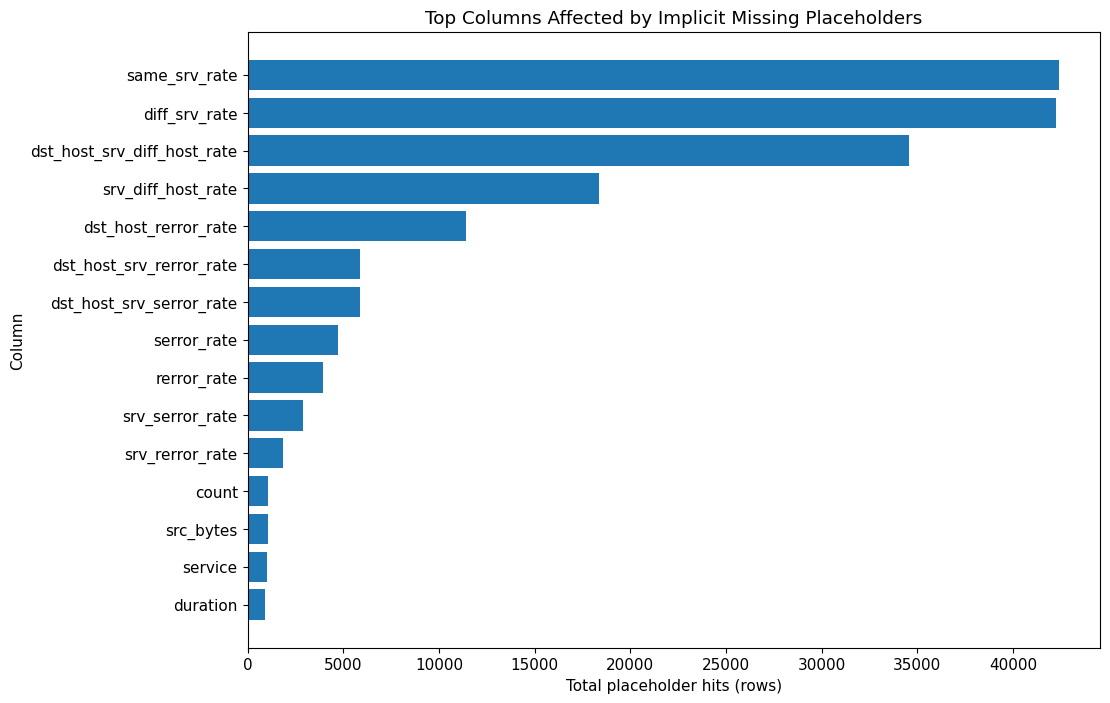

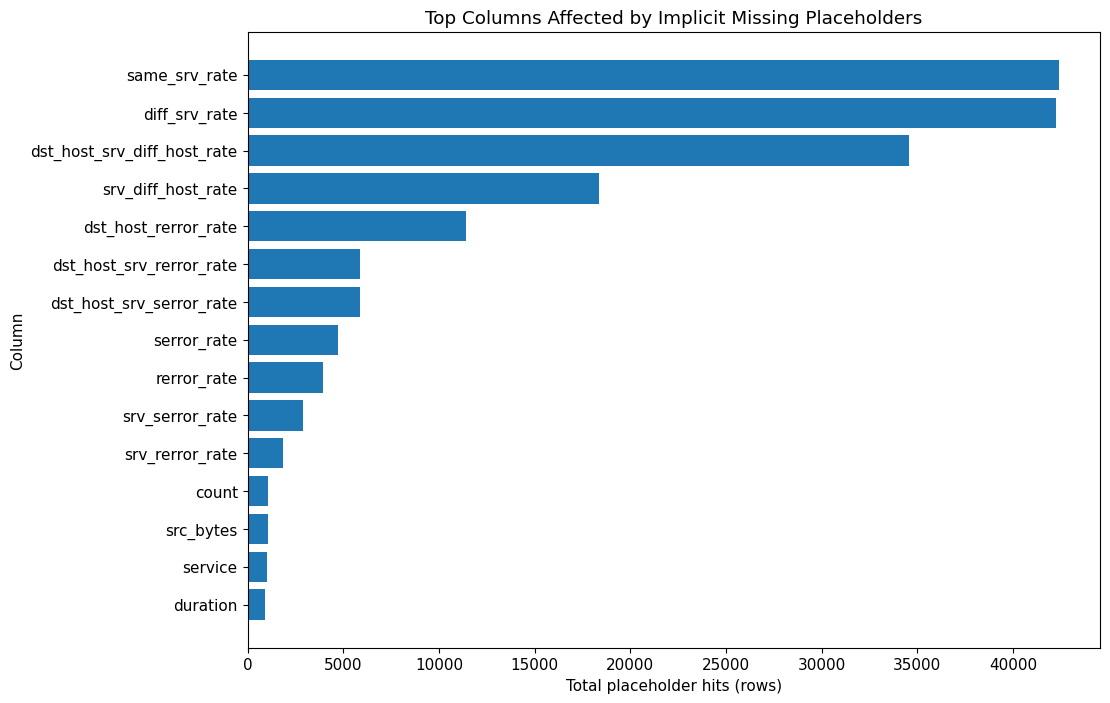

In [30]:
# ============================================================
# Sub-Step A5.4 — Visual: Top-N Columns by Placeholder Hits
# ============================================================

TOP_N = 15

fig, ax = plt.subplots()

if len(impacted_summary) == 0:
    ax.axis("off")
    ax.text(0.01, 0.5, "No implicit placeholder hits detected.\n(Bar chart not applicable.)",
            va="center", family="monospace")
else:
    plot_df = impacted_summary.head(TOP_N).iloc[::-1]  # reverse for horizontal bar readability
    ax.barh(plot_df["column"], plot_df["total_placeholder_hits"])
    ax.set_xlabel("Total placeholder hits (rows)")
    ax.set_ylabel("Column")
    ax.set_title("Top Columns Affected by Implicit Missing Placeholders")

add_fig_page_a5("STEP A5.4 — Visual: Top Columns by Placeholder Hits", fig)

fig

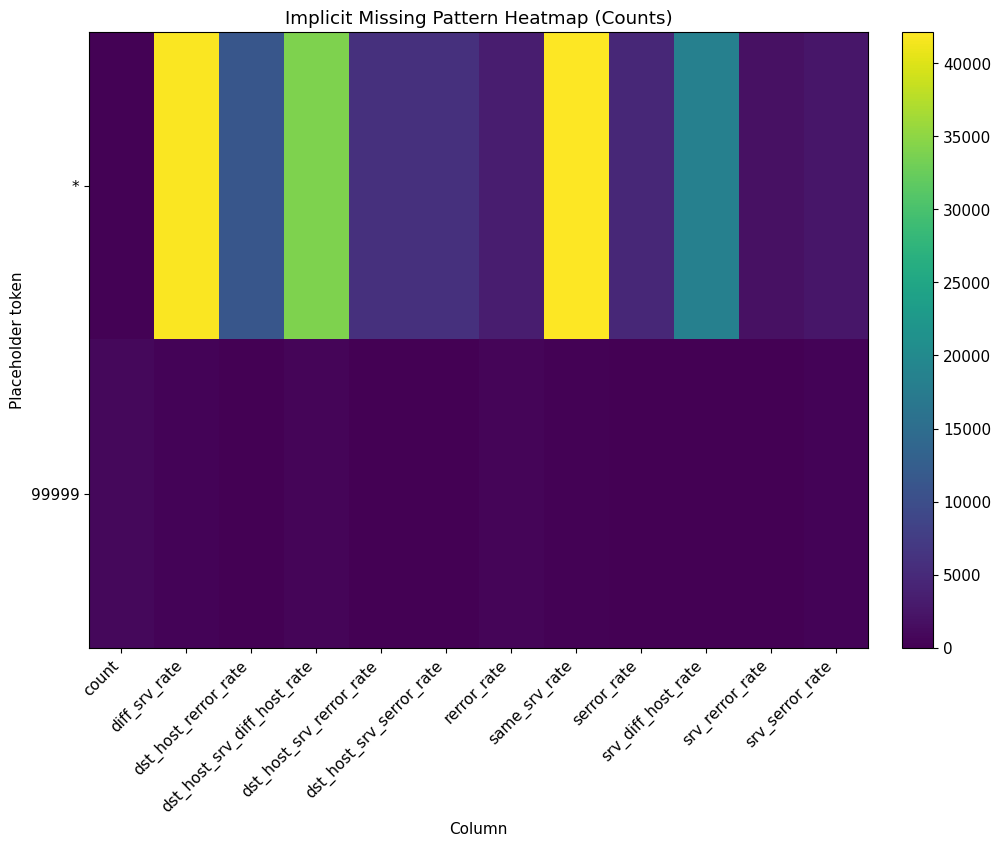

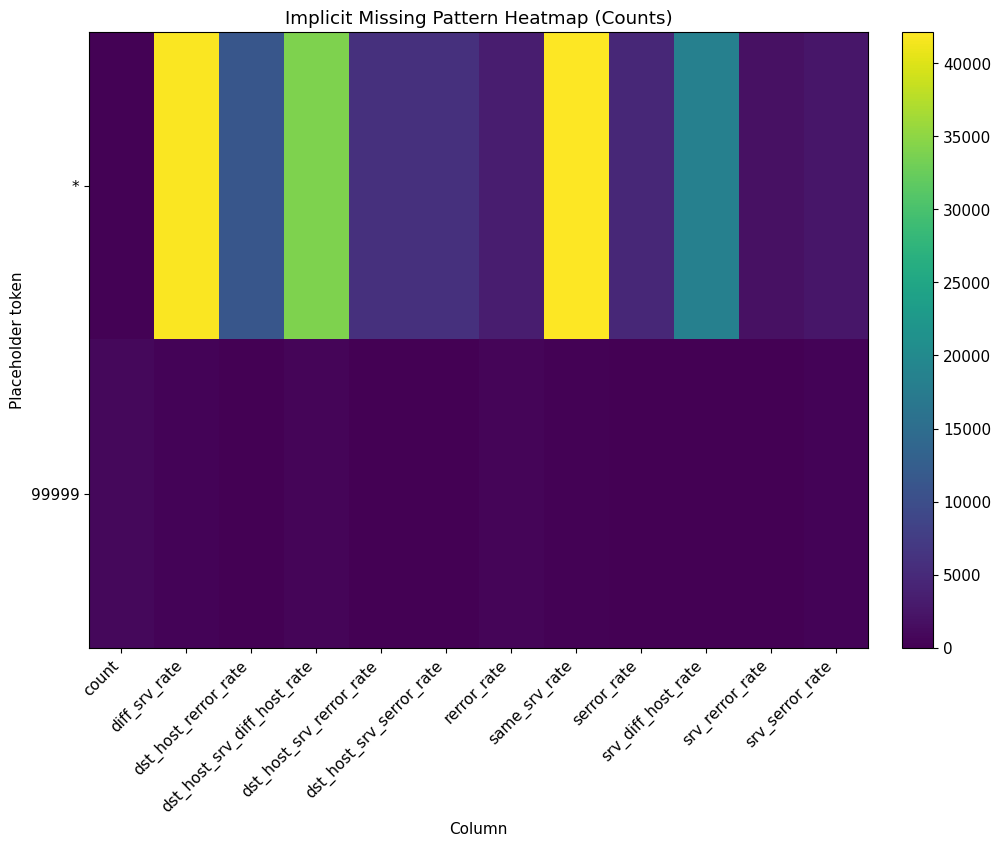

In [31]:
# ============================================================
# Sub-Step A5.5 — Visual: Heatmap Placeholder Token × Column
# ============================================================

TOP_COLS = 12  # agar heatmap readable

fig, ax = plt.subplots()

if len(placeholder_freq) == 0:
    ax.axis("off")
    ax.text(0.01, 0.5, "No implicit placeholder hits detected.\n(Heatmap not applicable.)",
            va="center", family="monospace")
else:
    top_cols = impacted_summary["column"].head(TOP_COLS).tolist()
    sub = placeholder_freq[placeholder_freq["column"].isin(top_cols)].copy()

    # pivot: rows=tokens, cols=columns, values=count
    pivot = sub.pivot_table(index="placeholder", columns="column", values="count", aggfunc="sum", fill_value=0)

    # order tokens by total
    pivot = pivot.loc[pivot.sum(axis=1).sort_values(ascending=False).index]

    im = ax.imshow(pivot.values, aspect="auto")
    ax.set_xticks(range(pivot.shape[1]))
    ax.set_xticklabels(pivot.columns, rotation=45, ha="right")
    ax.set_yticks(range(pivot.shape[0]))
    ax.set_yticklabels(pivot.index)

    ax.set_xlabel("Column")
    ax.set_ylabel("Placeholder token")
    ax.set_title("Implicit Missing Pattern Heatmap (Counts)")

    # colorbar (default)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

add_fig_page_a5("STEP A5.5 — Visual: Token × Column Heatmap (Counts)", fig)

fig

In [32]:
# ============================================================
# Sub-Step A5.6 — Export PDF (Finalize)
# ============================================================

render_report_a5(PDF_PATH_A5)

print(f"✅ PDF generated: {PDF_PATH_A5}")
display(FileLink(PDF_PATH_A5))

✅ PDF generated: EDA_STEP_A5_Implicit_Missing_Value_Analysis.pdf


/kaggle/working/EDA_STEP_A5_Implicit_Missing_Value_Analysis.pdf

__Insight Kesimpulan (Naratif)__

STEP A5 mengungkap bahwa masalah kualitas data terbesar dalam dataset ini adalah missing implisit, bukan missing eksplisit. Placeholder seperti * dan 99999 muncul secara masif dan sistematis, terutama pada fitur-fitur inti berbasis rate dan count.

Proporsi kemunculan placeholder yang mencapai 30–38% baris pada beberapa kolom menegaskan bahwa nilai tersebut tidak bisa diperlakukan sebagai nilai numerik valid. Visualisasi bar chart dan heatmap memperkuat bahwa pola ini konsisten lintas fitur dan bukan anomali lokal.

Dengan demikian, dataset ini tidak dapat diproses dengan preprocessing generik, dan penanganan missing implisit menjadi tahap kritis sebelum modeling.

## Duplicate & Record Integrity Check

In [33]:
# ============================================================
# STEP A6 — Report Setup (Collector)
# ============================================================

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

PDF_PATH_A6 = "EDA_STEP_A6_Duplicate_and_Record_Integrity_Check.pdf"
REPORT_PAGES_A6 = []

def add_text_page_a6(title: str, lines: list[str]):
    REPORT_PAGES_A6.append({"type": "text", "title": title, "lines": [str(x) for x in lines]})

def add_fig_page_a6(title: str, fig):
    REPORT_PAGES_A6.append({"type": "fig", "title": title, "fig": fig})

def render_report_a6(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped = []
        for line in lines:
            wrapped.extend(wrap(str(line), 110))
            wrapped.append("")
        ax.text(
            0.01, 0.98,
            f"{title}\n\n" + "\n".join(wrapped),
            va="top", ha="left", family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_A6:
            if page["type"] == "text":
                fig, ax = plt.subplots()
                _render_text(ax, page["title"], page["lines"])
                pdf.savefig(fig)
                plt.close(fig)
            elif page["type"] == "fig":
                page["fig"].suptitle(page["title"], y=0.98)
                pdf.savefig(page["fig"])
                plt.close(page["fig"])

print("✅ Collector STEP A6 siap. Lanjut A6.1")

✅ Collector STEP A6 siap. Lanjut A6.1


In [34]:
# ============================================================
# Sub-Step A6.1 — Full Row Duplicate Detection
# ============================================================

dup_mask = df.duplicated(keep=False)
dup_count = int(dup_mask.sum())
total_rows = len(df)
dup_ratio = dup_count / total_rows

add_text_page_a6(
    title="STEP A6.1 — Full Row Duplicate Detection",
    lines=[
        "Purpose:",
        "- Detect exact duplicate rows across ALL columns",
        "",
        f"Total rows              : {total_rows}",
        f"Duplicate rows (count)  : {dup_count}",
        f"Duplicate rows (ratio)  : {dup_ratio:.6f}",
        "",
        "Note:",
        "- keep=False counts all rows involved in duplication groups"
    ]
)

dup_count, dup_ratio

(2230, 0.01983174145812212)

In [35]:
# ============================================================
# Sub-Step A6.2 — Duplicate Group Size Distribution
# ============================================================

if dup_count > 0:
    dup_groups = (
        df[dup_mask]
        .groupby(list(df.columns))
        .size()
        .value_counts()
        .sort_index()
    )
else:
    dup_groups = None

add_text_page_a6(
    title="STEP A6.2 — Duplicate Group Size Distribution",
    lines=[
        "Purpose:",
        "- Inspect size of duplicate groups (pairs vs clusters)",
        "",
        "Group size distribution (group_size: number_of_groups):",
        dup_groups.to_string() if dup_groups is not None else "No duplicate groups detected."
    ]
)

dup_groups

2     610
3      77
4      57
5      28
6       9
7       8
8       4
9       2
10      6
11      3
12      3
15      2
16      1
25      1
27      1
Name: count, dtype: int64

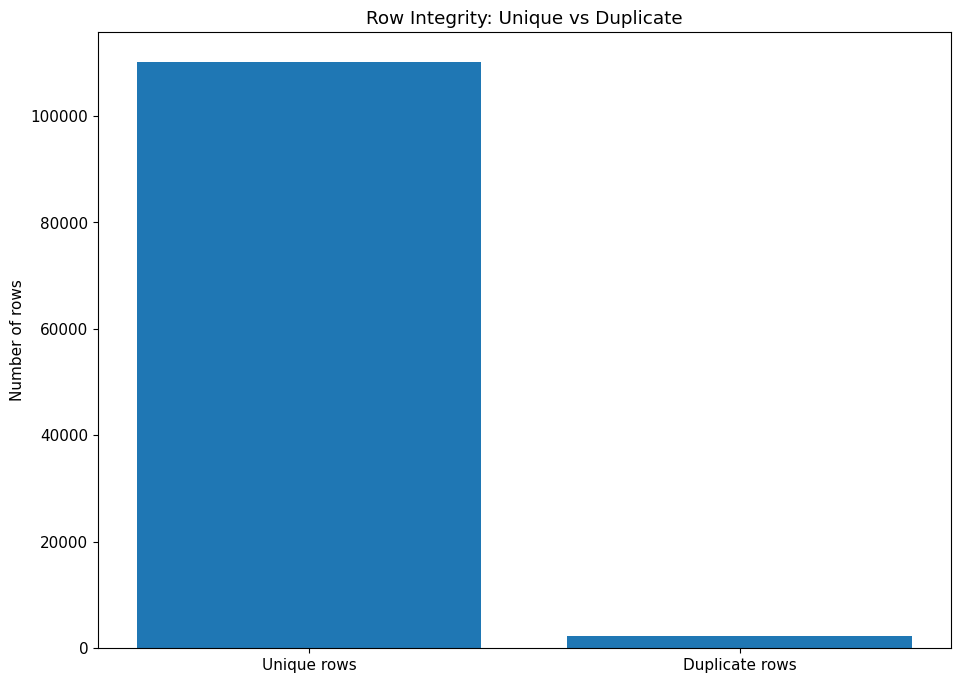

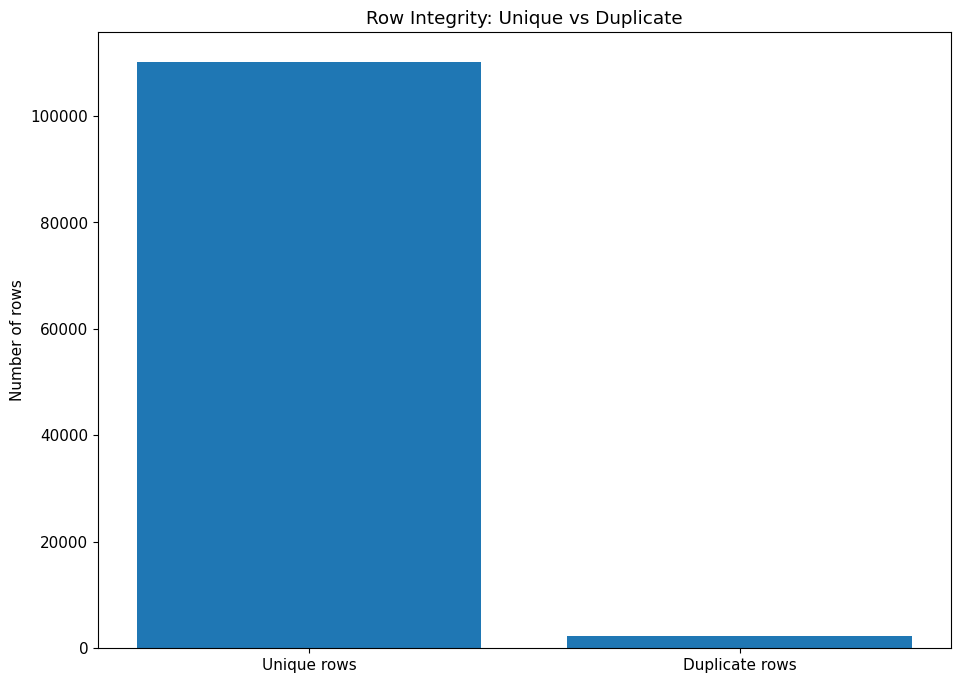

In [36]:
# ============================================================
# Sub-Step A6.3 — Visual: Duplicate vs Unique Proportion
# ============================================================

fig, ax = plt.subplots()

unique_count = total_rows - dup_count
ax.bar(["Unique rows", "Duplicate rows"], [unique_count, dup_count])
ax.set_ylabel("Number of rows")
ax.set_title("Row Integrity: Unique vs Duplicate")

add_fig_page_a6("STEP A6.3 — Visual: Unique vs Duplicate Rows", fig)

fig

In [37]:
# ============================================================
# Sub-Step A6.4 — Candidate ID / Flow-like Columns
# ============================================================

# Heuristic: unique ratio tinggi
unique_ratio = df.nunique(dropna=False) / total_rows
candidate_id_cols = unique_ratio[unique_ratio > 0.9].sort_values(ascending=False)

add_text_page_a6(
    title="STEP A6.4 — Candidate ID / Flow-like Columns (Heuristic)",
    lines=[
        "Purpose:",
        "- Identify columns with very high uniqueness (ID / flow candidates)",
        "",
        "Heuristic:",
        "- unique_ratio > 0.9",
        "",
        "Candidate columns (sorted desc):",
        candidate_id_cols.to_string()
    ]
)

candidate_id_cols

Series([], dtype: float64)

In [38]:
# ============================================================
# Sub-Step A6.5 — Record Integrity Notes
# ============================================================

notes = [
    f"Exact duplicate rows detected: {dup_count} ({dup_ratio:.6f} of total rows).",
    "Duplicate pattern indicates " + (
        "possible repeated logging / flow duplication." if dup_count > 0 else "no evidence of repeated logging."
    ),
    "Candidate ID/flow-like columns listed for further inspection (if any).",
    "No deduplication performed at EDA stage."
]

add_text_page_a6(
    title="STEP A6.5 — Record Integrity Notes (EDA-only)",
    lines=[
        "Purpose:",
        "- Summarize early integrity observations",
        "",
        *notes
    ]
)

notes

['Exact duplicate rows detected: 2230 (0.019832 of total rows).',
 'Duplicate pattern indicates possible repeated logging / flow duplication.',
 'Candidate ID/flow-like columns listed for further inspection (if any).',
 'No deduplication performed at EDA stage.']

In [39]:
# ============================================================
# Sub-Step A6.6 — Export PDF (Finalize)
# ============================================================

render_report_a6(PDF_PATH_A6)

print(f"✅ PDF generated: {PDF_PATH_A6}")
display(FileLink(PDF_PATH_A6))

✅ PDF generated: EDA_STEP_A6_Duplicate_and_Record_Integrity_Check.pdf


/kaggle/working/EDA_STEP_A6_Duplicate_and_Record_Integrity_Check.pdf

__Insight Kesimpulan__

Pada STEP A6, integritas baris data menunjukkan bahwa dataset tidak sepenuhnya unik, dengan sekitar 2% record merupakan exact duplicate. Proporsi ini memang tidak mendominasi dataset, namun cukup besar untuk berdampak nyata pada pembelajaran model, terutama pada model yang sensitif terhadap frekuensi kemunculan pola.

Distribusi ukuran grup duplikasi memberikan informasi penting bahwa duplikasi tidak hanya terjadi secara sederhana (pasangan), tetapi juga membentuk klaster-klaster besar dengan ukuran hingga puluhan baris identik. Pola ini menyingkirkan hipotesis bahwa duplikasi semata-mata berasal dari kesalahan teknis ringan (misalnya double insert), dan lebih mengarah pada mekanisme logging berulang terhadap flow yang sama atau pencatatan berulang terhadap kejadian jaringan yang persisten.

Ketiadaan kolom dengan rasio unik sangat tinggi (>90%) memperkuat indikasi bahwa dataset ini tidak memiliki primary key eksplisit atau flow identifier tunggal. Dengan demikian, duplikasi muncul sebagai hasil kombinasi kondisi fitur, bukan karena satu kolom ID yang berulang. Ini merupakan karakteristik khas dataset intrusion detection berbasis log mentah, di mana satu aktivitas jaringan dapat terekam berkali-kali tanpa penanda unik yang jelas.

Visualisasi perbandingan baris unik dan duplikat menegaskan bahwa meskipun mayoritas data bersifat unik, duplikasi bukan anomali yang dapat diabaikan. Keberadaan klaster duplikasi besar berpotensi memperbesar pengaruh pola tertentu secara tidak proporsional, terutama jika pola tersebut berkorelasi dengan kelas serangan tertentu.

Secara keseluruhan, STEP A6 mengonfirmasi bahwa dataset masih valid secara struktural, namun mengandung bias frekuensi laten akibat duplikasi record. Duplikasi ini tidak otomatis berarti data “buruk”, tetapi ia mengubah makna statistik data: frekuensi kemunculan sebuah pola bisa mencerminkan intensitas logging, bukan intensitas fenomena sebenarnya. Oleh karena itu, keputusan terkait deduplikasi tidak boleh bersifat mekanis, melainkan harus diposisikan sebagai keputusan strategis dalam preprocessing dan desain eksperimen modeling.

## Extreme & Absurd Value Scan

In [40]:
# ============================================================
# STEP A7 — Report Setup (Collector)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

PDF_PATH_A7 = "EDA_STEP_A7_Extreme_and_Absurd_Value_Scan.pdf"
REPORT_PAGES_A7 = []

def add_text_page_a7(title: str, lines: list[str]):
    REPORT_PAGES_A7.append({"type": "text", "title": title, "lines": [str(x) for x in lines]})

def add_fig_page_a7(title: str, fig):
    REPORT_PAGES_A7.append({"type": "fig", "title": title, "fig": fig})

def render_report_a7(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped = []
        for line in lines:
            wrapped.extend(wrap(str(line), 110))
            wrapped.append("")
        ax.text(
            0.01, 0.98,
            f"{title}\n\n" + "\n".join(wrapped),
            va="top", ha="left", family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_A7:
            if page["type"] == "text":
                fig, ax = plt.subplots()
                _render_text(ax, page["title"], page["lines"])
                pdf.savefig(fig)
                plt.close(fig)
            elif page["type"] == "fig":
                page["fig"].suptitle(page["title"], y=0.98)
                pdf.savefig(page["fig"])
                plt.close(page["fig"])

print("✅ Collector STEP A7 siap. Lanjut A7.1")

✅ Collector STEP A7 siap. Lanjut A7.1


In [41]:
# ============================================================
# Sub-Step A7.1 — Candidate Numeric Columns
# ============================================================

# numeric asli
native_numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# object-numeric-safe dari STEP A3 (diasumsikan sudah ada)
# Jika belum ada di memory, kita rekontruksi minimal (safe list dari A3)
object_numeric_safe = [
    'duration','dst_bytes','land','wrong_fragment','urgent','hot',
    'num_failed_logins','logged_in','num_compromised','root_shell',
    'su_attempted','num_root','num_file_creations','num_shells',
    'num_access_files','num_outbound_cmds','is_host_login','is_guest_login',
    'count','srv_count','srv_serror_rate','rerror_rate','srv_rerror_rate',
    'dst_host_count','dst_host_srv_count'
]

candidate_numeric_cols = sorted(set(native_numeric_cols + object_numeric_safe))

add_text_page_a7(
    title="STEP A7.1 — Candidate Numeric Columns",
    lines=[
        "Purpose:",
        "- Identify semantically numeric columns for extreme/absurd scan",
        "",
        f"Total candidate numeric columns: {len(candidate_numeric_cols)}",
        "",
        "Candidate numeric columns:",
        candidate_numeric_cols
    ]
)

candidate_numeric_cols

['count',
 'dst_bytes',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'duration',
 'hot',
 'is_guest_login',
 'is_host_login',
 'land',
 'logged_in',
 'num_access_files',
 'num_compromised',
 'num_failed_logins',
 'num_file_creations',
 'num_outbound_cmds',
 'num_root',
 'num_shells',
 'rerror_rate',
 'root_shell',
 'srv_count',
 'srv_rerror_rate',
 'srv_serror_rate',
 'su_attempted',
 'urgent',
 'wrong_fragment']

In [42]:
# ============================================================
# Sub-Step A7.2 — Min–Max Scan (Raw)
# ============================================================

minmax_records = []

for col in candidate_numeric_cols:
    s = pd.to_numeric(df[col], errors="coerce")
    minmax_records.append({
        "column": col,
        "min_value": s.min(),
        "max_value": s.max()
    })

minmax_df = pd.DataFrame(minmax_records).sort_values("max_value", ascending=False)

add_text_page_a7(
    title="STEP A7.2 — Min–Max Scan (Raw)",
    lines=[
        "Purpose:",
        "- Detect negative, zero-extreme, or absurd max values",
        "",
        minmax_df.to_string(index=False)
    ]
)

minmax_df

column  min_value     max_value
1                     dst_bytes        0.0  1.309937e+09
0                         count        0.0  9.999900e+04
2                dst_host_count        0.0  9.999900e+04
3        dst_host_diff_srv_rate        0.0  9.999900e+04
4   dst_host_same_src_port_rate        0.0  9.999900e+04
5        dst_host_same_srv_rate        0.0  9.999900e+04
6          dst_host_serror_rate        0.0  9.999900e+04
7            dst_host_srv_count        0.0  9.999900e+04
8                      duration        0.0  9.999900e+04
10               is_guest_login        0.0  9.999900e+04
12                         land        0.0  9.999900e+04
15              num_compromised        0.0  9.999900e+04
14             num_access_files        0.0  9.999900e+04
25              srv_serror_rate        0.0  9.999900e+04
26                 su_attempted        0.0  9.999900e+04
16            num_failed_logins        0.0  9.999900e+04
20                   num_shells        0.0  9.999900e+04
24              srv_rerror_rate        0.0  9.999900e+04
23                    srv_count        0.0  9.999900e+04
22                   root_shell        0.0  9.999900e+04
21                  rerror_rate        0.0  9.999900e+04
27                       urgent        0.0  9.999900e+04
19                     num_root        0.0  7.468000e+03
9                           hot        0.0  7.700000e+01
17           num_file_creations        0.0  4.300000e+01
28               wrong_fragment        0.0  3.000000e+00
11                is_host_login        0.0  1.000000e+00
13                    logged_in        0.0  1.000000e+00
18            num_outbound_cmds        0.0  0.000000e+00

In [43]:
# ============================================================
# Sub-Step A7.3 — Negative Value Scan (SAFE VERSION)
# ============================================================

negative_records = []

for col in candidate_numeric_cols:
    s = pd.to_numeric(df[col], errors="coerce")
    neg_count = int((s < 0).sum())
    if neg_count > 0:
        negative_records.append({
            "column": col,
            "negative_count": neg_count,
            "negative_ratio": neg_count / len(s)
        })

# --- HANDLE EMPTY CASE SAFELY ---
if len(negative_records) == 0:
    negative_df = pd.DataFrame(
        columns=["column", "negative_count", "negative_ratio"]
    )
else:
    negative_df = (
        pd.DataFrame(negative_records)
        .sort_values("negative_count", ascending=False)
    )

add_text_page_a7(
    title="STEP A7.3 — Negative Value Scan",
    lines=[
        "Purpose:",
        "- Identify columns with negative values where domain expects non-negative",
        "",
        negative_df.to_string(index=False)
        if not negative_df.empty
        else "No negative values detected in candidate numeric columns."
    ]
)

negative_df

Empty DataFrame
Columns: [column, negative_count, negative_ratio]
Index: []

In [44]:
# ============================================================
# Sub-Step A7.4 — Zero-Extreme Scan
# ============================================================

zero_records = []

for col in candidate_numeric_cols:
    s = pd.to_numeric(df[col], errors="coerce")
    zero_cnt = int((s == 0).sum())
    if zero_cnt > 0:
        zero_records.append({
            "column": col,
            "zero_count": zero_cnt,
            "zero_ratio": zero_cnt / len(s)
        })

zero_df = pd.DataFrame(zero_records).sort_values("zero_ratio", ascending=False)

add_text_page_a7(
    title="STEP A7.4 — Zero-Extreme Scan",
    lines=[
        "Purpose:",
        "- Identify columns dominated by zero values",
        "",
        zero_df.head(30).to_string(index=False)
    ]
)

zero_df.head(20)

column  zero_count  zero_ratio
11         is_host_login      112369    0.999315
18     num_outbound_cmds      112260    0.998346
26          su_attempted      112100    0.996923
27                urgent      112073    0.996683
12                  land      112015    0.996167
22            root_shell      112009    0.996114
17    num_file_creations      111973    0.995794
20            num_shells      111921    0.995331
16     num_failed_logins      111800    0.994255
19              num_root      111653    0.992948
14      num_access_files      111500    0.991587
10        is_guest_login      111241    0.989284
28        wrong_fragment      110958    0.986767
15       num_compromised      110875    0.986029
9                    hot      109574    0.974459
8               duration      102916    0.915248
24       srv_rerror_rate       97377    0.865989
21           rerror_rate       97130    0.863792
25       srv_serror_rate       78336    0.696654
6   dst_host_serror_rate       72105    0.641241

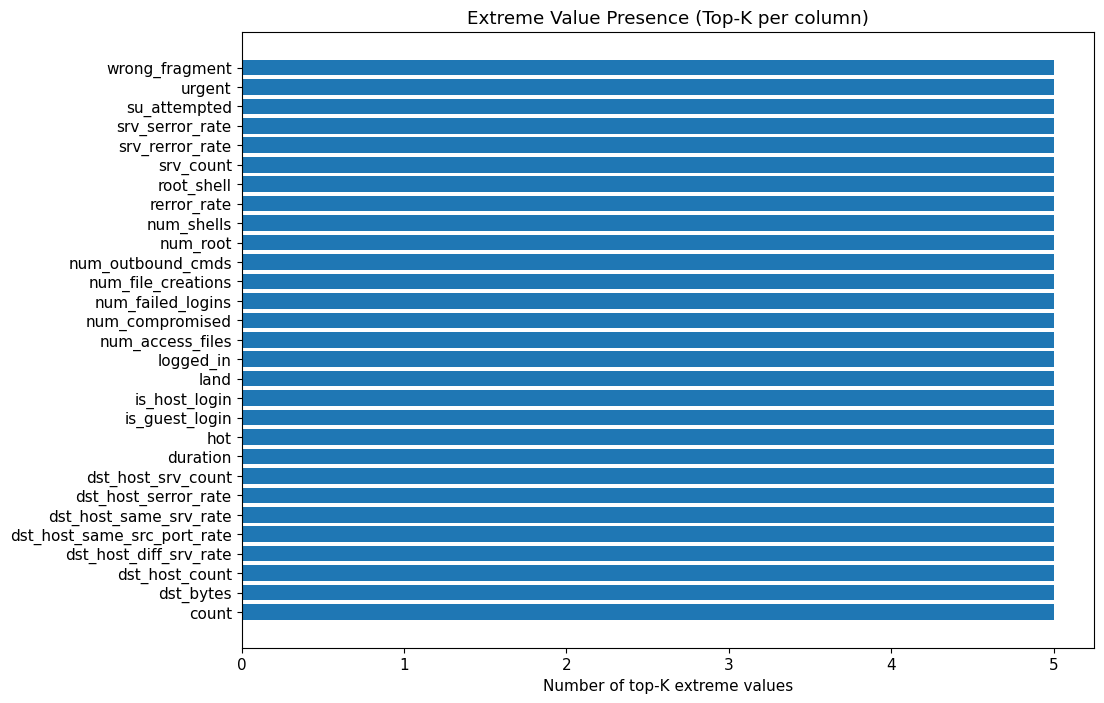

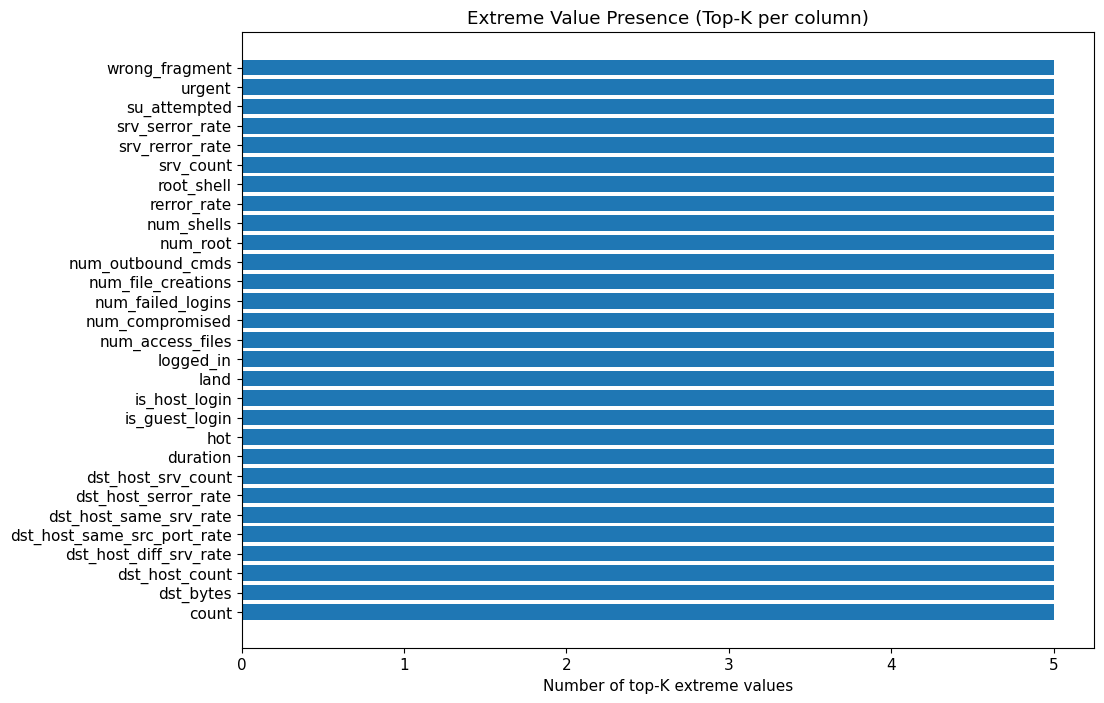

In [45]:
# ============================================================
# Sub-Step A7.5 — Distribution Glimpse (Top-K Extremes)
# ============================================================

TOP_K = 5

fig, ax = plt.subplots()

extreme_summary = []

for col in candidate_numeric_cols:
    s = pd.to_numeric(df[col], errors="coerce")
    top_vals = s.sort_values(ascending=False).head(TOP_K).values
    for v in top_vals:
        extreme_summary.append({"column": col, "extreme_value": v})

extreme_df = pd.DataFrame(extreme_summary)

# simple scatter-like bar (count of extreme appearances)
counts = extreme_df.groupby("column").size().sort_values(ascending=False)

ax.barh(counts.index, counts.values)
ax.set_xlabel("Number of top-K extreme values")
ax.set_title("Extreme Value Presence (Top-K per column)")

add_fig_page_a7("STEP A7.5 — Visual: Extreme Value Presence (Top-K)", fig)

fig

In [46]:
# ============================================================
# Sub-Step A7.6 — Absurd Value Candidates & Risk Notes
# ============================================================

absurd_notes = []

for _, r in minmax_df.iterrows():
    if r["max_value"] is not None and r["max_value"] > 1e5:
        absurd_notes.append(f"{r['column']}: extremely large max value ({r['max_value']})")

if len(negative_df) > 0:
    for _, r in negative_df.iterrows():
        absurd_notes.append(f"{r['column']}: contains negative values ({r['negative_count']} rows)")

add_text_page_a7(
    title="STEP A7.6 — Absurd Value Candidates & Risk Notes",
    lines=[
        "Purpose:",
        "- Summarize columns with potentially absurd values (EDA-only)",
        "",
        absurd_notes if absurd_notes else "No obvious absurd numeric values detected under current criteria."
    ]
)

absurd_notes

['dst_bytes: extremely large max value (1309937401.0)']

In [47]:
# ============================================================
# Sub-Step A7.7 — Export PDF (Finalize)
# ============================================================

render_report_a7(PDF_PATH_A7)

print(f"✅ PDF generated: {PDF_PATH_A7}")
display(FileLink(PDF_PATH_A7))

✅ PDF generated: EDA_STEP_A7_Extreme_and_Absurd_Value_Scan.pdf


/kaggle/working/EDA_STEP_A7_Extreme_and_Absurd_Value_Scan.pdf

__Insight Kesimpulan__

STEP A7 menegaskan bahwa dataset ini bersih dari kesalahan numerik kasar seperti nilai negatif tak wajar, namun mengandung pola ekstrem yang bersifat sistematis, bukan acak. Hampir seluruh fitur numerik memiliki batas bawah yang konsisten (nol), menandakan bahwa proses logging dan parsing data berjalan dengan baik dari sisi tipe dan domain dasar.

Namun, batas atas fitur mengungkap dua fenomena penting. Pertama, kemunculan nilai 99999 secara luas dan konsisten di berbagai kolom menunjukkan bahwa nilai ini berperan sebagai sentinel implisit, bukan nilai observasi alami. Hal ini konsisten dengan temuan pada STEP A5 (missing implisit), sehingga memperkuat hipotesis bahwa dataset menggunakan nilai ekstrem sebagai representasi status tertentu (misalnya not applicable, overflow, atau undefined state).

Kedua, fitur dst_bytes menonjol dengan skala maksimum yang jauh melampaui fitur lain, mengindikasikan adanya ketimpangan skala ekstrem dalam representasi traffic. Ketimpangan ini bukan sekadar variasi normal, tetapi berpotensi mendominasi perilaku model jika tidak ditangani secara eksplisit.

Zero-extreme scan mengungkap bahwa banyak fitur bersifat highly sparse secara semantik, di mana nol merepresentasikan kondisi normal dan nilai non-nol merepresentasikan kejadian langka namun signifikan. Dengan demikian, nol pada dataset ini tidak dapat diperlakukan sebagai nilai netral tanpa makna, melainkan bagian integral dari logika IDS.

Secara keseluruhan, STEP A7 menunjukkan bahwa tantangan utama dataset bukan kesalahan numerik, melainkan interpretasi nilai ekstrem dan sentinel. Dataset ini valid secara struktural, tetapi memerlukan kebijakan preprocessing berbasis domain, bukan teknik generik.

## Inconsistency & Categorical Hygiene Check

In [48]:
# ============================================================
# STEP A8 — Report Setup (Collector)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

PDF_PATH_A8 = "EDA_STEP_A8_Categorical_Hygiene_Check.pdf"
REPORT_PAGES_A8 = []

def add_text_page_a8(title: str, lines: list[str]):
    REPORT_PAGES_A8.append({"type": "text", "title": title, "lines": [str(x) for x in lines]})

def add_fig_page_a8(title: str, fig):
    REPORT_PAGES_A8.append({"type": "fig", "title": title, "fig": fig})

def render_report_a8(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped = []
        for line in lines:
            wrapped.extend(wrap(str(line), 110))
            wrapped.append("")
        ax.text(
            0.01, 0.98,
            f"{title}\n\n" + "\n".join(wrapped),
            va="top", ha="left", family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_A8:
            if page["type"] == "text":
                fig, ax = plt.subplots()
                _render_text(ax, page["title"], page["lines"])
                pdf.savefig(fig)
                plt.close(fig)
            elif page["type"] == "fig":
                page["fig"].suptitle(page["title"], y=0.98)
                pdf.savefig(page["fig"])
                plt.close(page["fig"])

print("✅ Collector STEP A8 siap. Lanjut A8.1")

✅ Collector STEP A8 siap. Lanjut A8.1


In [49]:
# ============================================================
# Sub-Step A8.1 — Identify Categorical Candidates
# ============================================================

# True categorical based on STEP A3 output
categorical_cols = ["protocol_type", "type_of_attack"]

# Keep only those present (safety)
categorical_cols = [c for c in categorical_cols if c in df.columns]

add_text_page_a8(
    title="STEP A8.1 — Categorical Columns in Scope",
    lines=[
        "Purpose:",
        "- Define categorical columns to audit (text hygiene)",
        "",
        "Categorical columns:",
        categorical_cols
    ]
)

categorical_cols

['protocol_type', 'type_of_attack']

In [50]:
# ============================================================
# Sub-Step A8.2 — Casing Inconsistency Check
# ============================================================

casing_records = []

for col in categorical_cols:
    s_raw = df[col].astype(str)
    uniq_raw = set(s_raw.dropna().unique())

    s_lower = s_raw.str.lower()
    uniq_lower = set(s_lower.dropna().unique())

    # if mapping raw->lower collapses categories, casing inconsistency likely
    casing_issue = len(uniq_lower) < len(uniq_raw)

    casing_records.append({
        "column": col,
        "unique_raw": len(uniq_raw),
        "unique_lower": len(uniq_lower),
        "casing_issue": casing_issue
    })

casing_df = pd.DataFrame(casing_records)

add_text_page_a8(
    title="STEP A8.2 — Casing Inconsistency (raw vs lower)",
    lines=[
        "Purpose:",
        "- Detect casing differences that split categories",
        "",
        casing_df.to_string(index=False)
    ]
)

casing_df

column  unique_raw  unique_lower  casing_issue
0   protocol_type           4             4         False
1  type_of_attack           8             8         False

In [51]:
# ============================================================
# Sub-Step A8.3 — Whitespace Inconsistency (raw vs strip)
# ============================================================

space_records = []

for col in categorical_cols:
    s_raw = df[col].astype(str)
    uniq_raw = set(s_raw.dropna().unique())

    s_strip = s_raw.str.strip()
    uniq_strip = set(s_strip.dropna().unique())

    space_issue = len(uniq_strip) < len(uniq_raw)

    space_records.append({
        "column": col,
        "unique_raw": len(uniq_raw),
        "unique_strip": len(uniq_strip),
        "whitespace_issue": space_issue
    })

space_df = pd.DataFrame(space_records)

add_text_page_a8(
    title="STEP A8.3 — Whitespace Inconsistency (raw vs strip)",
    lines=[
        "Purpose:",
        "- Detect trailing/leading spaces that split categories",
        "",
        space_df.to_string(index=False)
    ]
)

space_df

column  unique_raw  unique_strip  whitespace_issue
0   protocol_type           4             4             False
1  type_of_attack           8             8             False

In [52]:
# ============================================================
# Sub-Step A8.4 — Normalized Collision Examples (strip+lower)
# ============================================================

collision_outputs = []

for col in categorical_cols:
    s_raw = df[col].astype(str)
    s_norm = s_raw.str.strip().str.lower()

    # map normalized -> set(raw variants)
    mapping = (
        pd.DataFrame({"raw": s_raw, "norm": s_norm})
        .dropna()
        .groupby("norm")["raw"]
        .apply(lambda x: sorted(set(x)))
    )

    collisions = mapping[mapping.apply(len) > 1]
    # keep only top 20 collisions for readability
    collisions = collisions.head(20)

    collision_outputs.append((col, collisions))

# Build a readable text block
lines = ["Purpose:", "- Show raw category variants that collapse under strip+lower", ""]
for col, collisions in collision_outputs:
    lines.append(f"[{col}] collisions (top 20):")
    lines.append(collisions.to_string() if len(collisions) else "No collisions detected.")
    lines.append("")

add_text_page_a8(
    title="STEP A8.4 — Normalized Collision Report (strip+lower)",
    lines=lines
)

collision_outputs

[('protocol_type', Series([], Name: raw, dtype: object)),
 ('type_of_attack', Series([], Name: raw, dtype: object))]

type_of_attack
normal                      60538
neptune                     37142
ipsweep                      3254
satan                        3248
portsweep                    2687
smurf                        2394
Denial of Service Attack     1861
nmap                         1322
Name: count, dtype: int64

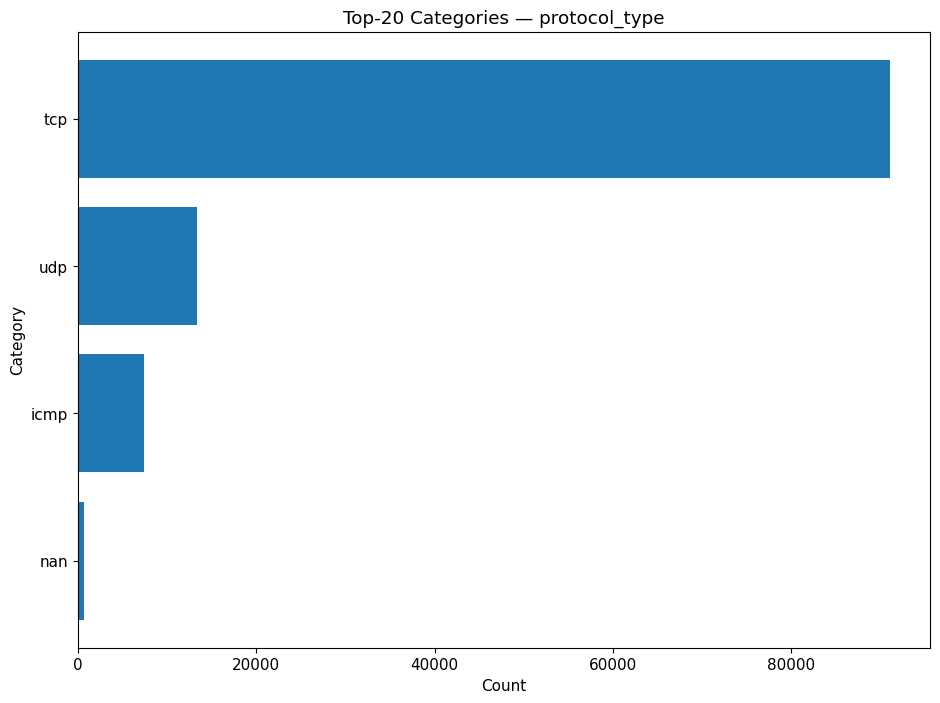

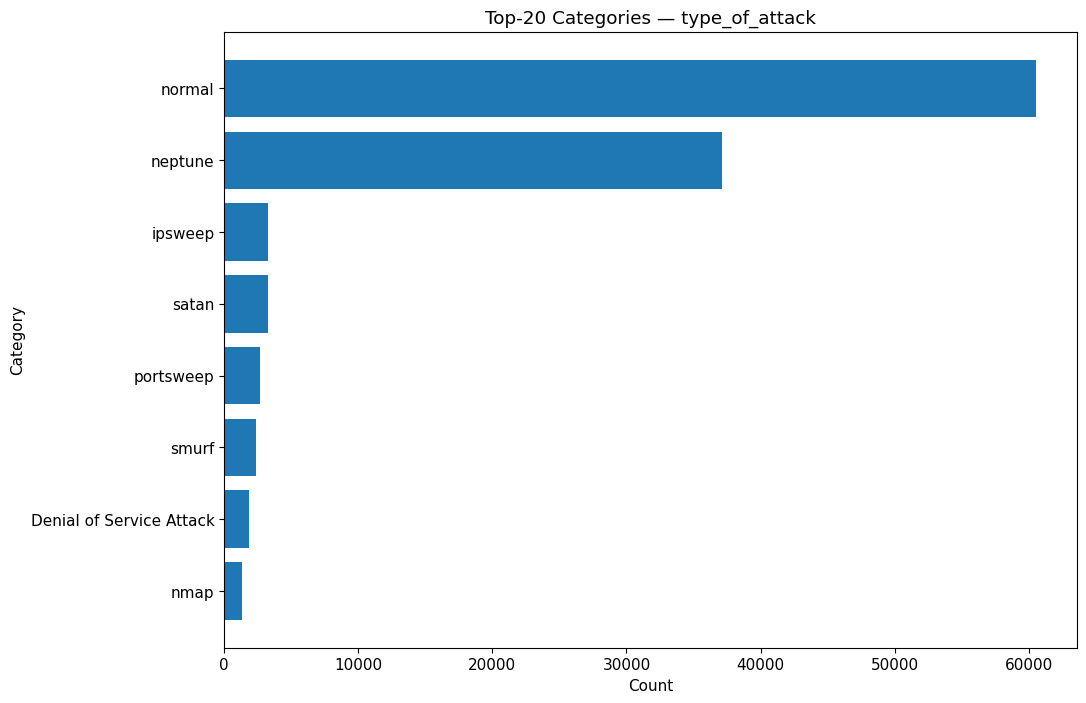

In [53]:
# ============================================================
# Sub-Step A8.5 — Category Distribution (Top-K) + Visual
# ============================================================

TOP_K = 20

for col in categorical_cols:
    vc = df[col].astype(str).value_counts(dropna=False).head(TOP_K)
    add_text_page_a8(
        title=f"STEP A8.5 — Top-{TOP_K} Category Distribution: {col}",
        lines=[
            "Purpose:",
            "- Inspect category distribution for typos / long-tail / rare labels",
            "",
            vc.to_string()
        ]
    )

    # Visual bar (Top-K)
    fig, ax = plt.subplots()
    ax.barh(vc.index[::-1], vc.values[::-1])
    ax.set_xlabel("Count")
    ax.set_ylabel("Category")
    ax.set_title(f"Top-{TOP_K} Categories — {col}")
    add_fig_page_a8(f"STEP A8.5 — Visual: Top-{TOP_K} Categories ({col})", fig)

# Return last computed vc for notebook feedback
vc

In [54]:
# ============================================================
# Sub-Step A8.6 — Problem Summary & Encoding Risk Notes
# ============================================================

problem_cols = []

for i, col in enumerate(categorical_cols):
    casing_issue = bool(casing_df.loc[casing_df["column"] == col, "casing_issue"].iloc[0])
    space_issue  = bool(space_df.loc[space_df["column"] == col, "whitespace_issue"].iloc[0])

    if casing_issue or space_issue:
        problem_cols.append(col)

notes = []
if len(problem_cols) == 0:
    notes.append("No categorical hygiene issues detected (casing/whitespace) for scoped categorical columns.")
else:
    notes.append(f"Problematic categorical columns detected: {problem_cols}")
    notes.append("Encoding risks:")
    notes.append("- One-hot/label encoding will split equivalent categories into multiple dummy variables if not normalized.")
    notes.append("- Rare categories might be typos; may inflate cardinality and add noise.")

add_text_page_a8(
    title="STEP A8.6 — Problematic Categorical Columns & Encoding Risk Notes",
    lines=[
        "Purpose:",
        "- Summarize categorical hygiene issues and encoding risks (EDA-only)",
        "",
        *notes
    ]
)

problem_cols, notes

([],
 ['No categorical hygiene issues detected (casing/whitespace) for scoped categorical columns.'])

In [55]:
# ============================================================
# Sub-Step A8.7 — Export PDF (Finalize)
# ============================================================

render_report_a8(PDF_PATH_A8)

print(f"✅ PDF generated: {PDF_PATH_A8}")
display(FileLink(PDF_PATH_A8))

✅ PDF generated: EDA_STEP_A8_Categorical_Hygiene_Check.pdf


/kaggle/working/EDA_STEP_A8_Categorical_Hygiene_Check.pdf

__Insight Kesimpulan (Naratif)__

STEP A8 menunjukkan bahwa kebersihan tekstual kategori pada dataset ini sangat baik. Tidak ditemukan inkonsistensi casing, whitespace, maupun variasi ejaan yang biasanya menjadi sumber masalah serius pada encoding kategorikal. Hal ini mengindikasikan bahwa label kategori tidak berasal dari input bebas atau proses manual yang rentan kesalahan, melainkan dari sistem logging atau skema pelabelan terkontrol.

Distribusi kategori mengungkap dua hal penting. Pertama, untuk protocol_type, dominasi TCP merupakan refleksi realistis dari trafik jaringan aktual, sementara kemunculan "nan" (string) memperkuat temuan sebelumnya bahwa dataset menggunakan placeholder implisit, bukan NaN eksplisit. Kedua, pada type_of_attack, ketimpangan distribusi kelas sangat jelas, dengan beberapa jenis serangan mendominasi dan banyak kelas minoritas membentuk ekor panjang (long-tail).

Dengan demikian, STEP A8 menegaskan bahwa tantangan utama dataset bukan kebersihan label kategorikal, melainkan ketidakseimbangan distribusi dan interpretasi nilai khusus. Secara struktural dan tekstual, kategori berada dalam kondisi siap pakai untuk tahap modeling.

## Row-Level Data Integrity & Anomaly Density Check

In [56]:
# ============================================================
# STEP A9 — Report Setup (Collector)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

PDF_PATH_A9 = "EDA_STEP_A9_Row_Level_Integrity_and_Anomaly_Density.pdf"
REPORT_PAGES_A9 = []

def add_text_page_a9(title: str, lines: list[str]):
    REPORT_PAGES_A9.append({"type": "text", "title": title, "lines": [str(x) for x in lines]})

def add_fig_page_a9(title: str, fig):
    REPORT_PAGES_A9.append({"type": "fig", "title": title, "fig": fig})

def render_report_a9(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped = []
        for line in lines:
            wrapped.extend(wrap(str(line), 110))
            wrapped.append("")
        ax.text(
            0.01, 0.98,
            f"{title}\n\n" + "\n".join(wrapped),
            va="top", ha="left", family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_A9:
            if page["type"] == "text":
                fig, ax = plt.subplots()
                _render_text(ax, page["title"], page["lines"])
                pdf.savefig(fig)
                plt.close(fig)
            elif page["type"] == "fig":
                page["fig"].suptitle(page["title"], y=0.98)
                pdf.savefig(page["fig"])
                plt.close(page["fig"])

print("✅ Collector STEP A9 siap. Lanjut A9.1")

✅ Collector STEP A9 siap. Lanjut A9.1


In [57]:
# ============================================================
# Sub-Step A9.1 — Define Row-Level Anomaly Signals
# ============================================================

label_col = "type_of_attack"
assert label_col in df.columns, f"Label column '{label_col}' not found."

object_cols = df.select_dtypes(include="object").columns.tolist()

# Normalized view (no replace/mutation)
obj_norm = df[object_cols].astype(str).apply(lambda s: s.str.strip().str.lower())

# Placeholder hits per cell (boolean)
is_star = (obj_norm == "*")
is_99999 = (obj_norm == "99999")

# Row-level counts
has_star = is_star.any(axis=1)
has_99999 = is_99999.any(axis=1)
imp_missing_hits = (is_star | is_99999).sum(axis=1)

# Extreme dst_bytes (optional if available)
has_dst_bytes_extreme = pd.Series(False, index=df.index)
dst_extreme_threshold = None
if "dst_bytes" in df.columns:
    dst_num = pd.to_numeric(df["dst_bytes"], errors="coerce")
    # top 0.1% threshold (robust, EDA-only)
    dst_extreme_threshold = float(dst_num.quantile(0.999))
    has_dst_bytes_extreme = dst_num >= dst_extreme_threshold

# Simple anomaly score (EDA-only, not for modeling)
anomaly_score = imp_missing_hits.astype(int) + has_dst_bytes_extreme.astype(int)

signals_df = pd.DataFrame({
    label_col: df[label_col].astype(str),
    "has_star": has_star,
    "has_99999": has_99999,
    "imp_missing_hits": imp_missing_hits,
    "has_dst_bytes_extreme": has_dst_bytes_extreme,
    "anomaly_score": anomaly_score
})

add_text_page_a9(
    title="STEP A9.1 — Row-Level Anomaly Signals (Definition)",
    lines=[
        "Purpose:",
        "- Define row-level anomaly signals (implicit missing & extreme values) without cleaning",
        "",
        f"Label column: {label_col}",
        f"Object columns scanned: {len(object_cols)}",
        "Signals:",
        "- has_star: row contains '*' in any object column",
        "- has_99999: row contains '99999' in any object column",
        "- imp_missing_hits: number of placeholder cells ('*' or '99999') in the row",
        "- has_dst_bytes_extreme: dst_bytes >= 99.9th percentile (if dst_bytes exists)",
        "- anomaly_score = imp_missing_hits + has_dst_bytes_extreme",
        "",
        f"dst_bytes extreme threshold (99.9th pct): {dst_extreme_threshold}" if dst_extreme_threshold is not None else "dst_bytes not found → no extreme flag computed."
    ]
)

signals_df.head()

type_of_attack  has_star  has_99999  imp_missing_hits  \
0           nmap     False      False                 0   
1        neptune      True      False                 3   
2         normal      True      False                 2   
3         normal      True      False                 1   
4         normal      True      False                 1   

   has_dst_bytes_extreme  anomaly_score  
0                  False              0  
1                  False              3  
2                  False              2  
3                  False              1  
4                  False              1

In [58]:
# ============================================================
# Sub-Step A9.2 — Global Anomaly Prevalence
# ============================================================

n = len(signals_df)

global_stats = {
    "rows": n,
    "has_star_count": int(signals_df["has_star"].sum()),
    "has_star_percent": 100.0 * float(signals_df["has_star"].mean()),
    "has_99999_count": int(signals_df["has_99999"].sum()),
    "has_99999_percent": 100.0 * float(signals_df["has_99999"].mean()),
    "dst_bytes_extreme_count": int(signals_df["has_dst_bytes_extreme"].sum()),
    "dst_bytes_extreme_percent": 100.0 * float(signals_df["has_dst_bytes_extreme"].mean()),
}

imp_desc = signals_df["imp_missing_hits"].describe(percentiles=[0.5, 0.9, 0.95, 0.99])

add_text_page_a9(
    title="STEP A9.2 — Global Anomaly Prevalence",
    lines=[
        "Purpose:",
        "- Measure anomaly prevalence at dataset level",
        "",
        "Global prevalence:",
        pd.Series(global_stats).to_string(),
        "",
        "imp_missing_hits distribution:",
        imp_desc.to_string()
    ]
)

pd.Series(global_stats), imp_desc

(rows                         112446.000000
 has_star_count                94784.000000
 has_star_percent                 84.292905
 has_99999_count                5803.000000
 has_99999_percent                 5.160699
 dst_bytes_extreme_count         112.000000
 dst_bytes_extreme_percent         0.099603
 dtype: float64,
 count    112446.000000
 mean          1.658912
 std           1.082197
 min           0.000000
 50%           2.000000
 90%           3.000000
 95%           3.000000
 99%           5.000000
 max          11.000000
 Name: imp_missing_hits, dtype: float64)

In [59]:
# ============================================================
# Sub-Step A9.3 — Anomaly Density by Label (Summary Table)
# ============================================================

by_label = signals_df.groupby(label_col).agg(
    rows=("anomaly_score", "size"),
    star_rate=("has_star", "mean"),
    rate_99999=("has_99999", "mean"),
    mean_imp_hits=("imp_missing_hits", "mean"),
    p95_imp_hits=("imp_missing_hits", lambda x: float(np.quantile(x, 0.95))),
    dst_extreme_rate=("has_dst_bytes_extreme", "mean"),
    mean_anomaly_score=("anomaly_score", "mean"),
    p95_anomaly_score=("anomaly_score", lambda x: float(np.quantile(x, 0.95))),
).sort_values("mean_anomaly_score", ascending=False)

# convert rates to %
by_label_fmt = by_label.copy()
for c in ["star_rate", "rate_99999", "dst_extreme_rate"]:
    by_label_fmt[c] = by_label_fmt[c] * 100.0

add_text_page_a9(
    title="STEP A9.3 — Anomaly Density by Label (Summary)",
    lines=[
        "Purpose:",
        "- Compare anomaly prevalence across labels to detect label-quality coupling",
        "",
        "Rates are in percent (%):",
        by_label_fmt.to_string()
    ]
)

by_label_fmt

rows  star_rate  rate_99999  mean_imp_hits  \
type_of_attack                                                          
satan                      3248  96.982759    2.339901       2.909483   
Denial of Service Attack   1861  75.389575    7.898979       2.189683   
neptune                   37142  99.550374    5.435895       2.185935   
portsweep                  2687  69.631559    5.694083       1.407146   
normal                    60538  77.402623    4.934091       1.361195   
ipsweep                    3254  89.797173    6.299939       1.103565   
nmap                       1322  68.532526    6.505295       0.842663   
smurf                      2394  29.197995    5.430242       0.389724   

                          p95_imp_hits  dst_extreme_rate  mean_anomaly_score  \
type_of_attack                                                                 
satan                              4.0          0.000000            2.909483   
Denial of Service Attack           5.0          0.000000            2.189683   
neptune                            3.0          0.000000            2.185935   
portsweep                          4.0          0.111649            1.408262   
normal                             3.0          0.180052            1.362995   
ipsweep                            2.0          0.000000            1.103565   
nmap                               2.0          0.000000            0.842663   
smurf                              2.0          0.000000            0.389724   

                          p95_anomaly_score  
type_of_attack                               
satan                                   4.0  
Denial of Service Attack                5.0  
neptune                                 3.0  
portsweep                               4.0  
normal                                  3.0  
ipsweep                                 2.0  
nmap                                    2.0  
smurf                                   2.0

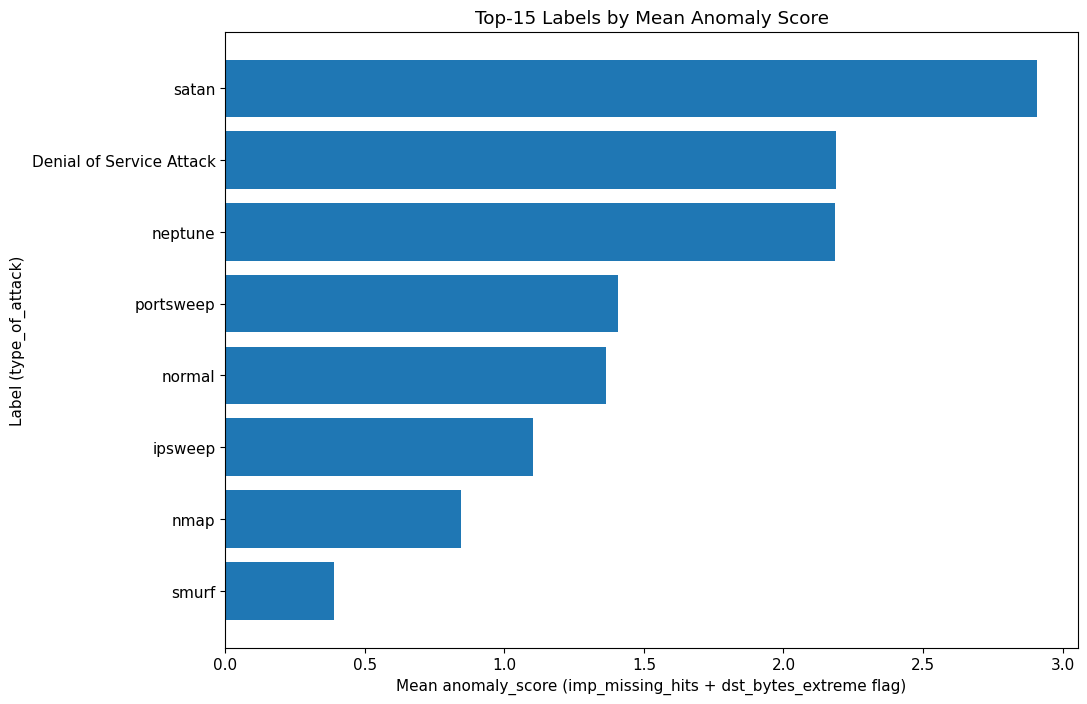

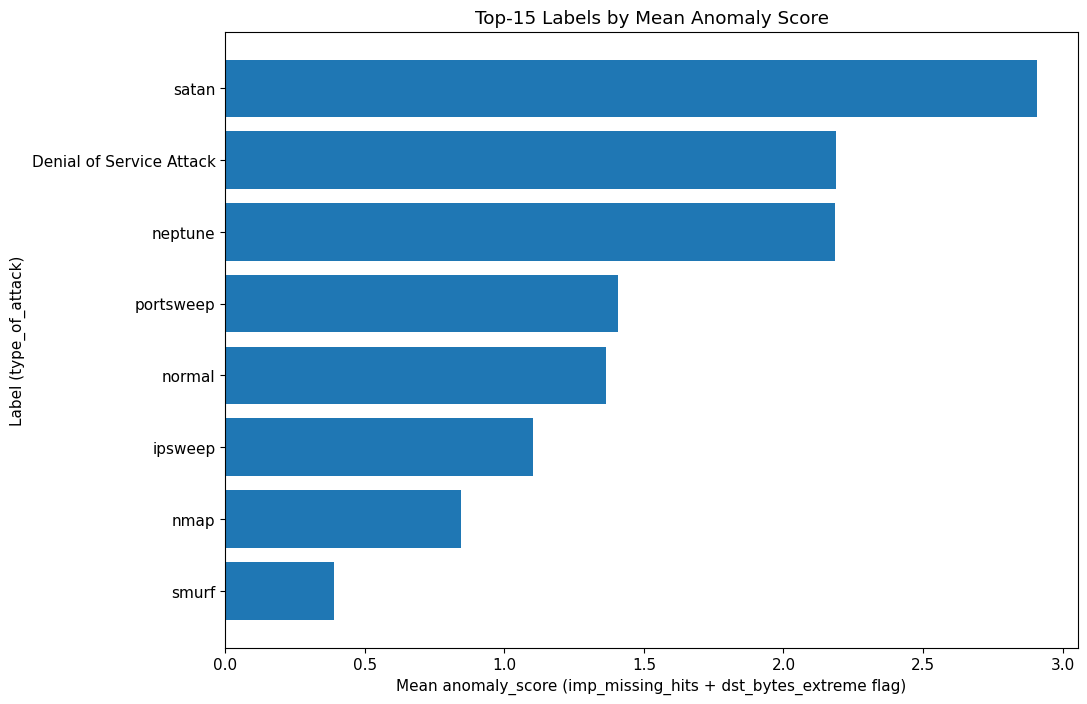

In [60]:
# ============================================================
# Sub-Step A9.4 — Visual: Mean Anomaly Score by Label
# ============================================================

TOP_K = 15

plot_df = by_label_fmt.head(TOP_K).iloc[::-1]  # reverse for readability

fig, ax = plt.subplots()
ax.barh(plot_df.index, plot_df["mean_anomaly_score"])
ax.set_xlabel("Mean anomaly_score (imp_missing_hits + dst_bytes_extreme flag)")
ax.set_ylabel("Label (type_of_attack)")
ax.set_title(f"Top-{TOP_K} Labels by Mean Anomaly Score")

add_fig_page_a9("STEP A9.4 — Visual: Mean Anomaly Score by Label (Top-K)", fig)

fig

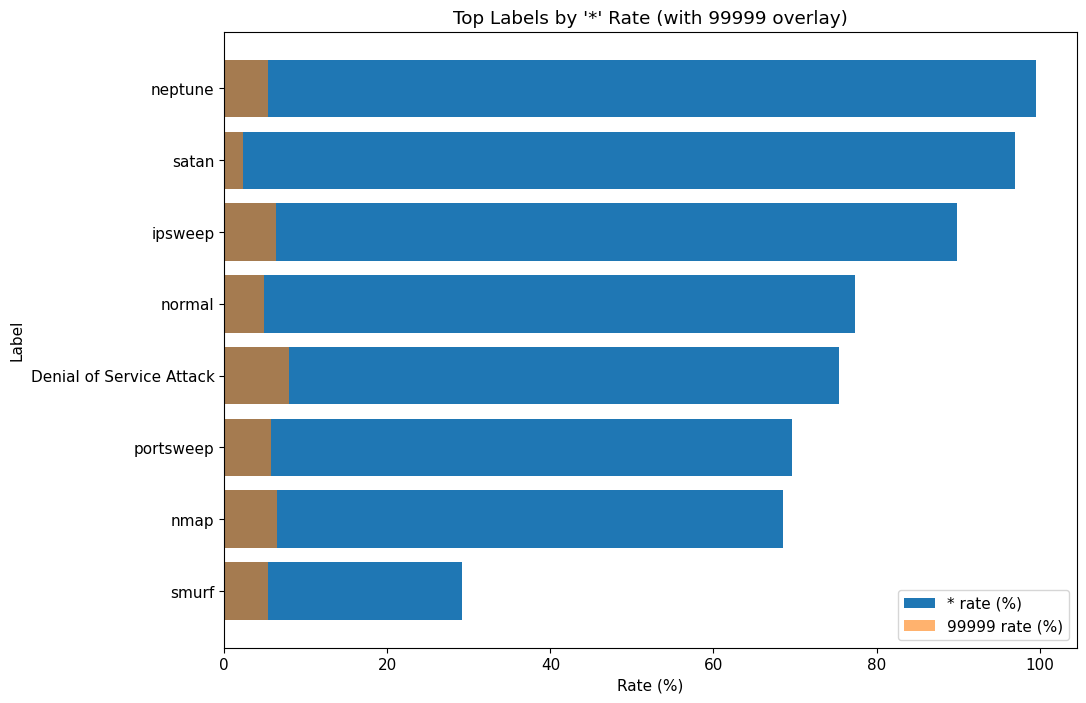

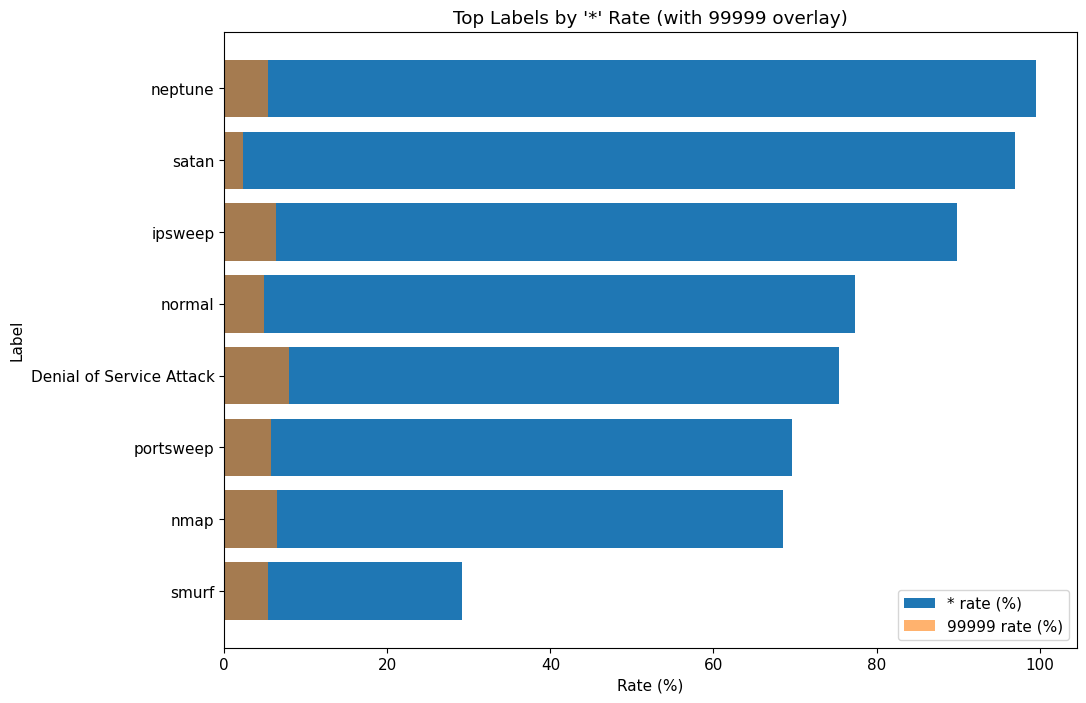

In [61]:
# ============================================================
# Sub-Step A9.5 — Visual: Placeholder Rates per Label (Star vs 99999)
# ============================================================

plot_df = by_label_fmt.copy()
plot_df = plot_df.sort_values("star_rate", ascending=False).head(15).iloc[::-1]

fig, ax = plt.subplots()
ax.barh(plot_df.index, plot_df["star_rate"], label="* rate (%)")
ax.barh(plot_df.index, plot_df["rate_99999"], left=0, alpha=0.6, label="99999 rate (%)")
ax.set_xlabel("Rate (%)")
ax.set_ylabel("Label")
ax.set_title("Top Labels by '*' Rate (with 99999 overlay)")
ax.legend()

add_fig_page_a9("STEP A9.5 — Visual: '*' vs '99999' Rate by Label", fig)

fig

In [62]:
# ============================================================
# Sub-Step A9.6 — Severity Buckets & Distribution by Label
# ============================================================

score = signals_df["anomaly_score"]

severity = pd.cut(
    score,
    bins=[-1, 0, 2, score.max() if score.max() >= 3 else 3],
    labels=["clean(0)", "mild(1-2)", "heavy(>=3)"],
    include_lowest=True
)

bucket_df = pd.DataFrame({
    label_col: signals_df[label_col],
    "severity": severity
})

severity_by_label = (
    bucket_df
    .groupby([label_col, "severity"])
    .size()
    .unstack(fill_value=0)
)

# normalize to percent within label
severity_by_label_pct = severity_by_label.div(severity_by_label.sum(axis=1), axis=0) * 100.0

add_text_page_a9(
    title="STEP A9.6 — Severity Buckets by Label",
    lines=[
        "Purpose:",
        "- Bucket rows by anomaly severity and see distribution per label",
        "",
        "Counts:",
        severity_by_label.to_string(),
        "",
        "Percent within each label (%):",
        severity_by_label_pct.to_string()
    ]
)

severity_by_label, severity_by_label_pct

/tmp/ipykernel_24/1269025076.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([label_col, "severity"])


(severity                  clean(0)  mild(1-2)  heavy(>=3)
 type_of_attack                                           
 Denial of Service Attack       416        731         714
 ipsweep                        263       2948          43
 neptune                        155      30230        6757
 nmap                           370        945           7
 normal                       12835      39673        8030
 portsweep                      775       1527         385
 satan                           96        605        2547
 smurf                         1609        774          11,
 severity                   clean(0)  mild(1-2)  heavy(>=3)
 type_of_attack                                            
 Denial of Service Attack  22.353573  39.279957   38.366470
 ipsweep                    8.082360  90.596189    1.321451
 neptune                    0.417317  81.390340   18.192343
 nmap                      27.987897  71.482602    0.529501
 normal                    21.201559  65.534045  

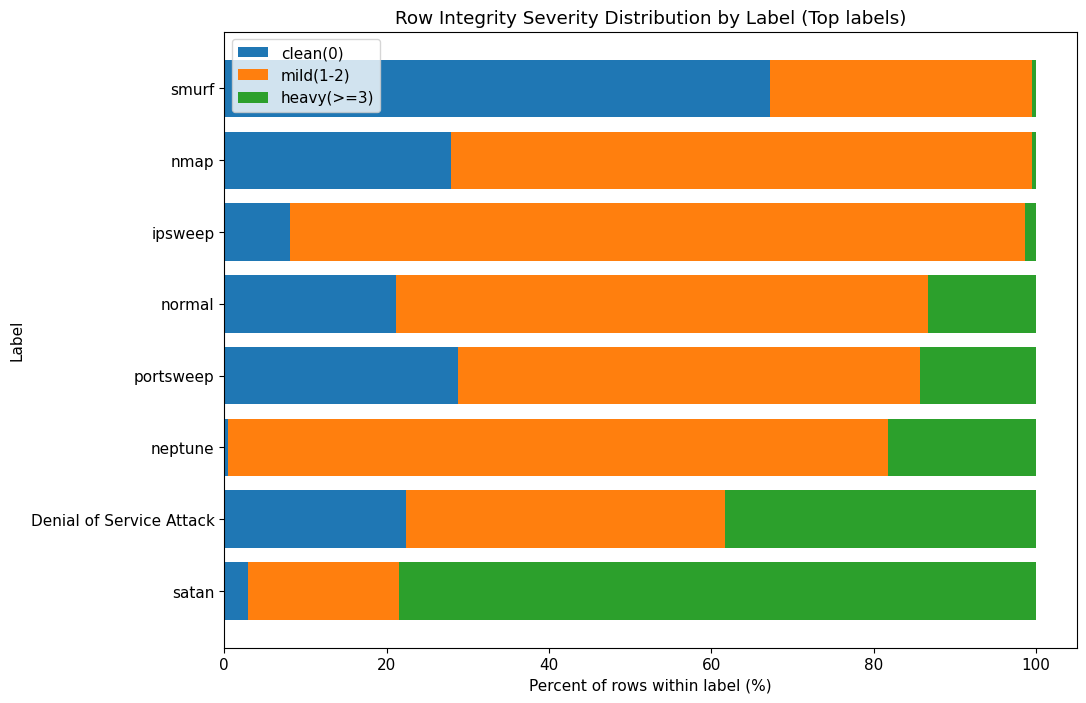

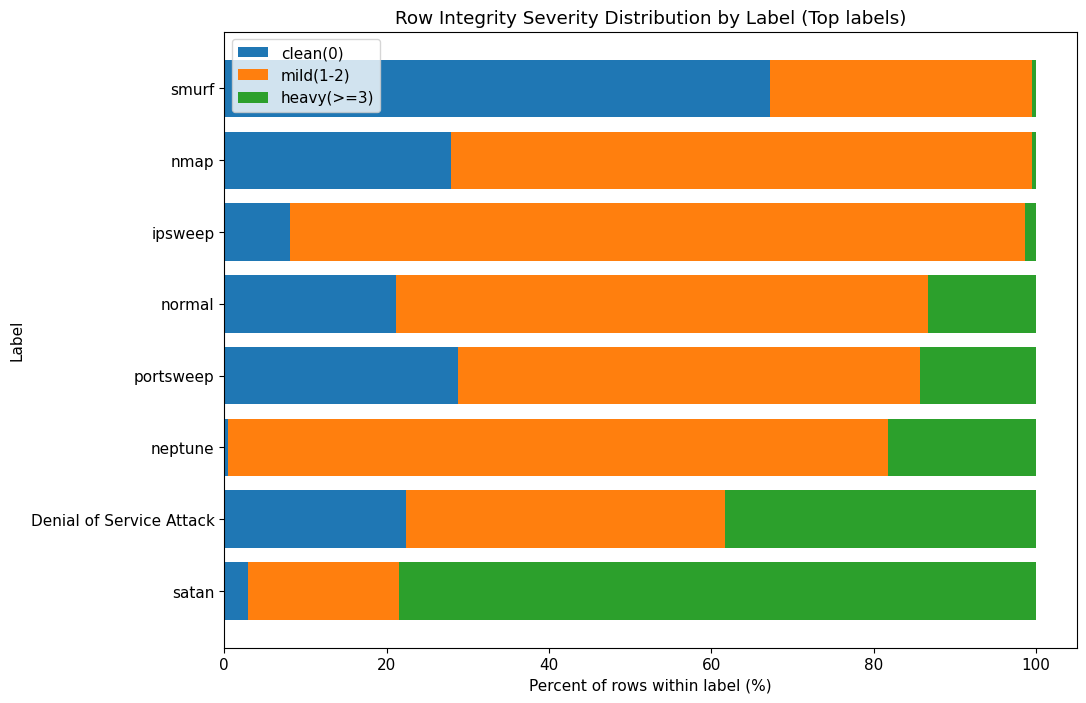

In [63]:
# ============================================================
# Sub-Step A9.7 — Visual: Stacked Severity Distribution (Top by heavy%)
# ============================================================

# sort labels by heavy percentage
if "heavy(>=3)" in severity_by_label_pct.columns:
    order = severity_by_label_pct.sort_values("heavy(>=3)", ascending=False).head(12).index
else:
    order = severity_by_label_pct.sum(axis=1).sort_values(ascending=False).head(12).index

plot_pct = severity_by_label_pct.loc[order]

fig, ax = plt.subplots()
left = np.zeros(len(plot_pct))

for col in ["clean(0)", "mild(1-2)", "heavy(>=3)"]:
    if col in plot_pct.columns:
        vals = plot_pct[col].values
        ax.barh(plot_pct.index, vals, left=left, label=col)
        left += vals

ax.set_xlabel("Percent of rows within label (%)")
ax.set_ylabel("Label")
ax.set_title("Row Integrity Severity Distribution by Label (Top labels)")
ax.legend()

add_fig_page_a9("STEP A9.7 — Visual: Severity Distribution by Label (Stacked %)", fig)

fig

In [64]:
# ============================================================
# Sub-Step A9.8 — Export PDF (Finalize)
# ============================================================

render_report_a9(PDF_PATH_A9)

print(f"✅ PDF generated: {PDF_PATH_A9}")
display(FileLink(PDF_PATH_A9))

✅ PDF generated: EDA_STEP_A9_Row_Level_Integrity_and_Anomaly_Density.pdf


/kaggle/working/EDA_STEP_A9_Row_Level_Integrity_and_Anomaly_Density.pdf

__Insight Kesimpulan__

STEP A9 mengungkap temuan paling krusial dalam seluruh Block A: kualitas data pada level baris tidak terdistribusi netral terhadap label. Placeholder implisit seperti * dan 99999 bukan hanya fenomena teknis, tetapi membentuk pola yang sangat berbeda antar jenis serangan. Beberapa attack class—terutama satan dan kelompok DoS—secara konsisten muncul dengan kepadatan anomali yang jauh lebih tinggi dibanding kelas lain.

Temuan ini menunjukkan bahwa dataset tidak hanya merekam fenomena jaringan, tetapi juga perilaku sistem logging yang bervariasi tergantung jenis serangan. Dengan kata lain, label dan kualitas data saling terikat, sehingga kualitas data itu sendiri berpotensi menjadi proxy bagi label.

Hal ini sangat berbahaya dari sudut pandang machine learning. Model dapat mencapai performa tinggi bukan karena memahami pola serangan, tetapi karena mempelajari artefak logging—seperti banyaknya placeholder implisit dalam satu baris. Tanpa disadari, ini akan menghasilkan model yang rapuh dan gagal ketika dihadapkan pada data dari sistem logging berbeda atau lingkungan produksi yang lebih bersih.

Dengan demikian, STEP A9 berfungsi sebagai penutup krusial Block A, karena ia memvalidasi (atau dalam hal ini, menantang) asumsi bahwa data “cukup netral” untuk langsung masuk ke tahap eksplorasi statistik dan modeling.

# BLOCK B — Global Data Behavior (Multivariate & Distribution)

Fokus utama Block B:
memahami perilaku data secara global dan multivariat, sebelum tenggelam di per-variabel.
Block ini menjawab pertanyaan:
“Secara keseluruhan, data ini seperti apa bentuknya?”

## Global Numerical Distribution Overview

In [65]:
# ============================================================
# STEP B1 — Report Setup (Collector)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

PDF_PATH_B1 = "EDA_STEP_B1_Global_Numerical_Distribution_Overview.pdf"
REPORT_PAGES_B1 = []

def add_text_page_b1(title: str, lines: list[str]):
    REPORT_PAGES_B1.append({"type": "text", "title": title, "lines": [str(x) for x in lines]})

def add_fig_page_b1(title: str, fig):
    REPORT_PAGES_B1.append({"type": "fig", "title": title, "fig": fig})

def render_report_b1(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped = []
        for line in lines:
            wrapped.extend(wrap(str(line), 110))
            wrapped.append("")
        ax.text(
            0.01, 0.98,
            f"{title}\n\n" + "\n".join(wrapped),
            va="top", ha="left", family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_B1:
            if page["type"] == "text":
                fig, ax = plt.subplots()
                _render_text(ax, page["title"], page["lines"])
                pdf.savefig(fig)
                plt.close(fig)
            elif page["type"] == "fig":
                page["fig"].suptitle(page["title"], y=0.98)
                pdf.savefig(page["fig"])
                plt.close(page["fig"])

print("✅ Collector STEP B1 siap. Lanjut B1.1")

✅ Collector STEP B1 siap. Lanjut B1.1


In [66]:
# ============================================================
# Sub-Step B1.1 — Numeric-Coercible Feature Selection
# ============================================================

label_col = "type_of_attack"
assert label_col in df.columns, f"Label column '{label_col}' not found."

candidate_cols = df.columns.drop(label_col)

numeric_view = {}
coerce_report = []

for col in candidate_cols:
    coerced = pd.to_numeric(df[col], errors="coerce")
    valid_ratio = coerced.notna().mean()
    if valid_ratio >= 0.7:  # numeric-dominant, EDA-only rule
        numeric_view[col] = coerced
        coerce_report.append({
            "feature": col,
            "valid_ratio": valid_ratio,
            "missing_ratio_after_coerce": 1 - valid_ratio
        })

num_df = pd.DataFrame(numeric_view)
coerce_df = pd.DataFrame(coerce_report).sort_values("valid_ratio", ascending=False)

add_text_page_b1(
    title="STEP B1.1 — Numeric-Coercible Feature Selection",
    lines=[
        "Purpose:",
        "- Select numeric-dominant features for global statistical overview",
        "",
        f"Total features scanned (excluding label): {len(candidate_cols)}",
        f"Numeric-coercible features (>=70% valid after coerce): {num_df.shape[1]}",
        "",
        "Coercion summary (top rows):",
        coerce_df.head(15).to_string(index=False)
    ]
)

num_df.shape, coerce_df

((112446, 35),
                         feature  valid_ratio  missing_ratio_after_coerce
 17                is_host_login     0.999324                    0.000676
 10                   root_shell     0.998648                    0.001352
 8                     logged_in     0.998488                    0.001512
 16            num_outbound_cmds     0.998346                    0.001654
 11                 su_attempted     0.998266                    0.001734
 20                    srv_count     0.998141                    0.001859
 19                        count     0.997972                    0.002028
 12                     num_root     0.997919                    0.002081
 13           num_file_creations     0.997857                    0.002143
 29       dst_host_diff_srv_rate     0.997839                    0.002161
 3                          land     0.997652                    0.002348
 5                        urgent     0.997332                    0.002668
 14                   n

In [67]:
# ============================================================
# Sub-Step B1.2 — Global Descriptive Statistics
# ============================================================

desc = num_df.describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99]).T

add_text_page_b1(
    title="STEP B1.2 — Global Descriptive Statistics (Numeric Features)",
    lines=[
        "Purpose:",
        "- Provide global descriptive statistics for numeric features",
        "",
        "Statistics include:",
        "- count, mean, std, min, 1%, 5%, 50%, 95%, 99%, max",
        "",
        desc.to_string()
    ]
)

desc

count          mean           std  min   1%  \
duration                     111889.0    618.101717  6.267712e+03  0.0  0.0   
src_bytes                    111595.0  37236.578198  5.163430e+06  0.0  0.0   
dst_bytes                    111740.0  21233.544523  4.269231e+06  0.0  0.0   
land                         112182.0    128.361760  3.580456e+03  0.0  0.0   
wrong_fragment               111923.0      0.022596  2.529972e-01  0.0  0.0   
urgent                       112146.0     60.634708  2.461662e+03  0.0  0.0   
hot                          111528.0      0.139167  1.715395e+00  0.0  0.0   
num_failed_logins            112041.0    159.762114  3.993819e+03  0.0  0.0   
logged_in                    112276.0      0.391295  4.880423e-01  0.0  0.0   
num_compromised              112094.0     88.591691  2.970611e+03  0.0  0.0   
root_shell                   112294.0    146.044820  3.818773e+03  0.0  0.0   
su_attempted                 112251.0     70.378402  2.651937e+03  0.0  0.0   
num_root                     112212.0      0.296127  2.498593e+01  0.0  0.0   
num_file_creations           112205.0      0.012103  4.780629e-01  0.0  0.0   
num_shells                   112138.0    161.406981  4.014299e+03  0.0  0.0   
num_access_files             111855.0     29.506245  1.717366e+03  0.0  0.0   
num_outbound_cmds            112260.0      0.000000  0.000000e+00  0.0  0.0   
is_host_login                112370.0      0.000009  2.983148e-03  0.0  0.0   
is_guest_login               112127.0     97.217156  3.116338e+03  0.0  0.0   
count                        112218.0    847.397699  8.698874e+03  0.0  1.0   
srv_count                    112237.0    601.688196  7.551293e+03  0.0  1.0   
serror_rate                  107832.0     95.804631  3.089112e+03  0.0  0.0   
srv_serror_rate              109931.0    328.668647  5.721049e+03  0.0  0.0   
rerror_rate                  109048.0    477.870993  6.895524e+03  0.0  0.0   
srv_rerror_rate              110634.0     18.197091  1.344400e+03  0.0  0.0   
srv_diff_host_rate            94067.0      0.077913  2.680354e-01  0.0  0.0   
dst_host_count               111858.0    425.821372  4.917123e+03  0.0  1.0   
dst_host_srv_count           111883.0    197.247643  2.849602e+03  0.0  1.0   
dst_host_same_srv_rate       112118.0    514.254458  7.149085e+03  0.0  0.0   
dst_host_diff_srv_rate       112203.0    238.042508  4.872292e+03  0.0  0.0   
dst_host_same_src_port_rate  112008.0     53.712086  2.313831e+03  0.0  0.0   
dst_host_serror_rate         112018.0    145.797601  3.811799e+03  0.0  0.0   
dst_host_srv_serror_rate     106594.0      0.289369  4.534716e-01  0.0  0.0   
dst_host_rerror_rate         101096.0     76.255381  2.758737e+03  0.0  0.0   
dst_host_srv_rerror_rate     106579.0      0.111138  3.143047e-01  0.0  0.0   

                              5%     50%     95%       99%           max  
duration                     0.0    0.00     5.0  14664.16  9.999900e+04  
src_bytes                    0.0   44.00  1494.3  54540.00  1.379964e+09  
dst_bytes                    0.0    0.00  8314.0  25650.94  1.309937e+09  
land                         0.0    0.00     0.0      0.00  9.999900e+04  
wrong_fragment               0.0    0.00     0.0      0.00  3.000000e+00  
urgent                       0.0    0.00     0.0      0.00  9.999900e+04  
hot                          0.0    0.00     0.0      2.00  7.700000e+01  
num_failed_logins            0.0    0.00     0.0      0.00  9.999900e+04  
logged_in                    0.0    0.00     1.0      1.00  1.000000e+00  
num_compromised              0.0    0.00     0.0      1.00  9.999900e+04  
root_shell                   0.0    0.00     0.0      0.00  9.999900e+04  
su_attempted                 0.0    0.00     0.0      0.00  9.999900e+04  
num_root                     0.0    0.00     0.0      0.00  7.468000e+03  
num_file_creations           0.0    0.00     0.0      0.00  4.300000e+01  
num_shells                   0.0    0.00     0.0      0.00  9.

In [68]:
# ============================================================
# Sub-Step B1.3 — Range & Scale Inspection
# ============================================================

range_df = pd.DataFrame({
    "min": num_df.min(),
    "max": num_df.max(),
})
range_df["range"] = range_df["max"] - range_df["min"]
range_df["log10_range"] = np.log10(range_df["range"].replace(0, np.nan))

range_df = range_df.sort_values("log10_range", ascending=False)

add_text_page_b1(
    title="STEP B1.3 — Range & Scale Overview",
    lines=[
        "Purpose:",
        "- Detect features with extremely wide or suspicious numeric ranges",
        "",
        "Top features by log10(range):",
        range_df.head(15).to_string()
    ]
)

range_df.head

<bound method NDFrame.head of                              min           max         range  log10_range
src_bytes                    0.0  1.379964e+09  1.379964e+09     9.139868
dst_bytes                    0.0  1.309937e+09  1.309937e+09     9.117251
duration                     0.0  9.999900e+04  9.999900e+04     4.999996
land                         0.0  9.999900e+04  9.999900e+04     4.999996
urgent                       0.0  9.999900e+04  9.999900e+04     4.999996
num_failed_logins            0.0  9.999900e+04  9.999900e+04     4.999996
num_compromised              0.0  9.999900e+04  9.999900e+04     4.999996
num_access_files             0.0  9.999900e+04  9.999900e+04     4.999996
su_attempted                 0.0  9.999900e+04  9.999900e+04     4.999996
root_shell                   0.0  9.999900e+04  9.999900e+04     4.999996
is_guest_login               0.0  9.999900e+04  9.999900e+04     4.999996
num_shells                   0.0  9.999900e+04  9.999900e+04     4.999996
srv_rerr

In [69]:
# ============================================================
# Sub-Step B1.4 — Skewness Analysis
# ============================================================

skew_df = pd.Series(
    {col: num_df[col].skew(skipna=True) for col in num_df.columns},
    name="skewness"
).to_frame()

skew_df = skew_df.sort_values("skewness", ascending=False)

add_text_page_b1(
    title="STEP B1.4 — Global Skewness Overview",
    lines=[
        "Purpose:",
        "- Identify heavily skewed numeric features (heavy-tailed behavior)",
        "",
        "Top features by skewness:",
        skew_df.head(20).to_string()
    ]
)

skew_df

skewness
is_host_login                335.216348
dst_bytes                    273.266179
num_root                     243.758945
src_bytes                    212.710209
srv_rerror_rate               74.356231
num_access_files              58.194815
num_file_creations            57.190122
dst_host_same_src_port_rate   43.172333
urgent                        40.574013
su_attempted                  37.655509
dst_host_rerror_rate          36.193572
dst_host_srv_count            34.942117
num_compromised               33.601657
serror_rate                   32.310100
is_guest_login                32.026809
land                          27.857920
dst_host_serror_rate          26.158111
root_shell                    26.110136
num_failed_logins             24.958879
num_shells                    24.830728
dst_host_diff_srv_rate        20.426686
dst_host_count                20.193117
srv_serror_rate               17.364605
hot                           15.928215
rerror_rate                   14.363692
dst_host_same_srv_rate        13.844118
duration                      13.813913
srv_count                     13.085983
wrong_fragment                11.482044
count                         11.308701
srv_diff_host_rate             3.149558
dst_host_srv_rerror_rate       2.474472
dst_host_srv_serror_rate       0.928988
logged_in                      0.445483
num_outbound_cmds              0.000000

In [70]:
# ============================================================
# Sub-Step B1.5 — Suspicious Scale & Skew Summary
# ============================================================

summary_df = (
    range_df[["log10_range"]]
    .join(skew_df)
    .assign(
        extreme_scale=lambda x: x["log10_range"] >= 6,
        extreme_skew=lambda x: x["skewness"].abs() >= 5
    )
    .sort_values(["extreme_scale", "extreme_skew"], ascending=False)
)

suspicious = summary_df[(summary_df["extreme_scale"]) | (summary_df["extreme_skew"])]

add_text_page_b1(
    title="STEP B1.5 — Suspicious Numeric Features (Scale / Skew)",
    lines=[
        "Purpose:",
        "- List numeric features with extreme scale and/or heavy skew",
        "",
        "Flags:",
        "- extreme_scale: log10(range) >= 6",
        "- extreme_skew: |skewness| >= 5",
        "",
        "Suspicious features:",
        suspicious.to_string()
    ]
)

suspicious

log10_range    skewness  extreme_scale  \
src_bytes                       9.139868  212.710209           True   
dst_bytes                       9.117251  273.266179           True   
duration                        4.999996   13.813913          False   
land                            4.999996   27.857920          False   
urgent                          4.999996   40.574013          False   
num_failed_logins               4.999996   24.958879          False   
num_compromised                 4.999996   33.601657          False   
num_access_files                4.999996   58.194815          False   
su_attempted                    4.999996   37.655509          False   
root_shell                      4.999996   26.110136          False   
is_guest_login                  4.999996   32.026809          False   
num_shells                      4.999996   24.830728          False   
srv_rerror_rate                 4.999996   74.356231          False   
rerror_rate                     4.999996   14.363692          False   
srv_serror_rate                 4.999996   17.364605          False   
serror_rate                     4.999996   32.310100          False   
srv_count                       4.999996   13.085983          False   
count                           4.999996   11.308701          False   
dst_host_serror_rate            4.999996   26.158111          False   
dst_host_same_srv_rate          4.999996   13.844118          False   
dst_host_diff_srv_rate          4.999996   20.426686          False   
dst_host_same_src_port_rate     4.999996   43.172333          False   
dst_host_rerror_rate            4.999996   36.193572          False   
dst_host_srv_count              4.999996   34.942117          False   
dst_host_count                  4.999996   20.193117          False   
num_root                        3.873204  243.758945          False   
hot                             1.886491   15.928215          False   
num_file_creations              1.633468   57.190122          False   
wrong_fragment                  0.477121   11.482044          False   
is_host_login                   0.000000  335.216348          False   

                             extreme_skew  
src_bytes                            True  
dst_bytes                            True  
duration                             True  
land                                 True  
urgent                               True  
num_failed_logins                    True  
num_compromised                      True  
num_access_files                     True  
su_attempted                         True  
root_shell                           True  
is_guest_login                       True  
num_shells                           True  
srv_rerror_rate                      True  
rerror_rate                          True  
srv_serror_rate                      True  
serror_rate                          True  
srv_count                            True  
count                                True  
dst_host_serror_rate                 True  
dst_host_same_srv_rate               True  
dst_host_diff_srv_rate               True  
dst_host_same_src_port_rate          True  
dst_host_rerror_rate                 True  
dst_host_srv_count                   True  
dst_host_count                       True  
num_root                             True  
hot                                  True  
num_file_creations                   True  
wrong_fragment                       True  
is_host_login                        True

In [71]:
# ============================================================
# Sub-Step B1.6 — Export PDF (Finalize)
# ============================================================

render_report_b1(PDF_PATH_B1)

print(f"✅ PDF generated: {PDF_PATH_B1}")
display(FileLink(PDF_PATH_B1))

✅ PDF generated: EDA_STEP_B1_Global_Numerical_Distribution_Overview.pdf


/kaggle/working/EDA_STEP_B1_Global_Numerical_Distribution_Overview.pdf

__Insight Kesimpulan (Naratif — Mendalam)__

STEP B1 menegaskan bahwa karakter numerik dataset network intrusion ini sangat ekstrem dan jauh dari asumsi statistik klasik. Hampir seluruh fitur numerik bersifat zero-inflated, sangat skew ke kanan, dan memiliki ekor panjang yang dipengaruhi oleh nilai sentinel maupun lonjakan traffic tertentu. Dua fitur utama—src_bytes dan dst_bytes—memiliki skala yang berorde miliaran, menjadikannya outlier struktural dibanding fitur lain.

Temuan ini memperkuat hasil Block A: dataset ini tidak sekadar “kotor”, tetapi secara desain mencerminkan sistem logging event-based yang menghasilkan distribusi tidak seimbang. Dengan demikian, analisis numerik global tidak boleh dibaca sebagai fenomena statistik murni, melainkan sebagai refleksi dari bagaimana peristiwa jaringan dicatat.

STEP B1 berfungsi sebagai fondasi penting sebelum masuk ke analisis multivariat lanjutan (korelasi, PCA, clustering), karena ia menetapkan bahwa ruang fitur numerik berada dalam kondisi ekstrem yang berpotensi mendominasi struktur global data.

## Global Outlier Landscape

In [72]:
# ============================================================
# STEP B2 — Report Setup (Collector)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

PDF_PATH_B2 = "EDA_STEP_B2_Global_Outlier_Landscape.pdf"
REPORT_PAGES_B2 = []

def add_text_page_b2(title: str, lines: list[str]):
    REPORT_PAGES_B2.append({"type": "text", "title": title, "lines": [str(x) for x in lines]})

def add_fig_page_b2(title: str, fig):
    REPORT_PAGES_B2.append({"type": "fig", "title": title, "fig": fig})

def render_report_b2(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped = []
        for line in lines:
            wrapped.extend(wrap(str(line), 110))
            wrapped.append("")
        ax.text(
            0.01, 0.98,
            f"{title}\n\n" + "\n".join(wrapped),
            va="top", ha="left", family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_B2:
            if page["type"] == "text":
                fig, ax = plt.subplots()
                _render_text(ax, page["title"], page["lines"])
                pdf.savefig(fig)
                plt.close(fig)
            elif page["type"] == "fig":
                page["fig"].suptitle(page["title"], y=0.98)
                pdf.savefig(page["fig"])
                plt.close(page["fig"])

print("✅ Collector STEP B2 siap. Lanjut B2.1")

✅ Collector STEP B2 siap. Lanjut B2.1


In [73]:
# ============================================================
# Sub-Step B2.1 — Global Tail Quantile Scan (FIXED)
# ============================================================

# Reuse numeric view from STEP B1
assert "num_df" in globals(), "num_df not found. Run STEP B1 first."

quantiles = [0.01, 0.05, 0.95, 0.99]

q_df = num_df.quantile(quantiles).T

# robust column names: q1, q5, q95, q99 (no leading zero)
q_df.columns = [f"q{int(round(q*100))}" for q in quantiles]

tail_summary = q_df.copy()

# helper to avoid division by zero
def _safe_div(a, b):
    return a / b.replace(0, np.nan)

tail_summary["upper_tail_ratio"] = _safe_div(tail_summary["q99"], tail_summary["q95"])
tail_summary["lower_tail_ratio"] = _safe_div(tail_summary["q5"], tail_summary["q1"])

tail_summary = tail_summary.sort_values("upper_tail_ratio", ascending=False)

add_text_page_b2(
    title="STEP B2.1 — Global Tail Quantile Overview",
    lines=[
        "Purpose:",
        "- Inspect upper and lower tail density using quantile comparison",
        "",
        "Quantiles used: 1%, 5%, 95%, 99%",
        "Derived ratios:",
        "- upper_tail_ratio = q99 / q95 (robust to 0 via NaN)",
        "- lower_tail_ratio = q5 / q1 (robust to 0 via NaN)",
        "",
        "Top features by upper_tail_ratio:",
        tail_summary.head(15).to_string()
    ]
)

tail_summary.head(15)

q1   q5     q95       q99  upper_tail_ratio  \
duration                0.0  0.0     5.0  14664.16       2932.832000   
src_bytes               0.0  0.0  1494.3  54540.00         36.498695   
dst_bytes               0.0  0.0  8314.0  25650.94          3.085271   
srv_count               1.0  1.0   175.0    511.00          2.920000   
count                   1.0  1.0   292.0    511.00          1.750000   
dst_host_diff_srv_rate  0.0  0.0     0.6      1.00          1.666667   
logged_in               0.0  0.0     1.0      1.00          1.000000   
serror_rate             0.0  0.0     1.0      1.00          1.000000   
rerror_rate             0.0  0.0     1.0      1.00          1.000000   
srv_rerror_rate         0.0  0.0     1.0      1.00          1.000000   
srv_diff_host_rate      0.0  0.0     1.0      1.00          1.000000   
srv_serror_rate         0.0  0.0     1.0      1.00          1.000000   
dst_host_count          1.0  3.0   255.0    255.00          1.000000   
dst_host_srv_count      1.0  1.0   255.0    255.00          1.000000   
dst_host_same_srv_rate  0.0  0.0     1.0      1.00          1.000000   

                        lower_tail_ratio  
duration                             NaN  
src_bytes                            NaN  
dst_bytes                            NaN  
srv_count                            1.0  
count                                1.0  
dst_host_diff_srv_rate               NaN  
logged_in                            NaN  
serror_rate                          NaN  
rerror_rate                          NaN  
srv_rerror_rate                      NaN  
srv_diff_host_rate                   NaN  
srv_serror_rate                      NaN  
dst_host_count                       3.0  
dst_host_srv_count                   1.0  
dst_host_same_srv_rate               NaN

In [74]:
# ============================================================
# Sub-Step B2.2 — IQR Rough Outlier Scan
# ============================================================

iqr_stats = []

for col in num_df.columns:
    s = num_df[col].dropna()
    if len(s) == 0:
        continue
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    if iqr == 0:
        continue
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outlier_rate = ((s < lower) | (s > upper)).mean()
    iqr_stats.append({
        "feature": col,
        "iqr": iqr,
        "lower_bound": lower,
        "upper_bound": upper,
        "outlier_rate": outlier_rate
    })

iqr_df = pd.DataFrame(iqr_stats).sort_values("outlier_rate", ascending=False)

add_text_page_b2(
    title="STEP B2.2 — IQR-Based Outlier Rate (Rough Scan)",
    lines=[
        "Purpose:",
        "- Roughly estimate outlier prevalence using IQR rule (EDA-only)",
        "",
        "Top features by outlier_rate:",
        iqr_df.head(15).to_string(index=False)
    ]
)

iqr_df.head(15)

feature     iqr  lower_bound  upper_bound  \
11  dst_host_same_src_port_rate    0.06       -0.090        0.150   
1                     dst_bytes  511.00     -766.500     1277.500   
0                     src_bytes  270.00     -405.000      675.000   
4                     srv_count   16.00      -22.000       42.000   
10       dst_host_diff_srv_rate    0.07       -0.105        0.175   
3                         count  144.00     -214.000      362.000   
9        dst_host_same_srv_rate    0.95       -1.375        2.425   
6               srv_serror_rate    1.00       -1.500        2.500   
7                dst_host_count  170.00     -170.000      510.000   
12         dst_host_serror_rate    1.00       -1.500        2.500   
5                   serror_rate    1.00       -1.500        2.500   
8            dst_host_srv_count  245.00     -357.500      622.500   
2                     logged_in    1.00       -1.500        2.500   
13     dst_host_srv_serror_rate    1.00       -1.500        2.500   

    outlier_rate  
11      0.196048  
1       0.186630  
0       0.109261  
4       0.101998  
10      0.086638  
3       0.032535  
9       0.005137  
6       0.003284  
7       0.002432  
12      0.001455  
5       0.000955  
8       0.000813  
2       0.000000  
13      0.000000

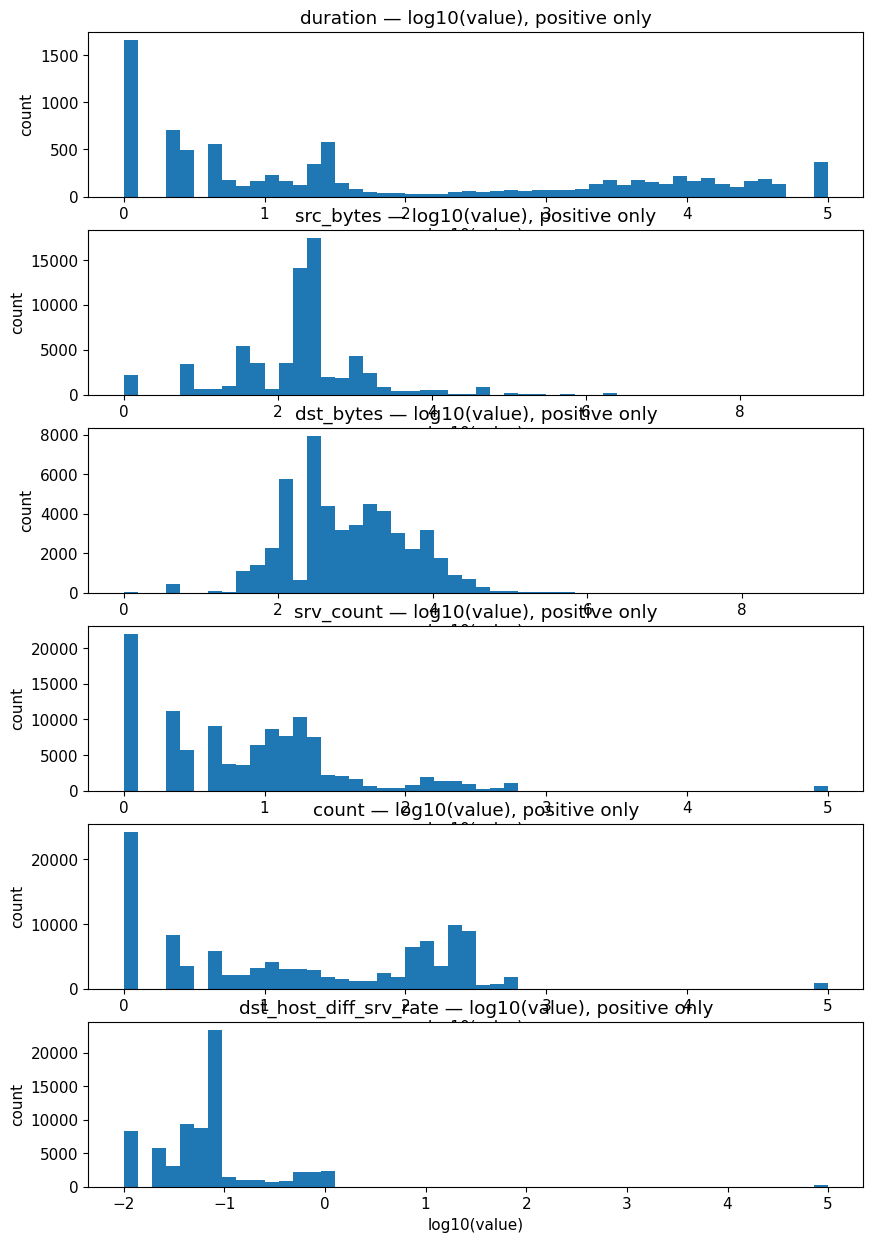

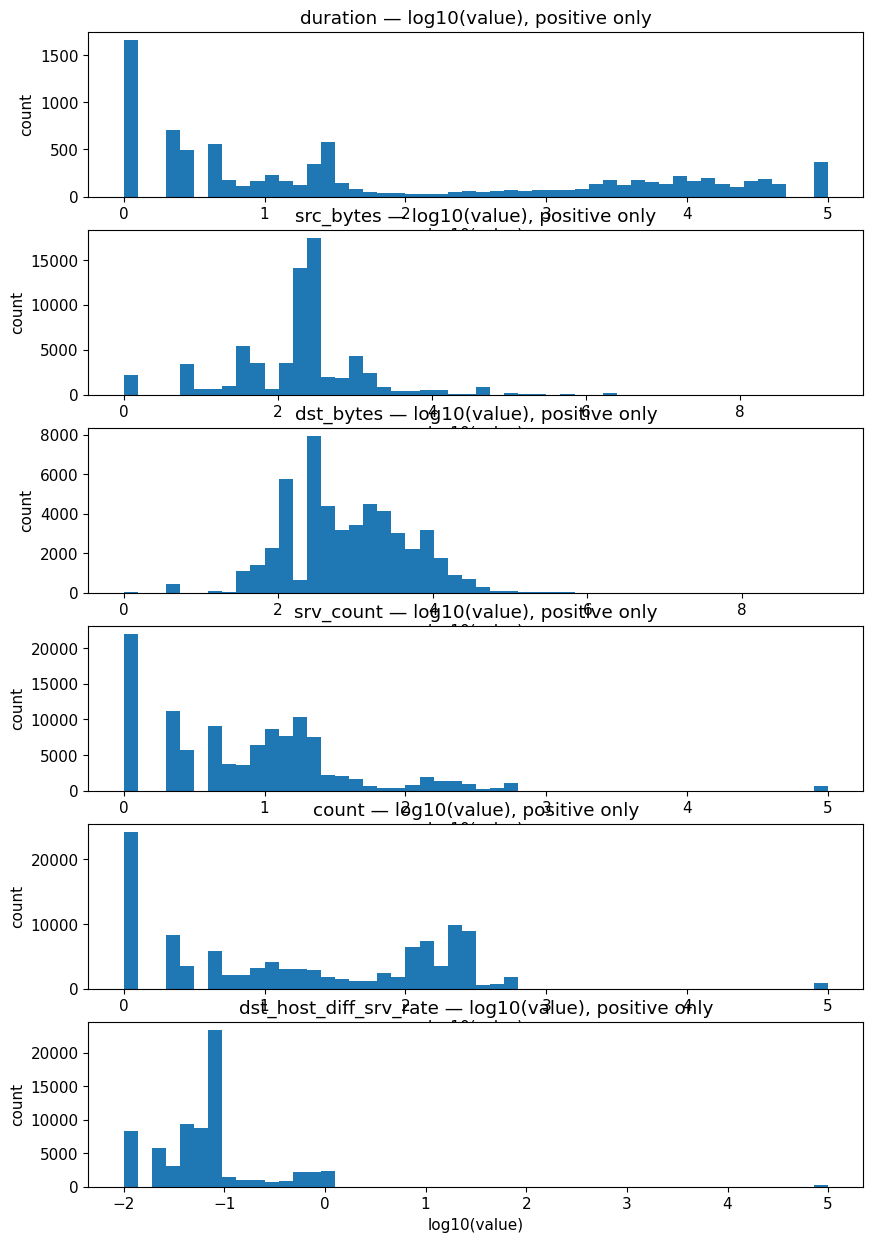

In [75]:
# ============================================================
# Sub-Step B2.3 — Upper-Tail Density (Log-Scale Overview)
# ============================================================

top_features = tail_summary.head(6).index.tolist()

fig, axes = plt.subplots(len(top_features), 1, figsize=(10, 2.5 * len(top_features)))

if len(top_features) == 1:
    axes = [axes]

for ax, col in zip(axes, top_features):
    s = num_df[col].dropna()
    s = s[s > 0]
    ax.hist(np.log10(s), bins=50)
    ax.set_title(f"{col} — log10(value), positive only")
    ax.set_xlabel("log10(value)")
    ax.set_ylabel("count")

add_fig_page_b2(
    "STEP B2.3 — Upper-Tail Density (Log-Scale Overview)",
    fig
)

fig

In [76]:
# ============================================================
# Sub-Step B2.4 — Global Outlier Landscape Summary
# ============================================================

summary = pd.DataFrame({
    "upper_tail_ratio": tail_summary["upper_tail_ratio"],
    "outlier_rate_iqr": iqr_df.set_index("feature")["outlier_rate"]
}).fillna(0)

summary = summary.sort_values("upper_tail_ratio", ascending=False)

add_text_page_b2(
    title="STEP B2.4 — Global Outlier Landscape (Summary)",
    lines=[
        "Purpose:",
        "- Summarize whether outliers are concentrated or spread across features",
        "",
        "Combined view (tail ratio & IQR outlier rate):",
        summary.head(20).to_string()
    ]
)

summary.head(20)

upper_tail_ratio  outlier_rate_iqr
duration                          2932.832000          0.000000
src_bytes                           36.498695          0.109261
dst_bytes                            3.085271          0.186630
srv_count                            2.920000          0.101998
count                                1.750000          0.032535
dst_host_diff_srv_rate               1.666667          0.086638
dst_host_count                       1.000000          0.002432
dst_host_serror_rate                 1.000000          0.001455
dst_host_srv_count                   1.000000          0.000813
dst_host_same_src_port_rate          1.000000          0.196048
dst_host_rerror_rate                 1.000000          0.000000
dst_host_srv_serror_rate             1.000000          0.000000
logged_in                            1.000000          0.000000
srv_diff_host_rate                   1.000000          0.000000
srv_rerror_rate                      1.000000          0.000000
rerror_rate                          1.000000          0.000000
serror_rate                          1.000000          0.000955
dst_host_srv_rerror_rate             1.000000          0.000000
dst_host_same_srv_rate               1.000000          0.005137
srv_serror_rate                      1.000000          0.003284

In [77]:
# ============================================================
# Sub-Step B2.5 — Extreme Tail Feature Candidates
# ============================================================

candidates = summary[
    (summary["upper_tail_ratio"] >= 2.0) |
    (summary["outlier_rate_iqr"] >= 0.05)
]

add_text_page_b2(
    title="STEP B2.5 — Extreme Tail Feature Candidates",
    lines=[
        "Purpose:",
        "- List candidate features with extreme upper tails or high outlier rates",
        "",
        "Criteria:",
        "- upper_tail_ratio >= 2.0 OR outlier_rate_iqr >= 5%",
        "",
        "Candidate features:",
        candidates.to_string()
    ]
)

candidates

upper_tail_ratio  outlier_rate_iqr
duration                          2932.832000          0.000000
src_bytes                           36.498695          0.109261
dst_bytes                            3.085271          0.186630
srv_count                            2.920000          0.101998
dst_host_diff_srv_rate               1.666667          0.086638
dst_host_same_src_port_rate          1.000000          0.196048

In [78]:
# ============================================================
# Sub-Step B2.6 — Export PDF (Finalize)
# ============================================================

render_report_b2(PDF_PATH_B2)

print(f"✅ PDF generated: {PDF_PATH_B2}")
display(FileLink(PDF_PATH_B2))

✅ PDF generated: EDA_STEP_B2_Global_Outlier_Landscape.pdf


/kaggle/working/EDA_STEP_B2_Global_Outlier_Landscape.pdf

__Insight Kesimpulan (Naratif — Mendalam)__

STEP B2 memperlihatkan bahwa outlier pada dataset ini tidak menyebar merata, tetapi terkonsentrasi kuat pada beberapa fitur yang secara domain berkaitan langsung dengan traffic volume dan pola koneksi. duration muncul sebagai “rare-extreme tail” yang sangat tajam: mayoritas koneksi berdurasi sangat pendek, namun sebagian kecil koneksi memiliki durasi yang melonjak ekstrem. Sementara itu, src_bytes, dst_bytes, dan srv_count menunjukkan “frequent-tail” di mana ekor atas tidak hanya terdiri dari segelintir titik, melainkan proporsi yang cukup besar sehingga aturan IQR menandai 10–20% data sebagai outlier.

Ini memperkuat hasil STEP B1: distribusi numerik jaringan bersifat heavy-tailed dan zero-inflated, sehingga outlier tidak bisa otomatis dianggap error. Dengan perspektif EDA sistemik (sinkron dengan Block A), outlier harus diperlakukan sebagai kandidat sinyal perilaku—termasuk kemungkinan behavior attack—sebelum dilakukan tindakan preprocessing yang agresif.

## Global Correlation Scan (Numerical)

In [79]:
# ============================================================
# STEP B3 — Report Setup (Collector)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

PDF_PATH_B3 = "EDA_STEP_B3_Global_Correlation_Scan_Numerical.pdf"
REPORT_PAGES_B3 = []

def add_text_page_b3(title: str, lines: list[str]):
    REPORT_PAGES_B3.append({"type": "text", "title": title, "lines": [str(x) for x in lines]})

def add_fig_page_b3(title: str, fig):
    REPORT_PAGES_B3.append({"type": "fig", "title": title, "fig": fig})

def render_report_b3(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped = []
        for line in lines:
            wrapped.extend(wrap(str(line), 110))
            wrapped.append("")
        ax.text(
            0.01, 0.98,
            f"{title}\n\n" + "\n".join(wrapped),
            va="top", ha="left", family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_B3:
            if page["type"] == "text":
                fig, ax = plt.subplots()
                _render_text(ax, page["title"], page["lines"])
                pdf.savefig(fig)
                plt.close(fig)
            elif page["type"] == "fig":
                page["fig"].suptitle(page["title"], y=0.98)
                pdf.savefig(page["fig"])
                plt.close(page["fig"])

print("✅ Collector STEP B3 siap. Lanjut B3.1")

✅ Collector STEP B3 siap. Lanjut B3.1


In [80]:
# ============================================================
# Sub-Step B3.1 — Pairwise Correlation Matrix (Pearson)
# ============================================================

# Reuse numeric view from STEP B1
assert "num_df" in globals(), "num_df not found. Run STEP B1 first."

corr_mat = num_df.corr(method="pearson")

add_text_page_b3(
    title="STEP B3.1 — Pairwise Correlation Matrix (Pearson)",
    lines=[
        "Purpose:",
        "- Compute rough linear correlations among numeric features (EDA-only)",
        "",
        f"Numeric features included: {corr_mat.shape[0]}",
        "",
        "Note:",
        "- Correlation is computed on numeric-coercible view",
        "- NaN arises from zero-variance or insufficient overlap"
    ]
)

corr_mat.shape

(35, 35)

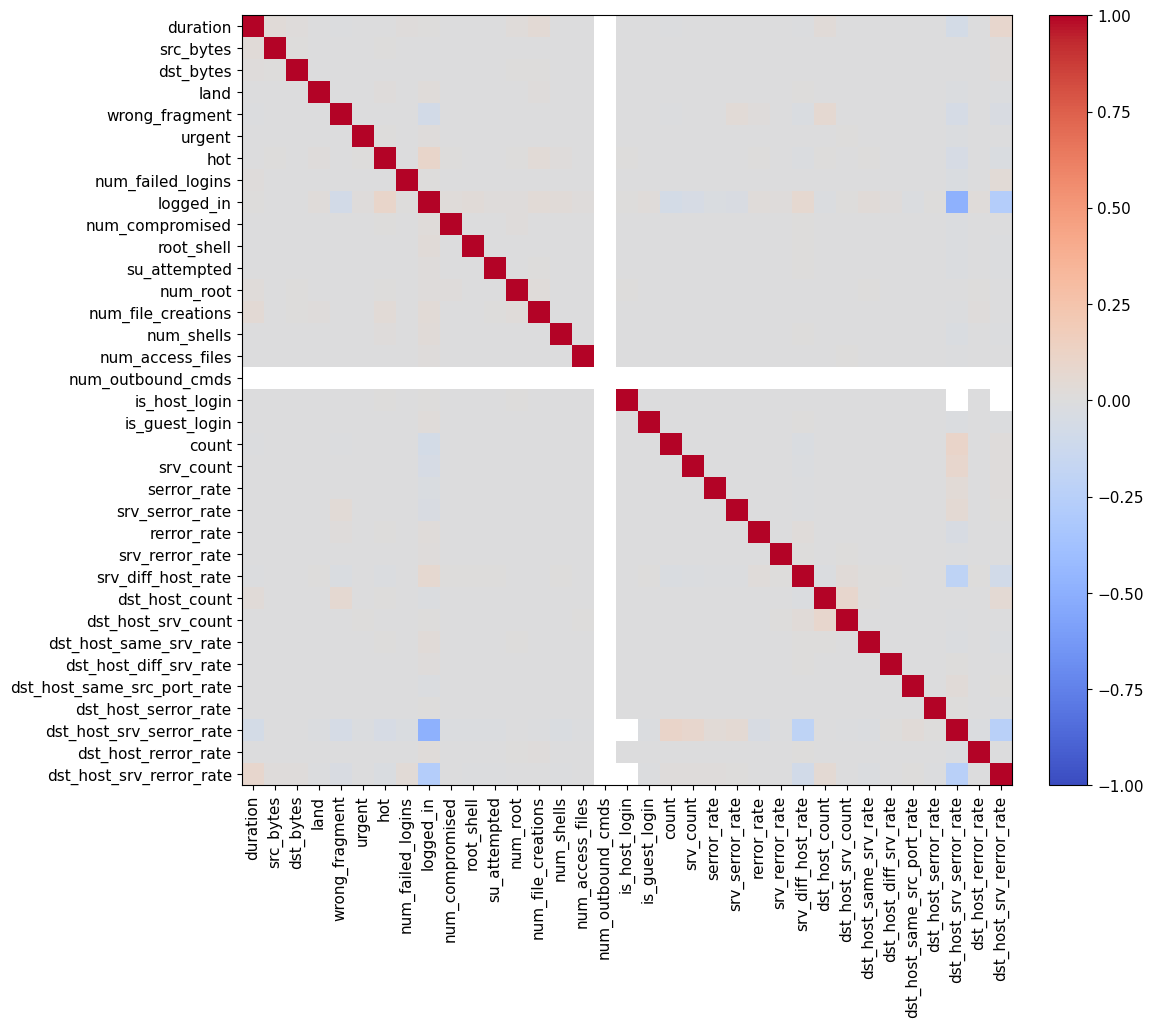

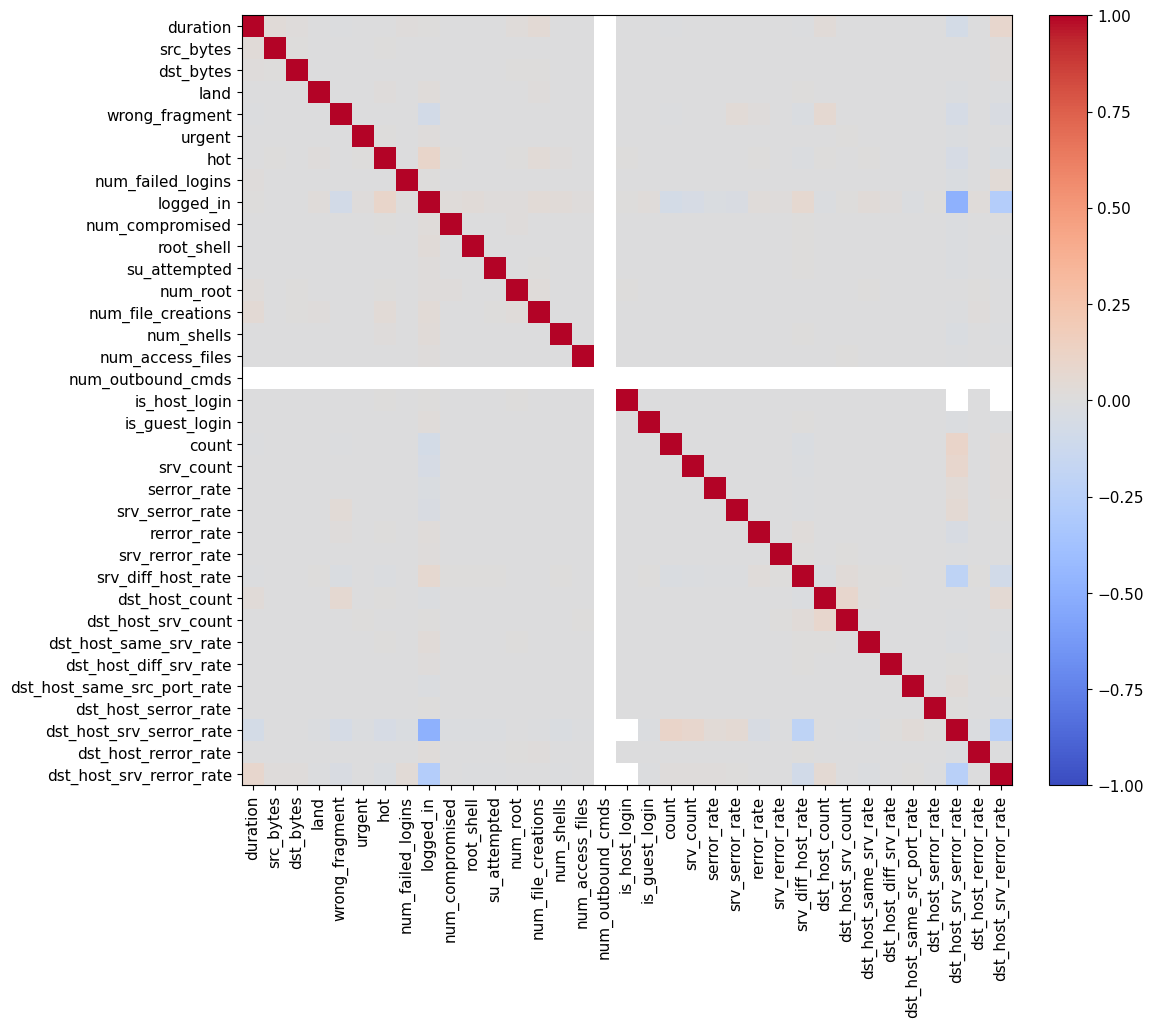

In [81]:
# ============================================================
# Sub-Step B3.2 — Correlation Heatmap (Overview)
# ============================================================

fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(corr_mat.values, cmap="coolwarm", vmin=-1, vmax=1)

ax.set_xticks(range(len(corr_mat.columns)))
ax.set_xticklabels(corr_mat.columns, rotation=90)
ax.set_yticks(range(len(corr_mat.index)))
ax.set_yticklabels(corr_mat.index)

plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

add_fig_page_b3(
    "STEP B3.2 — Global Correlation Heatmap (Pearson)",
    fig
)

fig

In [82]:
# ============================================================
# Sub-Step B3.3 — Highly Correlated Feature Pairs (ROBUST)
# ============================================================

THRESH = 0.90

pairs = []
cols = corr_mat.columns

for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        corr_val = corr_mat.iloc[i, j]
        if pd.notna(corr_val) and abs(corr_val) >= THRESH:
            pairs.append({
                "feature_1": cols[i],
                "feature_2": cols[j],
                "pearson_corr": corr_val
            })

# Build DataFrame safely
if len(pairs) > 0:
    pairs_df = (
        pd.DataFrame(pairs)
        .assign(abs_corr=lambda x: x["pearson_corr"].abs())
        .sort_values("abs_corr", ascending=False)
        .drop(columns="abs_corr")
    )
else:
    pairs_df = pd.DataFrame(columns=["feature_1", "feature_2", "pearson_corr"])

add_text_page_b3(
    title="STEP B3.3 — Highly Correlated Feature Pairs",
    lines=[
        "Purpose:",
        "- List feature pairs with very high linear correlation",
        "",
        f"Threshold: |pearson_corr| >= {THRESH}",
        "",
        f"Total highly correlated pairs: {len(pairs_df)}",
        "",
        "Top correlated pairs:",
        pairs_df.head(20).to_string(index=False) if len(pairs_df) > 0 else
        "No feature pairs exceed the correlation threshold."
    ]
)

pairs_df

Empty DataFrame
Columns: [feature_1, feature_2, pearson_corr]
Index: []

In [83]:
# ============================================================
# Sub-Step B3.4 — Correlation Block Hints (Prefix-Based)
# ============================================================

def feature_prefix(col):
    for p in ["dst_host_", "srv_", "dst_", "num_", "is_", "count"]:
        if col.startswith(p):
            return p
    return "other"

block_summary = (
    corr_mat.abs()
    .stack()
    .reset_index()
    .rename(columns={"level_0": "f1", "level_1": "f2", 0: "abs_corr"})
)

block_summary = block_summary[block_summary["f1"] < block_summary["f2"]]
block_summary["prefix_f1"] = block_summary["f1"].apply(feature_prefix)
block_summary["prefix_f2"] = block_summary["f2"].apply(feature_prefix)

block_corr = (
    block_summary
    .groupby(["prefix_f1", "prefix_f2"])
    .abs_corr.mean()
    .sort_values(ascending=False)
)

add_text_page_b3(
    title="STEP B3.4 — Correlation Block Hints (Prefix-Based)",
    lines=[
        "Purpose:",
        "- Detect structural correlation blocks by feature family",
        "",
        "Mean absolute correlation by prefix-pair:",
        block_corr.head(15).to_string()
    ]
)

block_corr.head(15)

prefix_f1  prefix_f2
dst_host_  other        0.016200
count      dst_host_    0.016003
dst_host_  srv_         0.015465
           dst_host_    0.015030
other      num_         0.010408
count      other        0.010282
           srv_         0.009886
other      srv_         0.009126
srv_       srv_         0.007887
other      other        0.007817
srv_       other        0.007094
dst_host_  num_         0.004235
count      num_         0.002584
dst_host_  is_          0.002316
num_       num_         0.002280
Name: abs_corr, dtype: float64

In [84]:
# ============================================================
# Sub-Step B3.5 — Export PDF (Finalize)
# ============================================================

render_report_b3(PDF_PATH_B3)

print(f"✅ PDF generated: {PDF_PATH_B3}")
display(FileLink(PDF_PATH_B3))

✅ PDF generated: EDA_STEP_B3_Global_Correlation_Scan_Numerical.pdf


/kaggle/working/EDA_STEP_B3_Global_Correlation_Scan_Numerical.pdf

__Insight Kesimpulan (Naratif — Mendalam)__

STEP B3 mengungkap bahwa meskipun dataset ini sangat ekstrem secara distribusi (heavy-tailed, zero-inflated, dan mengandung banyak outlier), hubungan linear antar fitur numerik justru relatif lemah. Tidak ditemukan pasangan fitur dengan korelasi Pearson sangat tinggi, dan heatmap korelasi memperlihatkan ruang fitur yang secara linear cukup terpisah.

Temuan ini penting karena menepis asumsi awal bahwa fitur-fitur yang berasal dari keluarga sama (misalnya dst_host_* atau srv_*) akan saling redundant secara linear. Sebaliknya, setiap fitur tampaknya dirancang untuk menangkap dimensi perilaku jaringan yang berbeda, meskipun berasal dari konteks pengukuran yang mirip.

Dengan kata lain, kompleksitas dataset ini bukan berasal dari multikolinearitas linear, melainkan dari kombinasi:
1. distribusi ekstrem (B1),
2. landscape outlier yang kompleks (B2),
3. dan potensi interaksi non-linear antar fitur.

## Redundancy & Feature Grouping (Global)

In [85]:
# ============================================================
# STEP B4 — Report Setup (Collector)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

PDF_PATH_B4 = "EDA_STEP_B4_Redundancy_and_Feature_Grouping_Global.pdf"
REPORT_PAGES_B4 = []

def add_text_page_b4(title: str, lines: list[str]):
    REPORT_PAGES_B4.append({"type": "text", "title": title, "lines": [str(x) for x in lines]})

def add_fig_page_b4(title: str, fig):
    REPORT_PAGES_B4.append({"type": "fig", "title": title, "fig": fig})

def render_report_b4(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped = []
        for line in lines:
            wrapped.extend(wrap(str(line), 110))
            wrapped.append("")
        ax.text(
            0.01, 0.98,
            f"{title}\n\n" + "\n".join(wrapped),
            va="top", ha="left", family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_B4:
            if page["type"] == "text":
                fig, ax = plt.subplots()
                _render_text(ax, page["title"], page["lines"])
                pdf.savefig(fig)
                plt.close(fig)
            elif page["type"] == "fig":
                page["fig"].suptitle(page["title"], y=0.98)
                pdf.savefig(page["fig"])
                plt.close(page["fig"])

print("✅ Collector STEP B4 siap. Lanjut B4.1")

✅ Collector STEP B4 siap. Lanjut B4.1


In [86]:
# ============================================================
# Sub-Step B4.1 — Soft Correlation Thresholding
# ============================================================

# Reuse correlation matrix from STEP B3
assert "corr_mat" in globals(), "corr_mat not found. Run STEP B3 first."

SOFT_THRESH = 0.70  # EDA-only, exploratory

pairs_soft = []
cols = corr_mat.columns

for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        corr_val = corr_mat.iloc[i, j]
        if pd.notna(corr_val) and abs(corr_val) >= SOFT_THRESH:
            pairs_soft.append({
                "feature_1": cols[i],
                "feature_2": cols[j],
                "pearson_corr": corr_val
            })

soft_df = (
    pd.DataFrame(pairs_soft)
    .assign(abs_corr=lambda x: x["pearson_corr"].abs())
    .sort_values("abs_corr", ascending=False)
    .drop(columns="abs_corr")
    if len(pairs_soft) > 0
    else pd.DataFrame(columns=["feature_1", "feature_2", "pearson_corr"])
)

add_text_page_b4(
    title="STEP B4.1 — Soft Correlation Thresholding",
    lines=[
        "Purpose:",
        "- Identify potential soft redundancy using relaxed correlation threshold",
        "",
        f"Soft threshold: |pearson_corr| >= {SOFT_THRESH}",
        "",
        f"Total candidate pairs: {len(soft_df)}",
        "",
        "Candidate correlated pairs:",
        soft_df.head(20).to_string(index=False) if len(soft_df) > 0 else
        "No feature pairs exceed the soft correlation threshold."
    ]
)

soft_df.head(20)

Empty DataFrame
Columns: [feature_1, feature_2, pearson_corr]
Index: []

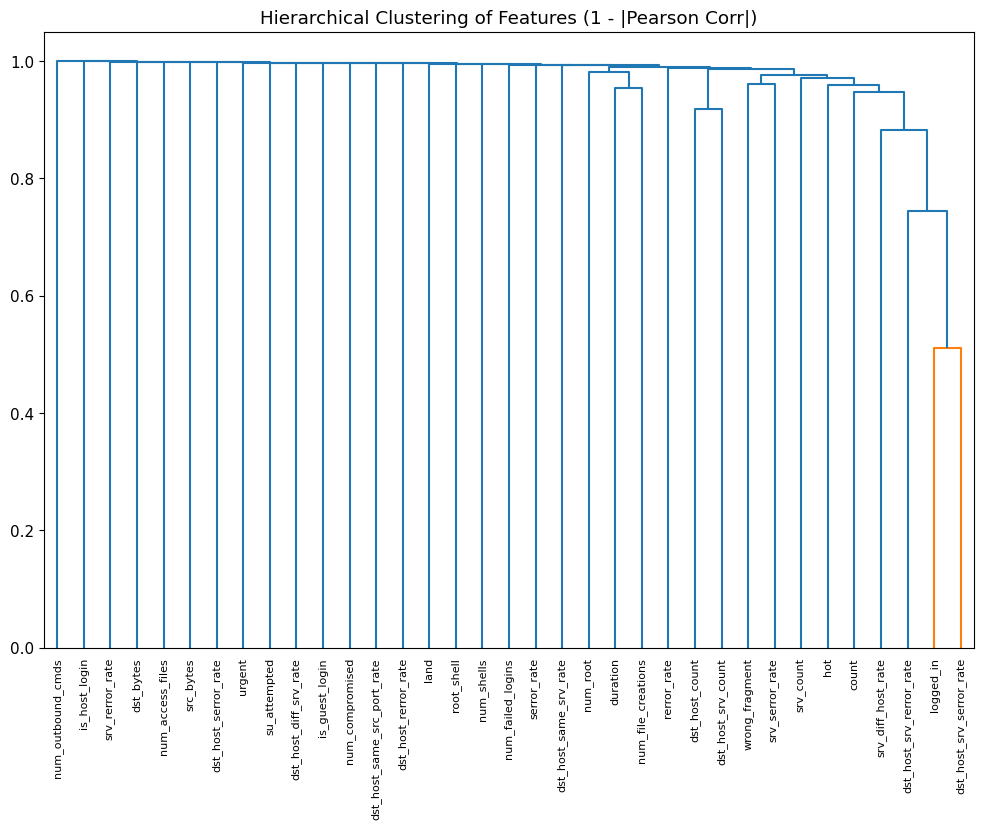

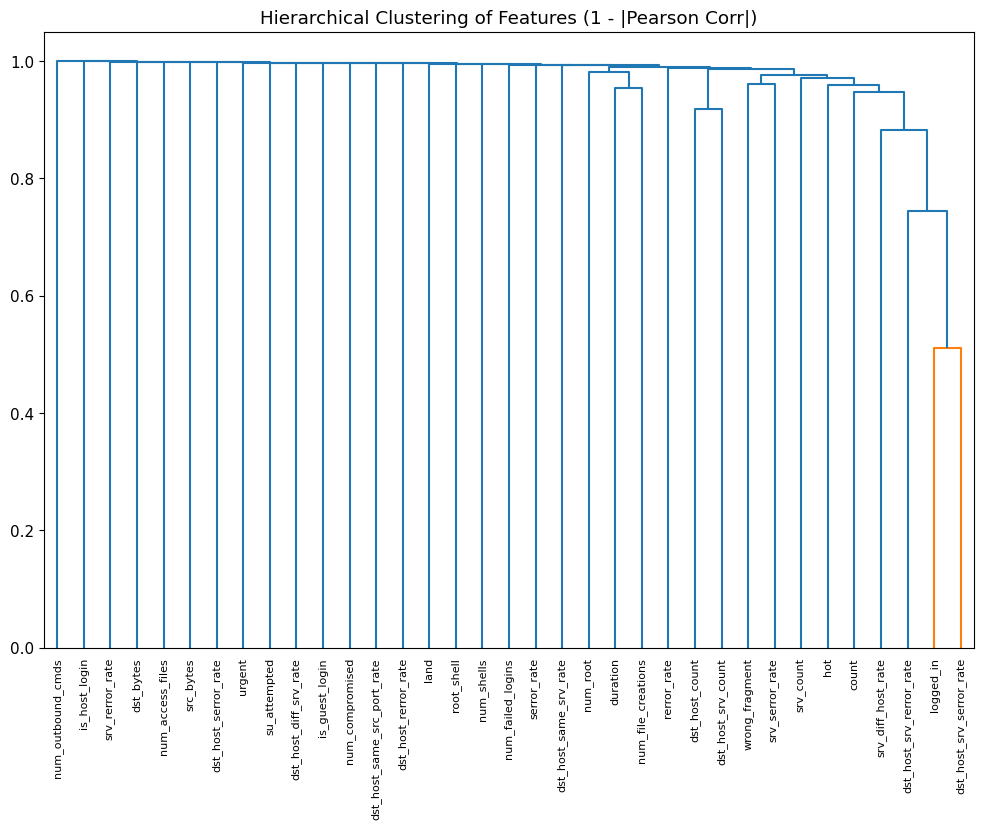

In [87]:
# ============================================================
# Sub-Step B4.2 — Hierarchical Clustering (EDA-Only) [FIXED]
# ============================================================

from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

# 1) Handle NaN correlations safely (EDA-only)
# NaN in corr arises from zero-variance or insufficient overlap; treat as 0 correlation for similarity scan.
corr_abs = corr_mat.abs()
nan_count = int(corr_abs.isna().sum().sum())

corr_abs_filled = corr_abs.fillna(0.0)

# 2) Distance matrix: 1 - |corr|
dist_mat = 1.0 - corr_abs_filled
np.fill_diagonal(dist_mat.values, 0.0)

# 3) Ensure finite
dist_vals = dist_mat.values
if not np.isfinite(dist_vals).all():
    # As last resort, replace any remaining inf with max finite
    dist_mat = dist_mat.replace([np.inf, -np.inf], np.nan).fillna(1.0)
    np.fill_diagonal(dist_mat.values, 0.0)

# 4) Condensed distance & linkage
condensed_dist = squareform(dist_mat.values, checks=False)
Z = linkage(condensed_dist, method="average")

add_text_page_b4(
    title="STEP B4.2 — Hierarchical Clustering Prep (NaN Handling)",
    lines=[
        "Purpose:",
        "- Prepare finite distance matrix for hierarchical clustering (EDA-only)",
        "",
        "NaN handling rule:",
        "- NaN correlation (zero-variance / insufficient overlap) => treated as 0 correlation",
        "",
        f"Total NaN entries in |corr| matrix: {nan_count}",
        "Distance definition: dist = 1 - |corr|"
    ]
)

fig, ax = plt.subplots(figsize=(12, 8))
dendrogram(
    Z,
    labels=corr_mat.columns.tolist(),
    leaf_rotation=90,
    ax=ax
)
ax.set_title("Hierarchical Clustering of Features (1 - |Pearson Corr|)")

add_fig_page_b4(
    "STEP B4.2 — Hierarchical Clustering (Feature Similarity)",
    fig
)

fig

In [88]:
# ============================================================
# Sub-Step B4.3 — Feature Groups from Dendrogram
# ============================================================

from scipy.cluster.hierarchy import fcluster

# distance threshold (EDA-only heuristic)
DIST_THRESH = 0.4

clusters = fcluster(Z, t=DIST_THRESH, criterion="distance")

group_df = pd.DataFrame({
    "feature": corr_mat.columns,
    "cluster_id": clusters
}).sort_values("cluster_id")

groups = (
    group_df
    .groupby("cluster_id")["feature"]
    .apply(list)
)

add_text_page_b4(
    title="STEP B4.3 — Feature Groups (Dendrogram Cut)",
    lines=[
        "Purpose:",
        "- Group features that are globally similar based on correlation structure",
        "",
        f"Dendrogram distance threshold: {DIST_THRESH}",
        "",
        "Feature groups:",
        groups.to_string()
    ]
)

groups

cluster_id
1                        [duration]
2              [num_file_creations]
3                        [num_root]
4                  [dst_host_count]
5              [dst_host_srv_count]
6                  [wrong_fragment]
7                 [srv_serror_rate]
8                       [logged_in]
9        [dst_host_srv_serror_rate]
10       [dst_host_srv_rerror_rate]
11             [srv_diff_host_rate]
12                          [count]
13                            [hot]
14                      [srv_count]
15                    [rerror_rate]
16         [dst_host_same_srv_rate]
17                    [serror_rate]
18              [num_failed_logins]
19                     [num_shells]
20                     [root_shell]
21                           [land]
22           [dst_host_rerror_rate]
23    [dst_host_same_src_port_rate]
24                [num_compromised]
25                 [is_guest_login]
26         [dst_host_diff_srv_rate]
27                   [su_attempted]
28               

In [89]:
# ============================================================
# Sub-Step B4.4 — Redundancy & Multicollinearity Notes
# ============================================================

cluster_sizes = groups.apply(len).sort_values(ascending=False)

add_text_page_b4(
    title="STEP B4.4 — Redundancy & Multicollinearity Notes",
    lines=[
        "Purpose:",
        "- Summarize potential redundancy and multicollinearity risk (EDA-only)",
        "",
        "Cluster sizes (descending):",
        cluster_sizes.to_string(),
        "",
        "Notes:",
        "- Clusters with size > 1 indicate feature similarity",
        "- Low linear correlation in B3 implies redundancy may be mild or non-linear",
        "- No feature is dropped at this stage"
    ]
)

cluster_sizes

cluster_id
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
Name: feature, dtype: int64

In [90]:
# ============================================================
# Sub-Step B4.5 — Export PDF (Finalize)
# ============================================================

render_report_b4(PDF_PATH_B4)

print(f"✅ PDF generated: {PDF_PATH_B4}")
display(FileLink(PDF_PATH_B4))

✅ PDF generated: EDA_STEP_B4_Redundancy_and_Feature_Grouping_Global.pdf


/kaggle/working/EDA_STEP_B4_Redundancy_and_Feature_Grouping_Global.pdf

__Insight Kesimpulan (Naratif — Mendalam)__

STEP B4 menegaskan bahwa secara global dataset ini tidak mengandung redundansi linear yang kuat. Bahkan ketika threshold korelasi dilonggarkan hingga |corr| ≥ 0.7, tidak ada pasangan fitur yang terdeteksi sebagai kandidat redundant. Hierarchical clustering pun menghasilkan 35 cluster singleton, artinya setiap fitur berdiri sebagai dimensi informasi tersendiri dalam ruang korelasi Pearson.

Namun, ketiadaan grouping linear tidak berarti tidak ada struktur sama sekali. Kehadiran 73 entri NaN pada matriks korelasi menunjukkan bahwa sebagian pasangan fitur tidak memiliki kondisi statistik yang cukup untuk menghitung korelasi secara stabil—ini konsisten dengan karakter dataset yang zero-inflated, skew ekstrem, dan memiliki nilai yang jarang aktif. Dengan demikian, “informasi serupa” (jika ada) kemungkinan muncul pada rezim tertentu seperti tail/outlier, atau berbasis interaksi non-linear yang tidak ditangkap Pearson.

## Multivariate Projection (EDA-Only)

In [91]:
# ============================================================
# STEP B5 — Report Setup (Collector)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

from sklearn.decomposition import PCA

PDF_PATH_B5 = "EDA_STEP_B5_Multivariate_Projection_EDA_Only.pdf"
REPORT_PAGES_B5 = []

def add_text_page_b5(title: str, lines: list[str]):
    REPORT_PAGES_B5.append({"type": "text", "title": title, "lines": [str(x) for x in lines]})

def add_fig_page_b5(title: str, fig):
    REPORT_PAGES_B5.append({"type": "fig", "title": title, "fig": fig})

def render_report_b5(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped = []
        for line in lines:
            wrapped.extend(wrap(str(line), 110))
            wrapped.append("")
        ax.text(
            0.01, 0.98,
            f"{title}\n\n" + "\n".join(wrapped),
            va="top", ha="left", family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_B5:
            if page["type"] == "text":
                fig, ax = plt.subplots()
                _render_text(ax, page["title"], page["lines"])
                pdf.savefig(fig)
                plt.close(fig)
            elif page["type"] == "fig":
                page["fig"].suptitle(page["title"], y=0.98)
                pdf.savefig(page["fig"])
                plt.close(page["fig"])

print("✅ Collector STEP B5 siap. Lanjut B5.1")

✅ Collector STEP B5 siap. Lanjut B5.1


In [92]:
# ============================================================
# Sub-Step B5.1 — PCA Input Preparation
# ============================================================

assert "num_df" in globals(), "num_df not found. Run STEP B1 first."

# PCA cannot handle NaN → EDA-only handling:
# Fill NaN with 0 (represents 'inactive / not logged')
X_pca = num_df.fillna(0.0).values

add_text_page_b5(
    title="STEP B5.1 — PCA Input Preparation",
    lines=[
        "Purpose:",
        "- Prepare numeric matrix for PCA (EDA-only)",
        "",
        "Rules:",
        "- No scaling (raw numeric magnitude preserved)",
        "- NaN filled with 0 to represent inactive / absent signal",
        "",
        f"Input shape for PCA: {X_pca.shape}",
        f"Number of features: {X_pca.shape[1]}"
    ]
)

X_pca.shape

(112446, 35)

In [93]:
# ============================================================
# Sub-Step B5.2 — PCA Variance Explained
# ============================================================

pca_full = PCA(n_components=min(10, X_pca.shape[1]), random_state=42)
pca_full.fit(X_pca)

explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

var_df = pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(explained))],
    "explained_variance_ratio": explained,
    "cumulative_variance": cum_explained
})

add_text_page_b5(
    title="STEP B5.2 — PCA Variance Explained",
    lines=[
        "Purpose:",
        "- Inspect how much global variance is captured by top components",
        "",
        var_df.to_string(index=False)
    ]
)

var_df

PC  explained_variance_ratio  cumulative_variance
0   PC1              5.936343e-01             0.593634
1   PC2              4.063547e-01             0.999989
2   PC3              1.694989e-06             0.999991
3   PC4              1.277487e-06             0.999992
4   PC5              1.143382e-06             0.999993
5   PC6              1.034444e-06             0.999994
6   PC7              8.767793e-07             0.999995
7   PC8              7.177425e-07             0.999996
8   PC9              5.406634e-07             0.999996
9  PC10              5.312288e-07             0.999997

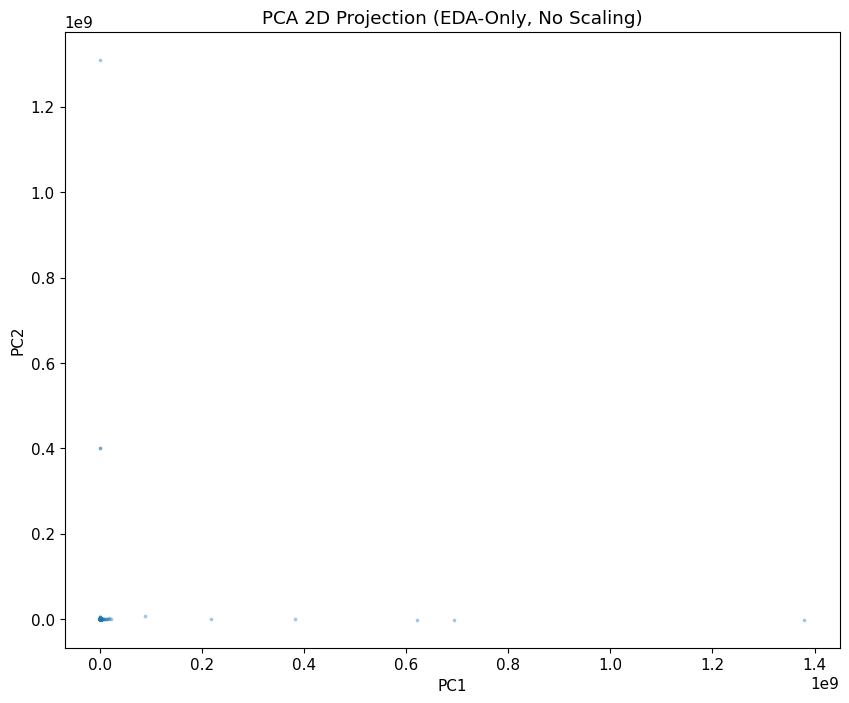

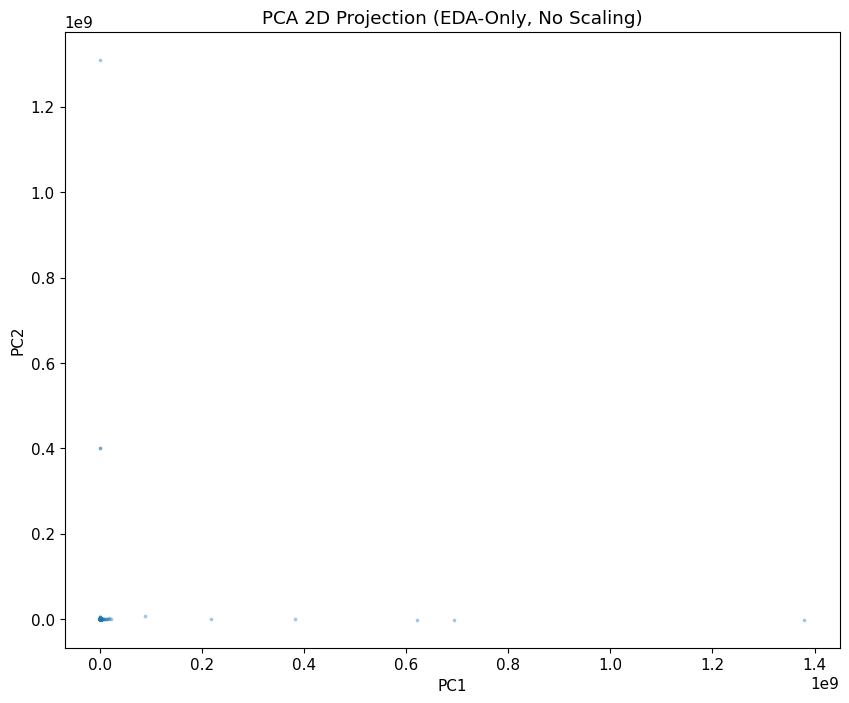

In [94]:
# ============================================================
# Sub-Step B5.3 — PCA 2D Projection (Global)
# ============================================================

pca_2d = PCA(n_components=2, random_state=42)
X_2d = pca_2d.fit_transform(X_pca)

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X_2d[:, 0], X_2d[:, 1], s=3, alpha=0.3)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("PCA 2D Projection (EDA-Only, No Scaling)")

add_fig_page_b5(
    "STEP B5.3 — PCA 2D Projection (Global)",
    fig
)

fig

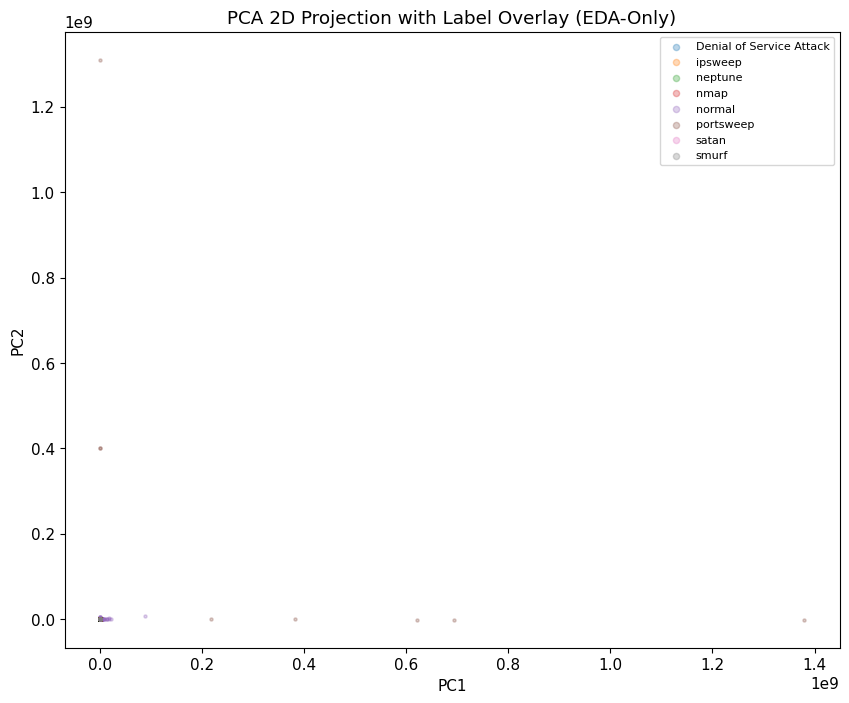

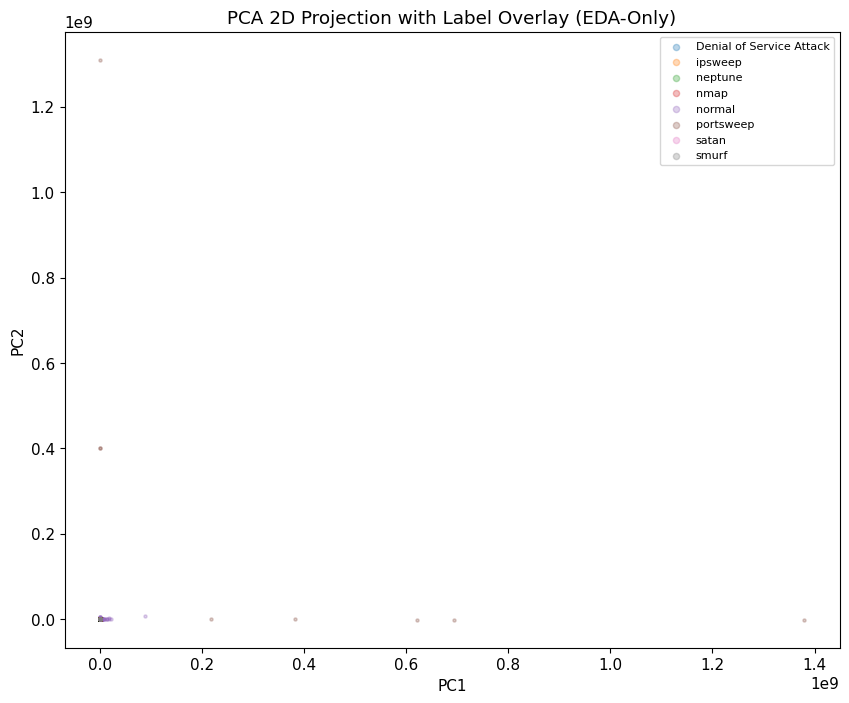

In [95]:
# ============================================================
# Sub-Step B5.4 — PCA 2D Projection (Label Overlay)
# ============================================================

label_col = "type_of_attack"
assert label_col in df.columns, "Label column not found."

labels = df[label_col].astype(str).values
unique_labels = np.unique(labels)

fig, ax = plt.subplots(figsize=(10, 8))

for lab in unique_labels:
    idx = labels == lab
    ax.scatter(
        X_2d[idx, 0],
        X_2d[idx, 1],
        s=5,
        alpha=0.3,
        label=lab
    )

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("PCA 2D Projection with Label Overlay (EDA-Only)")
ax.legend(markerscale=2, fontsize=8)

add_fig_page_b5(
    "STEP B5.4 — PCA 2D Projection (Label Overlay)",
    fig
)

fig

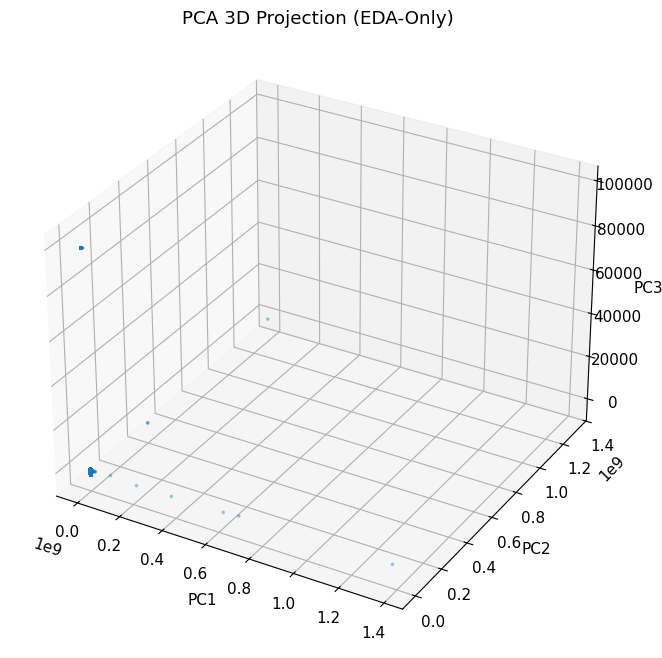

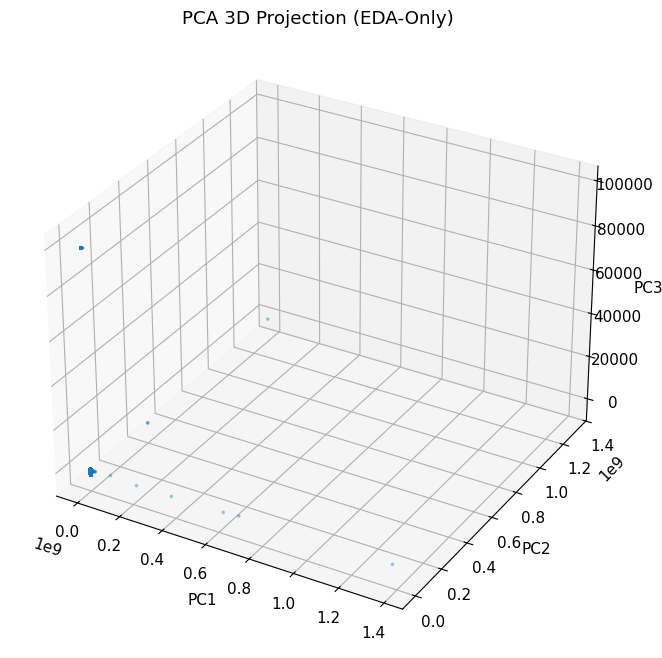

In [96]:
# ============================================================
# Sub-Step B5.5 — PCA 3D Projection (Optional)
# ============================================================

from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3, random_state=42)
X_3d = pca_3d.fit_transform(X_pca)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], s=3, alpha=0.3)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA 3D Projection (EDA-Only)")

add_fig_page_b5(
    "STEP B5.5 — PCA 3D Projection (Global)",
    fig
)

fig

In [97]:
# ============================================================
# Sub-Step B5.6 — Export PDF (Finalize)
# ============================================================

render_report_b5(PDF_PATH_B5)

print(f"✅ PDF generated: {PDF_PATH_B5}")
display(FileLink(PDF_PATH_B5))

✅ PDF generated: EDA_STEP_B5_Multivariate_Projection_EDA_Only.pdf


/kaggle/working/EDA_STEP_B5_Multivariate_Projection_EDA_Only.pdf

__Insight Kesimpulan (Naratif — Mendalam)__

STEP B5 menunjukkan bahwa secara multivariat, dataset network intrusion ini memiliki struktur variansi yang sangat terkompresi: dua komponen utama sudah menjelaskan hampir seluruh variasi mentah. Namun, dominasi variansi ini tidak menghasilkan pemisahan kelas yang jelas. Sebaliknya, PCA mengungkap pola khas data logging jaringan: mayoritas observasi terkonsentrasi di rezim aktivitas rendah, sementara sejumlah kecil observasi ekstrem membentuk ekor panjang yang mengarahkan principal components.

Overlay label menegaskan bahwa perbedaan antar kelas attack dan normal tidak muncul sebagai perbedaan global yang linear. Hal ini memperkuat temuan Block A (coupling kualitas data–label) dan Block B (heavy tail & outlier landscape): sinyal attack kemungkinan tersembunyi dalam kombinasi fitur tertentu atau kondisi ekstrem, bukan dalam struktur variansi global.

Dengan demikian, PCA di STEP B5 berfungsi sebagai konfirmasi bahwa pendekatan linear global tidak cukup untuk memisahkan perilaku normal dan attack, dan bahwa kompleksitas dataset ini bersifat non-linear dan regime-dependent.

## Global Distribution Shift Check (Internal)

In [98]:
# ============================================================
# STEP B6 — Report Setup (Collector)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

PDF_PATH_B6 = "EDA_STEP_B6_Global_Distribution_Shift_Internal.pdf"
REPORT_PAGES_B6 = []

def add_text_page_b6(title: str, lines: list[str]):
    REPORT_PAGES_B6.append({"type": "text", "title": title, "lines": [str(x) for x in lines]})

def add_fig_page_b6(title: str, fig):
    REPORT_PAGES_B6.append({"type": "fig", "title": title, "fig": fig})

def render_report_b6(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped = []
        for line in lines:
            wrapped.extend(wrap(str(line), 110))
            wrapped.append("")
        ax.text(
            0.01, 0.98,
            f"{title}\n\n" + "\n".join(wrapped),
            va="top", ha="left", family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_B6:
            if page["type"] == "text":
                fig, ax = plt.subplots()
                _render_text(ax, page["title"], page["lines"])
                pdf.savefig(fig)
                plt.close(fig)
            elif page["type"] == "fig":
                page["fig"].suptitle(page["title"], y=0.98)
                pdf.savefig(page["fig"])
                plt.close(page["fig"])

print("✅ Collector STEP B6 siap. Lanjut B6.1")

✅ Collector STEP B6 siap. Lanjut B6.1


In [99]:
# ============================================================
# Sub-Step B6.1 — Random Internal Split
# ============================================================

assert "num_df" in globals(), "num_df not found. Run STEP B1 first."

np.random.seed(42)
idx = np.random.permutation(len(num_df))

mid = len(idx) // 2
idx_a, idx_b = idx[:mid], idx[mid:]

A = num_df.iloc[idx_a]
B = num_df.iloc[idx_b]

add_text_page_b6(
    title="STEP B6.1 — Random Internal Split",
    lines=[
        "Purpose:",
        "- Create random internal subsets as baseline for distribution comparison",
        "",
        f"Subset A size: {A.shape}",
        f"Subset B size: {B.shape}",
        "",
        "Note:",
        "- Split is random (not temporal, not label-based)"
    ]
)

A.shape, B.shape

((56223, 35), (56223, 35))

In [100]:
# ============================================================
# Sub-Step B6.2 — Descriptive Statistics Comparison
# ============================================================

stats = []

for col in num_df.columns:
    sA = A[col].dropna()
    sB = B[col].dropna()
    if len(sA) == 0 or len(sB) == 0:
        continue

    stats.append({
        "feature": col,
        "mean_A": sA.mean(),
        "mean_B": sB.mean(),
        "median_A": sA.median(),
        "median_B": sB.median(),
        "std_A": sA.std(),
        "std_B": sB.std(),
        "mean_ratio": (sA.mean() / sB.mean()) if sB.mean() != 0 else np.nan
    })

stats_df = pd.DataFrame(stats)

# rank by deviation in mean_ratio
stats_df["mean_ratio_dev"] = (stats_df["mean_ratio"] - 1).abs()
stats_df = stats_df.sort_values("mean_ratio_dev", ascending=False)

add_text_page_b6(
    title="STEP B6.2 — Descriptive Statistics Comparison (A vs B)",
    lines=[
        "Purpose:",
        "- Compare rough statistics between two internal subsets",
        "",
        "Metrics:",
        "- mean, median, std per subset",
        "- mean_ratio = mean_A / mean_B",
        "",
        "Top features by |mean_ratio - 1|:",
        stats_df.head(20).to_string(index=False)
    ]
)

stats_df.head(20)

feature       mean_A        mean_B  median_A  median_B  \
2              dst_bytes  2350.846241  40135.855572       0.0       0.0   
24       srv_rerror_rate    21.817064     14.578165       0.0       0.0   
31  dst_host_serror_rate   162.724441    128.863506       0.0       0.0   
9        num_compromised    75.230886    101.951542       0.0       0.0   
11          su_attempted    78.392531     62.363559       0.0       0.0   
7      num_failed_logins   137.450375    182.073455       0.0       0.0   
15      num_access_files    32.182691     26.828985       0.0       0.0   
21           serror_rate   102.442820     89.185376       0.0       0.0   
0               duration   568.663552    667.584971       0.0       0.0   
33  dst_host_rerror_rate    81.278574     71.241719       0.0       0.0   
14            num_shells   149.795617    173.021244       0.0       0.0   
6                    hot     0.131016      0.147317       0.0       0.0   
12              num_root     0.311466      0.280793       0.0       0.0   
13    num_file_creations     0.012728      0.011478       0.0       0.0   
18        is_guest_login   101.684083     92.750945       0.0       0.0   
19                 count   884.224630    810.557639      15.0      15.0   
20             srv_count   582.020149    621.365006       8.0       8.0   
27    dst_host_srv_count   190.968741    203.528678      63.0      64.0   
5                 urgent    58.841928     62.428064       0.0       0.0   
22       srv_serror_rate   335.319926    322.028612       0.0       0.0   

           std_A         std_B  mean_ratio  mean_ratio_dev  
2   46729.839458  6.038958e+06    0.058572        0.941428  
24   1472.803034  1.202408e+03    1.496558        0.496558  
31   4027.082590  3.583462e+03    1.262766        0.262766  
9    2736.669054  3.187383e+03    0.737908        0.262092  
11   2798.760800  2.496477e+03    1.257025        0.257025  
7    3704.884419  4.263129e+03    0.754917        0.245083  
15   1793.577659  1.637598e+03    1.199549        0.199549  
21   3194.547531  2.980281e+03    1.148650        0.148650  
0    5908.626285  6.607296e+03    0.851822        0.148178  
33   2848.193116  2.666479e+03    1.140885        0.140885  
14   3867.453795  4.155995e+03    0.865764        0.134236  
6       1.662635  1.766556e+00    0.889349        0.110651  
12     32.652208  1.351278e+01    1.109236        0.109236  
13      0.498946  4.562333e-01    1.108913        0.108913  
18   3187.082844  3.043983e+03    1.096313        0.096313  
19   8902.065974  8.490665e+03    1.090884        0.090884  
20   7421.142253  7.679311e+03    0.936680        0.063320  
27   2737.849184  2.957181e+03    0.938289        0.061711  
5    2425.029018  2.497790e+03    0.942556        0.057444  
22   5778.528040  5.663129e+03    1.041274        0.041274

In [101]:
# ============================================================
# Sub-Step B6.3 — Quantile Comparison (A vs B)
# ============================================================

quantiles = [0.01, 0.05, 0.5, 0.95, 0.99]
rows = []

for col in num_df.columns:
    sA = A[col].dropna()
    sB = B[col].dropna()
    if len(sA) == 0 or len(sB) == 0:
        continue

    qA = sA.quantile(quantiles)
    qB = sB.quantile(quantiles)

    rows.append({
        "feature": col,
        "q99_ratio": (qA.loc[0.99] / qB.loc[0.99]) if qB.loc[0.99] != 0 else np.nan,
        "q95_ratio": (qA.loc[0.95] / qB.loc[0.95]) if qB.loc[0.95] != 0 else np.nan,
        "median_ratio": (qA.loc[0.5] / qB.loc[0.5]) if qB.loc[0.5] != 0 else np.nan
    })

quant_df = pd.DataFrame(rows)
quant_df["q99_dev"] = (quant_df["q99_ratio"] - 1).abs()
quant_df = quant_df.sort_values("q99_dev", ascending=False)

add_text_page_b6(
    title="STEP B6.3 — Quantile Comparison (A vs B)",
    lines=[
        "Purpose:",
        "- Compare distribution shape (tails & center) between internal subsets",
        "",
        "Ratios:",
        "- q99_ratio, q95_ratio, median_ratio (A / B)",
        "",
        "Top features by |q99_ratio - 1|:",
        quant_df.head(20).to_string(index=False)
    ]
)

quant_df.head(20)

feature  q99_ratio  q95_ratio  median_ratio   q99_dev
0                      duration   0.797231   0.833333           NaN  0.202769
2                     dst_bytes   0.991738   1.000000           NaN  0.008262
1                     src_bytes   1.000000   1.012441      1.000000  0.000000
6                           hot   1.000000        NaN           NaN  0.000000
8                     logged_in   1.000000   1.000000           NaN  0.000000
9               num_compromised   1.000000        NaN           NaN  0.000000
19                        count   1.000000   1.006873      1.000000  0.000000
20                    srv_count   1.000000   0.988636      1.000000  0.000000
21                  serror_rate   1.000000   1.000000           NaN  0.000000
22              srv_serror_rate   1.000000   1.000000           NaN  0.000000
23                  rerror_rate   1.000000   1.000000           NaN  0.000000
24              srv_rerror_rate   1.000000   1.000000           NaN  0.000000
25           srv_diff_host_rate   1.000000   1.000000           NaN  0.000000
26               dst_host_count   1.000000   1.000000      1.000000  0.000000
27           dst_host_srv_count   1.000000   1.000000      0.984375  0.000000
28       dst_host_same_srv_rate   1.000000   1.000000      1.000000  0.000000
29       dst_host_diff_srv_rate   1.000000   0.983333      1.000000  0.000000
30  dst_host_same_src_port_rate   1.000000   1.000000           NaN  0.000000
31         dst_host_serror_rate   1.000000   1.000000           NaN  0.000000
32     dst_host_srv_serror_rate   1.000000   1.000000           NaN  0.000000

In [102]:
# ============================================================
# Sub-Step B6.4 — Internal Distribution Shift Summary
# ============================================================

summary = (
    stats_df[["feature", "mean_ratio_dev"]]
    .merge(
        quant_df[["feature", "q99_dev"]],
        on="feature",
        how="inner"
    )
)

summary = summary.sort_values(["mean_ratio_dev", "q99_dev"], ascending=False)

add_text_page_b6(
    title="STEP B6.4 — Internal Distribution Shift Summary",
    lines=[
        "Purpose:",
        "- Summarize evidence of internal distribution shift",
        "",
        "Indicators:",
        "- mean_ratio_dev = |mean_A / mean_B - 1|",
        "- q99_dev = |q99_ratio - 1|",
        "",
        "Top features with strongest internal deviation:",
        summary.head(20).to_string(index=False)
    ]
)

summary.head(20)

feature  mean_ratio_dev   q99_dev
0              dst_bytes        0.941428  0.008262
1        srv_rerror_rate        0.496558  0.000000
2   dst_host_serror_rate        0.262766  0.000000
3        num_compromised        0.262092  0.000000
4           su_attempted        0.257025       NaN
5      num_failed_logins        0.245083       NaN
6       num_access_files        0.199549       NaN
7            serror_rate        0.148650  0.000000
8               duration        0.148178  0.202769
9   dst_host_rerror_rate        0.140885  0.000000
10            num_shells        0.134236       NaN
11                   hot        0.110651  0.000000
12              num_root        0.109236       NaN
13    num_file_creations        0.108913       NaN
14        is_guest_login        0.096313       NaN
15                 count        0.090884  0.000000
16             srv_count        0.063320  0.000000
17    dst_host_srv_count        0.061711  0.000000
18                urgent        0.057444       NaN
19       srv_serror_rate        0.041274  0.000000

In [103]:
# ============================================================
# Sub-Step B6.5 — Export PDF (Finalize)
# ============================================================

render_report_b6(PDF_PATH_B6)

print(f"✅ PDF generated: {PDF_PATH_B6}")
display(FileLink(PDF_PATH_B6))

✅ PDF generated: EDA_STEP_B6_Global_Distribution_Shift_Internal.pdf


/kaggle/working/EDA_STEP_B6_Global_Distribution_Shift_Internal.pdf

__Insight Kesimpulan (Naratif — Mendalam)__

STEP B6 menunjukkan bahwa meskipun terdapat perbedaan statistik mean yang cukup mencolok antara dua subset acak, perbedaan tersebut tidak mencerminkan distribution shift struktural. Median yang konsisten nol dan quantile tinggi yang hampir identik menandakan bahwa bentuk distribusi global dataset relatif stabil. Variasi yang muncul lebih merupakan konsekuensi dari distribusi heavy-tailed, di mana sedikit observasi ekstrem dapat menggeser mean secara signifikan.

Dengan kata lain, dataset ini tidak terfragmentasi menjadi sub-populasi besar yang berbeda, melainkan bersifat homogen secara distribusi namun sangat sensitif terhadap realisasi outlier. Ini menguatkan temuan Block B sebelumnya bahwa kompleksitas dataset lebih berasal dari ekstrem nilai dan interaksi lokal, bukan dari perbedaan sumber data atau logging regime yang jelas.

## Sentinel & Zero-Inflation Landscape (Global)

In [104]:
# ============================================================
# STEP B7 — Report Setup (Collector)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

PDF_PATH_B7 = "EDA_STEP_B7_Sentinel_and_ZeroInflation_Landscape_Global.pdf"
REPORT_PAGES_B7 = []

def add_text_page_b7(title: str, lines: list[str]):
    REPORT_PAGES_B7.append({"type": "text", "title": title, "lines": [str(x) for x in lines]})

def add_fig_page_b7(title: str, fig):
    REPORT_PAGES_B7.append({"type": "fig", "title": title, "fig": fig})

def render_report_b7(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped = []
        for line in lines:
            wrapped.extend(wrap(str(line), 110))
            wrapped.append("")
        ax.text(
            0.01, 0.98,
            f"{title}\n\n" + "\n".join(wrapped),
            va="top", ha="left", family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_B7:
            if page["type"] == "text":
                fig, ax = plt.subplots()
                _render_text(ax, page["title"], page["lines"])
                pdf.savefig(fig)
                plt.close(fig)
            elif page["type"] == "fig":
                page["fig"].suptitle(page["title"], y=0.98)
                pdf.savefig(page["fig"])
                plt.close(page["fig"])

print("✅ Collector STEP B7 siap. Lanjut B7.1")

✅ Collector STEP B7 siap. Lanjut B7.1


In [105]:
# ============================================================
# Sub-Step B7.1 — Sentinel Candidate Scan
# ============================================================

assert "num_df" in globals(), "num_df not found. Run STEP B1 first."

sentinel_candidates = [99999, 9999, 999, -1, -999, 65535]  # EDA-only heuristic

rows = []
for col in num_df.columns:
    s = num_df[col].dropna()
    if len(s) == 0:
        continue

    col_min = s.min()
    col_max = s.max()
    top_counts = s.value_counts(dropna=True).head(5)

    # sentinel hit rates for known candidates + max value
    rates = {}
    for v in sentinel_candidates:
        rates[f"rate_eq_{v}"] = float((s == v).mean()) if len(s) > 0 else np.nan

    rates["rate_eq_col_max"] = float((s == col_max).mean()) if len(s) > 0 else np.nan
    rates["col_min"] = col_min
    rates["col_max"] = col_max

    rows.append({
        "feature": col,
        **rates,
        "top_values_head": top_counts.to_dict()
    })

sentinel_df = pd.DataFrame(rows)

# Rank by rate_eq_99999 primarily, then by rate_eq_col_max
rank_cols = []
if "rate_eq_99999" in sentinel_df.columns:
    rank_cols.append("rate_eq_99999")
rank_cols.append("rate_eq_col_max")

sentinel_rank = sentinel_df.sort_values(rank_cols, ascending=False)

add_text_page_b7(
    title="STEP B7.1 — Sentinel Candidate Scan (Global)",
    lines=[
        "Purpose:",
        "- Detect sentinel-like values (e.g., 99999) and max-value dominance",
        "",
        f"Sentinel candidates checked: {sentinel_candidates} + per-feature max",
        "",
        "Top features by rate_eq_99999 / rate_eq_col_max:",
        sentinel_rank[["feature","col_min","col_max","rate_eq_99999","rate_eq_col_max"]].head(20).to_string(index=False)
        if "rate_eq_99999" in sentinel_rank.columns else
        sentinel_rank[["feature","col_min","col_max","rate_eq_col_max"]].head(20).to_string(index=False)
    ]
)

sentinel_rank.head(20)

feature  rate_eq_99999  rate_eq_9999  rate_eq_999  \
19                   count       0.007637           0.0     0.000000   
20               srv_count       0.005738           0.0     0.000000   
28  dst_host_same_srv_rate       0.005137           0.0     0.000000   
23             rerror_rate       0.004778           0.0     0.000000   
22         srv_serror_rate       0.003284           0.0     0.000000   
0                 duration       0.003244           0.0     0.000000   
26          dst_host_count       0.002432           0.0     0.000000   
29  dst_host_diff_srv_rate       0.002380           0.0     0.000000   
1                src_bytes       0.001765           0.0     0.000063   
14              num_shells       0.001614           0.0     0.000000   
7        num_failed_logins       0.001598           0.0     0.000000   
10              root_shell       0.001460           0.0     0.000000   
31    dst_host_serror_rate       0.001455           0.0     0.000000   
3                     land       0.001284           0.0     0.000000   
18          is_guest_login       0.000972           0.0     0.000000   
21             serror_rate       0.000955           0.0     0.000000   
9          num_compromised       0.000883           0.0     0.000000   
27      dst_host_srv_count       0.000813           0.0     0.000000   
33    dst_host_rerror_rate       0.000762           0.0     0.000000   
11            su_attempted       0.000704           0.0     0.000000   

    rate_eq_-1  rate_eq_-999  rate_eq_65535  rate_eq_col_max  col_min  \
19         0.0           0.0            0.0         0.007637      0.0   
20         0.0           0.0            0.0         0.005738      0.0   
28         0.0           0.0            0.0         0.005137      0.0   
23         0.0           0.0            0.0         0.004778      0.0   
22         0.0           0.0            0.0         0.003284      0.0   
0          0.0           0.0            0.0         0.003244      0.0   
26         0.0           0.0            0.0         0.002432      0.0   
29         0.0           0.0            0.0         0.002380      0.0   
1          0.0           0.0            0.0         0.000009      0.0   
14         0.0           0.0            0.0         0.001614      0.0   
7          0.0           0.0            0.0         0.001598      0.0   
10         0.0           0.0            0.0         0.001460      0.0   
31         0.0           0.0            0.0         0.001455      0.0   
3          0.0           0.0            0.0         0.001284      0.0   
18         0.0           0.0            0.0         0.000972      0.0   
21         0.0           0.0            0.0         0.000955      0.0   
9          0.0           0.0            0.0         0.000883      0.0   
27         0.0           0.0            0.0         0.000813      0.0   
33         0.0           0.0            0.0         0.000762      0.0   
11         0.0           0.0            0.0         0.000704      0.0   

         col_max                                    top_values_head  
19  9.999900e+04  {1.0: 24240, 2.0: 8230, 3.0: 3543, 4.0: 3185, ...  
20  9.999900e+04  {1.0: 22032, 2.0: 11216, 3.0: 5650, 4.0: 4948,...  
28  9.999900e+04  {1.0: 43093, 0.01: 7001, 0.0: 6201, 0.02: 5883...  
23  9.999900e+04             {0.0: 97130, 1.0: 11397, 99999.0: 521}  
22  9.999900e+04             {0.0: 78336, 1.0: 31234, 99999.0: 361}  
0   9.999900e+04  {0.0: 102916, 1.0: 1662, 2.0: 709, 3.0: 497, 9...  
26  9.999900e+04  {255.0: 66036, 1.0: 2701, 2.0: 2362, 3.0: 1090...  
29  9.999900e+04  {0.0: 41398, 0.07: 14852, 0.06: 8815, 0.01: 82...  
1   1.379964e+09  {0.0: 44030, 8.0: 3219, 1.0: 2160, 44.0: 2070,...  
14  9.999900e+04       {0.0: 111921, 99999.0: 181, 1.0: 35, 2.0: 1}  
7   9.999900e+04  {0.0: 111800, 99999.0: 179, 1.0: 47, 2.0: 8, 3...  
10  9.999900e+04              {0.0: 112009, 99999.0: 164, 1.0: 121}  
31  9.999900e+04  {0.0: 72105, 1.0: 30129, 0.01: 2961, 0.02: 9

In [106]:
# ============================================================
# Sub-Step B7.2 — Sentinel Rate Summary Table
# ============================================================

cols_keep = ["feature", "col_min", "col_max", "rate_eq_col_max"]
if "rate_eq_99999" in sentinel_df.columns:
    cols_keep.insert(3, "rate_eq_99999")

sentinel_summary = sentinel_rank[cols_keep].copy()

add_text_page_b7(
    title="STEP B7.2 — Sentinel Rate Summary (Focused)",
    lines=[
        "Purpose:",
        "- Provide focused sentinel rate summary",
        "",
        "Columns:",
        "- rate_eq_99999 (if available), rate_eq_col_max",
        "",
        "Top 25 sentinel-like features:",
        sentinel_summary.head(25).to_string(index=False)
    ]
)

sentinel_summary.head(25)

feature  col_min       col_max  rate_eq_99999  \
19                        count      0.0  9.999900e+04       0.007637   
20                    srv_count      0.0  9.999900e+04       0.005738   
28       dst_host_same_srv_rate      0.0  9.999900e+04       0.005137   
23                  rerror_rate      0.0  9.999900e+04       0.004778   
22              srv_serror_rate      0.0  9.999900e+04       0.003284   
0                      duration      0.0  9.999900e+04       0.003244   
26               dst_host_count      0.0  9.999900e+04       0.002432   
29       dst_host_diff_srv_rate      0.0  9.999900e+04       0.002380   
1                     src_bytes      0.0  1.379964e+09       0.001765   
14                   num_shells      0.0  9.999900e+04       0.001614   
7             num_failed_logins      0.0  9.999900e+04       0.001598   
10                   root_shell      0.0  9.999900e+04       0.001460   
31         dst_host_serror_rate      0.0  9.999900e+04       0.001455   
3                          land      0.0  9.999900e+04       0.001284   
18               is_guest_login      0.0  9.999900e+04       0.000972   
21                  serror_rate      0.0  9.999900e+04       0.000955   
9               num_compromised      0.0  9.999900e+04       0.000883   
27           dst_host_srv_count      0.0  9.999900e+04       0.000813   
33         dst_host_rerror_rate      0.0  9.999900e+04       0.000762   
11                 su_attempted      0.0  9.999900e+04       0.000704   
5                        urgent      0.0  9.999900e+04       0.000606   
30  dst_host_same_src_port_rate      0.0  9.999900e+04       0.000536   
15             num_access_files      0.0  9.999900e+04       0.000295   
2                     dst_bytes      0.0  1.309937e+09       0.000197   
24              srv_rerror_rate      0.0  9.999900e+04       0.000181   

    rate_eq_col_max  
19         0.007637  
20         0.005738  
28         0.005137  
23         0.004778  
22         0.003284  
0          0.003244  
26         0.002432  
29         0.002380  
1          0.000009  
14         0.001614  
7          0.001598  
10         0.001460  
31         0.001455  
3          0.001284  
18         0.000972  
21         0.000955  
9          0.000883  
27         0.000813  
33         0.000762  
11         0.000704  
5          0.000606  
30         0.000536  
15         0.000295  
2          0.000009  
24         0.000181

In [107]:
# ============================================================
# Sub-Step B7.3 — Zero-Inflation & Activation Rate
# ============================================================

zi_rows = []
for col in num_df.columns:
    s = num_df[col].fillna(0.0)  # treat NaN as inactive for global activation view
    zero_rate = float((s == 0).mean())
    nonzero_rate = float((s != 0).mean())
    zi_rows.append({
        "feature": col,
        "zero_rate": zero_rate,
        "nonzero_rate": nonzero_rate
    })

zi_df = pd.DataFrame(zi_rows).sort_values("zero_rate", ascending=False)

add_text_page_b7(
    title="STEP B7.3 — Zero-Inflation & Activation Rate per Feature",
    lines=[
        "Purpose:",
        "- Quantify zero-inflation and feature activation frequency",
        "",
        "Definitions:",
        "- zero_rate = P(value == 0) after filling NaN with 0",
        "- nonzero_rate = 1 - zero_rate",
        "",
        "Top features by zero_rate (most inactive):",
        zi_df.head(20).to_string(index=False),
        "",
        "Top features by nonzero_rate (most active):",
        zi_df.sort_values("nonzero_rate", ascending=False).head(20).to_string(index=False)
    ]
)

zi_df.head(10), zi_df.sort_values("nonzero_rate", ascending=False).head(10)

(               feature  zero_rate  nonzero_rate
 16   num_outbound_cmds   1.000000      0.000000
 17       is_host_login   0.999991      0.000009
 5               urgent   0.999351      0.000649
 11        su_attempted   0.998657      0.001343
 3                 land   0.998515      0.001485
 14          num_shells   0.998070      0.001930
 13  num_file_creations   0.997937      0.002063
 7    num_failed_logins   0.997857      0.002143
 10          root_shell   0.997465      0.002535
 15    num_access_files   0.996843      0.003157,
                         feature  zero_rate  nonzero_rate
 20                    srv_count   0.001956      0.998044
 19                        count   0.002125      0.997875
 27           dst_host_srv_count   0.005034      0.994966
 26               dst_host_count   0.005256      0.994744
 28       dst_host_same_srv_rate   0.058063      0.941937
 29       dst_host_diff_srv_rate   0.370320      0.629680
 1                     src_bytes   0.399134      0.600

(      count      mean       std  min   1%   5%  50%   95%   99%   max
 0  112446.0  9.310905  1.198665  3.0  7.0  8.0  9.0  11.0  13.0  19.0,
 <Figure size 1000x600 with 1 Axes>)

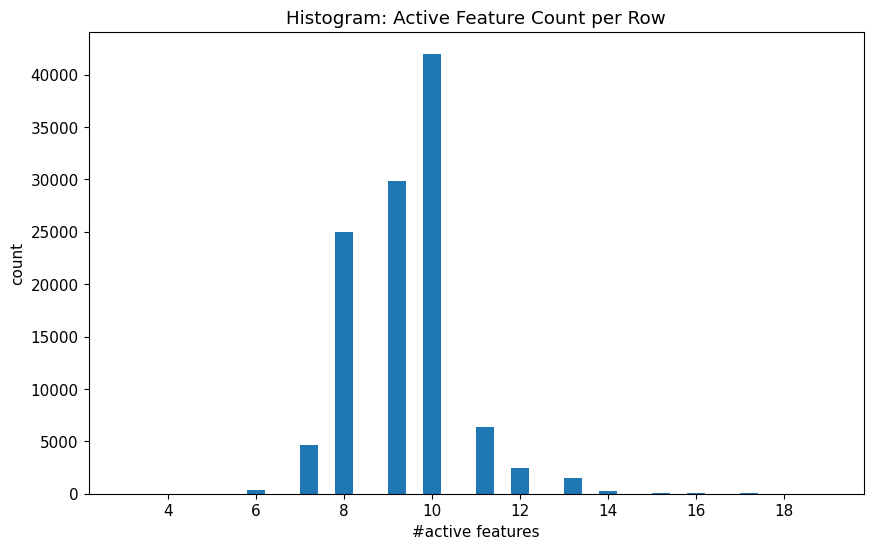

In [108]:
# ============================================================
# Sub-Step B7.4 — Row-wise Activation Density
# ============================================================

X_act = (num_df.fillna(0.0) != 0).astype(int)
active_count = X_act.sum(axis=1)

density_stats = active_count.describe(percentiles=[0.01,0.05,0.5,0.95,0.99]).to_frame().T

add_text_page_b7(
    title="STEP B7.4 — Row-wise Activation Density",
    lines=[
        "Purpose:",
        "- Inspect how many numeric features are active per row (global regime view)",
        "",
        "Active definition: value != 0 after NaN filled with 0",
        "",
        "Active feature count summary:",
        density_stats.to_string(index=False)
    ]
)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(active_count.values, bins=40)
ax.set_title("Histogram: Active Feature Count per Row")
ax.set_xlabel("#active features")
ax.set_ylabel("count")

add_fig_page_b7(
    "STEP B7.4 — Activation Density Histogram",
    fig
)

density_stats, fig

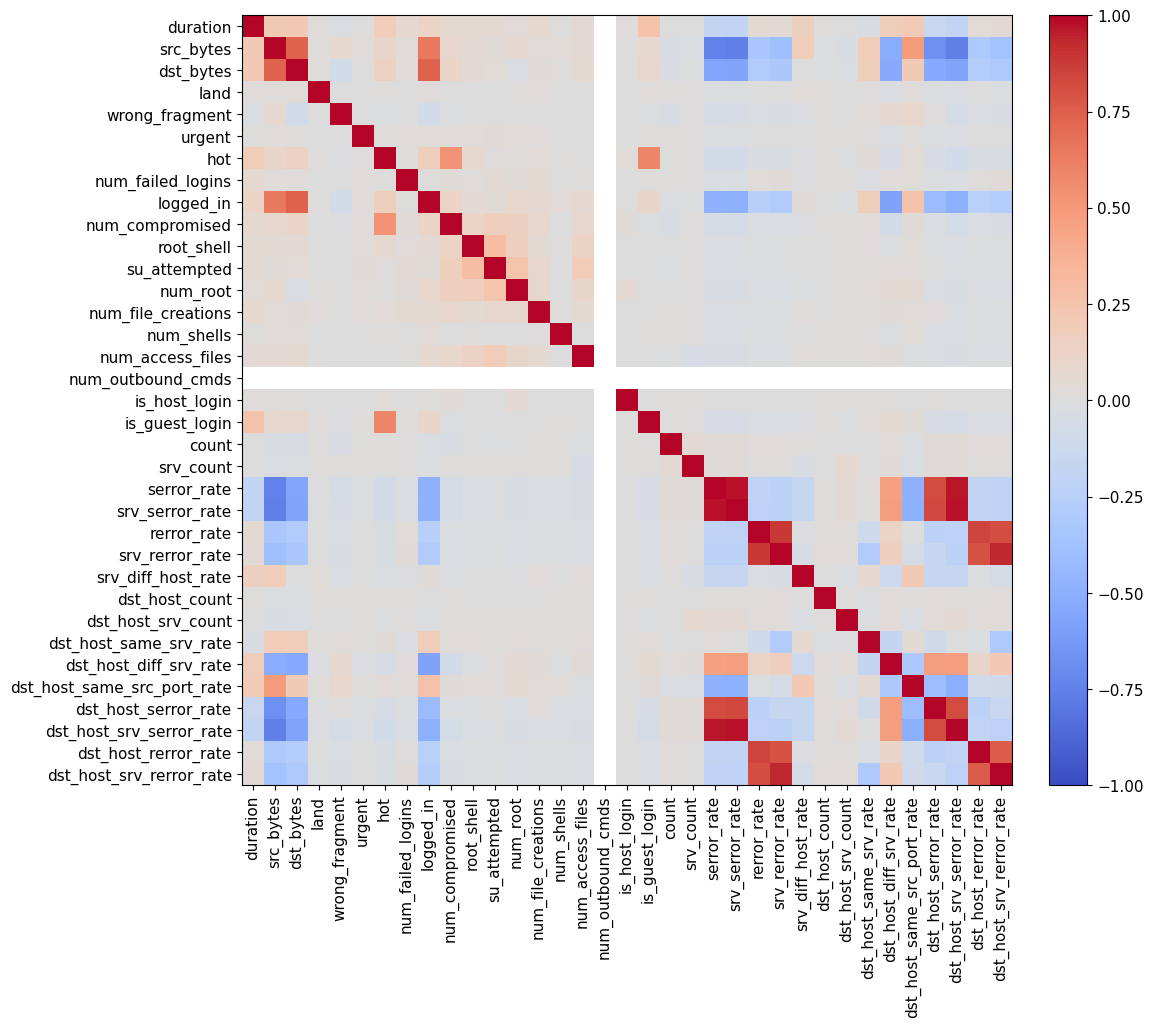

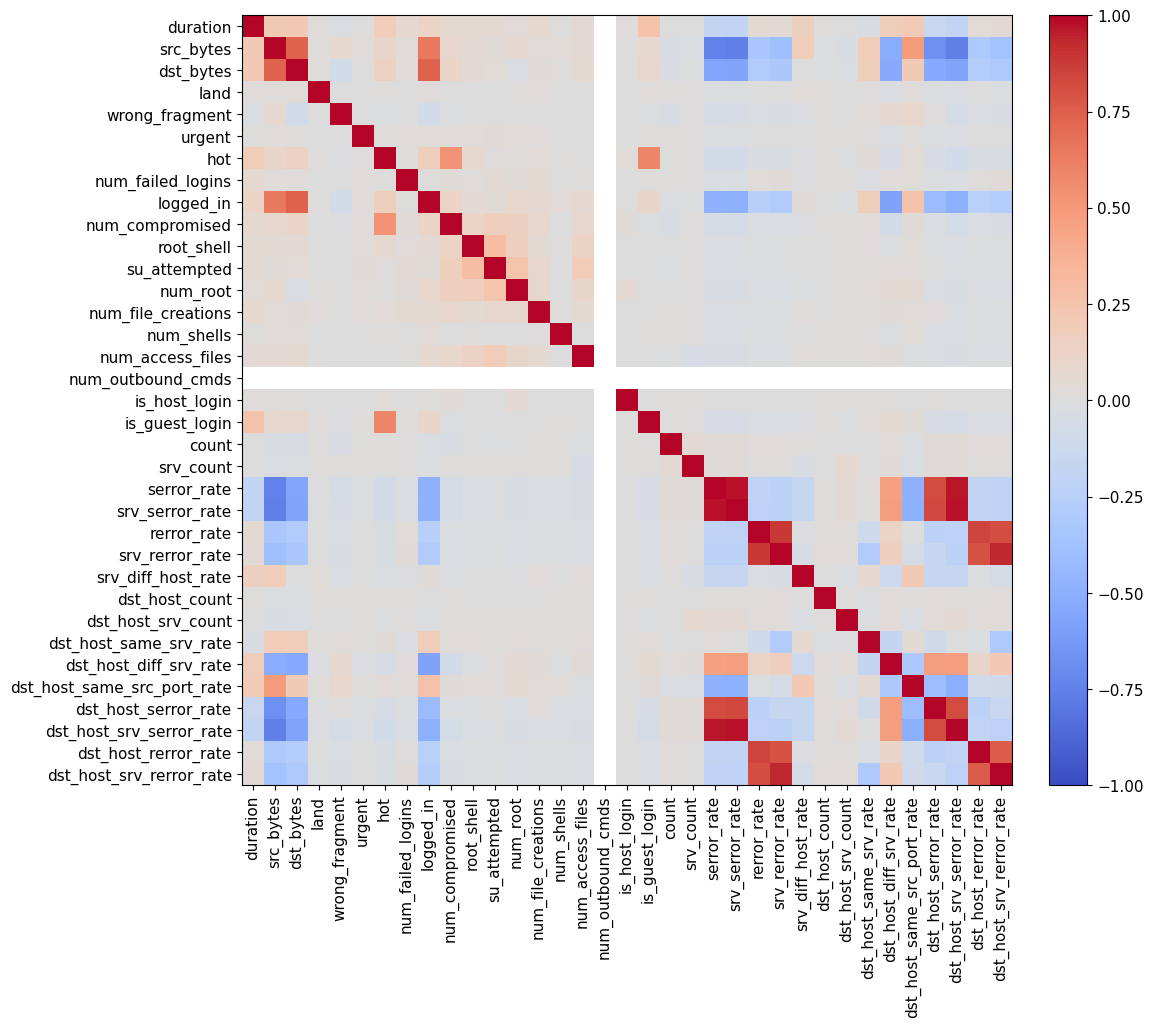

In [109]:
# ============================================================
# Sub-Step B7.5 — Activation Correlation (Binary) Heatmap
# ============================================================

# Correlation on binary activation (phi coefficient / Pearson on 0-1)
act_corr = X_act.corr(method="pearson")

add_text_page_b7(
    title="STEP B7.5 — Activation Correlation (Binary) Overview",
    lines=[
        "Purpose:",
        "- Detect co-activation structure among features using binary activation correlation",
        "",
        "Note:",
        "- This is not value correlation; it captures whether features tend to be active together."
    ]
)

fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(act_corr.values, cmap="coolwarm", vmin=-1, vmax=1)

ax.set_xticks(range(len(act_corr.columns)))
ax.set_xticklabels(act_corr.columns, rotation=90)
ax.set_yticks(range(len(act_corr.index)))
ax.set_yticklabels(act_corr.index)

plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

add_fig_page_b7(
    "STEP B7.5 — Activation Correlation Heatmap (Binary)",
    fig
)

fig

In [110]:
# ============================================================
# Sub-Step B7.6 — Highly Co-Activated Feature Pairs
# ============================================================

ACT_THRESH = 0.70

pairs = []
cols = act_corr.columns

for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        v = act_corr.iloc[i, j]
        if pd.notna(v) and abs(v) >= ACT_THRESH:
            pairs.append({"feature_1": cols[i], "feature_2": cols[j], "act_corr": v})

if len(pairs) > 0:
    pairs_act_df = (
        pd.DataFrame(pairs)
        .assign(abs_corr=lambda x: x["act_corr"].abs())
        .sort_values("abs_corr", ascending=False)
        .drop(columns="abs_corr")
    )
else:
    pairs_act_df = pd.DataFrame(columns=["feature_1","feature_2","act_corr"])

add_text_page_b7(
    title="STEP B7.6 — Highly Co-Activated Feature Pairs",
    lines=[
        "Purpose:",
        "- List feature pairs with strong co-activation tendency",
        "",
        f"Threshold: |activation_corr| >= {ACT_THRESH}",
        f"Total pairs found: {len(pairs_act_df)}",
        "",
        "Top co-activated pairs:",
        pairs_act_df.head(30).to_string(index=False) if len(pairs_act_df) > 0 else
        "No pairs exceed the activation correlation threshold."
    ]
)

pairs_act_df.head(30)

feature_1                 feature_2  act_corr
9        srv_serror_rate  dst_host_srv_serror_rate  0.976502
5            serror_rate           srv_serror_rate  0.975778
7            serror_rate  dst_host_srv_serror_rate  0.963524
14       srv_rerror_rate  dst_host_srv_rerror_rate  0.932211
10           rerror_rate           srv_rerror_rate  0.889231
11           rerror_rate      dst_host_rerror_rate  0.848489
8        srv_serror_rate      dst_host_serror_rate  0.831378
6            serror_rate      dst_host_serror_rate  0.823775
15  dst_host_serror_rate  dst_host_srv_serror_rate  0.822979
12           rerror_rate  dst_host_srv_rerror_rate  0.818141
13       srv_rerror_rate      dst_host_rerror_rate  0.802854
16  dst_host_rerror_rate  dst_host_srv_rerror_rate  0.761886
2              src_bytes           srv_serror_rate -0.755446
3              src_bytes  dst_host_srv_serror_rate -0.753620
1              src_bytes               serror_rate -0.746098
4              dst_bytes                 logged_in  0.739898
0              src_bytes                 dst_bytes  0.734104

In [111]:
# ============================================================
# Sub-Step B7.7 — Export PDF (Finalize)
# ============================================================

render_report_b7(PDF_PATH_B7)

print(f"✅ PDF generated: {PDF_PATH_B7}")
display(FileLink(PDF_PATH_B7))

✅ PDF generated: EDA_STEP_B7_Sentinel_and_ZeroInflation_Landscape_Global.pdf


/kaggle/working/EDA_STEP_B7_Sentinel_and_ZeroInflation_Landscape_Global.pdf

__Insight Kesimpulan (Naratif — Mendalam)__

STEP B7 mengungkap bahwa inti struktur global dataset ini bukan terletak pada nilai numerik kontinu, melainkan pada pola aktivasi fitur dan penggunaan sentinel. Nilai ekstrem seperti 99999 berfungsi sebagai kode sistematis yang secara signifikan memengaruhi distribusi, outlier landscape, dan proyeksi PCA. Sementara itu, zero-inflation ekstrem menunjukkan bahwa mayoritas fitur hanya aktif dalam kondisi tertentu, sehingga setiap observasi hanya membawa sebagian kecil informasi aktif.

Yang paling krusial, meskipun korelasi nilai mentah hampir nol (B3), korelasi aktivasi menunjukkan struktur yang sangat kuat dan bermakna. Ini menegaskan bahwa dataset ini adalah sistem event-driven logging dengan conditional relevance, bukan sekadar tabel numerik biasa.

Dengan demikian, banyak fenomena yang terlihat “aneh” di B1–B6 (skew ekstrem, PCA overlap, singleton clustering) kini dapat dijelaskan secara konsisten oleh dua mekanisme global: sentinel coding dan activation sparsity.

# BLOCK C — Per-Variable Deep Dive (Numerical & Pseudo-Numerical Object)

__Fokus utama Block C:__
memahami perilaku setiap fitur secara individual (univariate & semi-local),
khususnya karena dataset ini banyak object yang isinya numerik.

__Block ini menjawab:__
“Setiap fitur ini sehat, noisy, berisiko, atau berpotensi menyesatkan?”

## Feature Typing & Grouping

In [112]:
# ============================================================
# STEP C1 — Report Setup (Collector)
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

PDF_PATH_C1 = "EDA_STEP_C1_Feature_Typing_and_Grouping.pdf"
REPORT_PAGES_C1 = []

def add_text_page_c1(title: str, lines: list[str]):
    REPORT_PAGES_C1.append({
        "type": "text",
        "title": title,
        "lines": [str(x) for x in lines]
    })

def render_report_c1(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped = []
        for line in lines:
            wrapped.extend(wrap(str(line), 110))
            wrapped.append("")
        ax.text(
            0.01, 0.98,
            f"{title}\n\n" + "\n".join(wrapped),
            va="top", ha="left", family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_C1:
            fig, ax = plt.subplots()
            _render_text(ax, page["title"], page["lines"])
            pdf.savefig(fig)
            plt.close(fig)

print("✅ Collector STEP C1 siap.")

✅ Collector STEP C1 siap.


In [113]:
# ============================================================
# Sub-Step C1.1 — Raw dtype inspection
# ============================================================

dtype_series = df.dtypes.sort_values()

add_text_page_c1(
    title="STEP C1.1 — Raw dtype inspection",
    lines=[
        "Purpose:",
        "- Inspect raw dtype of each feature as initial typing reference",
        "",
        "Raw dtypes per column:",
        dtype_series.to_string()
    ]
)

dtype_series

dst_host_serror_rate           float64
dst_host_same_src_port_rate    float64
dst_host_diff_srv_rate         float64
dst_host_same_srv_rate         float64
duration                        object
srv_count                       object
serror_rate                     object
srv_serror_rate                 object
rerror_rate                     object
srv_rerror_rate                 object
same_srv_rate                   object
dst_host_count                  object
srv_diff_host_rate              object
count                           object
dst_host_srv_count              object
dst_host_srv_diff_host_rate     object
dst_host_srv_serror_rate        object
dst_host_rerror_rate            object
diff_srv_rate                   object
is_guest_login                  object
is_host_login                   object
num_outbound_cmds               object
protocol_type                   object
service                         object
flag                            object
src_bytes                

In [114]:
# ============================================================
# Sub-Step C1.2 — Feature grouping (semantic-based)
# ============================================================

# Numeric native (true numeric dtypes)
numeric_native = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Object columns
object_cols = df.select_dtypes(include="object").columns.tolist()

# Categorical genuine (berdasarkan Block A)
categorical_genuine = [
    "protocol_type",
    "type_of_attack"
]

# Object → numeric candidate (object berisi angka + sentinel)
object_numeric_candidate = [
    c for c in object_cols if c not in categorical_genuine
]

add_text_page_c1(
    title="STEP C1.2 — Feature grouping (Semantic-based)",
    lines=[
        "Purpose:",
        "- Group features based on semantic inspection from Block A (Step A3)",
        "",
        f"Numeric native features ({len(numeric_native)}):",
        ", ".join(numeric_native),
        "",
        f"Object → numeric candidate ({len(object_numeric_candidate)}):",
        ", ".join(object_numeric_candidate),
        "",
        f"Categorical genuine ({len(categorical_genuine)}):",
        ", ".join(categorical_genuine),
    ]
)

pd.Series({
    "numeric_native": len(numeric_native),
    "object_numeric_candidate": len(object_numeric_candidate),
    "categorical_genuine": len(categorical_genuine)
})

numeric_native               4
object_numeric_candidate    36
categorical_genuine          2
dtype: int64

In [115]:
# ============================================================
# Sub-Step C1.3 — Ambiguous / special-attention features
# ============================================================

ambiguous_features = []

for col in object_numeric_candidate:
    sample_vals = df[col].dropna().astype(str).str.strip().str.lower().unique()[:20]
    if any(v in ["*", "99999"] for v in sample_vals):
        ambiguous_features.append(col)

add_text_page_c1(
    title="STEP C1.3 — Ambiguous / special-attention features",
    lines=[
        "Purpose:",
        "- Identify features with mixed numeric + sentinel / symbol representation",
        "",
        f"Ambiguous features requiring special attention ({len(ambiguous_features)}):",
        ", ".join(ambiguous_features) if ambiguous_features else "None detected"
    ]
)

ambiguous_features

['duration',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [116]:
# ============================================================
# Sub-Step C1.4 — Export PDF (Finalize)
# ============================================================

render_report_c1(PDF_PATH_C1)

print(f"✅ PDF generated: {PDF_PATH_C1}")
display(FileLink(PDF_PATH_C1))

✅ PDF generated: EDA_STEP_C1_Feature_Typing_and_Grouping.pdf


/kaggle/working/EDA_STEP_C1_Feature_Typing_and_Grouping.pdf

__Insight Kesimpulan (Naratif — Mendalam)__

STEP C1 mengunci realitas paling penting sebelum Block C masuk ke eksplorasi distribusi: dataset ini secara struktural “terlihat” seperti data kategorikal karena dominasi dtype object, padahal secara substansi banyak kolom adalah fitur numerik. Perbedaan ini bukan masalah kosmetik, melainkan sifat dasar dataset yang merefleksikan format logging—di mana nilai numerik sering dibungkus sebagai string dan dapat bercampur dengan sentinel atau simbol yang membawa makna keadaan (state).

Dengan hanya 4 fitur numeric native dan 36 fitur object yang sebenarnya kandidat numerik, Block C tidak boleh berjalan dengan pola eksplorasi numerik standar tanpa kontrol semantik. Daftar 28 fitur ambigu semakin menegaskan bahwa risiko terbesar bukan pada “fitur mana yang informatif”, melainkan “fitur mana yang bisa menyesatkan jika dibaca dengan asumsi salah”. Oleh karena itu, STEP C1 berfungsi sebagai fondasi sistematis agar seluruh eksplorasi per-variabel berikutnya terarah, tidak mubazir, dan tetap sinkron dengan temuan Block A/B tentang placeholder implisit serta struktur aktivasi yang kuat.

## Numerical Feature Distribution (Raw Scale)

In [117]:
# ============================================================
# STEP C2 — Report Setup (Collector)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

PDF_PATH_C2 = "EDA_STEP_C2_Numerical_Distribution_Raw_Scale.pdf"
REPORT_PAGES_C2 = []

def add_text_page_c2(title: str, lines: list[str]):
    REPORT_PAGES_C2.append({
        "type": "text",
        "title": title,
        "lines": [str(x) for x in lines]
    })

def add_fig_page_c2(title: str, fig):
    REPORT_PAGES_C2.append({
        "type": "fig",
        "title": title,
        "fig": fig
    })

def render_report_c2(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped = []
        for line in lines:
            wrapped.extend(wrap(str(line), 110))
            wrapped.append("")
        ax.text(
            0.01, 0.98,
            f"{title}\n\n" + "\n".join(wrapped),
            va="top", ha="left", family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_C2:
            if page["type"] == "text":
                fig, ax = plt.subplots()
                _render_text(ax, page["title"], page["lines"])
                pdf.savefig(fig)
                plt.close(fig)
            elif page["type"] == "fig":
                page["fig"].suptitle(page["title"], y=0.98)
                pdf.savefig(page["fig"])
                plt.close(page["fig"])

print("✅ Collector STEP C2 siap.")

✅ Collector STEP C2 siap.


In [118]:
# ============================================================
# Sub-Step C2.1 — Define numerical feature set
# ============================================================

numeric_native = [
    "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate",
    "dst_host_serror_rate"
]

object_numeric_candidate = [
    "duration", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent",
    "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell",
    "su_attempted", "num_root", "num_file_creations", "num_shells",
    "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login",
    "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate",
    "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
    "dst_host_count", "dst_host_srv_count", "dst_host_srv_diff_host_rate",
    "dst_host_srv_serror_rate", "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate"
]

numeric_features = numeric_native + object_numeric_candidate

add_text_page_c2(
    title="STEP C2.1 — Numerical feature set",
    lines=[
        "Purpose:",
        "- Define numerical features to be analyzed in STEP C2 based on STEP C1",
        "",
        f"Numeric native ({len(numeric_native)}):",
        ", ".join(numeric_native),
        "",
        f"Object → numeric candidate ({len(object_numeric_candidate)}):",
        ", ".join(object_numeric_candidate),
        "",
        f"Total numerical features analyzed: {len(numeric_features)}"
    ]
)

len(numeric_features)

38

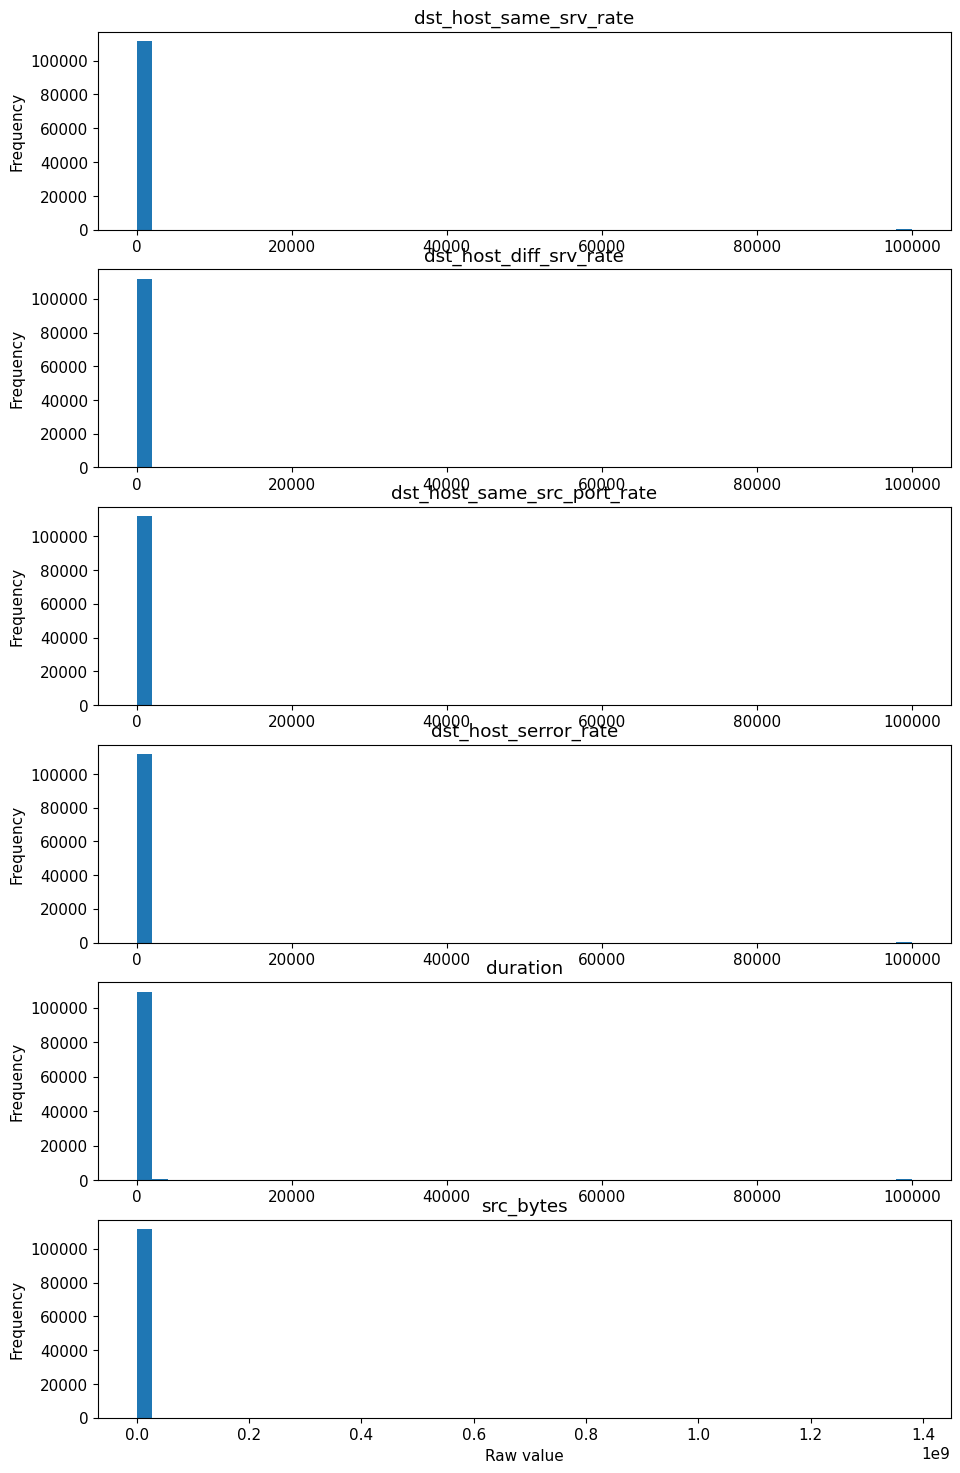

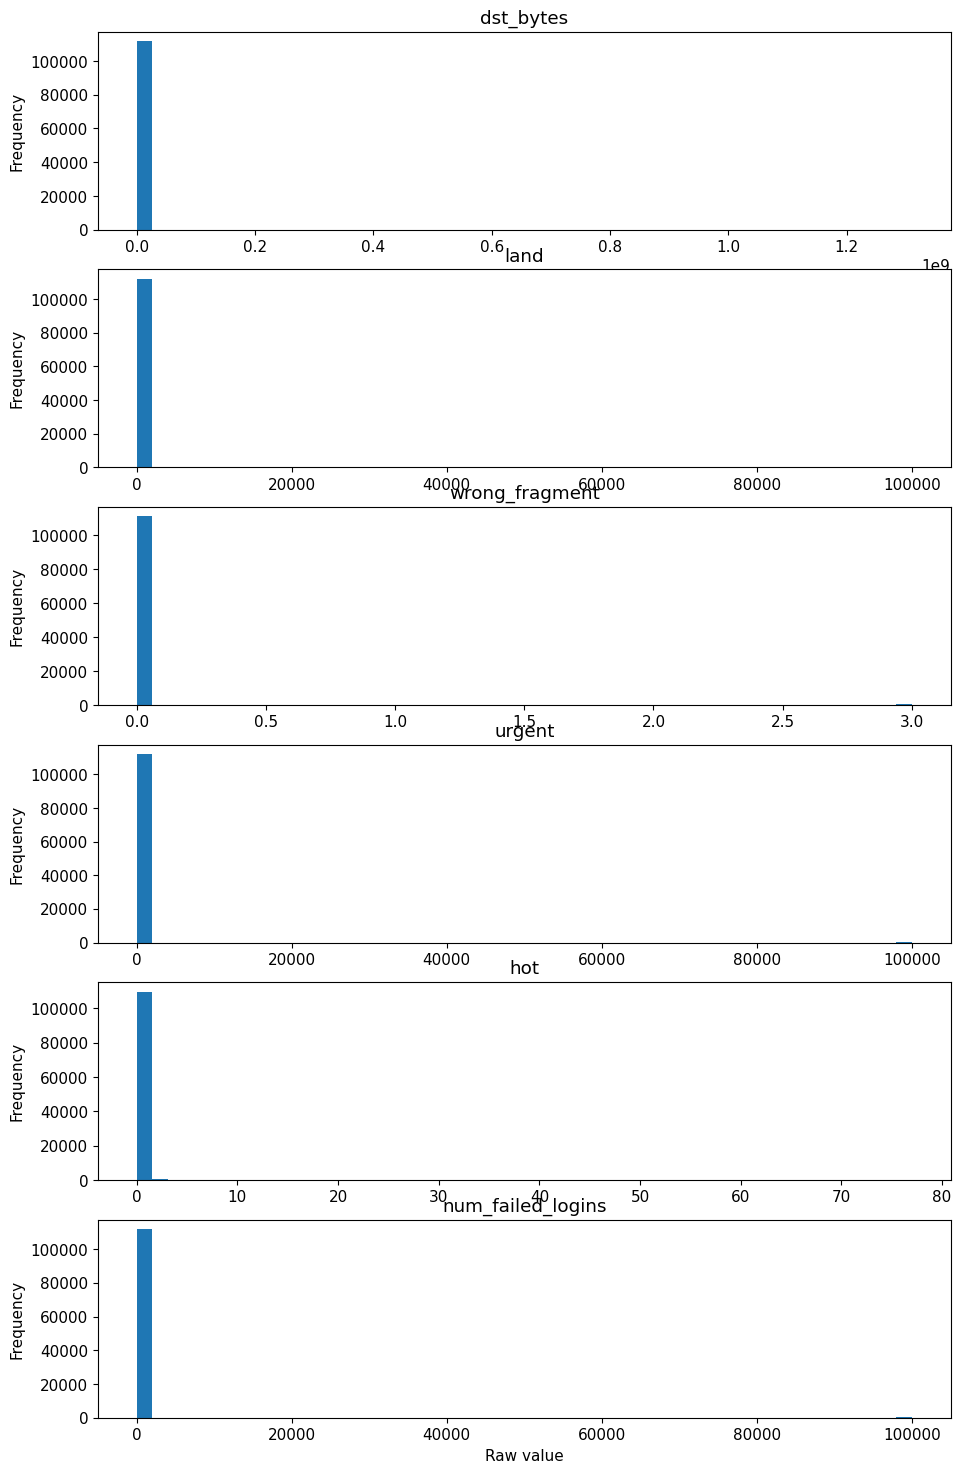

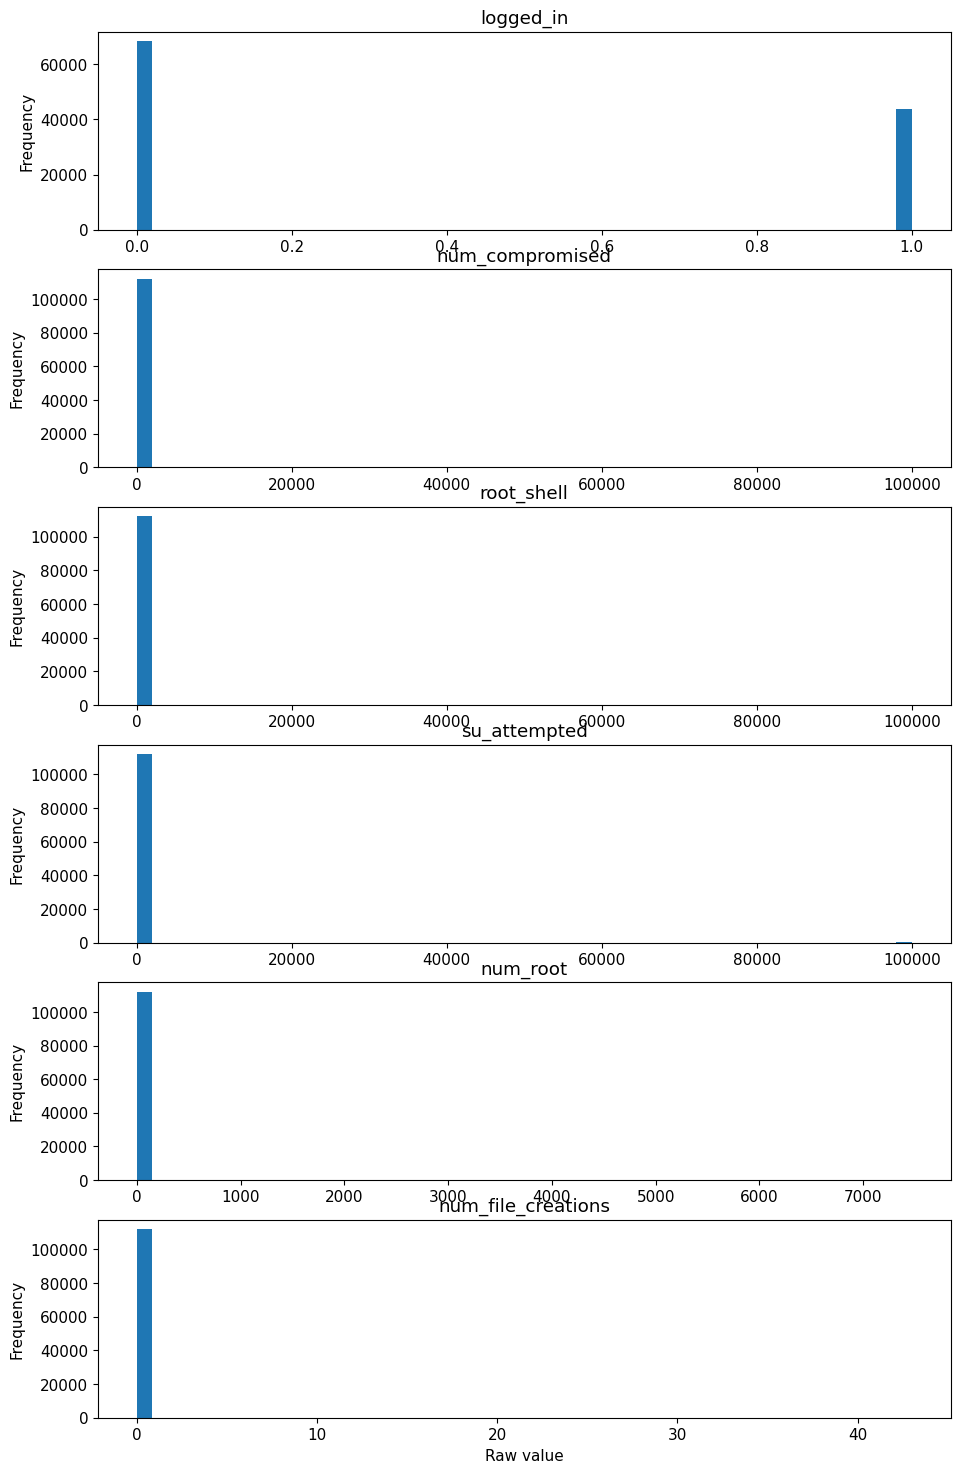

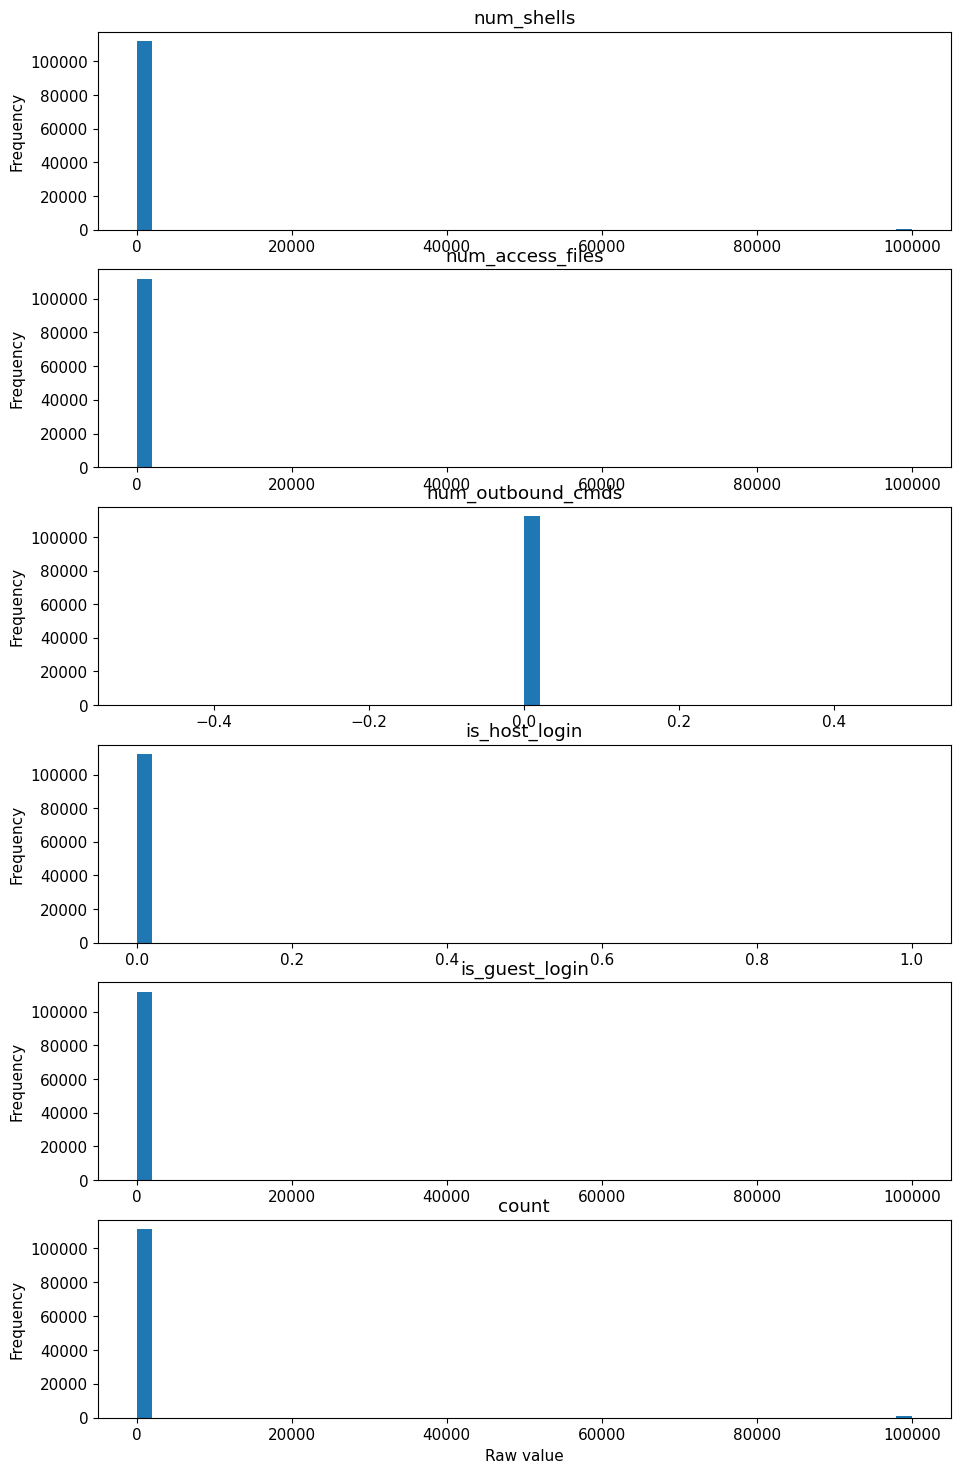

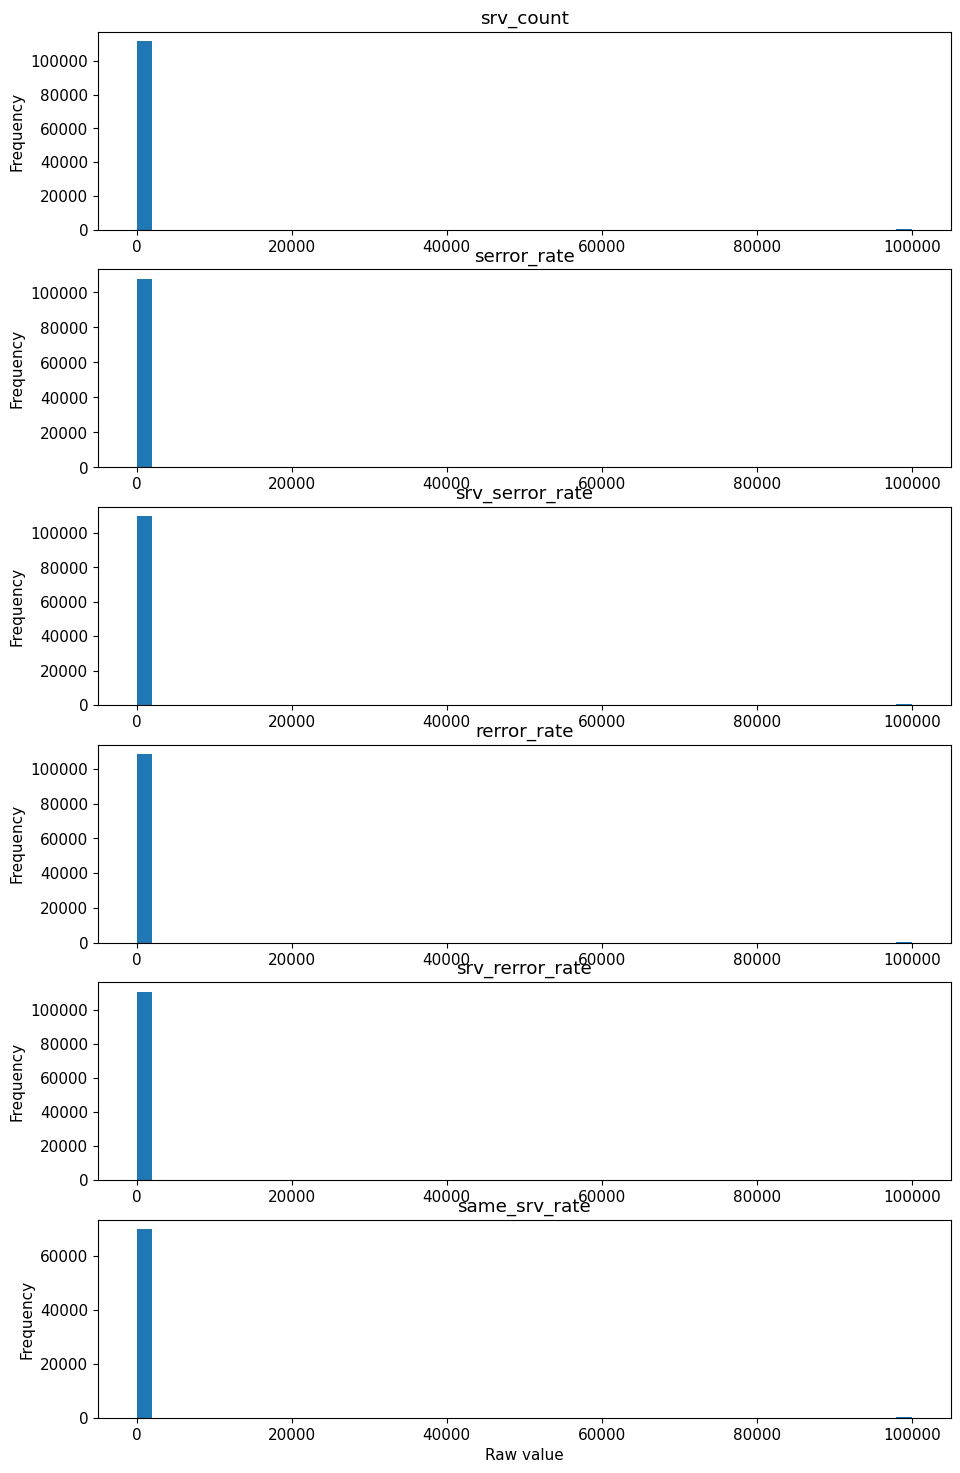

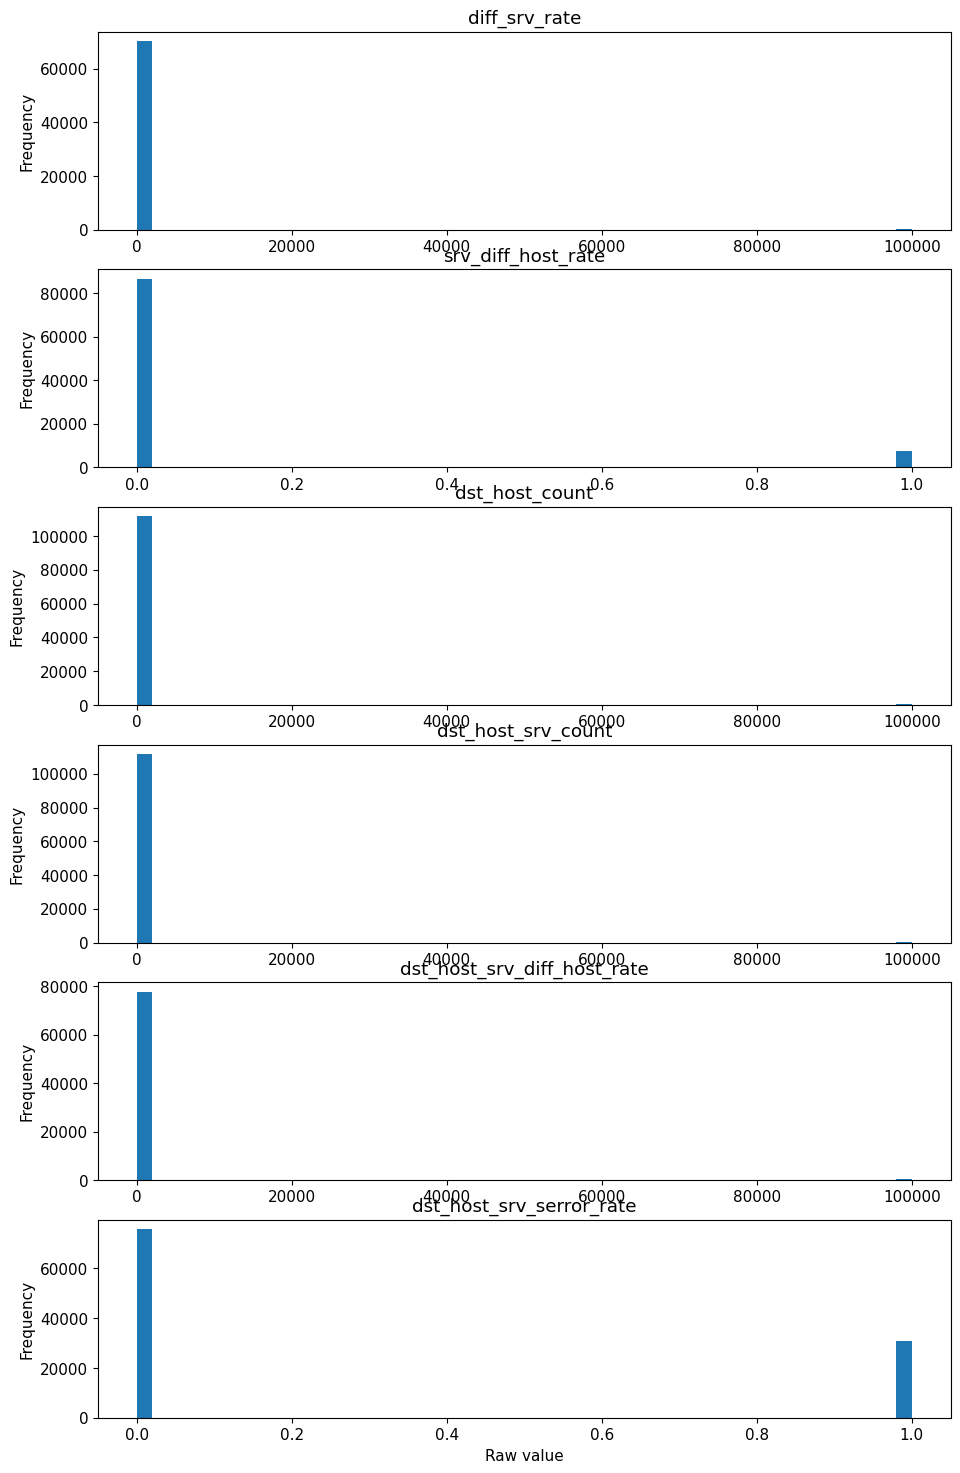

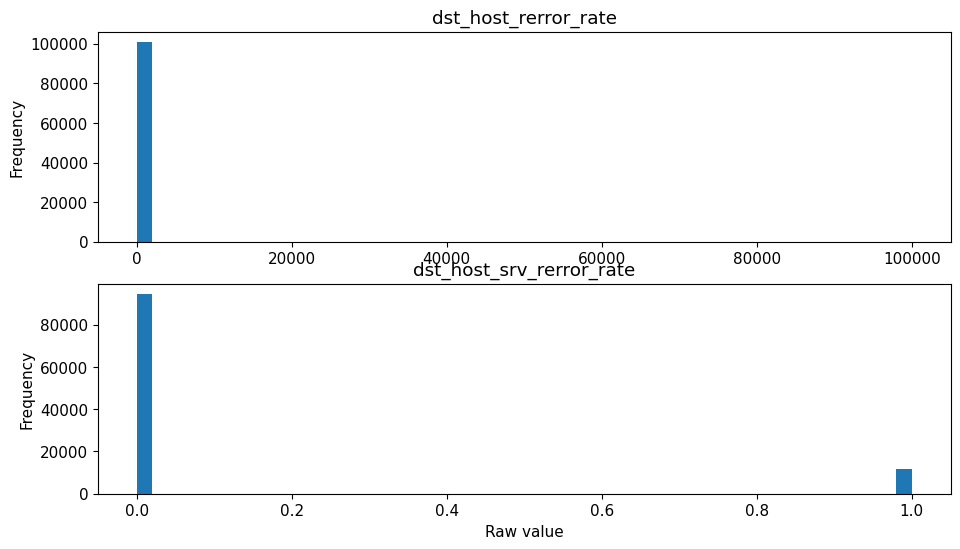

In [119]:
# ============================================================
# Sub-Step C2.2 — Raw histogram generation (looped)
# ============================================================

BINS = 50
FEATURES_PER_PAGE = 6

features = numeric_features.copy()

for i in range(0, len(features), FEATURES_PER_PAGE):
    batch = features[i:i + FEATURES_PER_PAGE]
    
    fig, axes = plt.subplots(
        nrows=len(batch),
        ncols=1,
        figsize=(11, 3 * len(batch)),
        squeeze=False
    )
    
    for ax, col in zip(axes.flatten(), batch):
        values = pd.to_numeric(df[col], errors="coerce")
        ax.hist(values.dropna(), bins=BINS)
        ax.set_title(col)
        ax.set_ylabel("Frequency")
    
    ax.set_xlabel("Raw value")
    add_fig_page_c2(
        title=f"STEP C2.2 — Raw histograms (features {i+1}–{i+len(batch)})",
        fig=fig
    )

In [120]:
# ============================================================
# Sub-Step C2.3 — Activation summary (zero vs non-zero)
# ============================================================

activation_summary = []

for col in numeric_features:
    values = pd.to_numeric(df[col], errors="coerce")
    zero_rate = (values == 0).mean()
    non_zero_rate = (values != 0).mean()
    
    activation_summary.append({
        "feature": col,
        "zero_rate": zero_rate,
        "non_zero_rate": non_zero_rate
    })

activation_df = (
    pd.DataFrame(activation_summary)
    .sort_values("zero_rate", ascending=False)
)

add_text_page_c2(
    title="STEP C2.3 — Activation summary (zero vs non-zero)",
    lines=[
        "Purpose:",
        "- Quantify activation pattern of numerical features on raw scale",
        "",
        activation_df.to_string(index=False)
    ]
)

activation_df

feature  zero_rate  non_zero_rate
21                is_host_login   0.999315       0.000685
20            num_outbound_cmds   0.998346       0.001654
15                 su_attempted   0.996923       0.003077
9                        urgent   0.996683       0.003317
7                          land   0.996167       0.003833
14                   root_shell   0.996114       0.003886
17           num_file_creations   0.995794       0.004206
18                   num_shells   0.995331       0.004669
11            num_failed_logins   0.994255       0.005745
16                     num_root   0.992948       0.007052
19             num_access_files   0.991587       0.008413
22               is_guest_login   0.989284       0.010716
8                wrong_fragment   0.986767       0.013233
13              num_compromised   0.986029       0.013971
10                          hot   0.974459       0.025541
4                      duration   0.915248       0.084752
28              srv_rerror_rate   0.865989       0.134011
27                  rerror_rate   0.863792       0.136208
37     dst_host_srv_rerror_rate   0.842484       0.157516
36         dst_host_rerror_rate   0.816641       0.183359
31           srv_diff_host_rate   0.771375       0.228625
26              srv_serror_rate   0.696654       0.303346
34  dst_host_srv_diff_host_rate   0.687094       0.312906
25                  serror_rate   0.683181       0.316819
35     dst_host_srv_serror_rate   0.673648       0.326352
3          dst_host_serror_rate   0.641241       0.358759
12                    logged_in   0.607785       0.392215
30                diff_srv_rate   0.597149       0.402851
6                     dst_bytes   0.534817       0.465183
2   dst_host_same_src_port_rate   0.500534       0.499466
5                     src_bytes   0.391566       0.608434
1        dst_host_diff_srv_rate   0.368159       0.631841
0        dst_host_same_srv_rate   0.055146       0.944854
29                same_srv_rate   0.021726       0.978274
23                        count   0.000098       0.999902
24                    srv_count   0.000098       0.999902
33           dst_host_srv_count   0.000027       0.999973
32               dst_host_count   0.000027       0.999973

In [121]:
# ============================================================
# Sub-Step C2.4 — Export PDF (Finalize)
# ============================================================

render_report_c2(PDF_PATH_C2)

print(f"✅ PDF generated: {PDF_PATH_C2}")
display(FileLink(PDF_PATH_C2))

✅ PDF generated: EDA_STEP_C2_Numerical_Distribution_Raw_Scale.pdf


/kaggle/working/EDA_STEP_C2_Numerical_Distribution_Raw_Scale.pdf

__Insight Kesimpulan (Naratif — Mendalam)__

STEP C2 menegaskan bahwa ruang fitur numerik pada dataset network intrusion ini didominasi oleh distribusi mentah yang sangat tidak seimbang, dengan nol sebagai nilai mayoritas pada sebagian besar fitur. Histogram raw hampir selalu menunjukkan spike besar di nol, sementara nilai non-zero muncul sebagai tail atau cluster kecil yang bersifat kondisional. Hal ini berlaku lintas tipe fitur: mulai dari indikator status biner, rate/error-rate, hingga bytes dan duration.

Temuan ini memperjelas bahwa fitur-fitur numerik di dataset ini tidak dirancang sebagai variabel kontinu klasik, melainkan sebagai representasi kejadian atau kondisi tertentu dalam sistem jaringan dan logging. Oleh karena itu, membaca distribusi mentah tanpa konteks aktivasi akan menghasilkan gambaran yang dangkal. STEP C2 berfungsi sebagai fondasi penting untuk memahami bahwa eksplorasi lanjutan (log-scale, skew, outlier) harus selalu mempertimbangkan dominasi nol dan pola aktivasi sebagai karakter utama data.

## Numerical Feature Distribution (Log / Transformed View)

In [122]:
# ============================================================
# STEP C3 — Report Setup (Collector)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

PDF_PATH_C3 = "EDA_STEP_C3_Numerical_Distribution_Log_View.pdf"
REPORT_PAGES_C3 = []

def add_text_page_c3(title: str, lines: list[str]):
    REPORT_PAGES_C3.append({
        "type": "text",
        "title": title,
        "lines": [str(x) for x in lines]
    })

def add_fig_page_c3(title: str, fig):
    REPORT_PAGES_C3.append({
        "type": "fig",
        "title": title,
        "fig": fig
    })

def render_report_c3(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped = []
        for line in lines:
            wrapped.extend(wrap(str(line), 110))
            wrapped.append("")
        ax.text(
            0.01, 0.98,
            f"{title}\n\n" + "\n".join(wrapped),
            va="top", ha="left", family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_C3:
            if page["type"] == "text":
                fig, ax = plt.subplots()
                _render_text(ax, page["title"], page["lines"])
                pdf.savefig(fig)
                plt.close(fig)
            elif page["type"] == "fig":
                page["fig"].suptitle(page["title"], y=0.98)
                pdf.savefig(page["fig"])
                plt.close(page["fig"])

print("✅ Collector STEP C3 siap.")

✅ Collector STEP C3 siap.


In [123]:
# ============================================================
# Sub-Step C3.1 — Define log-view candidate features
# ============================================================

# Kandidat log-view:
# - fitur dengan tail panjang
# - fitur dengan nilai non-negatif
# - fitur bukan murni biner

log_view_candidates = []

for col in numeric_features:
    values = pd.to_numeric(df[col], errors="coerce")
    if values.min(skipna=True) >= 0:
        # exclude pure binary
        unique_vals = values.dropna().unique()
        if len(unique_vals) > 3:
            log_view_candidates.append(col)

add_text_page_c3(
    title="STEP C3.1 — Log-view candidate feature set",
    lines=[
        "Purpose:",
        "- Select numerical features suitable for log-scale exploration",
        "",
        f"Total log-view candidate features: {len(log_view_candidates)}",
        "",
        ", ".join(log_view_candidates)
    ]
)

len(log_view_candidates)

20

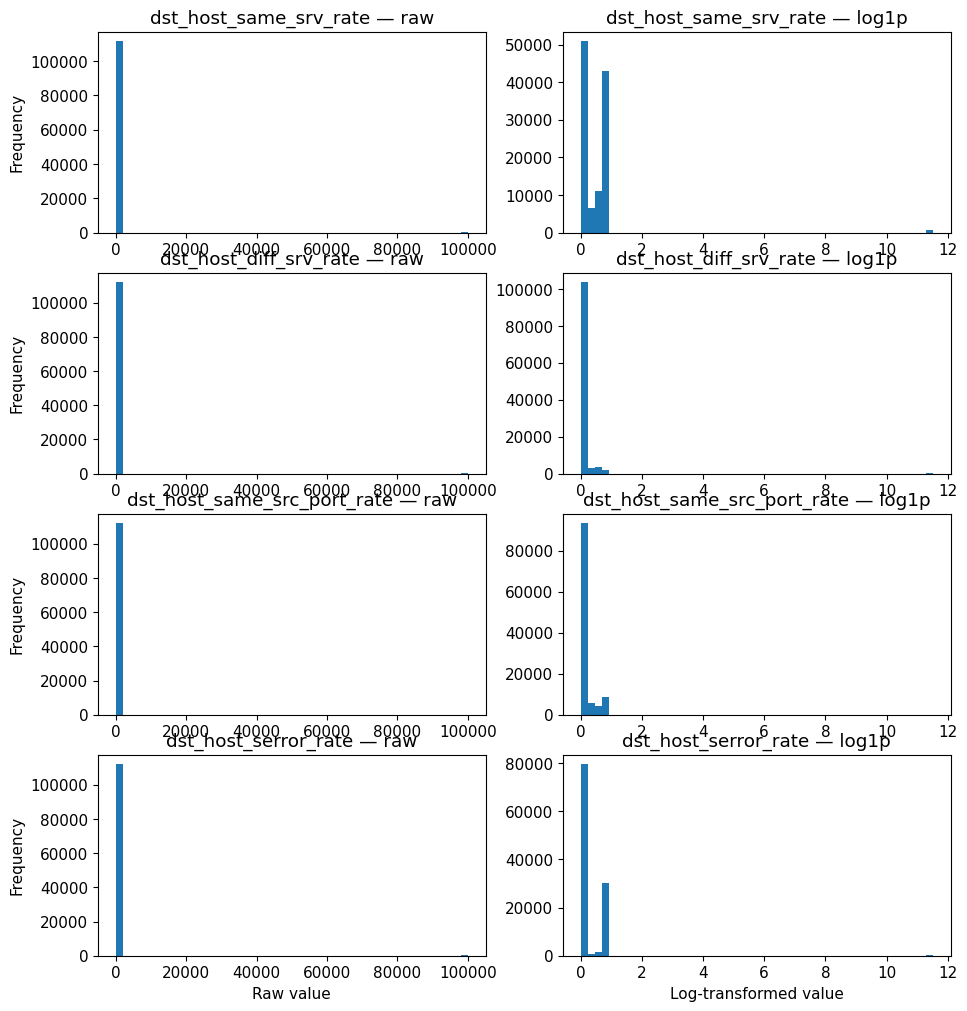

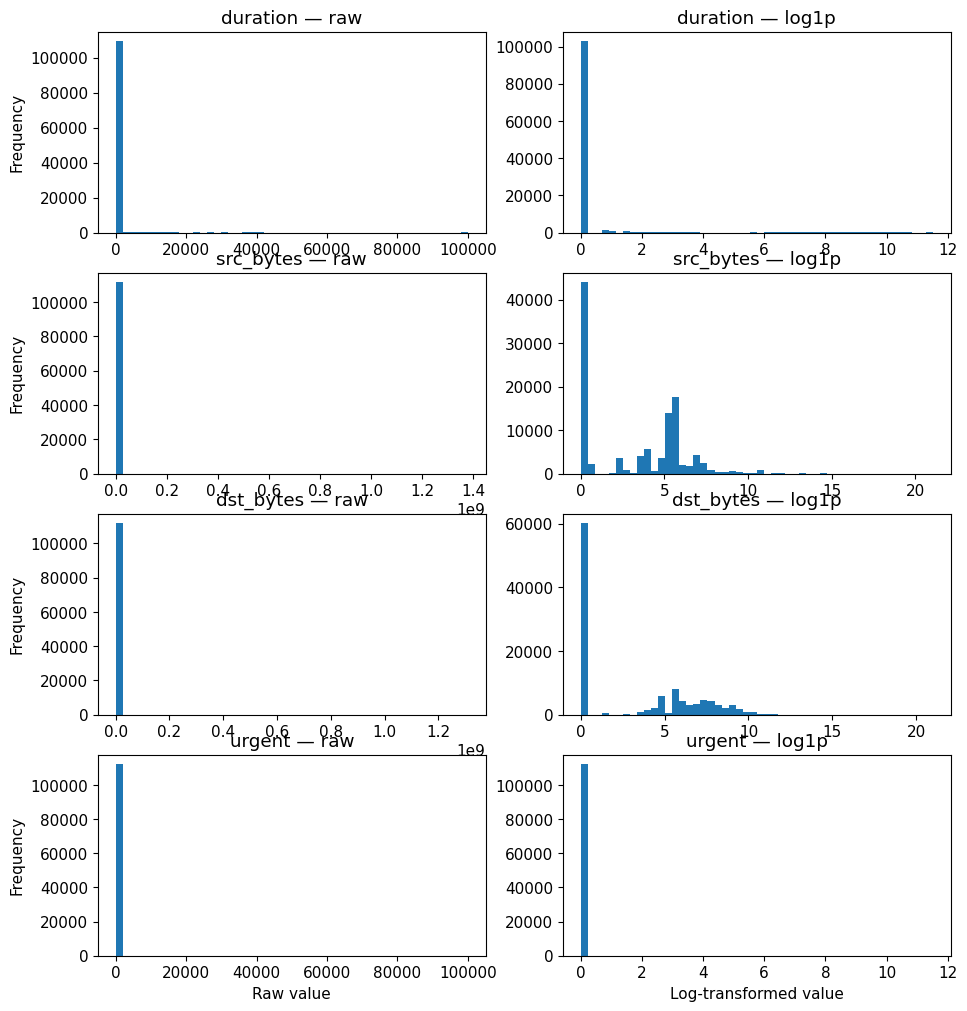

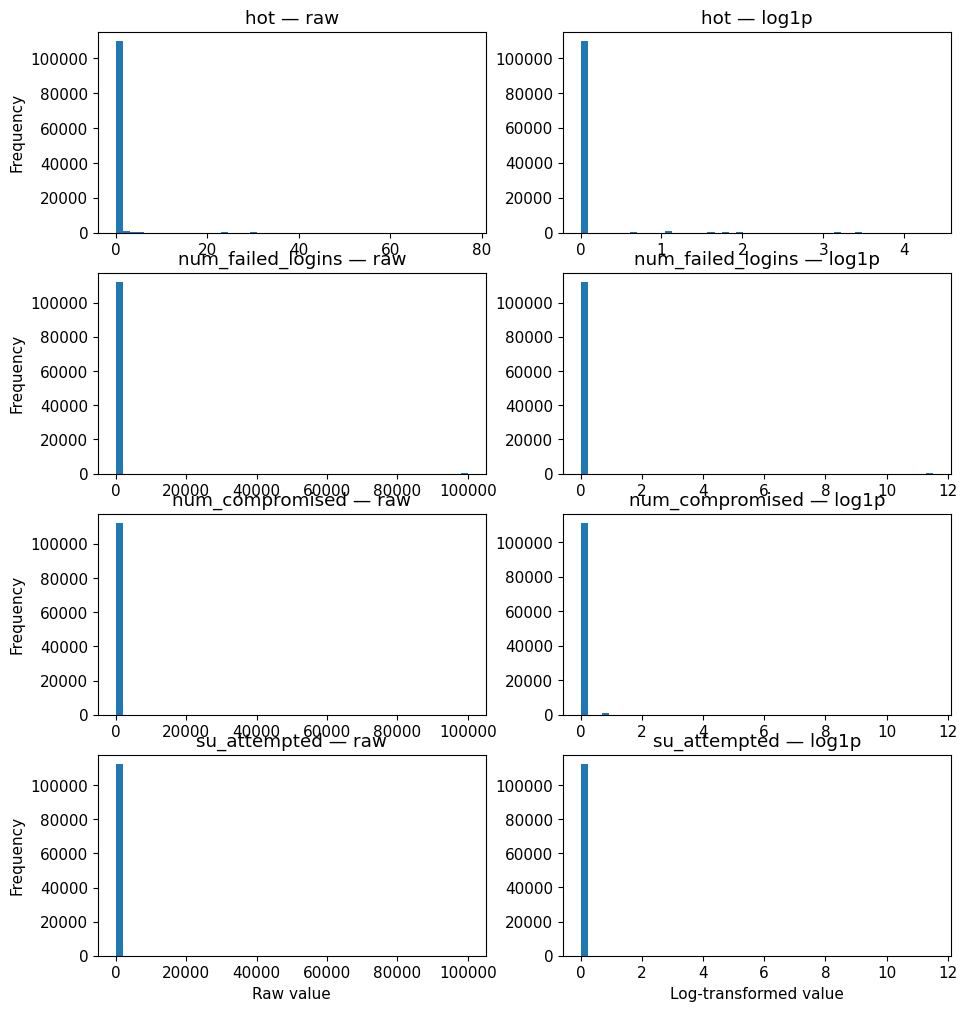

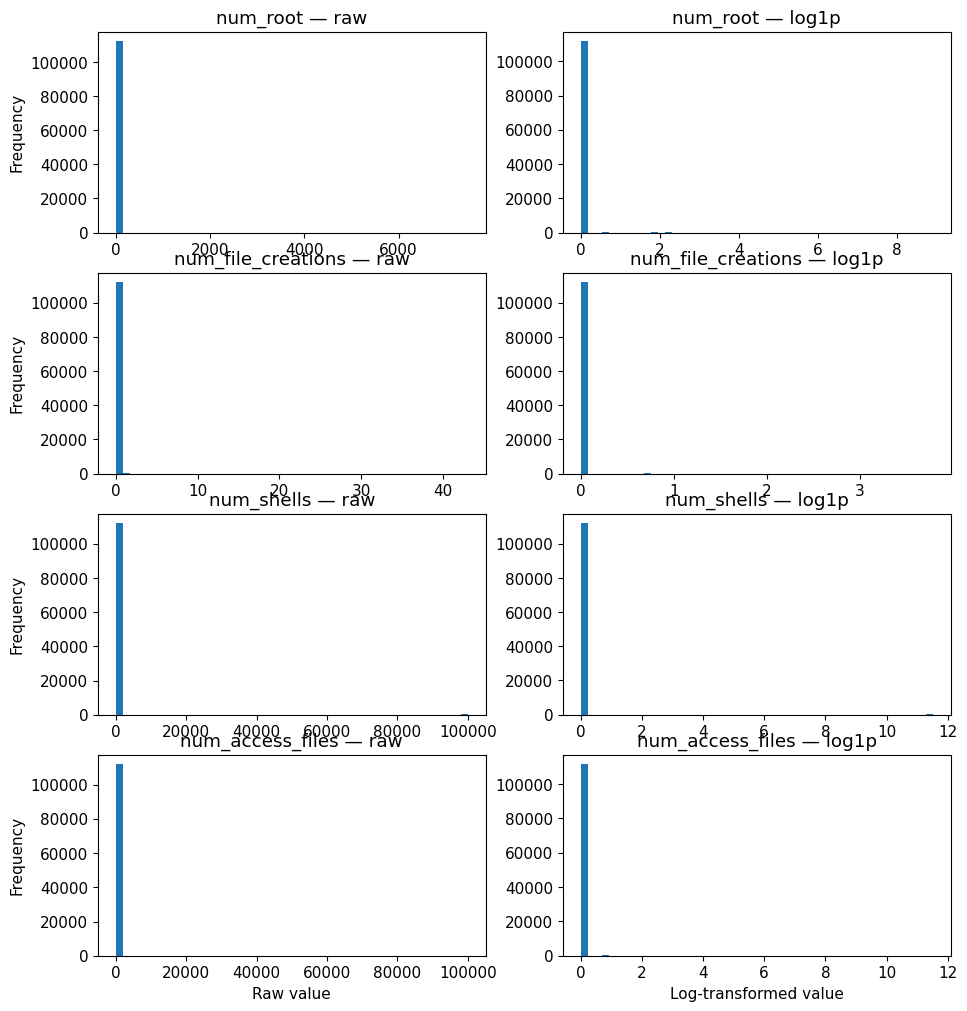

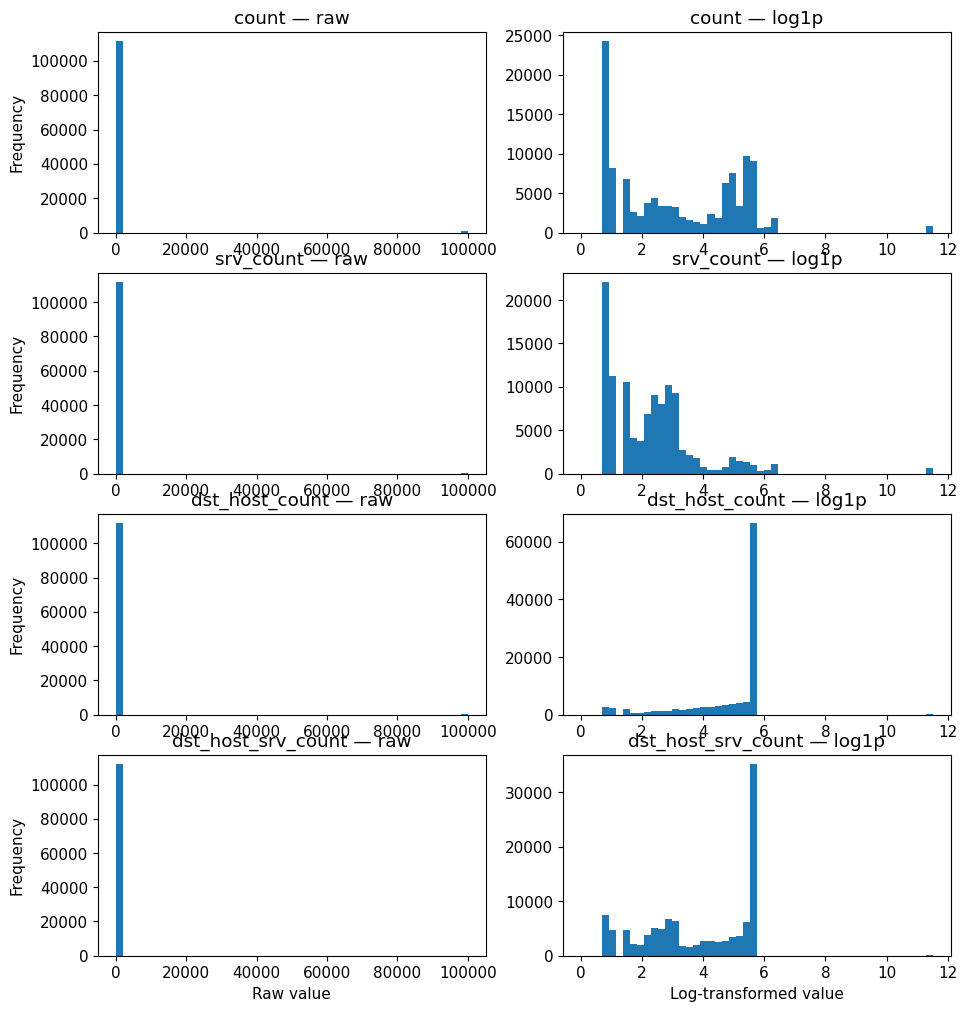

In [124]:
# ============================================================
# Sub-Step C3.2 — Raw vs log histogram comparison
# ============================================================

BINS = 50
FEATURES_PER_PAGE = 4

features = log_view_candidates.copy()

for i in range(0, len(features), FEATURES_PER_PAGE):
    batch = features[i:i + FEATURES_PER_PAGE]
    
    fig, axes = plt.subplots(
        nrows=len(batch),
        ncols=2,
        figsize=(11, 3 * len(batch)),
        squeeze=False
    )
    
    for r, col in enumerate(batch):
        values = pd.to_numeric(df[col], errors="coerce")
        
        # Raw scale
        axes[r, 0].hist(values.dropna(), bins=BINS)
        axes[r, 0].set_title(f"{col} — raw")
        axes[r, 0].set_ylabel("Frequency")
        
        # Log scale
        axes[r, 1].hist(np.log1p(values.dropna()), bins=BINS)
        axes[r, 1].set_title(f"{col} — log1p")
    
    axes[-1, 0].set_xlabel("Raw value")
    axes[-1, 1].set_xlabel("Log-transformed value")
    
    add_fig_page_c3(
        title=f"STEP C3.2 — Raw vs log histograms (features {i+1}–{i+len(batch)})",
        fig=fig
    )

In [125]:
# ============================================================
# Sub-Step C3.3 — Zero-handling effect inspection
# ============================================================

zero_effect_summary = []

for col in log_view_candidates:
    values = pd.to_numeric(df[col], errors="coerce")
    zero_rate = (values == 0).mean()
    zero_effect_summary.append({
        "feature": col,
        "zero_rate": zero_rate
    })

zero_effect_df = (
    pd.DataFrame(zero_effect_summary)
    .sort_values("zero_rate", ascending=False)
)

add_text_page_c3(
    title="STEP C3.3 — Zero-handling effect summary",
    lines=[
        "Purpose:",
        "- Quantify dominance of zeros for log-scale candidate features",
        "",
        zero_effect_df.to_string(index=False)
    ]
)

zero_effect_df

feature  zero_rate
11                 su_attempted   0.996923
7                        urgent   0.996683
13           num_file_creations   0.995794
14                   num_shells   0.995331
9             num_failed_logins   0.994255
12                     num_root   0.992948
15             num_access_files   0.991587
10              num_compromised   0.986029
8                           hot   0.974459
4                      duration   0.915248
3          dst_host_serror_rate   0.641241
6                     dst_bytes   0.534817
2   dst_host_same_src_port_rate   0.500534
5                     src_bytes   0.391566
1        dst_host_diff_srv_rate   0.368159
0        dst_host_same_srv_rate   0.055146
16                        count   0.000098
17                    srv_count   0.000098
18               dst_host_count   0.000027
19           dst_host_srv_count   0.000027

In [126]:
# ============================================================
# Sub-Step C3.4 — Heavy-tail vs spike pattern flagging
# ============================================================

tail_flags = []

for col in log_view_candidates:
    values = pd.to_numeric(df[col], errors="coerce")
    q95 = values.quantile(0.95)
    q99 = values.quantile(0.99)
    maxv = values.max()
    
    tail_flags.append({
        "feature": col,
        "q95": q95,
        "q99": q99,
        "max": maxv,
        "max_q99_ratio": maxv / q99 if q99 > 0 else np.nan
    })

tail_flag_df = pd.DataFrame(tail_flags).sort_values("max_q99_ratio", ascending=False)

add_text_page_c3(
    title="STEP C3.4 — Heavy-tail vs spike pattern indicators",
    lines=[
        "Purpose:",
        "- Flag features with extreme max relative to tail (potential spike)",
        "",
        tail_flag_df.to_string(index=False)
    ]
)

tail_flag_df

feature     q95       q99           max  max_q99_ratio
0        dst_host_same_srv_rate     1.0      1.00  9.999900e+04   99999.000000
1        dst_host_diff_srv_rate     0.6      1.00  9.999900e+04   99999.000000
2   dst_host_same_src_port_rate     1.0      1.00  9.999900e+04   99999.000000
3          dst_host_serror_rate     1.0      1.00  9.999900e+04   99999.000000
10              num_compromised     0.0      1.00  9.999900e+04   99999.000000
6                     dst_bytes  8314.0  25650.94  1.309937e+09   51067.812759
5                     src_bytes  1494.3  54540.00  1.379964e+09   25301.868133
18               dst_host_count   255.0    255.00  9.999900e+04     392.152941
19           dst_host_srv_count   255.0    255.00  9.999900e+04     392.152941
16                        count   292.0    511.00  9.999900e+04     195.692759
17                    srv_count   175.0    511.00  9.999900e+04     195.692759
8                           hot     0.0      2.00  7.700000e+01      38.500000
4                      duration     5.0  14664.16  9.999900e+04       6.819279
7                        urgent     0.0      0.00  9.999900e+04            NaN
9             num_failed_logins     0.0      0.00  9.999900e+04            NaN
11                 su_attempted     0.0      0.00  9.999900e+04            NaN
12                     num_root     0.0      0.00  7.468000e+03            NaN
13           num_file_creations     0.0      0.00  4.300000e+01            NaN
14                   num_shells     0.0      0.00  9.999900e+04            NaN
15             num_access_files     0.0      0.00  9.999900e+04            NaN

In [127]:
# ============================================================
# Sub-Step C3.5 — Skew / tail-heavy candidate summary
# ============================================================

SKEW_RATIO_THRESHOLD = 5

skew_tail_candidates = tail_flag_df[
    tail_flag_df["max_q99_ratio"] >= SKEW_RATIO_THRESHOLD
]["feature"].tolist()

add_text_page_c3(
    title="STEP C3.5 — Skew / tail-heavy candidate features",
    lines=[
        "Purpose:",
        "- Summarize features with heavy tail or spike-dominated behavior",
        "",
        f"Threshold max/q99 ratio: {SKEW_RATIO_THRESHOLD}",
        "",
        f"Number of skew/tail-heavy features: {len(skew_tail_candidates)}",
        "",
        ", ".join(skew_tail_candidates) if skew_tail_candidates else "None flagged"
    ]
)

skew_tail_candidates

['dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'num_compromised',
 'dst_bytes',
 'src_bytes',
 'dst_host_count',
 'dst_host_srv_count',
 'count',
 'srv_count',
 'hot',
 'duration']

In [128]:
# ============================================================
# Sub-Step C3.6 — Export PDF (Finalize)
# ============================================================

render_report_c3(PDF_PATH_C3)

print(f"✅ PDF generated: {PDF_PATH_C3}")
display(FileLink(PDF_PATH_C3))

✅ PDF generated: EDA_STEP_C3_Numerical_Distribution_Log_View.pdf


/kaggle/working/EDA_STEP_C3_Numerical_Distribution_Log_View.pdf

__Insight Kesimpulan (Naratif — Mendalam)__

STEP C3 memperjelas bahwa log-transform bukan sekadar “alat perbaikan distribusi”, melainkan alat diagnosis struktur. Pada fitur intensitas seperti src_bytes dan dst_bytes, log-scale membuka sebaran non-zero yang sebelumnya tersembunyi oleh skala linear. Namun pada fitur rate dan indikator kejadian yang sangat zero-inflated, log-transform hampir tidak mengubah gambaran dasar karena nol tetap mendominasi.

Perbandingan raw vs log juga mengungkap perbedaan fundamental antara tail panjang berkelanjutan dan spike ekstrem tunggal. Kehadiran nilai maksimum seperti 99999 atau ekstrem tunggal lain muncul konsisten di banyak fitur, menandakan representasi state/sentinel yang tertanam dalam data. Dengan demikian, STEP C3 menegaskan bahwa transformasi numerik harus dipandu oleh rezim distribusi masing-masing fitur, bukan pendekatan seragam.

## Skewness, Tail, Zero Inflation & Sentinel Quantification

In [129]:
# ============================================================
# STEP C4 — Report Setup (Collector)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display
from scipy.stats import skew

PDF_PATH_C4 = "EDA_STEP_C4_Skew_Zero_Tail_Sentinel_Quantification.pdf"
REPORT_PAGES_C4 = []

def add_text_page_c4(title: str, lines: list[str]):
    REPORT_PAGES_C4.append({
        "type": "text",
        "title": title,
        "lines": [str(x) for x in lines]
    })

def render_report_c4(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped = []
        for line in lines:
            wrapped.extend(wrap(str(line), 110))
            wrapped.append("")
        ax.text(
            0.01, 0.98,
            f"{title}\n\n" + "\n".join(wrapped),
            va="top", ha="left", family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_C4:
            fig, ax = plt.subplots()
            _render_text(ax, page["title"], page["lines"])
            pdf.savefig(fig)
            plt.close(fig)

print("✅ Collector STEP C4 siap.")

✅ Collector STEP C4 siap.


In [130]:
# ============================================================
# Sub-Step C4.1 — Distribution metric computation
# ============================================================

distribution_metrics = []

for col in numeric_features:
    values = pd.to_numeric(df[col], errors="coerce")
    
    metrics = {
        "feature": col,
        "skewness": skew(values.dropna()) if values.dropna().nunique() > 2 else np.nan,
        "zero_rate": (values == 0).mean(),
        "q95": values.quantile(0.95),
        "q99": values.quantile(0.99),
        "max": values.max()
    }
    distribution_metrics.append(metrics)

dist_metric_df = pd.DataFrame(distribution_metrics)

add_text_page_c4(
    title="STEP C4.1 — Distribution metrics per feature",
    lines=[
        "Purpose:",
        "- Quantify skewness, zero-inflation, and tail statistics per numerical feature",
        "",
        dist_metric_df.to_string(index=False)
    ]
)

dist_metric_df

feature    skewness  zero_rate     q95       q99  \
0        dst_host_same_srv_rate   13.843933   0.055146     1.0      1.00   
1        dst_host_diff_srv_rate   20.426413   0.368159     0.6      1.00   
2   dst_host_same_src_port_rate   43.171755   0.500534     1.0      1.00   
3          dst_host_serror_rate   26.157760   0.641241     1.0      1.00   
4                      duration   13.813728   0.915248     5.0  14664.16   
5                     src_bytes  212.707349   0.391566  1494.3  54540.00   
6                     dst_bytes  273.262511   0.534817  8314.0  25650.94   
7                          land   27.857547   0.996167     0.0      0.00   
8                wrong_fragment   11.481891   0.986767     0.0      0.00   
9                        urgent   40.573470   0.996683     0.0      0.00   
10                          hot   15.928000   0.974459     0.0      2.00   
11            num_failed_logins   24.958545   0.994255     0.0      0.00   
12                    logged_in         NaN   0.607785     1.0      1.00   
13              num_compromised   33.601207   0.986029     0.0      1.00   
14                   root_shell   26.109787   0.996114     0.0      0.00   
15                 su_attempted   37.655005   0.996923     0.0      0.00   
16                     num_root  243.755687   0.992948     0.0      0.00   
17           num_file_creations   57.189357   0.995794     0.0      0.00   
18                   num_shells   24.830396   0.995331     0.0      0.00   
19             num_access_files   58.194035   0.991587     0.0      0.00   
20            num_outbound_cmds         NaN   0.998346     0.0      0.00   
21                is_host_login         NaN   0.999315     0.0      0.00   
22               is_guest_login   32.026380   0.989284     0.0      0.00   
23                        count   11.308550   0.000098   292.0    511.00   
24                    srv_count   13.085808   0.000098   175.0    511.00   
25                  serror_rate   32.309650   0.683181     1.0      1.00   
26              srv_serror_rate   17.364369   0.696654     1.0      1.00   
27                  rerror_rate   14.363495   0.863792     1.0      1.00   
28              srv_rerror_rate   74.355223   0.865989     1.0      1.00   
29                same_srv_rate   15.778384   0.021726     1.0      1.00   
30                diff_srv_rate   14.051626   0.597149     0.0      1.00   
31           srv_diff_host_rate         NaN   0.771375     1.0      1.00   
32               dst_host_count   20.192846   0.000027   255.0    255.00   
33           dst_host_srv_count   34.941648   0.000027   255.0    255.00   
34  dst_host_srv_diff_host_rate   11.296167   0.687094     0.0      1.00   
35     dst_host_srv_serror_rate         NaN   0.673648     1.0      1.00   
36         dst_host_rerror_rate   36.193035   0.816641     1.0      1.00   
37     dst_host_srv_rerror_rate         NaN   0.842484     1.0      1.00   

             max  
0   9.999900e+04  
1   9.999900e+04  
2   9.999900e+04  
3   9.999900e+04  
4   9.999900e+04  
5   1.379964e+09  
6   1.309937e+09  
7   9.999900e+04  
8   3.000000e+00  
9   9.999900e+04  
10  7.700000e+01  
11  9.999900e+04  
12  1.000000e+00  
13  9.999900e+04  
14  9.999900e+04  
15  9.999900e+04  
16  7.468000e+03  
17  4.300000e+01  
18  9.999900e+04  
19  9.999900e+04  
20  0.000000e+00  
21  1.000000e+00  
22  9.999900e+04  
23  9.999900e+04  
24  9.999900e+04  
25  9.999900e+04  
26  9.999900e+04  
27  9.999900e+04  
28  9.999900e+04  
29  9.999900e+04  
30  9.999900e+04  
31  1.000000e+00  
32  9.999900e+04  
33  9.999900e+04  
34  9.999900e+04  
35  1.000000e+00  
36  9.999900e+04  
37  1.000000e+00

In [131]:
# ============================================================
# Sub-Step C4.2 — Sentinel numeric quantification
# ============================================================

sentinel_metrics = []

for col in numeric_features:
    values = pd.to_numeric(df[col], errors="coerce")
    max_val = values.max()
    
    sentinel_rate = (values == max_val).mean()
    
    sentinel_metrics.append({
        "feature": col,
        "sentinel_value": max_val,
        "sentinel_rate": sentinel_rate
    })

sentinel_df = pd.DataFrame(sentinel_metrics)

add_text_page_c4(
    title="STEP C4.2 — Sentinel numeric dominance per feature",
    lines=[
        "Purpose:",
        "- Quantify dominance of extreme/sentinel numeric values per feature",
        "",
        sentinel_df.to_string(index=False)
    ]
)

sentinel_df

feature  sentinel_value  sentinel_rate
0        dst_host_same_srv_rate    9.999900e+04       0.005122
1        dst_host_diff_srv_rate    9.999900e+04       0.002374
2   dst_host_same_src_port_rate    9.999900e+04       0.000534
3          dst_host_serror_rate    9.999900e+04       0.001450
4                      duration    9.999900e+04       0.003228
5                     src_bytes    1.379964e+09       0.000009
6                     dst_bytes    1.309937e+09       0.000009
7                          land    9.999900e+04       0.001281
8                wrong_fragment    3.000000e+00       0.006954
9                        urgent    9.999900e+04       0.000605
10                          hot    7.700000e+01       0.000009
11            num_failed_logins    9.999900e+04       0.001592
12                    logged_in    1.000000e+00       0.390703
13              num_compromised    9.999900e+04       0.000880
14                   root_shell    9.999900e+04       0.001458
15                 su_attempted    9.999900e+04       0.000703
16                     num_root    7.468000e+03       0.000009
17           num_file_creations    4.300000e+01       0.000009
18                   num_shells    9.999900e+04       0.001610
19             num_access_files    9.999900e+04       0.000293
20            num_outbound_cmds    0.000000e+00       0.998346
21                is_host_login    1.000000e+00       0.000009
22               is_guest_login    9.999900e+04       0.000969
23                        count    9.999900e+04       0.007621
24                    srv_count    9.999900e+04       0.005727
25                  serror_rate    9.999900e+04       0.000916
26              srv_serror_rate    9.999900e+04       0.003210
27                  rerror_rate    9.999900e+04       0.004633
28              srv_rerror_rate    9.999900e+04       0.000178
29                same_srv_rate    9.999900e+04       0.002481
30                diff_srv_rate    9.999900e+04       0.003130
31           srv_diff_host_rate    1.000000e+00       0.065178
32               dst_host_count    9.999900e+04       0.002419
33           dst_host_srv_count    9.999900e+04       0.000809
34  dst_host_srv_diff_host_rate    9.999900e+04       0.005345
35     dst_host_srv_serror_rate    1.000000e+00       0.274309
36         dst_host_rerror_rate    9.999900e+04       0.000685
37     dst_host_srv_rerror_rate    1.000000e+00       0.105339

In [132]:
# ============================================================
# Sub-Step C4.3 — Extreme-distribution flagging
# ============================================================

SKEW_THRESHOLD = 5
ZERO_RATE_THRESHOLD = 0.9
SENTINEL_RATE_THRESHOLD = 0.01

flagged_features = dist_metric_df.merge(
    sentinel_df, on="feature", how="left"
)

flagged_features["flag_skew_extreme"] = flagged_features["skewness"].abs() >= SKEW_THRESHOLD
flagged_features["flag_zero_extreme"] = flagged_features["zero_rate"] >= ZERO_RATE_THRESHOLD
flagged_features["flag_sentinel_extreme"] = flagged_features["sentinel_rate"] >= SENTINEL_RATE_THRESHOLD

add_text_page_c4(
    title="STEP C4.3 — Extreme distribution flags (EDA-only)",
    lines=[
        "Purpose:",
        "- Flag features with extreme skew, zero-inflation, or sentinel dominance",
        "",
        flagged_features.to_string(index=False)
    ]
)

flagged_features

feature    skewness  zero_rate     q95       q99  \
0        dst_host_same_srv_rate   13.843933   0.055146     1.0      1.00   
1        dst_host_diff_srv_rate   20.426413   0.368159     0.6      1.00   
2   dst_host_same_src_port_rate   43.171755   0.500534     1.0      1.00   
3          dst_host_serror_rate   26.157760   0.641241     1.0      1.00   
4                      duration   13.813728   0.915248     5.0  14664.16   
5                     src_bytes  212.707349   0.391566  1494.3  54540.00   
6                     dst_bytes  273.262511   0.534817  8314.0  25650.94   
7                          land   27.857547   0.996167     0.0      0.00   
8                wrong_fragment   11.481891   0.986767     0.0      0.00   
9                        urgent   40.573470   0.996683     0.0      0.00   
10                          hot   15.928000   0.974459     0.0      2.00   
11            num_failed_logins   24.958545   0.994255     0.0      0.00   
12                    logged_in         NaN   0.607785     1.0      1.00   
13              num_compromised   33.601207   0.986029     0.0      1.00   
14                   root_shell   26.109787   0.996114     0.0      0.00   
15                 su_attempted   37.655005   0.996923     0.0      0.00   
16                     num_root  243.755687   0.992948     0.0      0.00   
17           num_file_creations   57.189357   0.995794     0.0      0.00   
18                   num_shells   24.830396   0.995331     0.0      0.00   
19             num_access_files   58.194035   0.991587     0.0      0.00   
20            num_outbound_cmds         NaN   0.998346     0.0      0.00   
21                is_host_login         NaN   0.999315     0.0      0.00   
22               is_guest_login   32.026380   0.989284     0.0      0.00   
23                        count   11.308550   0.000098   292.0    511.00   
24                    srv_count   13.085808   0.000098   175.0    511.00   
25                  serror_rate   32.309650   0.683181     1.0      1.00   
26              srv_serror_rate   17.364369   0.696654     1.0      1.00   
27                  rerror_rate   14.363495   0.863792     1.0      1.00   
28              srv_rerror_rate   74.355223   0.865989     1.0      1.00   
29                same_srv_rate   15.778384   0.021726     1.0      1.00   
30                diff_srv_rate   14.051626   0.597149     0.0      1.00   
31           srv_diff_host_rate         NaN   0.771375     1.0      1.00   
32               dst_host_count   20.192846   0.000027   255.0    255.00   
33           dst_host_srv_count   34.941648   0.000027   255.0    255.00   
34  dst_host_srv_diff_host_rate   11.296167   0.687094     0.0      1.00   
35     dst_host_srv_serror_rate         NaN   0.673648     1.0      1.00   
36         dst_host_rerror_rate   36.193035   0.816641     1.0      1.00   
37     dst_host_srv_rerror_rate         NaN   0.842484     1.0      1.00   

             max  sentinel_value  sentinel_rate  flag_skew_extreme  \
0   9.999900e+04    9.999900e+04       0.005122               True   
1   9.999900e+04    9.999900e+04       0.002374               True   
2   9.999900e+04    9.999900e+04       0.000534               True   
3   9.999900e+04    9.999900e+04       0.001450               True   
4   9.999900e+04    9.999900e+04       0.003228               True   
5   1.379964e+09    1.379964e+09       0.000009               True   
6   1.309937e+09    1.309937e+09       0.000009               True   
7   9.999900e+04    9.999900e+04       0.001281               True   
8   3.000000e+00    3.000000e+00       0.006954               True   
9   9.999900e+04    9.999900e+04       0.000605               True   
10  7.700000e+01    7.700000e+01       0.000009               True   
11  9.999900e+04    9.999900e+04       0.001592               True   
12  1.000000e+00    1.000000e+00       0.390703              False   
13  9.999900e+04    9.999900e+04       0.000880               True   
14  9.999

In [133]:
# ============================================================
# Sub-Step C4.4 — Summary of extreme distribution features
# ============================================================

problematic_features = flagged_features[
    flagged_features[
        ["flag_skew_extreme", "flag_zero_extreme", "flag_sentinel_extreme"]
    ].any(axis=1)
]["feature"].tolist()

add_text_page_c4(
    title="STEP C4.4 — Features with extreme distribution characteristics",
    lines=[
        "Purpose:",
        "- Summarize features with extreme skew, zero-inflation, or sentinel dominance",
        "",
        f"Total flagged features: {len(problematic_features)}",
        "",
        ", ".join(problematic_features) if problematic_features else "None flagged"
    ]
)

problematic_features

['dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [134]:
# ============================================================
# Sub-Step C4.5 — Export PDF (Finalize)
# ============================================================

render_report_c4(PDF_PATH_C4)

print(f"✅ PDF generated: {PDF_PATH_C4}")
display(FileLink(PDF_PATH_C4))

✅ PDF generated: EDA_STEP_C4_Skew_Zero_Tail_Sentinel_Quantification.pdf


/kaggle/working/EDA_STEP_C4_Skew_Zero_Tail_Sentinel_Quantification.pdf

__Insight yang bersifat kesimpulan (Naratif — mendalam)__

Pada sub-step C4.1, kuantifikasi menunjukkan bahwa hampir semua fitur numerik memiliki distribusi yang jauh dari normal: skewness sangat tinggi, dominasi nol yang masif pada banyak fitur, serta nilai maksimum yang tidak sebanding dengan kuantil tinggi. Ini menegaskan bahwa “nilai mentah” lebih merepresentasikan event-driven state daripada variabel kontinu.

Pada sub-step C4.2, kita melihat bahwa sentinel tidak hanya muncul sebagai angka besar (99999), tetapi juga sebagai nilai dominan 0 atau 1 pada beberapa fitur. Hal ini penting karena “sentinel tersamar” (0/1 yang dominan) bisa terlihat seperti nilai normal, padahal ia berfungsi sebagai state marker yang membentuk pola aktivasi.

Pada sub-step C4.3, rule-based flagging memperlihatkan bahwa karakter ekstrem bersifat sistemik, bukan kasus pinggiran. Sentinel_extreme yang muncul pada fitur-fitur tertentu mengindikasikan adanya subset fitur yang secara praktis bertingkah seperti indikator diskrit (dominan 0/1) sehingga memperkuat kebutuhan pemisahan rezim fitur.

Pada sub-step C4.4, semua fitur numerik ter-flag, yang menyiratkan bahwa langkah berikutnya bukan “mencari fitur ekstrem”, tetapi “mengelompokkan tipe ekstremnya” dan mengaitkannya dengan risiko pembacaan yang keliru ataupun shortcut yang mungkin dipelajari model.

## Numerical Outlier Characterization

In [135]:
# ============================================================
# STEP C5 — Report Setup (Collector)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

PDF_PATH_C5 = "EDA_STEP_C5_Numerical_Outlier_Characterization.pdf"
REPORT_PAGES_C5 = []

def add_text_page_c5(title: str, lines: list[str]):
    REPORT_PAGES_C5.append({
        "type": "text",
        "title": title,
        "lines": [str(x) for x in lines]
    })

def add_fig_page_c5(title: str, fig):
    REPORT_PAGES_C5.append({
        "type": "fig",
        "title": title,
        "fig": fig
    })

def render_report_c5(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped = []
        for line in lines:
            wrapped.extend(wrap(str(line), 110))
            wrapped.append("")
        ax.text(
            0.01, 0.98,
            f"{title}\n\n" + "\n".join(wrapped),
            va="top", ha="left", family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_C5:
            if page["type"] == "text":
                fig, ax = plt.subplots()
                _render_text(ax, page["title"], page["lines"])
                pdf.savefig(fig)
                plt.close(fig)
            elif page["type"] == "fig":
                page["fig"].suptitle(page["title"], y=0.98)
                pdf.savefig(page["fig"])
                plt.close(page["fig"])

print("✅ Collector STEP C5 siap.")

✅ Collector STEP C5 siap.


In [136]:
# ============================================================
# Sub-Step C5.1 — Define outlier analysis feature set
# ============================================================

# Fokus pada fitur:
# - non-binary
# - memiliki tail / sentinel / skew berat (hasil STEP C3–C4)

outlier_candidates = skew_tail_candidates.copy()

add_text_page_c5(
    title="STEP C5.1 — Outlier analysis feature set",
    lines=[
        "Purpose:",
        "- Select numerical features for outlier characterization",
        "",
        f"Total outlier candidate features: {len(outlier_candidates)}",
        "",
        ", ".join(outlier_candidates)
    ]
)

outlier_candidates

['dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'num_compromised',
 'dst_bytes',
 'src_bytes',
 'dst_host_count',
 'dst_host_srv_count',
 'count',
 'srv_count',
 'hot',
 'duration']

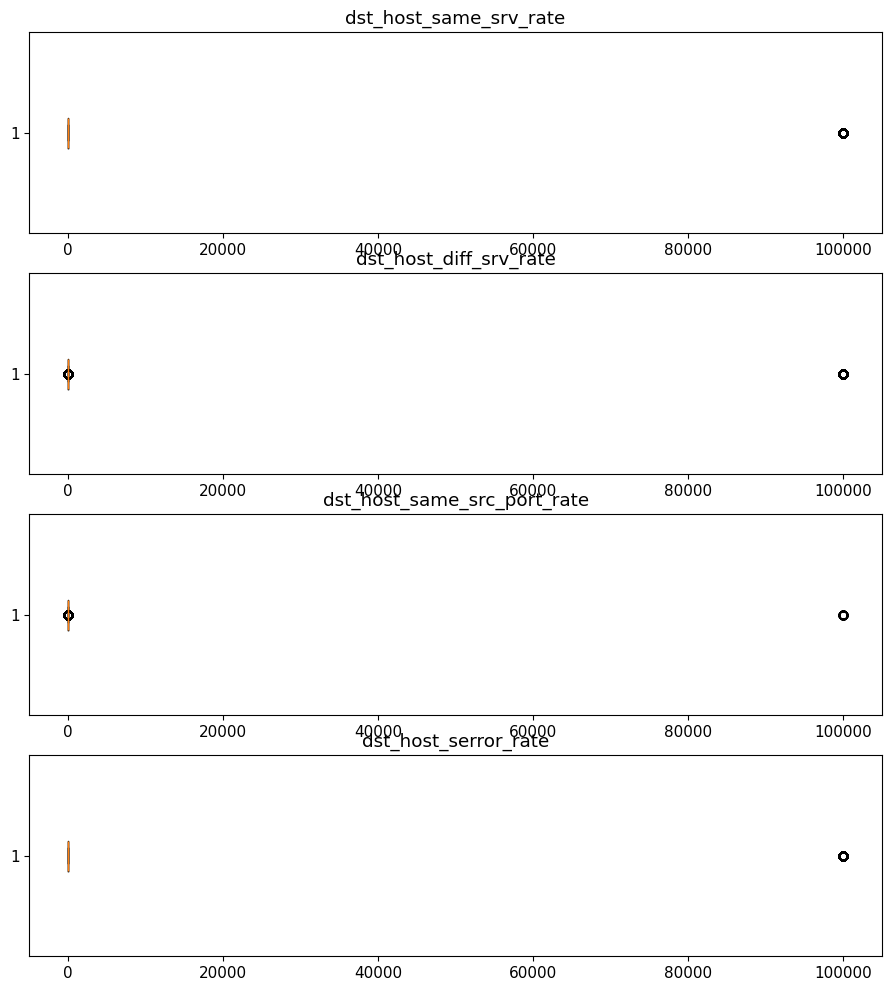

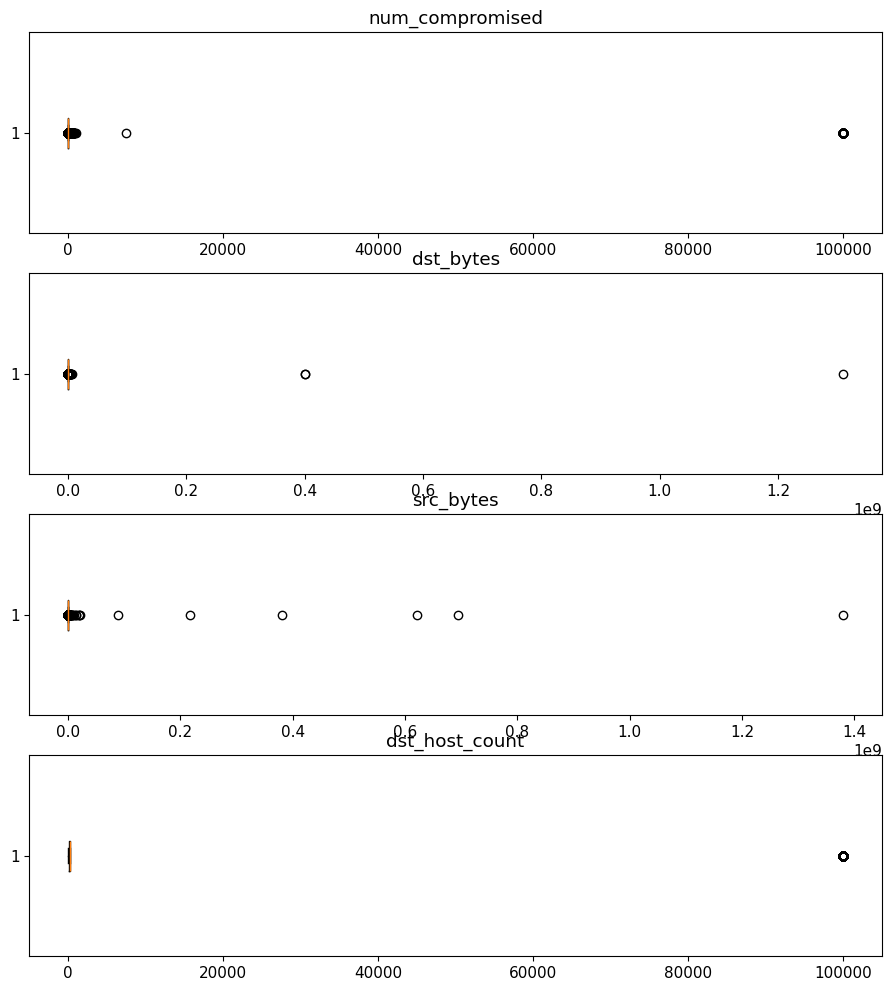

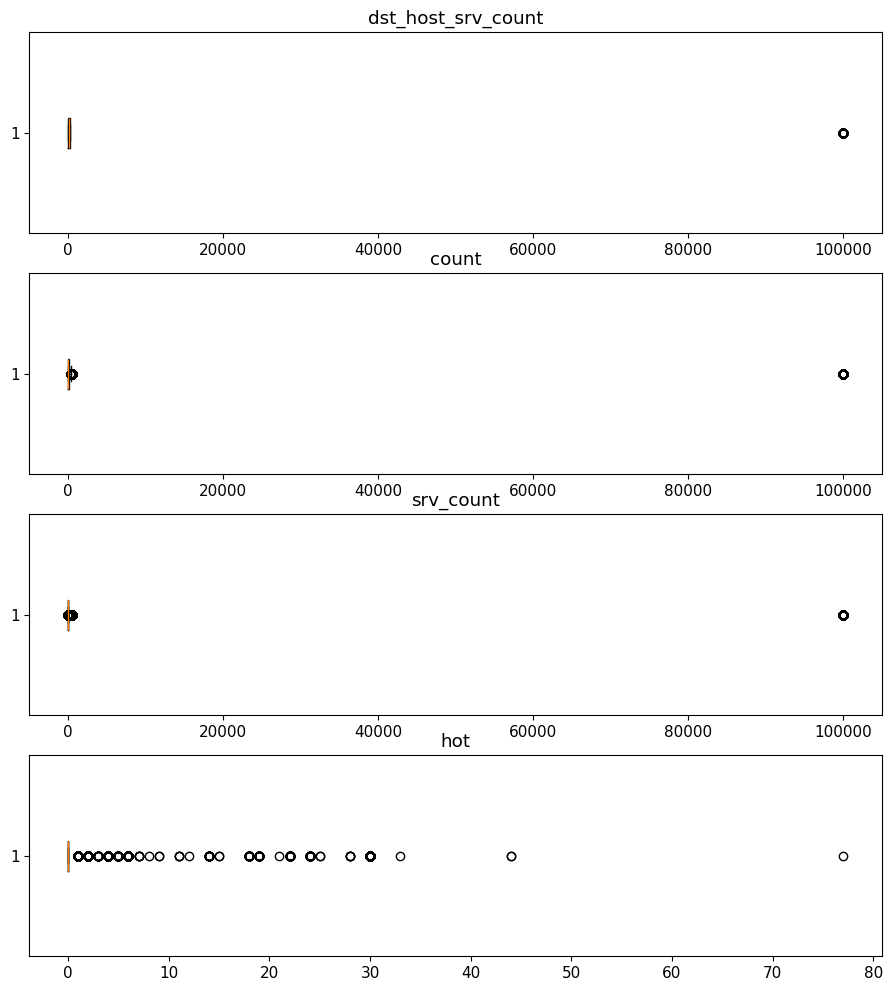

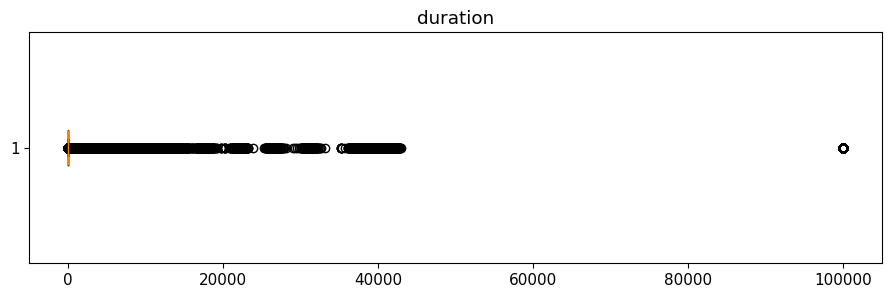

In [137]:
# ============================================================
# Sub-Step C5.2 — Boxplot visualization (raw scale)
# ============================================================

FEATURES_PER_PAGE = 4

features = outlier_candidates.copy()

for i in range(0, len(features), FEATURES_PER_PAGE):
    batch = features[i:i + FEATURES_PER_PAGE]
    
    fig, axes = plt.subplots(
        nrows=len(batch),
        ncols=1,
        figsize=(11, 3 * len(batch)),
        squeeze=False
    )
    
    for ax, col in zip(axes.flatten(), batch):
        values = pd.to_numeric(df[col], errors="coerce")
        ax.boxplot(values.dropna(), vert=False, showfliers=True)
        ax.set_title(col)
    
    add_fig_page_c5(
        title=f"STEP C5.2 — Raw-scale boxplots (features {i+1}–{i+len(batch)})",
        fig=fig
    )

In [138]:
# ============================================================
# Sub-Step C5.3 — IQR-based outlier quantification
# ============================================================

iqr_outlier_summary = []

for col in outlier_candidates:
    values = pd.to_numeric(df[col], errors="coerce").dropna()
    
    q1 = values.quantile(0.25)
    q3 = values.quantile(0.75)
    iqr = q3 - q1
    
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    outlier_rate = ((values < lower) | (values > upper)).mean()
    
    iqr_outlier_summary.append({
        "feature": col,
        "q1": q1,
        "q3": q3,
        "iqr": iqr,
        "iqr_outlier_rate": outlier_rate
    })

iqr_outlier_df = pd.DataFrame(iqr_outlier_summary).sort_values(
    "iqr_outlier_rate", ascending=False
)

add_text_page_c5(
    title="STEP C5.3 — IQR-based outlier summary",
    lines=[
        "Purpose:",
        "- Quantify proportion of IQR-defined outliers per feature",
        "",
        iqr_outlier_df.to_string(index=False)
    ]
)

iqr_outlier_df

feature     q1      q3     iqr  iqr_outlier_rate
2   dst_host_same_src_port_rate   0.00    0.06    0.06          0.196048
5                     dst_bytes   0.00  511.00  511.00          0.186630
6                     src_bytes   0.00  270.00  270.00          0.109261
10                    srv_count   2.00   18.00   16.00          0.101998
1        dst_host_diff_srv_rate   0.00    0.07    0.07          0.086638
12                     duration   0.00    0.00    0.00          0.080196
9                         count   2.00  146.00  144.00          0.032535
11                          hot   0.00    0.00    0.00          0.017520
4               num_compromised   0.00    0.00    0.00          0.010875
0        dst_host_same_srv_rate   0.05    1.00    0.95          0.005137
7                dst_host_count  85.00  255.00  170.00          0.002432
3          dst_host_serror_rate   0.00    1.00    1.00          0.001455
8            dst_host_srv_count  10.00  255.00  245.00          0.000813

In [139]:
# ============================================================
# Sub-Step C5.4 — Quantile-based tail inspection
# ============================================================

quantile_tail_summary = []

for col in outlier_candidates:
    values = pd.to_numeric(df[col], errors="coerce")
    quantile_tail_summary.append({
        "feature": col,
        "q95": values.quantile(0.95),
        "q99": values.quantile(0.99),
        "max": values.max(),
        "max_q99_ratio": values.max() / values.quantile(0.99) if values.quantile(0.99) > 0 else np.nan
    })

quantile_tail_df = pd.DataFrame(quantile_tail_summary).sort_values(
    "max_q99_ratio", ascending=False
)

add_text_page_c5(
    title="STEP C5.4 — Quantile-based tail indicators",
    lines=[
        "Purpose:",
        "- Compare IQR outliers with extreme tail behavior",
        "",
        quantile_tail_df.to_string(index=False)
    ]
)

quantile_tail_df

feature     q95       q99           max  max_q99_ratio
0        dst_host_same_srv_rate     1.0      1.00  9.999900e+04   99999.000000
1        dst_host_diff_srv_rate     0.6      1.00  9.999900e+04   99999.000000
2   dst_host_same_src_port_rate     1.0      1.00  9.999900e+04   99999.000000
3          dst_host_serror_rate     1.0      1.00  9.999900e+04   99999.000000
4               num_compromised     0.0      1.00  9.999900e+04   99999.000000
5                     dst_bytes  8314.0  25650.94  1.309937e+09   51067.812759
6                     src_bytes  1494.3  54540.00  1.379964e+09   25301.868133
7                dst_host_count   255.0    255.00  9.999900e+04     392.152941
8            dst_host_srv_count   255.0    255.00  9.999900e+04     392.152941
9                         count   292.0    511.00  9.999900e+04     195.692759
10                    srv_count   175.0    511.00  9.999900e+04     195.692759
11                          hot     0.0      2.00  7.700000e+01      38.500000
12                     duration     5.0  14664.16  9.999900e+04       6.819279

In [140]:
# ============================================================
# Sub-Step C5.5 — Export PDF (Finalize)
# ============================================================

render_report_c5(PDF_PATH_C5)

print(f"✅ PDF generated: {PDF_PATH_C5}")
display(FileLink(PDF_PATH_C5))

✅ PDF generated: EDA_STEP_C5_Numerical_Outlier_Characterization.pdf


/kaggle/working/EDA_STEP_C5_Numerical_Outlier_Characterization.pdf

Pada C5.1, STEP ini secara sadar memilih 13 fitur yang sudah teridentifikasi memiliki skew/tail berat, sehingga pembacaan outlier di sini merupakan kelanjutan langsung dari diagnosis distribusi (C3) dan kuantifikasi skew/zero/sentinel (C4), bukan analisis outlier yang terlepas konteks.

Pada C5.2, boxplot mentah memperlihatkan bahwa banyak fitur memiliki outlier yang sangat jauh dari massa utama. Pola paling jelas muncul pada keluarga dst_host_*_rate dan beberapa fitur count yang menampilkan titik outlier ekstrem mendekati 100000, sementara bytes menunjukkan outlier pada skala miliaran. Sebaliknya, duration dan hot memperlihatkan outlier yang lebih menyebar (tail) dan tampak sistematis, bukan hanya satu titik.

Pada C5.3, outlier rate berbasis IQR memberi ukuran kuantitatif bahwa beberapa fitur memiliki outlier yang cukup besar secara proporsi (hingga ~10–20%). Namun ada juga fitur zero-inflated dengan IQR=0, sehingga banyak nilai non-zero otomatis tergolong outlier—mengindikasikan bahwa “outlier” pada fitur tersebut sering kali setara dengan “aktivasi”.

Pada C5.4, indikator kuantil menegaskan dua rezim outlier yang berbeda: spike ekstrem (terutama max 99999 pada fitur yang q99 kecil/terbatas) versus heavy-tail intensitas yang sangat besar pada bytes. duration berada di tengah sebagai tail yang lebih moderat tetapi tetap signifikan, sedangkan hot menunjukkan tail diskrit.

## Object → Numeric Conversion Risk Analysis

In [141]:
# ============================================================
# STEP C6 — Report Setup (Collector)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

PDF_PATH_C6 = "EDA_STEP_C6_Object_to_Numeric_Conversion_Risk.pdf"
REPORT_PAGES_C6 = []

def add_text_page_c6(title: str, lines: list[str]):
    REPORT_PAGES_C6.append({
        "type": "text",
        "title": title,
        "lines": [str(x) for x in lines]
    })

def add_fig_page_c6(title: str, fig):
    REPORT_PAGES_C6.append({
        "type": "fig",
        "title": title,
        "fig": fig
    })

def render_report_c6(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped = []
        for line in lines:
            wrapped.extend(wrap(str(line), 110))
            wrapped.append("")
        ax.text(
            0.01, 0.98,
            f"{title}\n\n" + "\n".join(wrapped),
            va="top", ha="left", family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_C6:
            if page["type"] == "text":
                fig, ax = plt.subplots()
                _render_text(ax, page["title"], page["lines"])
                pdf.savefig(fig)
                plt.close(fig)
            elif page["type"] == "fig":
                page["fig"].suptitle(page["title"], y=0.98)
                pdf.savefig(page["fig"])
                plt.close(page["fig"])

print("✅ Collector STEP C6 siap.")

✅ Collector STEP C6 siap.


In [142]:
# ============================================================
# Sub-Step C6.1 — Define object→numeric conversion set
# ============================================================

# categorical genuine (dari Step C1)
categorical_genuine = ["protocol_type", "type_of_attack"]

# object columns (mentah)
object_cols = df.select_dtypes(include="object").columns.tolist()

# conversion candidates = object columns excluding categorical genuine
object_to_numeric_candidates = [c for c in object_cols if c not in categorical_genuine]

add_text_page_c6(
    title="STEP C6.1 — Object→numeric conversion candidates",
    lines=[
        "Purpose:",
        "- Define object-typed features to be tested for numeric conversion",
        "",
        f"Total object columns: {len(object_cols)}",
        f"Categorical genuine excluded: {categorical_genuine}",
        f"Object→numeric candidates: {len(object_to_numeric_candidates)}",
        "",
        ", ".join(object_to_numeric_candidates)
    ]
)

len(object_to_numeric_candidates)

36

In [143]:
# ============================================================
# Sub-Step C6.2 — Conversion loss audit
# ============================================================

rows = len(df)
conversion_audit = []

for col in object_to_numeric_candidates:
    s_raw = df[col]
    raw_nan = s_raw.isna().mean()

    s_num = pd.to_numeric(s_raw, errors="coerce")
    new_nan = s_num.isna().mean()

    # "NaN baru" = NaN setelah konversi - NaN sebelum konversi
    nan_delta = new_nan - raw_nan

    # success rate (non-NaN setelah convert) di atas baseline non-NaN awal
    # (indikator kasar seberapa banyak string berhasil diparse)
    raw_non_nan = 1 - raw_nan
    parsed_non_nan = 1 - new_nan
    parse_success_rate = parsed_non_nan / raw_non_nan if raw_non_nan > 0 else np.nan

    conversion_audit.append({
        "feature": col,
        "raw_dtype": str(df[col].dtype),
        "raw_nan_rate": raw_nan,
        "post_nan_rate": new_nan,
        "nan_delta": nan_delta,
        "parse_success_rate": parse_success_rate,
        "raw_nunique": s_raw.nunique(dropna=True)
    })

conv_audit_df = pd.DataFrame(conversion_audit).sort_values(
    ["nan_delta", "parse_success_rate"], ascending=[False, True]
)

add_text_page_c6(
    title="STEP C6.2 — Conversion loss audit (NaN delta & parse success)",
    lines=[
        "Purpose:",
        "- Quantify technical risk of coercion: new NaNs and parse success rate",
        "",
        conv_audit_df.to_string(index=False)
    ]
)

conv_audit_df

feature raw_dtype  raw_nan_rate  post_nan_rate  \
2                          flag    object      0.007586       1.000000   
1                       service    object      0.009071       1.000000   
27                same_srv_rate    object      0.000000       0.374855   
28                diff_srv_rate    object      0.000000       0.372534   
32  dst_host_srv_diff_host_rate    object      0.000000       0.301994   
29           srv_diff_host_rate    object      0.000000       0.163447   
34         dst_host_rerror_rate    object      0.000000       0.100937   
35     dst_host_srv_rerror_rate    object      0.000000       0.052176   
33     dst_host_srv_serror_rate    object      0.000000       0.052043   
23                  serror_rate    object      0.000000       0.041033   
25                  rerror_rate    object      0.000000       0.030219   
24              srv_serror_rate    object      0.000000       0.022366   
26              srv_rerror_rate    object      0.000000       0.016114   
8                           hot    object      0.000000       0.008164   
3                     src_bytes    object      0.000000       0.007568   
4                     dst_bytes    object      0.000000       0.006279   
17             num_access_files    object      0.000000       0.005256   
30               dst_host_count    object      0.000000       0.005229   
31           dst_host_srv_count    object      0.000000       0.005007   
0                      duration    object      0.000000       0.004953   
6                wrong_fragment    object      0.000000       0.004651   
9             num_failed_logins    object      0.000000       0.003602   
11              num_compromised    object      0.000000       0.003130   
20               is_guest_login    object      0.000000       0.002837   
16                   num_shells    object      0.000000       0.002739   
7                        urgent    object      0.000000       0.002668   
5                          land    object      0.000000       0.002348   
15           num_file_creations    object      0.000000       0.002143   
14                     num_root    object      0.000000       0.002081   
21                        count    object      0.000000       0.002028   
22                    srv_count    object      0.000000       0.001859   
13                 su_attempted    object      0.000000       0.001734   
18            num_outbound_cmds    object      0.000000       0.001654   
10                    logged_in    object      0.000000       0.001512   
12                   root_shell    object      0.000000       0.001352   
19                is_host_login    object      0.000000       0.000676   

    nan_delta  parse_success_rate  raw_nunique  
2    0.992414            0.000000           11  
1    0.990929            0.000000           70  
27   0.374855            0.625145            4  
28   0.372534            0.627466            4  
32   0.301994            0.698006            4  
29   0.163447            0.836553            3  
34   0.100937            0.899063            4  
35   0.052176            0.947824            3  
33   0.052043            0.947957            3  
23   0.041033            0.958967            4  
25   0.030219            0.969781            4  
24   0.022366            0.977634            4  
26   0.016114            0.983886            4  
8    0.008164            0.991836           26  
3    0.007568            0.992432         3201  
4    0.006279            0.993721         8843  
17   0.005256            0.994744           12  
30   0.005229            0.994771          258  
31   0.005007            0.994993          258  
0    0.004953            0.995047         2665  
6    0.004651            0.995349            4  
9    0.003602            0.996398            7  
11   0.003130            0.996870           82  
20   0.002837            0.997163            4  
16   0.002739            0.997261            5  
7    0.0026

In [144]:
# ============================================================
# Sub-Step C6.3 — Token/sentinel sniffing (high-risk columns)
# ============================================================

TOP_RISK_N = 12  # cukup untuk audit cepat; bukan pembatas final
high_risk_cols = conv_audit_df.head(TOP_RISK_N)["feature"].tolist()

token_sniff_rows = []

for col in high_risk_cols:
    s = df[col].astype(str).str.strip()
    s_num = pd.to_numeric(df[col], errors="coerce")

    # token yang gagal parse (non-NaN raw, tapi jadi NaN setelah convert)
    fail_mask = (~df[col].isna()) & (s_num.isna())
    fail_tokens = s[fail_mask].value_counts().head(15)

    token_sniff_rows.append({
        "feature": col,
        "nan_delta": float(conv_audit_df.loc[conv_audit_df["feature"] == col, "nan_delta"].iloc[0]),
        "top_failed_tokens": fail_tokens.to_dict()
    })

token_sniff_df = pd.DataFrame(token_sniff_rows)

add_text_page_c6(
    title="STEP C6.3 — Token/sentinel sniffing (top failed tokens)",
    lines=[
        "Purpose:",
        "- Inspect most frequent tokens that fail numeric parsing for high-risk columns",
        "",
        token_sniff_df.to_string(index=False)
    ]
)

token_sniff_df

feature  nan_delta  \
0                          flag   0.992414   
1                       service   0.990929   
2                 same_srv_rate   0.374855   
3                 diff_srv_rate   0.372534   
4   dst_host_srv_diff_host_rate   0.301994   
5            srv_diff_host_rate   0.163447   
6          dst_host_rerror_rate   0.100937   
7      dst_host_srv_rerror_rate   0.052176   
8      dst_host_srv_serror_rate   0.052043   
9                   serror_rate   0.041033   
10                  rerror_rate   0.030219   
11              srv_serror_rate   0.022366   

                                    top_failed_tokens  
0   {'SF': 65941, 'S0': 31356, 'REJ': 9956, 'RSTR'...  
1   {'http': 36013, 'private': 19415, 'domain_u': ...  
2                                        {'*': 42151}  
3                                        {'*': 41890}  
4                                        {'*': 33958}  
5                                        {'*': 18379}  
6                                        {'*': 11350}  
7                                         {'*': 5867}  
8                                         {'*': 5852}  
9                                         {'*': 4614}  
10                                        {'*': 3398}  
11                                        {'*': 2515}

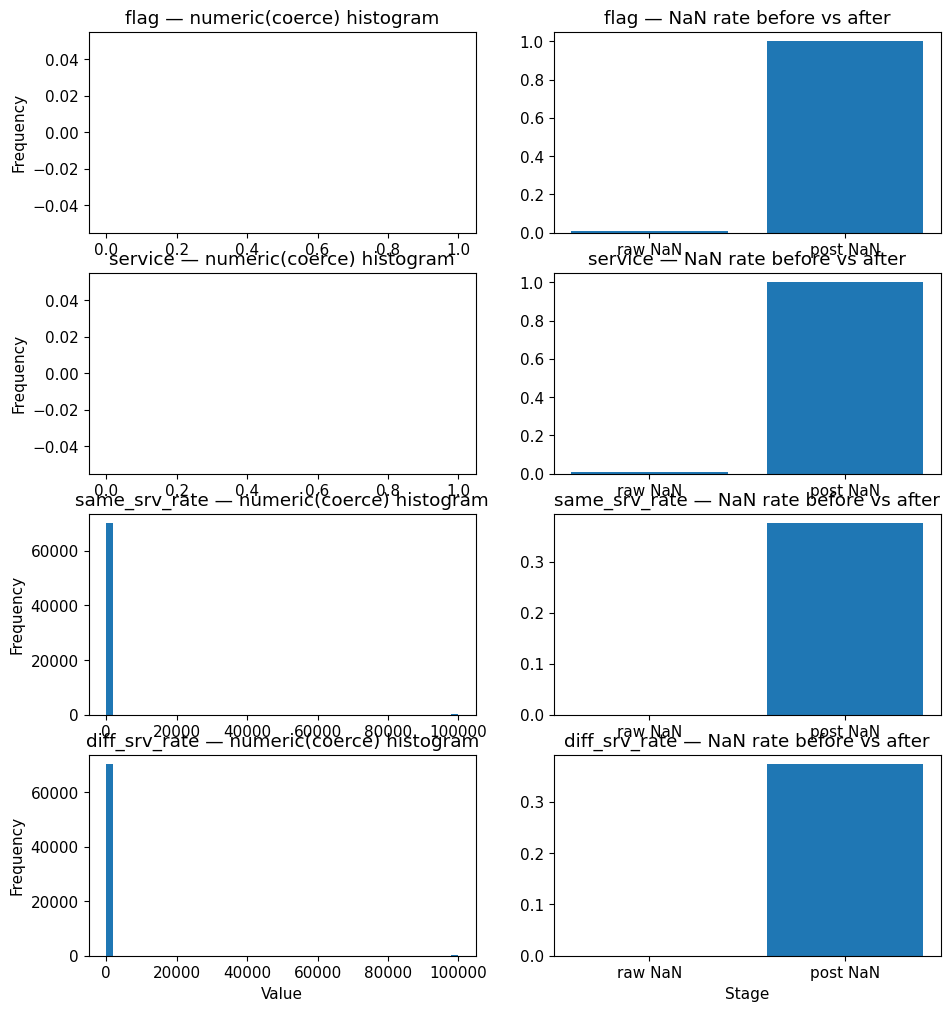

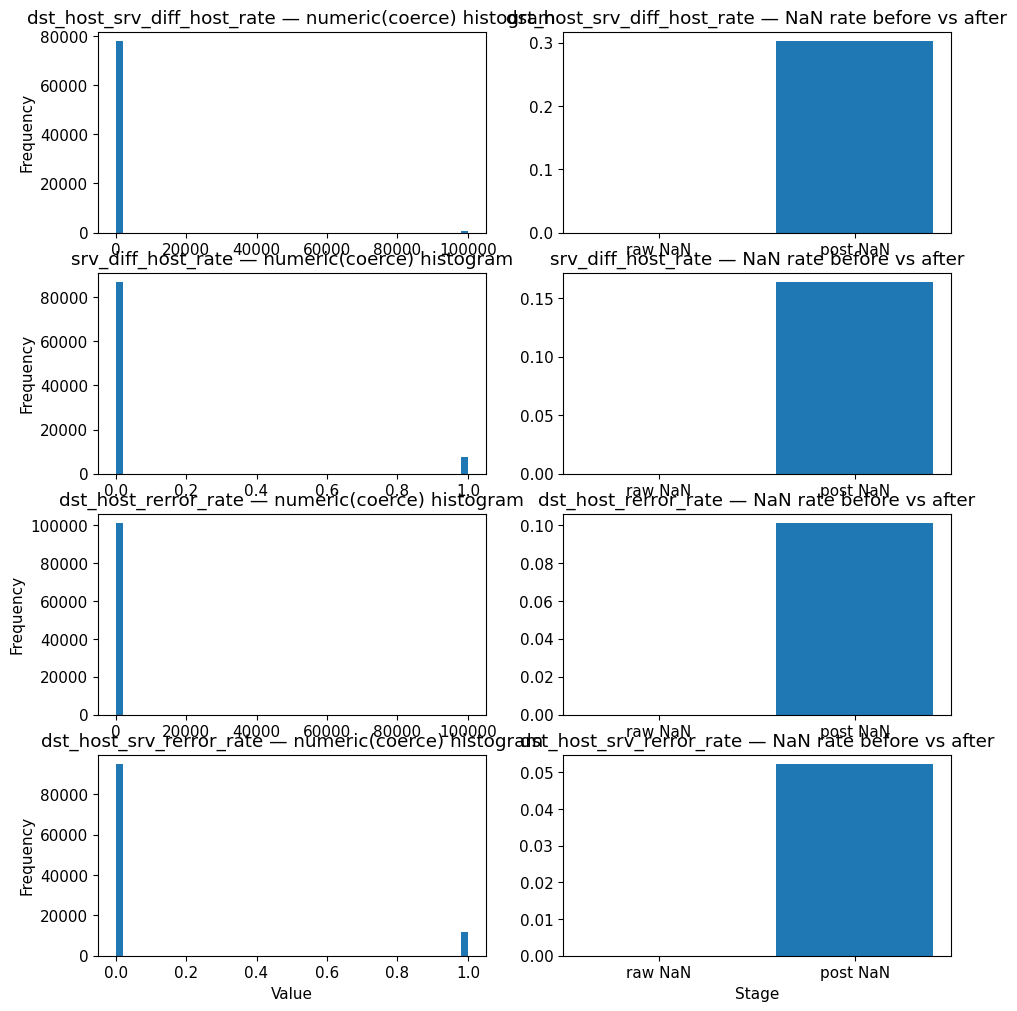

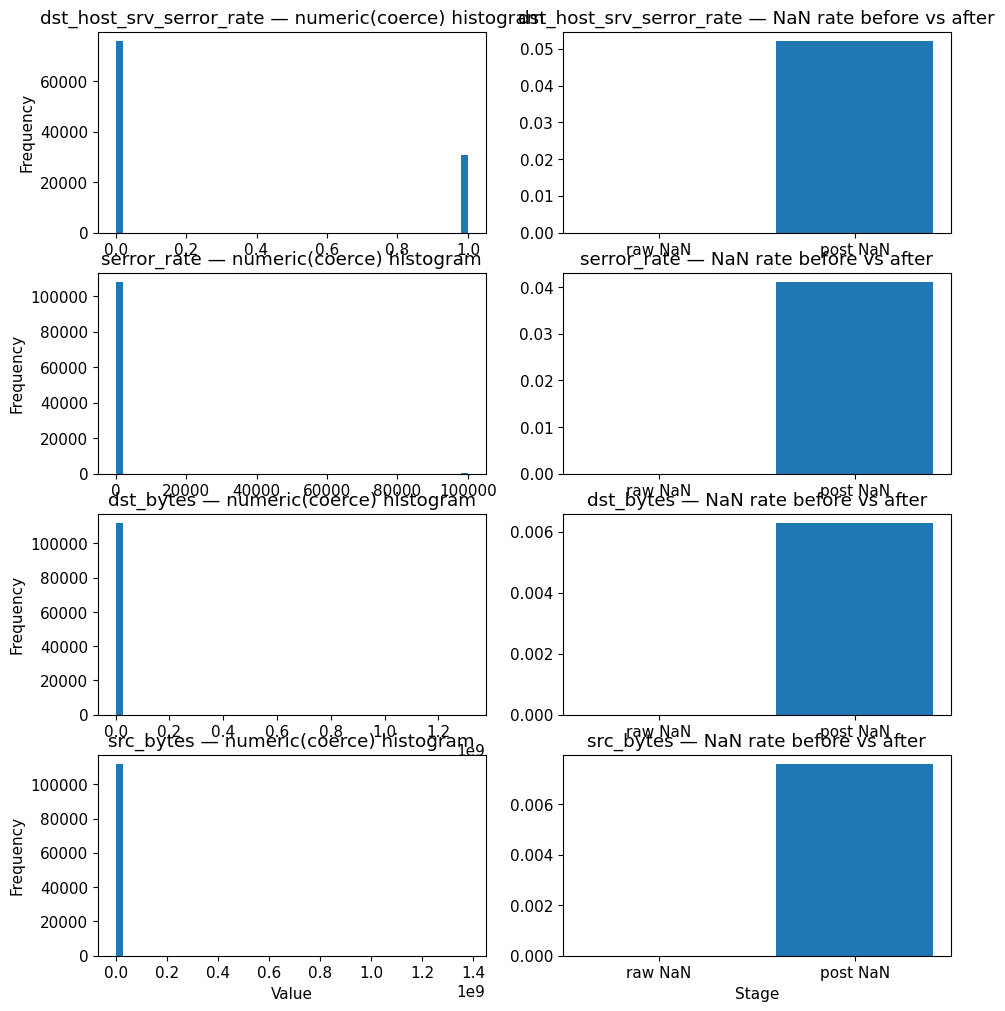

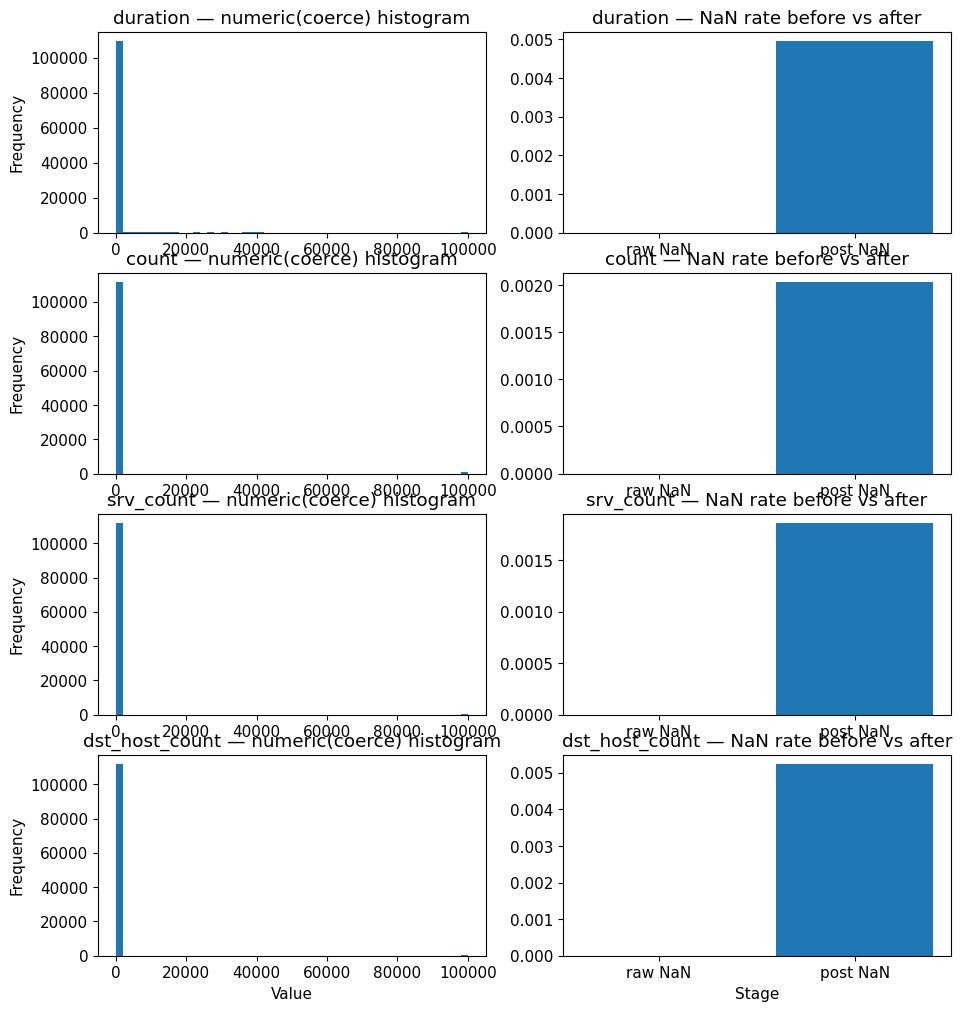

In [145]:
# ============================================================
# Sub-Step C6.4 — Before–after distribution comparison
# ============================================================

BINS = 50
FEATURES_PER_PAGE = 4

# Fokus visual pada: (a) high risk (nan_delta besar), (b) high-utility (nunique besar)
# Ambil gabungan 16 fitur teratas agar PDF tetap terkendali.
top_by_nan_delta = conv_audit_df.sort_values("nan_delta", ascending=False).head(10)["feature"].tolist()
top_by_nunique = conv_audit_df.sort_values("raw_nunique", ascending=False).head(10)["feature"].tolist()

focus_features = []
for c in top_by_nan_delta + top_by_nunique:
    if c not in focus_features:
        focus_features.append(c)
focus_features = focus_features[:16]

add_text_page_c6(
    title="STEP C6.4 — Focus features for before–after distribution",
    lines=[
        "Purpose:",
        "- Select a manageable set of features for distribution comparison (raw vs numeric-coerced)",
        "",
        f"Total focus features: {len(focus_features)}",
        "",
        ", ".join(focus_features)
    ]
)

for i in range(0, len(focus_features), FEATURES_PER_PAGE):
    batch = focus_features[i:i + FEATURES_PER_PAGE]

    fig, axes = plt.subplots(
        nrows=len(batch),
        ncols=2,
        figsize=(11, 3 * len(batch)),
        squeeze=False
    )

    for r, col in enumerate(batch):
        s_raw = df[col]
        s_num = pd.to_numeric(s_raw, errors="coerce")

        # Left: raw numeric-coerced distribution (same as numeric but show with raw label)
        axes[r, 0].hist(s_num.dropna(), bins=BINS)
        axes[r, 0].set_title(f"{col} — numeric(coerce) histogram")
        axes[r, 0].set_ylabel("Frequency")

        # Right: missing impact view (bar of NaN before vs after)
        before_nan = s_raw.isna().mean()
        after_nan = s_num.isna().mean()
        axes[r, 1].bar(["raw NaN", "post NaN"], [before_nan, after_nan])
        axes[r, 1].set_title(f"{col} — NaN rate before vs after")

    axes[-1, 0].set_xlabel("Value")
    axes[-1, 1].set_xlabel("Stage")

    add_fig_page_c6(
        title=f"STEP C6.4 — Before–after audit (features {i+1}–{i+len(batch)})",
        fig=fig
    )

In [146]:
# ============================================================
# Sub-Step C6.5 — Safe vs risky conversion listing (EDA-only)
# ============================================================

# Aturan EDA-only (bukan keputusan final):
# - "Aman": nan_delta kecil dan parse_success_rate tinggi
# - "Berisiko": nan_delta besar atau parse_success_rate rendah

NAN_DELTA_SAFE = 0.001
PARSE_SUCCESS_SAFE = 0.995

safe_cols = conv_audit_df[
    (conv_audit_df["nan_delta"] <= NAN_DELTA_SAFE) &
    (conv_audit_df["parse_success_rate"] >= PARSE_SUCCESS_SAFE)
]["feature"].tolist()

risky_cols = conv_audit_df[
    (conv_audit_df["nan_delta"] > NAN_DELTA_SAFE) |
    (conv_audit_df["parse_success_rate"] < PARSE_SUCCESS_SAFE)
]["feature"].tolist()

add_text_page_c6(
    title="STEP C6.5 — Safe vs risky conversion candidates (EDA-only rules)",
    lines=[
        "Purpose:",
        "- Create preliminary safe/risky lists for object→numeric conversion based on NaN delta and parse success",
        "",
        f"Rule thresholds:",
        f"- nan_delta <= {NAN_DELTA_SAFE} AND parse_success_rate >= {PARSE_SUCCESS_SAFE} => SAFE",
        f"- otherwise => RISKY",
        "",
        f"SAFE ({len(safe_cols)}):",
        ", ".join(safe_cols) if safe_cols else "None",
        "",
        f"RISKY ({len(risky_cols)}):",
        ", ".join(risky_cols) if risky_cols else "None"
    ]
)

pd.Series({"safe": len(safe_cols), "risky": len(risky_cols)})

safe      1
risky    35
dtype: int64

In [147]:
# ============================================================
# Sub-Step C6.6 — Export PDF (Finalize)
# ============================================================

render_report_c6(PDF_PATH_C6)

print(f"✅ PDF generated: {PDF_PATH_C6}")
display(FileLink(PDF_PATH_C6))

✅ PDF generated: EDA_STEP_C6_Object_to_Numeric_Conversion_Risk.pdf


/kaggle/working/EDA_STEP_C6_Object_to_Numeric_Conversion_Risk.pdf

Pada sub-step C6.1, terlihat bahwa hampir seluruh fitur non-target dalam dataset berada pada kondisi bertipe object dan masuk sebagai kandidat konversi numerik. Hal ini menegaskan bahwa isu konversi bukanlah kasus tepi, melainkan persoalan struktural yang memengaruhi mayoritas ruang fitur. Dengan hanya dua fitur yang jelas bersifat kategorikal sejati, setiap keputusan konversi berpotensi berdampak luas terhadap integritas data numerik yang akan digunakan pada tahap modeling.

Pada sub-step C6.2, audit teknis terhadap konversi menunjukkan adanya spektrum risiko yang jelas. Beberapa fitur mengalami kegagalan konversi hampir total, sementara fitur lain mengalami kehilangan parsial yang signifikan akibat munculnya NaN baru. Bahkan pada fitur yang tampak “aman”, terdapat pola kehilangan kecil namun konsisten. Temuan ini memperlihatkan bahwa coercion numerik dapat menciptakan missingness buatan yang sebelumnya tidak ada, sehingga mengubah struktur data secara fundamental.

Pada sub-step C6.3, proses sniffing token memperjelas sumber utama kegagalan parsing. Nilai-nilai yang gagal dikonversi bukan anomali acak, melainkan token semantik eksplisit seperti kategori layanan jaringan dan simbol placeholder pada fitur rate. Ini menunjukkan bahwa banyak fitur object memang memuat makna non-numerik yang sengaja dipertahankan pada level representasi string, dan tidak dapat diperlakukan sebagai angka tanpa interpretasi tambahan.

Pada sub-step C6.4, perbandingan distribusi sebelum dan sesudah konversi mengungkap bahwa dampak konversi sangat bergantung pada tipe fitur. Pada fitur kategorikal sejati, distribusi runtuh sepenuhnya setelah coercion. Pada fitur pseudo-numerik dengan sentinel, distribusi terpotong dan kehilangan sebagian massanya. Sementara itu, pada fitur numerik murni, distribusi relatif terjaga tetapi tetap menunjukkan distorsi kecil yang bersifat sistematis. Hal ini menegaskan bahwa konversi tidak hanya memengaruhi missing rate, tetapi juga bentuk distribusi itu sendiri.

Pada sub-step C6.5, klasifikasi berbasis aturan sederhana memperlihatkan bahwa hampir tidak ada fitur object yang benar-benar aman untuk dikonversi secara langsung. Daftar ini tidak dimaksudkan sebagai keputusan final, namun berfungsi sebagai sinyal kuat bahwa pendekatan konversi massal akan sangat berisiko. Temuan ini mengukuhkan posisi STEP C6 sebagai checkpoint krusial sebelum pipeline preprocessing ditentukan.

## Categorical Feature Cardinality Analysis

In [148]:
# ============================================================
# STEP C7 — Report Setup (Collector)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

PDF_PATH_C7 = "EDA_STEP_C7_Categorical_Feature_Cardinality.pdf"
REPORT_PAGES_C7 = []

def add_text_page_c7(title: str, lines: list[str]):
    REPORT_PAGES_C7.append({
        "type": "text",
        "title": title,
        "lines": [str(x) for x in lines]
    })

def render_report_c7(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped = []
        for line in lines:
            wrapped.extend(wrap(str(line), 110))
            wrapped.append("")
        ax.text(
            0.01, 0.98,
            f"{title}\n\n" + "\n".join(wrapped),
            va="top", ha="left", family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_C7:
            fig, ax = plt.subplots()
            _render_text(ax, page["title"], page["lines"])
            pdf.savefig(fig)
            plt.close(fig)

print("✅ Collector STEP C7 siap.")

✅ Collector STEP C7 siap.


In [149]:
# ============================================================
# Sub-Step C7.1 — Define categorical feature set
# ============================================================

# Dari STEP C1 & C6
categorical_features = [
    "protocol_type",
    "service",
    "flag"
]

add_text_page_c7(
    title="STEP C7.1 — Categorical feature set",
    lines=[
        "Purpose:",
        "- Define categorical features for cardinality analysis",
        "",
        f"Total categorical features: {len(categorical_features)}",
        "",
        ", ".join(categorical_features)
    ]
)

categorical_features

['protocol_type', 'service', 'flag']

In [150]:
# ============================================================
# Sub-Step C7.2 — Cardinality quantification
# ============================================================

rows = len(df)

cardinality_rows = []

for col in categorical_features:
    nunique = df[col].nunique(dropna=True)
    cardinality_rows.append({
        "feature": col,
        "n_unique_categories": nunique,
        "row_count": rows,
        "cardinality_ratio": nunique / rows
    })

cardinality_df = pd.DataFrame(cardinality_rows).sort_values(
    "n_unique_categories", ascending=False
)

add_text_page_c7(
    title="STEP C7.2 — Categorical feature cardinality",
    lines=[
        "Purpose:",
        "- Quantify categorical complexity using unique count and ratio",
        "",
        cardinality_df.to_string(index=False)
    ]
)

cardinality_df

feature  n_unique_categories  row_count  cardinality_ratio
1        service                   70     112446           0.000623
2           flag                   11     112446           0.000098
0  protocol_type                    3     112446           0.000027

In [151]:
# ============================================================
# Sub-Step C7.3 — Cardinality risk flagging (EDA-only)
# ============================================================

# Threshold EDA-only (bukan keputusan final)
LOW_CARD_THRESHOLD = 10
HIGH_CARD_THRESHOLD = 50

risk_rows = []

for _, row in cardinality_df.iterrows():
    if row["n_unique_categories"] <= LOW_CARD_THRESHOLD:
        risk = "low"
    elif row["n_unique_categories"] >= HIGH_CARD_THRESHOLD:
        risk = "high"
    else:
        risk = "medium"

    risk_rows.append({
        "feature": row["feature"],
        "n_unique_categories": row["n_unique_categories"],
        "cardinality_ratio": row["cardinality_ratio"],
        "cardinality_risk": risk
    })

cardinality_risk_df = pd.DataFrame(risk_rows)

add_text_page_c7(
    title="STEP C7.3 — Cardinality risk flagging (EDA-only)",
    lines=[
        "Purpose:",
        "- Flag potential encoding complexity using simple cardinality thresholds",
        "",
        f"Thresholds:",
        f"- low <= {LOW_CARD_THRESHOLD}",
        f"- high >= {HIGH_CARD_THRESHOLD}",
        "",
        cardinality_risk_df.to_string(index=False)
    ]
)

cardinality_risk_df

feature  n_unique_categories  cardinality_ratio cardinality_risk
0        service                   70           0.000623             high
1           flag                   11           0.000098           medium
2  protocol_type                    3           0.000027              low

In [152]:
# ============================================================
# Sub-Step C7.4 — Export PDF (Finalize)
# ============================================================

render_report_c7(PDF_PATH_C7)

print(f"✅ PDF generated: {PDF_PATH_C7}")
display(FileLink(PDF_PATH_C7))

✅ PDF generated: EDA_STEP_C7_Categorical_Feature_Cardinality.pdf


/kaggle/working/EDA_STEP_C7_Categorical_Feature_Cardinality.pdf

Pada sub-step C7.1, jumlah fitur kategorikal yang sangat terbatas memperjelas bahwa tantangan kategorikal dataset ini bukan berasal dari kuantitas fitur, melainkan dari sifat masing-masing fitur. Hal ini mengarahkan fokus analisis pada kualitas dan kompleksitas internal fitur, bukan sekadar jumlahnya.

Pada sub-step C7.2, analisis cardinality memperlihatkan ketimpangan yang signifikan antar fitur kategorikal. Sementara protocol_type dan flag berada pada rezim cardinality rendah hingga menengah, fitur service muncul sebagai outlier dengan jumlah kategori yang jauh lebih besar. Ketimpangan ini menjadikan service sebagai sumber utama potensi masalah encoding.

Pada sub-step C7.3, flagging berbasis threshold EDA-only mengkristalkan temuan sebelumnya dengan menunjukkan bahwa risiko eksplosi encoding bersifat terlokalisasi. Pendekatan ini membantu memisahkan fitur yang relatif aman dari fitur yang memerlukan perhatian khusus, tanpa membuat keputusan preprocessing final pada tahap EDA.

## Categorical Feature Distribution & Rare Category

In [153]:
# ============================================================
# STEP C8 — Report Setup (Collector)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

PDF_PATH_C8 = "EDA_STEP_C8_Categorical_Distribution_Rare_Category.pdf"
REPORT_PAGES_C8 = []

def add_text_page_c8(title: str, lines: list[str]):
    REPORT_PAGES_C8.append({
        "type": "text",
        "title": title,
        "lines": [str(x) for x in lines]
    })

def add_fig_page_c8(title: str, fig):
    REPORT_PAGES_C8.append({
        "type": "fig",
        "title": title,
        "fig": fig
    })

def render_report_c8(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped = []
        for line in lines:
            wrapped.extend(wrap(str(line), 110))
            wrapped.append("")
        ax.text(
            0.01, 0.98,
            f"{title}\n\n" + "\n".join(wrapped),
            va="top", ha="left", family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_C8:
            if page["type"] == "text":
                fig, ax = plt.subplots()
                _render_text(ax, page["title"], page["lines"])
                pdf.savefig(fig)
                plt.close(fig)
            elif page["type"] == "fig":
                page["fig"].suptitle(page["title"], y=0.98)
                pdf.savefig(page["fig"])
                plt.close(page["fig"])

print("✅ Collector STEP C8 siap.")

✅ Collector STEP C8 siap.


In [154]:
# ============================================================
# Sub-Step C8.1 — Define categorical feature set
# ============================================================

categorical_features = [
    "protocol_type",
    "service",
    "flag"
]

add_text_page_c8(
    title="STEP C8.1 — Categorical feature set for distribution analysis",
    lines=[
        "Purpose:",
        "- Define categorical features for frequency and long-tail analysis",
        "",
        f"Total categorical features: {len(categorical_features)}",
        "",
        ", ".join(categorical_features)
    ]
)

categorical_features

['protocol_type', 'service', 'flag']

In [155]:
# ============================================================
# Sub-Step C8.2 — Category frequency distribution
# ============================================================

category_dist_tables = {}

for col in categorical_features:
    vc_abs = df[col].value_counts(dropna=False)
    vc_prop = df[col].value_counts(normalize=True, dropna=False)

    dist_df = pd.DataFrame({
        "count": vc_abs,
        "proportion": vc_prop
    })

    category_dist_tables[col] = dist_df

    add_text_page_c8(
        title=f"STEP C8.2 — Category distribution: {col}",
        lines=[
            "Purpose:",
            "- Show absolute and proportional category frequencies",
            "",
            dist_df.to_string()
        ]
    )

category_dist_tables

{'protocol_type':                count  proportion
 protocol_type                   
 tcp            90997    0.809251
 udp            13364    0.118848
 icmp            7417    0.065961
 NaN              668    0.005941,
 'service':            count  proportion
 service                     
 http       36013    0.320269
 private    19415    0.172661
 domain_u    8041    0.071510
 smtp        6563    0.058366
 ftp_data    5558    0.049428
 ...          ...         ...
 tftp_u         3    0.000027
 aol            2    0.000018
 http_8001      1    0.000009
 harvest        1    0.000009
 http_2784      1    0.000009
 
 [71 rows x 2 columns],
 'flag':         count  proportion
 flag                     
 SF      65941    0.586424
 S0      31356    0.278854
 REJ      9956    0.088540
 RSTR     2155    0.019165
 RSTO     1364    0.012130
 NaN       853    0.007586
 S1        314    0.002792
 SH        222    0.001974
 S2        115    0.001023
 RSTOS0     91    0.000809
 S3         40    0

In [156]:
# ============================================================
# Sub-Step C8.3 — Top-N vs long-tail analysis
# ============================================================

TOP_N = 5

top_tail_summary = []

for col in categorical_features:
    vc_prop = df[col].value_counts(normalize=True, dropna=False)

    top_n_share = vc_prop.head(TOP_N).sum()
    tail_share = 1.0 - top_n_share

    top_tail_summary.append({
        "feature": col,
        "top_n": TOP_N,
        "top_n_proportion": top_n_share,
        "long_tail_proportion": tail_share,
        "n_categories": vc_prop.shape[0]
    })

top_tail_df = pd.DataFrame(top_tail_summary)

add_text_page_c8(
    title="STEP C8.3 — Top-N vs long-tail proportion summary",
    lines=[
        "Purpose:",
        "- Quantify dominance of top categories vs long-tail mass",
        "",
        top_tail_df.to_string(index=False)
    ]
)

top_tail_df

feature  top_n  top_n_proportion  long_tail_proportion  n_categories
0  protocol_type      5          1.000000              0.000000             4
1        service      5          0.672234              0.327766            71
2           flag      5          0.985113              0.014887            12

In [157]:
# ============================================================
# Sub-Step C8.4 — Rare category quantification
# ============================================================

RARE_THRESHOLD = 0.01  # 1%

rare_category_summary = []

for col in categorical_features:
    vc_prop = df[col].value_counts(normalize=True, dropna=False)
    rare_prop = vc_prop[vc_prop < RARE_THRESHOLD].sum()
    rare_count = (vc_prop < RARE_THRESHOLD).sum()

    rare_category_summary.append({
        "feature": col,
        "rare_threshold": RARE_THRESHOLD,
        "n_rare_categories": rare_count,
        "rare_total_proportion": rare_prop
    })

rare_df = pd.DataFrame(rare_category_summary)

add_text_page_c8(
    title="STEP C8.4 — Rare category summary",
    lines=[
        "Purpose:",
        "- Quantify rare category count and mass",
        "",
        rare_df.to_string(index=False)
    ]
)

rare_df

feature  rare_threshold  n_rare_categories  rare_total_proportion
0  protocol_type            0.01                  1               0.005941
1        service            0.01                 60               0.189896
2           flag            0.01                  7               0.014887

In [158]:
# ============================================================
# Sub-Step C8.5 — Export PDF (Finalize)
# ============================================================

render_report_c8(PDF_PATH_C8)

print(f"✅ PDF generated: {PDF_PATH_C8}")
display(FileLink(PDF_PATH_C8))

✅ PDF generated: EDA_STEP_C8_Categorical_Distribution_Rare_Category.pdf


/kaggle/working/EDA_STEP_C8_Categorical_Distribution_Rare_Category.pdf

Pada sub-step C8.1, ditetapkan bahwa meskipun jumlah fitur kategorikal terbatas, masing-masing fitur memiliki struktur distribusi yang kompleks. Hal ini menjadikan eksplorasi distribusi kategori tetap krusial untuk memahami risiko representasi data.

Pada sub-step C8.2, analisis distribusi memperlihatkan karakter yang sangat berbeda antar fitur. protocol_type dan flag menunjukkan dominasi kuat pada beberapa kategori utama, sementara service menampilkan distribusi long-tail yang ekstrem dengan puluhan kategori berfrekuensi sangat rendah.

Pada sub-step C8.3, perbandingan Top-N dan long-tail mengonfirmasi bahwa kompleksitas kategorikal terkonsentrasi hampir sepenuhnya pada fitur service. Fitur lain relatif stabil dan tidak menunjukkan struktur long-tail yang signifikan.

Pada sub-step C8.4, kuantifikasi rare category memperjelas bahwa rare category pada service tidak hanya banyak secara jumlah, tetapi juga signifikan secara proporsi. Hal ini mengindikasikan bahwa rare category memegang peran penting dalam representasi data dan tidak dapat dianggap sebagai noise belaka.

# Target & Attack-Oriented Analysis

__Fokus utama Block D:__
memahami tingkat kesulitan problem, struktur label, dan sinyal serangan awal

__Block ini menjawab:__
“Seberapa sulit problem ini, apa risikonya, dan di mana sinyal serangan mulai tampak?”
⚠️ Catatan penting:
•	Belum modeling
•	Belum feature importance final
•	Semua analisis bersifat early signal & risk awareness

# BLOCK D - Target Identification & Semantic Validation

In [159]:
# ============================================================
# STEP D1 — Report Setup (Collector)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

assert "df" in globals(), "df belum tersedia. Pastikan df sudah ter-load."
assert isinstance(df, pd.DataFrame), "df harus berupa pandas DataFrame."

PDF_PATH_D1 = "EDA_STEP_D1_Target_Identification_Semantic_Validation.pdf"
REPORT_PAGES_D1 = []

def add_text_page_d1(title: str, lines: list[str]):
    REPORT_PAGES_D1.append({
        "type": "text",
        "title": title,
        "lines": [str(x) for x in lines]
    })

def add_fig_page_d1(title: str, fig):
    REPORT_PAGES_D1.append({
        "type": "fig",
        "title": title,
        "fig": fig
    })

def render_report_d1(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped = []
        for line in lines:
            wrapped.extend(wrap(str(line), 110))
            wrapped.append("")
        ax.text(
            0.01, 0.98,
            f"{title}\n\n" + "\n".join(wrapped),
            va="top", ha="left", family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_D1:
            if page["type"] == "text":
                fig, ax = plt.subplots()
                _render_text(ax, page["title"], page["lines"])
                pdf.savefig(fig)
                plt.close(fig)
            elif page["type"] == "fig":
                page["fig"].suptitle(page["title"], y=0.98)
                pdf.savefig(page["fig"])
                plt.close(page["fig"])

print("✅ Collector STEP D1 siap.")

✅ Collector STEP D1 siap.


In [160]:
# ============================================================
# Sub-Step D1.1 — Column Inventory & Suspicious Name Scan
# ============================================================

cols = list(df.columns)

label_keywords = ["label", "target", "class", "attack", "intrusion", "type", "category", "result", "outcome", "y"]
suspicious_keywords = ["attack", "label", "target", "class", "type", "result", "outcome", "malicious", "benign", "normal"]

def keyword_hit(colname: str, keywords: list[str]) -> bool:
    s = str(colname).lower()
    return any(k in s for k in keywords)

candidate_by_name = [c for c in cols if keyword_hit(c, label_keywords)]
suspicious_by_name = [c for c in cols if keyword_hit(c, suspicious_keywords)]

add_text_page_d1(
    title="Sub-Step D1.1 — Column inventory & name-based scan",
    lines=[
        f"Total kolom: {len(cols)}",
        f"Kandidat target (name-based): {candidate_by_name if candidate_by_name else 'Tidak ada kandidat kuat dari nama kolom'}",
        f"Kolom mencurigakan (name-based): {suspicious_by_name if suspicious_by_name else 'Tidak ada kolom mencurigakan dari keyword sederhana'}",
        f"Columns (first 25): {cols[:25]}",
        f"Columns (last 25): {cols[-25:] if len(cols) > 25 else cols}",
    ]
)

pd.Series(cols, name="columns").head(60)

0                        duration
1                   protocol_type
2                         service
3                            flag
4                       src_bytes
5                       dst_bytes
6                            land
7                  wrong_fragment
8                          urgent
9                             hot
10              num_failed_logins
11                      logged_in
12                num_compromised
13                     root_shell
14                   su_attempted
15                       num_root
16             num_file_creations
17                     num_shells
18               num_access_files
19              num_outbound_cmds
20                  is_host_login
21                 is_guest_login
22                          count
23                      srv_count
24                    serror_rate
25                srv_serror_rate
26                    rerror_rate
27                srv_rerror_rate
28                  same_srv_rate
29            

In [161]:
# ============================================================
# Sub-Step D1.2 — Target Candidate Detection (Cardinality & Type Heuristics)
# ============================================================

n_rows = len(df)
nunq = df.nunique(dropna=False)
dtype_series = df.dtypes.astype(str)
miss_rate = df.isna().mean()

low_card_mask = (nunq >= 2) & (nunq <= 200)
low_card_cols = nunq[low_card_mask].sort_values()

candidate_by_card = list(low_card_cols.index)
candidates_union = list(dict.fromkeys(candidate_by_name + candidate_by_card))

candidate_table = pd.DataFrame({
    "dtype": dtype_series,
    "nunique": nunq,
    "missing_rate": miss_rate
}).loc[candidates_union].sort_values(["nunique", "missing_rate"], ascending=[True, True])

top_candidates = candidate_table.head(20)

add_text_page_d1(
    title="Sub-Step D1.2 — Heuristic target candidates (cardinality-based)",
    lines=[
        f"Jumlah kandidat (union name-based + low-card): {len(candidates_union)}",
        "Top kandidat (nunique rendah & missing rendah):",
        top_candidates.to_string()
    ]
)

top_candidates

dtype  nunique  missing_rate
num_outbound_cmds            object        2      0.000000
logged_in                    object        3      0.000000
is_host_login                object        3      0.000000
dst_host_srv_serror_rate     object        3      0.000000
srv_diff_host_rate           object        3      0.000000
dst_host_srv_rerror_rate     object        3      0.000000
wrong_fragment               object        4      0.000000
serror_rate                  object        4      0.000000
is_guest_login               object        4      0.000000
rerror_rate                  object        4      0.000000
srv_serror_rate              object        4      0.000000
root_shell                   object        4      0.000000
dst_host_srv_diff_host_rate  object        4      0.000000
srv_rerror_rate              object        4      0.000000
land                         object        4      0.000000
diff_srv_rate                object        4      0.000000
same_srv_rate                object        4      0.000000
dst_host_rerror_rate         object        4      0.000000
protocol_type                object        4      0.005941
su_attempted                 object        5      0.000000

In [162]:
# ============================================================
# Sub-Step D1.3 — Label Semantics Probe (value_counts)
# ============================================================

K = 6
probe_cols = list(top_candidates.index[:K])

probe_rows = []
for ccol in probe_cols:
    vc = df[ccol].value_counts(dropna=False)
    head_vc = vc.head(25)

    nunique_col = int(nunq[ccol])
    miss = float(miss_rate[ccol])
    top1_ratio = float(head_vc.iloc[0] / n_rows)

    probe_rows.append([ccol, dtype_series[ccol], nunique_col, miss, top1_ratio])

    add_text_page_d1(
        title=f"Sub-Step D1.3 — value_counts preview: {ccol}",
        lines=[
            f"dtype={dtype_series[ccol]} | nunique={nunique_col} | missing_rate={miss:.4f} | top1_ratio={top1_ratio:.4f}",
            "Top values (up to 25):",
            head_vc.to_string()
        ]
    )

probe_summary_df = pd.DataFrame(
    probe_rows,
    columns=["col", "dtype", "nunique", "missing_rate", "top1_ratio"]
).sort_values(["nunique", "top1_ratio"], ascending=[True, False])

probe_summary_df

col   dtype  nunique  missing_rate  top1_ratio
0         num_outbound_cmds  object        2           0.0    0.998346
2             is_host_login  object        3           0.0    0.999315
5  dst_host_srv_rerror_rate  object        3           0.0    0.842484
4        srv_diff_host_rate  object        3           0.0    0.771375
3  dst_host_srv_serror_rate  object        3           0.0    0.673648
1                 logged_in  object        3           0.0    0.607785

In [163]:
# ============================================================
# Sub-Step D1.4 — Ambiguity & Leakage-Adjacent Checks (EDA-only)
# ============================================================

if candidate_by_name:
    y_col = next((c for c in candidate_by_name if c in candidate_table.index), candidate_by_name[0])
else:
    y_col = probe_summary_df.iloc[0]["col"]

low_card_for_check = list(low_card_cols.index[:30])

def conditional_purity(x: pd.Series, y: pd.Series) -> float:
    tmp = pd.crosstab(x, y, dropna=False)
    if tmp.shape[0] == 0:
        return np.nan
    group_sum = tmp.sum(axis=1).values
    max_in_group = tmp.max(axis=1).values
    return float(np.average(max_in_group / np.maximum(group_sum, 1)))

purities = []
for ccol in low_card_for_check:
    if ccol == y_col:
        continue
    try:
        p = conditional_purity(df[ccol], df[y_col])
        purities.append((ccol, p, int(nunq[ccol]), dtype_series[ccol]))
    except Exception:
        continue

purity_df = pd.DataFrame(purities, columns=["col", "purity_wrt_y", "nunique", "dtype"]).sort_values("purity_wrt_y", ascending=False)
leak_adj = purity_df[purity_df["purity_wrt_y"] >= 0.995].head(20)

add_text_page_d1(
    title="Sub-Step D1.4 — Ambiguity & leakage-adjacent heuristic checks",
    lines=[
        f"Kandidat label paling plausible (EDA-only): {y_col}",
        f"Jumlah kolom low-card yang dicek (selain label): {len(purity_df)}",
        "Top 12 purity terhadap label:",
        purity_df.head(12).to_string(index=False),
        "Flag leakage-adjacent (purity >= 0.995):",
        (leak_adj.to_string(index=False) if len(leak_adj) else "Tidak ada alarm kuat (dari subset low-card yang dicek)")
    ]
)

purity_df.head(15)

col  purity_wrt_y  nunique   dtype
28                  num_root      0.994996       73  object
26        num_file_creations      0.987816       33  object
27                   service      0.983688       71  object
25                       hot      0.974865       26  object
23                      flag      0.951177       12  object
24          num_access_files      0.942983       12  object
5   dst_host_srv_rerror_rate      0.919277        3  object
21         num_failed_logins      0.918549        7  object
7                serror_rate      0.917787        4  object
6             wrong_fragment      0.914378        4  object
20                    urgent      0.908789        6  object
3   dst_host_srv_serror_rate      0.900587        3  object
10           srv_serror_rate      0.899586        4  object
18              su_attempted      0.897184        5  object
0          num_outbound_cmds      0.872263        2  object

In [164]:
# ============================================================
# Sub-Step D1.5 — Export PDF (Finalize)
# ============================================================

render_report_d1(PDF_PATH_D1)

print(f"✅ PDF generated: {PDF_PATH_D1}")
display(FileLink(PDF_PATH_D1))

✅ PDF generated: EDA_STEP_D1_Target_Identification_Semantic_Validation.pdf


/kaggle/working/EDA_STEP_D1_Target_Identification_Semantic_Validation.pdf

## Target Distribution Analysis

In [165]:
# ============================================================
# STEP D2 — Report Setup (Collector)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

# Safety check
assert "df" in globals(), "df belum tersedia."
assert "type_of_attack" in df.columns, "Kolom target 'type_of_attack' tidak ditemukan."

TARGET_COL = "type_of_attack"

PDF_PATH_D2 = "EDA_STEP_D2_Target_Distribution_Analysis.pdf"
REPORT_PAGES_D2 = []

def add_text_page_d2(title: str, lines: list[str]):
    REPORT_PAGES_D2.append({
        "type": "text",
        "title": title,
        "lines": [str(x) for x in lines]
    })

def add_fig_page_d2(title: str, fig):
    REPORT_PAGES_D2.append({
        "type": "fig",
        "title": title,
        "fig": fig
    })

def render_report_d2(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped = []
        for line in lines:
            wrapped.extend(wrap(str(line), 110))
            wrapped.append("")
        ax.text(
            0.01, 0.98,
            f"{title}\n\n" + "\n".join(wrapped),
            va="top", ha="left", family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_D2:
            if page["type"] == "text":
                fig, ax = plt.subplots()
                _render_text(ax, page["title"], page["lines"])
                pdf.savefig(fig)
                plt.close(fig)
            elif page["type"] == "fig":
                page["fig"].suptitle(page["title"], y=0.98)
                pdf.savefig(page["fig"])
                plt.close(page["fig"])

print("✅ Collector STEP D2 siap.")

✅ Collector STEP D2 siap.


In [166]:
# ============================================================
# Sub-Step D2.1 — Class Count & Percentage Table
# ============================================================

class_counts = df[TARGET_COL].value_counts(dropna=False)
class_percents = df[TARGET_COL].value_counts(normalize=True, dropna=False) * 100

dist_table = pd.DataFrame({
    "count": class_counts,
    "percent": class_percents.round(3)
})

add_text_page_d2(
    title="Sub-Step D2.1 — Target distribution (count & percent)",
    lines=[
        f"Target column: {TARGET_COL}",
        f"Total samples: {len(df)}",
        f"Jumlah kelas: {dist_table.shape[0]}",
        "",
        "Distribusi kelas (count & percent):",
        dist_table.to_string()
    ]
)

dist_table

count  percent
type_of_attack                          
normal                    60538   53.837
neptune                   37142   33.031
ipsweep                    3254    2.894
satan                      3248    2.888
portsweep                  2687    2.390
smurf                      2394    2.129
Denial of Service Attack   1861    1.655
nmap                       1322    1.176

In [167]:
# ============================================================
# Sub-Step D2.2 — Imbalance Ratio & Dominance Indicators
# ============================================================

max_count = class_counts.iloc[0]
min_count = class_counts.iloc[-1]

imbalance_ratio = max_count / max(min_count, 1)

top_3_share = class_percents.iloc[:3].sum()
top_1_share = class_percents.iloc[0]

add_text_page_d2(
    title="Sub-Step D2.2 — Imbalance severity indicators",
    lines=[
        f"Kelas mayor (terbanyak): {class_counts.index[0]} ({max_count} samples)",
        f"Kelas minor (tersedikit): {class_counts.index[-1]} ({min_count} samples)",
        f"Imbalance ratio (max/min): {imbalance_ratio:.2f}",
        "",
        f"Share kelas terbesar (top-1): {top_1_share:.2f}%",
        f"Share 3 kelas terbesar (top-3): {top_3_share:.2f}%",
        "",
        "Catatan: metrik ini bersifat deskriptif, bukan keputusan modeling."
    ]
)

imbalance_ratio, top_1_share, top_3_share

(np.float64(45.79273827534039),
 np.float64(53.837397506358606),
 np.float64(89.76219696565462))

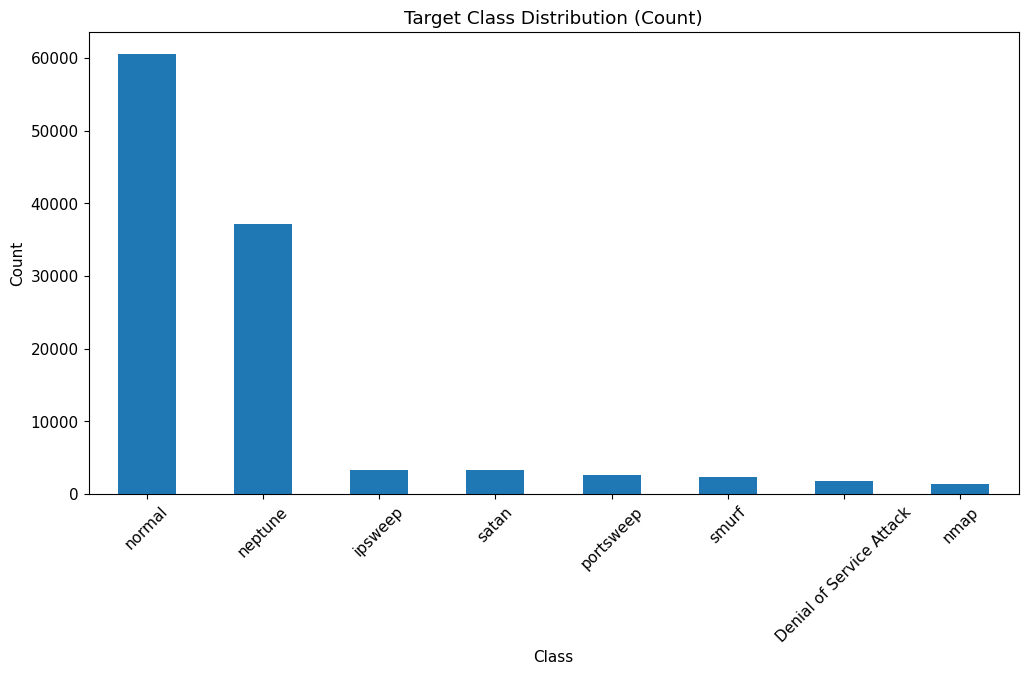

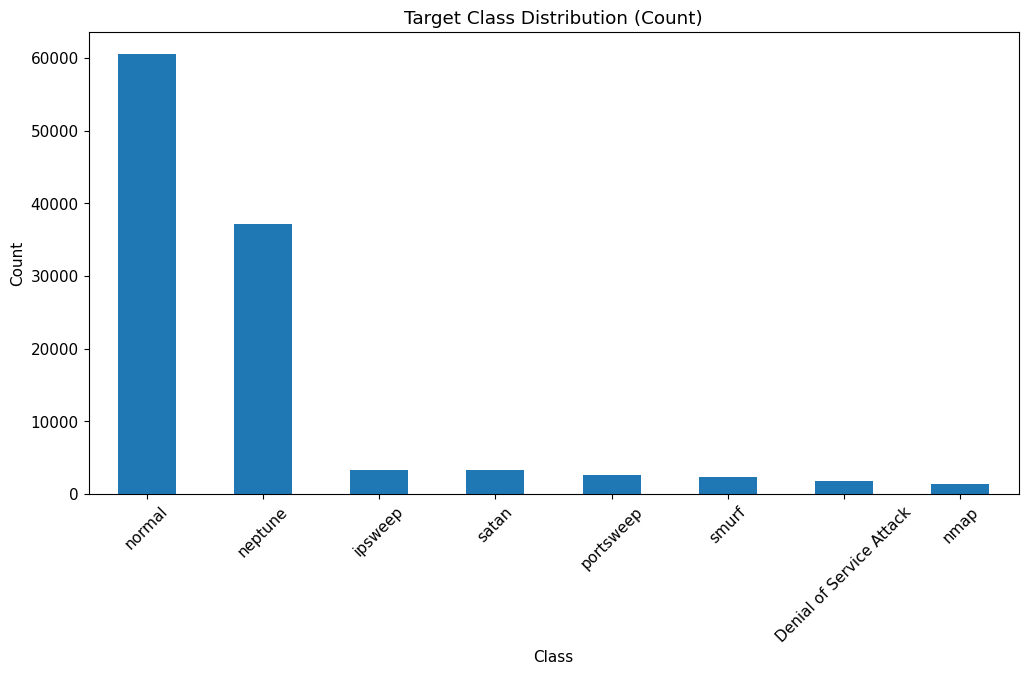

In [168]:
# ============================================================
# Sub-Step D2.3 — Visual Distribution (Bar Plot)
# ============================================================

fig, ax = plt.subplots(figsize=(12, 6))
class_counts.plot(kind="bar", ax=ax)
ax.set_title("Target Class Distribution (Count)")
ax.set_xlabel("Class")
ax.set_ylabel("Count")
ax.tick_params(axis='x', rotation=45)

add_fig_page_d2(
    title="Sub-Step D2.3 — Bar plot of target class distribution",
    fig=fig
)

fig

In [169]:
# ============================================================
# Sub-Step D2.4 — Export PDF (Finalize)
# ============================================================

render_report_d2(PDF_PATH_D2)

print(f"✅ PDF generated: {PDF_PATH_D2}")
display(FileLink(PDF_PATH_D2))

✅ PDF generated: EDA_STEP_D2_Target_Distribution_Analysis.pdf


/kaggle/working/EDA_STEP_D2_Target_Distribution_Analysis.pdf

__Insight Kesimpulan (Naratif — Mendalam)__

Sub-Step D2.1 — Target Distribution (Count & Percent)
Analisis distribusi kelas menunjukkan bahwa problem ini merupakan klasifikasi multiclass dengan distribusi yang sangat tidak merata. Dari total 112.446 sampel, dua kelas teratas (normal dan neptune) mendominasi dataset dengan proporsi gabungan sekitar 87%, sementara enam kelas lainnya tersebar pada proporsi yang relatif kecil (masing-masing di bawah 3%). Pola ini menegaskan bahwa dataset tidak memiliki distribusi kelas yang seimbang secara alami, melainkan mencerminkan kondisi operasional jaringan di mana trafik normal dan jenis serangan tertentu muncul jauh lebih sering dibandingkan tipe serangan lainnya. Dengan struktur seperti ini, setiap analisis lanjutan harus menganggap kelas minor sebagai entitas penting meskipun jumlahnya kecil, bukan sekadar variasi minor dari kelas mayor.

Sub-Step D2.2 — Imbalance Severity Indicators
Pengukuran tingkat keparahan imbalance memperlihatkan bahwa ketimpangan kelas berada pada level ekstrem, dengan rasio antara kelas mayor dan minor mencapai sekitar 45:1. Selain itu, tiga kelas teratas saja sudah mencakup hampir 90% dari seluruh data, yang berarti sebagian besar sinyal statistik global akan didominasi oleh sedikit kelas. Kondisi ini menunjukkan bahwa problem yang dihadapi bukan hanya multiclass imbalance biasa, tetapi long-tail multiclass problem, di mana kelas minor berada pada risiko tinggi untuk diabaikan oleh mekanisme pembelajaran standar. Tanpa perhatian khusus, optimizer akan secara alami memprioritaskan kelas mayor karena kontribusinya yang jauh lebih besar terhadap fungsi loss.

Sub-Step D2.3 — Visual Distribution (Bar Plot)
Visualisasi distribusi kelas memperkuat temuan numerik dengan menunjukkan adanya diskontinuitas yang tajam antara kelas mayor dan kelas minor. Tidak terlihat transisi bertahap dari kelas dengan frekuensi tinggi ke rendah; sebaliknya, terjadi penurunan frekuensi yang sangat drastis setelah dua kelas teratas. Pola visual ini mengindikasikan bahwa kelas minor membentuk ekor panjang yang jelas dan terpisah dari kelas mayor. Hal ini mengisyaratkan bahwa setiap kelas minor kemungkinan merepresentasikan pola atau signature serangan yang spesifik dan jarang terjadi, sehingga keberadaannya sangat penting dari sudut pandang keamanan, meskipun kontribusinya kecil terhadap distribusi keseluruhan.

## Imbalance Severity & Long-Tail Diagnosis

In [170]:
# ============================================================
# STEP D3 — Report Setup (Collector)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

assert "df" in globals(), "df belum tersedia."
assert "type_of_attack" in df.columns, "Kolom target 'type_of_attack' tidak ditemukan."

TARGET_COL = "type_of_attack"

PDF_PATH_D3 = "EDA_STEP_D3_Imbalance_Severity_Long_Tail_Diagnosis.pdf"
REPORT_PAGES_D3 = []

def add_text_page_d3(title: str, lines: list[str]):
    REPORT_PAGES_D3.append({
        "type": "text",
        "title": title,
        "lines": [str(x) for x in lines]
    })

def add_fig_page_d3(title: str, fig):
    REPORT_PAGES_D3.append({
        "type": "fig",
        "title": title,
        "fig": fig
    })

def render_report_d3(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped = []
        for line in lines:
            wrapped.extend(wrap(str(line), 110))
            wrapped.append("")
        ax.text(
            0.01, 0.98,
            f"{title}\n\n" + "\n".join(wrapped),
            va="top", ha="left", family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_D3:
            if page["type"] == "text":
                fig, ax = plt.subplots()
                _render_text(ax, page["title"], page["lines"])
                pdf.savefig(fig)
                plt.close(fig)
            elif page["type"] == "fig":
                page["fig"].suptitle(page["title"], y=0.98)
                pdf.savefig(page["fig"])
                plt.close(page["fig"])

print("✅ Collector STEP D3 siap.")

✅ Collector STEP D3 siap.


In [171]:
# ============================================================
# Sub-Step D3.1 — Minor / Major Ratio Profiling
# ============================================================

class_counts = df[TARGET_COL].value_counts()
total_samples = len(df)

ratio_table = pd.DataFrame({
    "count": class_counts,
    "percent": (class_counts / total_samples * 100).round(3),
    "ratio_vs_major": (class_counts.iloc[0] / class_counts).round(2)
})

# Klasifikasi keparahan imbalance (heuristic EDA-only)
def imbalance_severity(r):
    if r <= 5:
        return "Low"
    elif r <= 10:
        return "Moderate"
    elif r <= 30:
        return "High"
    else:
        return "Extreme"

ratio_table["imbalance_severity"] = ratio_table["ratio_vs_major"].apply(imbalance_severity)

add_text_page_d3(
    title="Sub-Step D3.1 — Minor/Major ratio profiling",
    lines=[
        f"Total samples: {total_samples}",
        "Rasio kelas terhadap kelas mayor:",
        ratio_table.to_string()
    ]
)

ratio_table

count  percent  ratio_vs_major imbalance_severity
type_of_attack                                                             
normal                    60538   53.837            1.00                Low
neptune                   37142   33.031            1.63                Low
ipsweep                    3254    2.894           18.60               High
satan                      3248    2.888           18.64               High
portsweep                  2687    2.390           22.53               High
smurf                      2394    2.129           25.29               High
Denial of Service Attack   1861    1.655           32.53            Extreme
nmap                       1322    1.176           45.79            Extreme

In [172]:
# ============================================================
# Sub-Step D3.2 — Extreme Minority Class Detection (<1%)
# ============================================================

extreme_minor = ratio_table[ratio_table["percent"] < 1.0]

add_text_page_d3(
    title="Sub-Step D3.2 — Extreme minority class check (<1%)",
    lines=[
        f"Jumlah kelas dengan proporsi < 1%: {extreme_minor.shape[0]}",
        "Daftar kelas ekstrem (jika ada):",
        (extreme_minor.to_string() if len(extreme_minor) > 0 else "Tidak ada kelas <1%")
    ]
)

extreme_minor

Empty DataFrame
Columns: [count, percent, ratio_vs_major, imbalance_severity]
Index: []

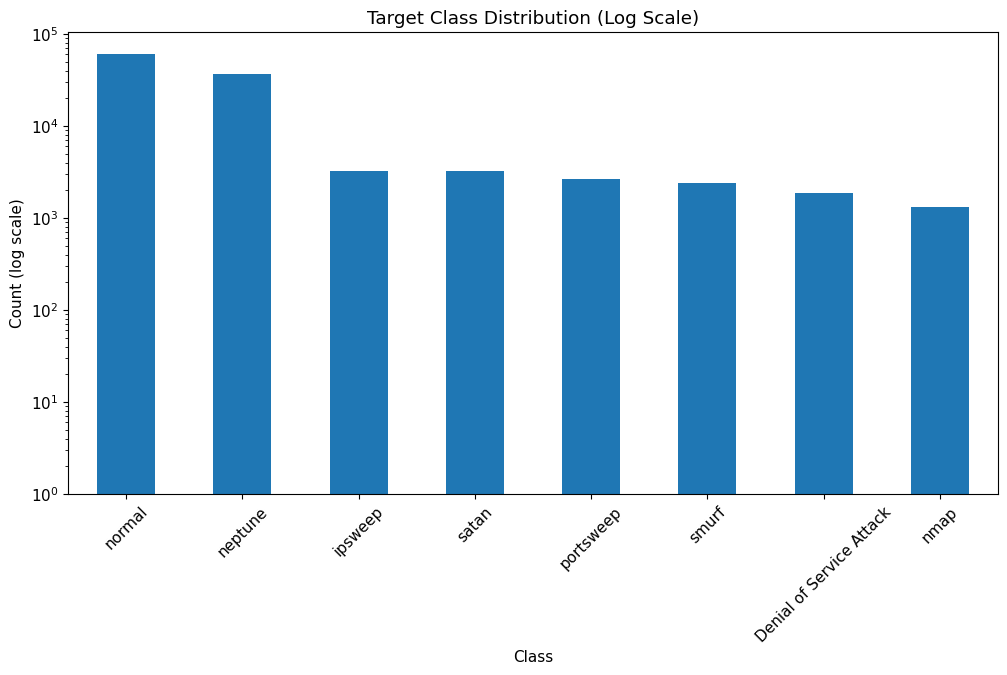

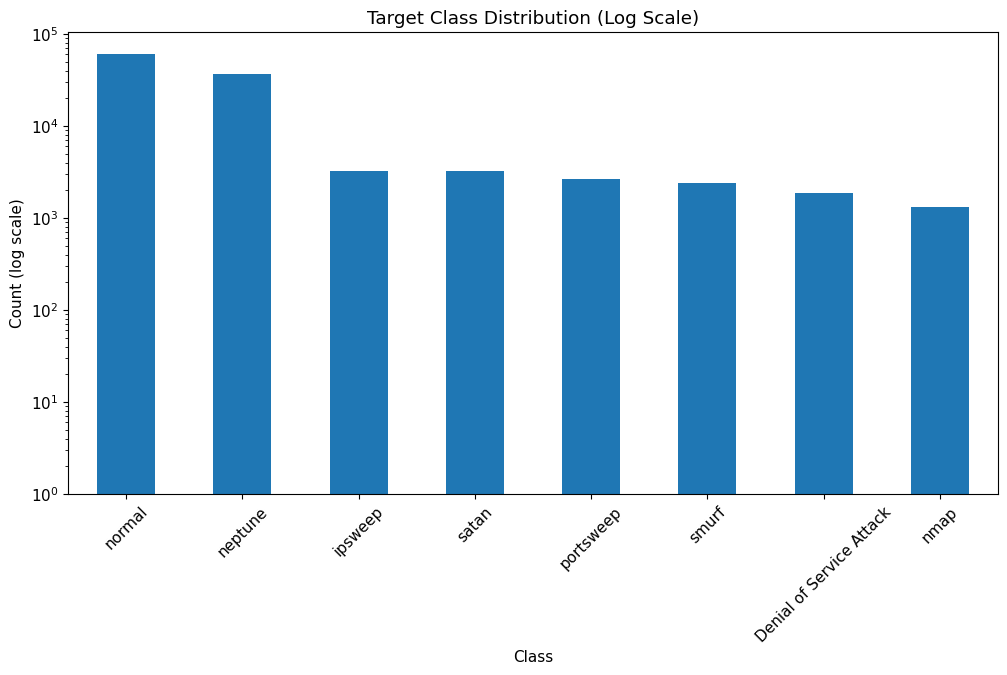

In [173]:
# ============================================================
# Sub-Step D3.3 — Long-Tail Visualization (Log-Scale)
# ============================================================

fig, ax = plt.subplots(figsize=(12, 6))
class_counts.plot(kind="bar", ax=ax, log=True)
ax.set_title("Target Class Distribution (Log Scale)")
ax.set_xlabel("Class")
ax.set_ylabel("Count (log scale)")
ax.tick_params(axis='x', rotation=45)

add_fig_page_d3(
    title="Sub-Step D3.3 — Class distribution (log scale)",
    fig=fig
)

fig

In [174]:
# ============================================================
# Sub-Step D3.4 — Loss & Metric Risk Annotation (EDA-only)
# ============================================================

add_text_page_d3(
    title="Sub-Step D3.4 — Loss & metric risk annotation (EDA-only)",
    lines=[
        "Temuan EDA:",
        "- Distribusi kelas menunjukkan long-tail multiclass dengan beberapa kelas minor.",
        "- Rasio minor/major tinggi berpotensi membuat optimizer bias ke kelas mayor.",
        "",
        "Implikasi awal (belum keputusan final):",
        "- Accuracy berisiko menyesatkan.",
        "- Macro-averaged metrics (Macro-F1, Macro-Recall) lebih informatif.",
        "- Loss tanpa reweighting berisiko mengabaikan kelas minor."
    ]
)

In [175]:
# ============================================================
# Sub-Step D3.5 — Export PDF (Finalize)
# ============================================================

render_report_d3(PDF_PATH_D3)

print(f"✅ PDF generated: {PDF_PATH_D3}")
display(FileLink(PDF_PATH_D3))

✅ PDF generated: EDA_STEP_D3_Imbalance_Severity_Long_Tail_Diagnosis.pdf


/kaggle/working/EDA_STEP_D3_Imbalance_Severity_Long_Tail_Diagnosis.pdf

__Insight Kesimpulan (Naratif — Mendalam)__

Sub-Step D3.1 — Minor / Major Ratio Profiling
Analisis rasio minor terhadap kelas mayor memperlihatkan bahwa tingkat ketimpangan antar kelas tidak homogen. Beberapa kelas seperti neptune masih relatif dekat dengan kelas mayor, sementara kelas lain seperti nmap dan Denial of Service Attack berada pada kondisi ketimpangan ekstrem. Hal ini menegaskan bahwa problem ini memiliki spektrum kesulitan yang luas antar kelas, sehingga pendekatan satu ukuran untuk semua (one-size-fits-all) terhadap imbalance berpotensi tidak memadai.

Sub-Step D3.2 — Extreme Minority Class Check
Meskipun tidak ditemukan kelas dengan proporsi di bawah 1%, hasil ini tidak serta-merta mengindikasikan kondisi aman. Kelas dengan proporsi sedikit di atas ambang tersebut tetap menunjukkan rasio minor/major yang sangat besar. Ini menekankan bahwa evaluasi keparahan imbalance harus mempertimbangkan rasio relatif, bukan hanya proporsi absolut.

Sub-Step D3.3 — Long-Tail Visualization
Visualisasi skala log memperjelas bahwa distribusi kelas membentuk ekor panjang yang konsisten dan terpisah dari kelas mayor. Pola ini mengonfirmasi bahwa long-tail merupakan karakter inheren dataset, bukan artefak visualisasi. Dengan demikian, kesulitan pembelajaran kelas minor bersumber dari struktur distribusi itu sendiri.

Sub-Step D3.4 — Loss & Metric Risk Annotation
Catatan implikasi loss dan metrik menunjukkan bahwa risiko terbesar tidak hanya terletak pada data, tetapi pada cara performa model diukur. Tanpa metrik yang sensitif terhadap kelas minor, keberhasilan model dapat terdistorsi. Sub-step ini mengikat temuan kuantitatif sebelumnya ke konsekuensi praktis dalam evaluasi model.

## Problem Difficulty Intuition Check

In [176]:
# ============================================================
# STEP D4 — Report Setup (Collector)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

assert "df" in globals(), "df belum tersedia."
assert "type_of_attack" in df.columns, "Kolom target 'type_of_attack' tidak ditemukan."

TARGET_COL = "type_of_attack"

PDF_PATH_D4 = "EDA_STEP_D4_Problem_Difficulty_Intuition_Check.pdf"
REPORT_PAGES_D4 = []

def add_text_page_d4(title: str, lines: list[str]):
    REPORT_PAGES_D4.append({
        "type": "text",
        "title": title,
        "lines": [str(x) for x in lines]
    })

def add_fig_page_d4(title: str, fig):
    REPORT_PAGES_D4.append({
        "type": "fig",
        "title": title,
        "fig": fig
    })

def render_report_d4(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped = []
        for line in lines:
            wrapped.extend(wrap(str(line), 110))
            wrapped.append("")
        ax.text(
            0.01, 0.98,
            f"{title}\n\n" + "\n".join(wrapped),
            va="top", ha="left", family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_D4:
            if page["type"] == "text":
                fig, ax = plt.subplots()
                _render_text(ax, page["title"], page["lines"])
                pdf.savefig(fig)
                plt.close(fig)
            elif page["type"] == "fig":
                page["fig"].suptitle(page["title"], y=0.98)
                pdf.savefig(page["fig"])
                plt.close(page["fig"])

print("✅ Collector STEP D4 siap.")

✅ Collector STEP D4 siap.


3

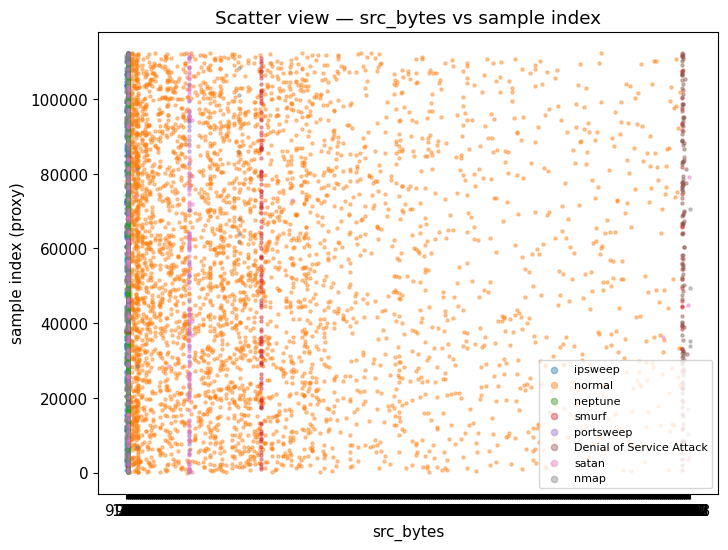

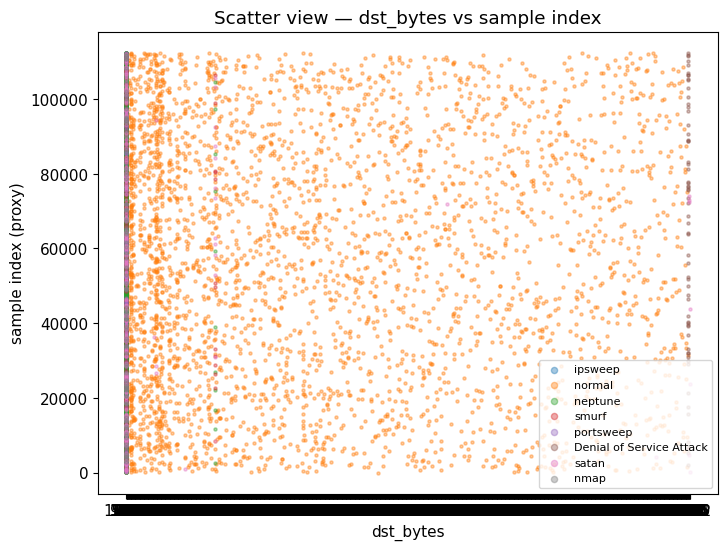

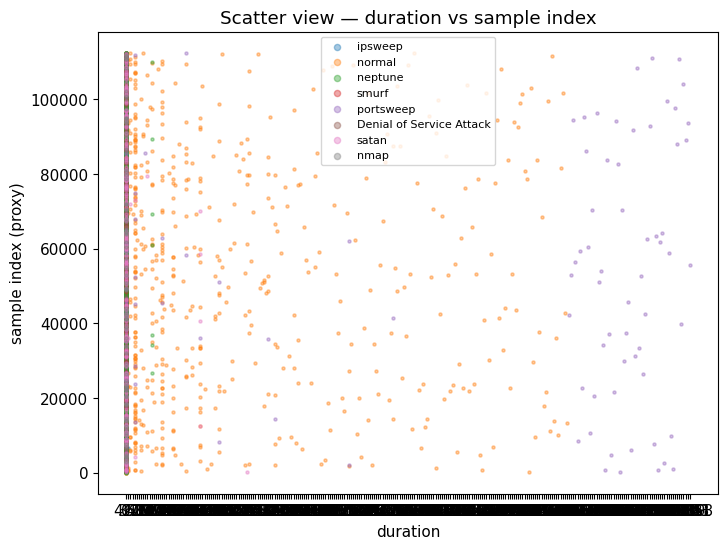

In [177]:
# ============================================================
# Sub-Step D4.1 — Feature–Label Scatter (Sampling)
# ============================================================

candidate_features = ["src_bytes", "dst_bytes", "duration"]
candidate_features = [c for c in candidate_features if c in df.columns]

SAMPLE_N = 8000
df_sample = df.sample(n=min(SAMPLE_N, len(df)), random_state=42)

for feat in candidate_features:
    fig, ax = plt.subplots(figsize=(8, 6))
    for cls in df_sample[TARGET_COL].unique():
        sub = df_sample[df_sample[TARGET_COL] == cls]
        ax.scatter(
            sub[feat],
            sub.index,
            s=5,
            alpha=0.4,
            label=cls
        )
    ax.set_title(f"Scatter view — {feat} vs sample index")
    ax.set_xlabel(feat)
    ax.set_ylabel("sample index (proxy)")
    ax.legend(markerscale=2, fontsize=8)

    add_fig_page_d4(
        title=f"Sub-Step D4.1 — Scatter visualization ({feat})",
        fig=fig
    )

len(candidate_features)

array([0.25078412, 0.25051086])

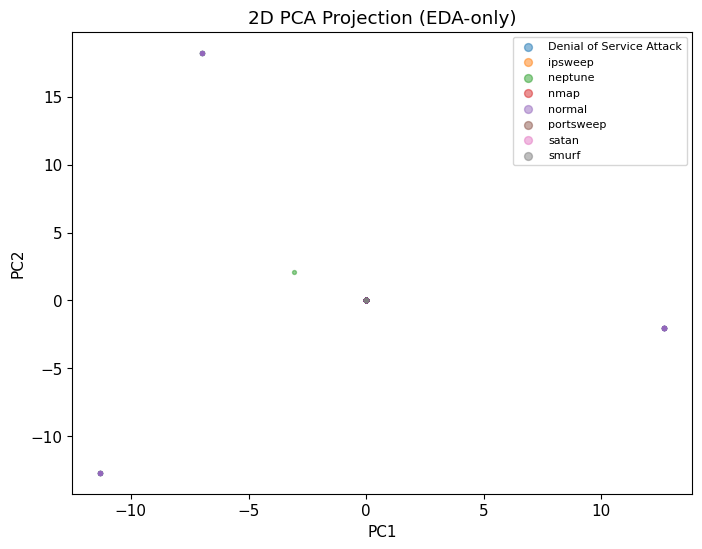

In [178]:
# ============================================================
# Sub-Step D4.2 — Simple 2D Projection (EDA-only)
# ============================================================

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c != TARGET_COL]

proj_sample = df[numeric_cols + [TARGET_COL]].dropna().sample(
    n=min(6000, len(df)), random_state=42
)

X = proj_sample[numeric_cols].values
y = proj_sample[TARGET_COL].values

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

fig, ax = plt.subplots(figsize=(8, 6))
for cls in np.unique(y):
    mask = y == cls
    ax.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        s=8,
        alpha=0.5,
        label=cls
    )

ax.set_title("2D PCA Projection (EDA-only)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.legend(markerscale=2, fontsize=8)

add_fig_page_d4(
    title="Sub-Step D4.2 — 2D PCA projection (EDA-only)",
    fig=fig
)

pca.explained_variance_ratio_

In [179]:
# ============================================================
# Sub-Step D4.3 — Projection Metadata (No Interpretation)
# ============================================================

add_text_page_d4(
    title="Sub-Step D4.3 — Projection metadata (EDA-only)",
    lines=[
        f"Jumlah sampel scatter: {len(df_sample)}",
        f"Jumlah fitur scatter: {len(candidate_features)}",
        f"Jumlah sampel PCA: {len(proj_sample)}",
        f"Jumlah fitur numerik PCA: {len(numeric_cols)}",
        "",
        "Catatan:",
        "- Tidak ada interpretasi dilakukan pada tahap ini.",
        "- Evaluasi overlap dan tingkat kesulitan dilakukan di FASE 4."
    ]
)

In [180]:
# ============================================================
# Sub-Step D4.4 — Export PDF (Finalize)
# ============================================================

render_report_d4(PDF_PATH_D4)

print(f"✅ PDF generated: {PDF_PATH_D4}")
display(FileLink(PDF_PATH_D4))

✅ PDF generated: EDA_STEP_D4_Problem_Difficulty_Intuition_Check.pdf


/kaggle/working/EDA_STEP_D4_Problem_Difficulty_Intuition_Check.pdf

__Insight Kesimpulan (Naratif — Mendalam)__

Sub-Step D4.1 — Feature–Label Scatter
Visualisasi scatter antara fitur numerik utama dan label menunjukkan bahwa nilai fitur dari berbagai kelas saling tumpang tindih secara luas. Tidak terdapat pola pemisahan kasar yang dapat diamati hanya dari satu fitur numerik. Hal ini mengindikasikan bahwa problem klasifikasi ini tidak dapat diselesaikan melalui pemisahan berbasis threshold sederhana, dan bahwa sinyal kelas kemungkinan tersebar pada kombinasi fitur yang lebih kompleks.

Sub-Step D4.2 — Simple 2D Projection (PCA)
Proyeksi PCA dua dimensi memperlihatkan bahwa kelas-kelas tidak membentuk klaster terpisah pada ruang variansi terbesar. Titik-titik dari kelas normal dan berbagai tipe serangan bercampur pada area yang sama, menandakan bahwa struktur kelas tidak terwakili secara jelas pada dimensi linear utama. Temuan ini memperkuat dugaan bahwa separabilitas kelas bersifat non-linear atau berada pada ruang fitur berdimensi lebih tinggi.

Sub-Step D4.3 — Projection Metadata
Metadata eksekusi memastikan bahwa visualisasi dilakukan pada jumlah sampel dan fitur yang memadai untuk observasi awal. Dengan demikian, tumpang tindih yang teramati tidak dapat dikaitkan dengan keterbatasan teknis visualisasi, melainkan mencerminkan karakter inheren dataset itu sendiri.

## Feature vs Target (Early Signal — Numerical)

In [181]:
# ============================================================
# STEP D5 — Report Setup (Collector)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

assert "df" in globals(), "df belum tersedia."
assert "type_of_attack" in df.columns, "Kolom target 'type_of_attack' tidak ditemukan."

TARGET_COL = "type_of_attack"

PDF_PATH_D5 = "EDA_STEP_D5_Feature_vs_Target_Early_Signal_Numerical.pdf"
REPORT_PAGES_D5 = []

def add_text_page_d5(title: str, lines: list[str]):
    REPORT_PAGES_D5.append({
        "type": "text",
        "title": title,
        "lines": [str(x) for x in lines]
    })

def add_fig_page_d5(title: str, fig):
    REPORT_PAGES_D5.append({
        "type": "fig",
        "title": title,
        "fig": fig
    })

def render_report_d5(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped = []
        for line in lines:
            wrapped.extend(wrap(str(line), 110))
            wrapped.append("")
        ax.text(
            0.01, 0.98,
            f"{title}\n\n" + "\n".join(wrapped),
            va="top", ha="left", family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_D5:
            if page["type"] == "text":
                fig, ax = plt.subplots()
                _render_text(ax, page["title"], page["lines"])
                pdf.savefig(fig)
                plt.close(fig)
            elif page["type"] == "fig":
                page["fig"].suptitle(page["title"], y=0.98)
                pdf.savefig(page["fig"])
                plt.close(page["fig"])

print("✅ Collector STEP D5 siap.")

✅ Collector STEP D5 siap.


In [182]:
# ============================================================
# Sub-Step D5.1 — Numerical Feature Inventory
# ============================================================

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c != TARGET_COL]

add_text_page_d5(
    title="Sub-Step D5.1 — Numerical feature inventory",
    lines=[
        f"Jumlah fitur numerik: {len(numeric_cols)}",
        "Daftar fitur numerik:",
        numeric_cols
    ]
)

numeric_cols

['dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate']

4

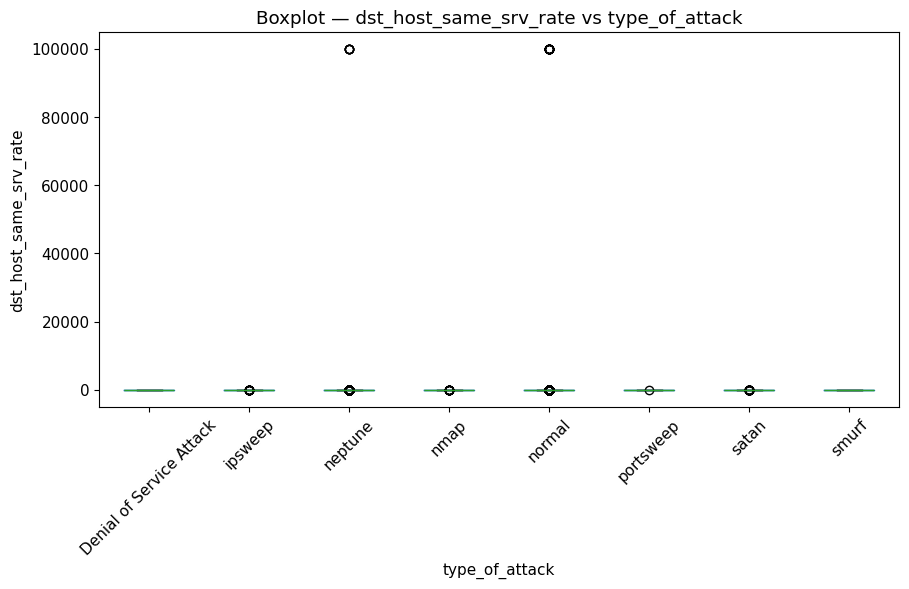

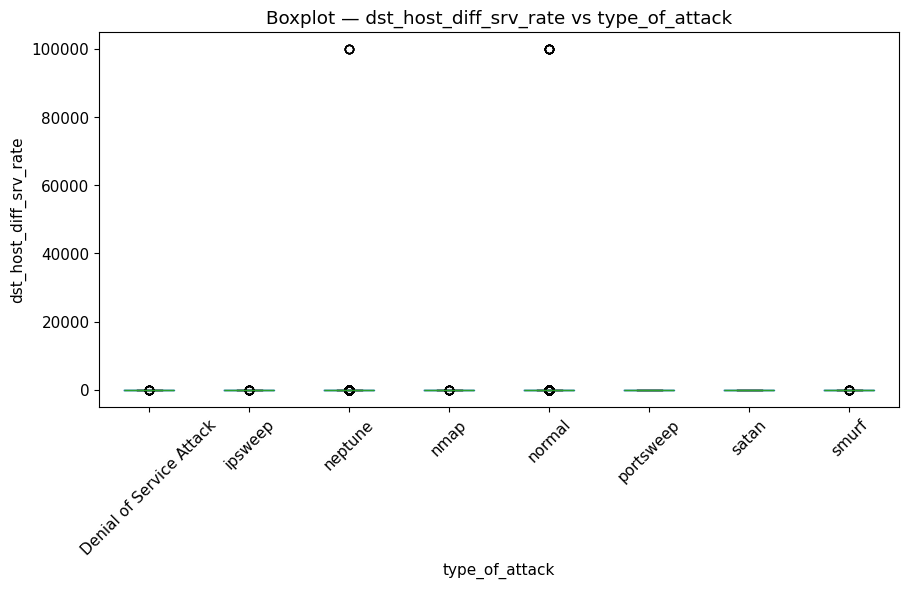

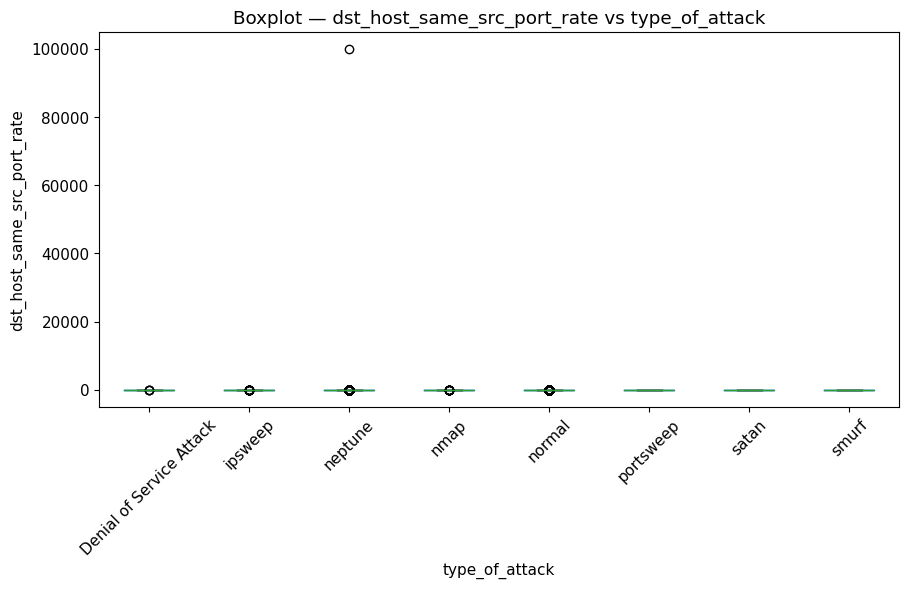

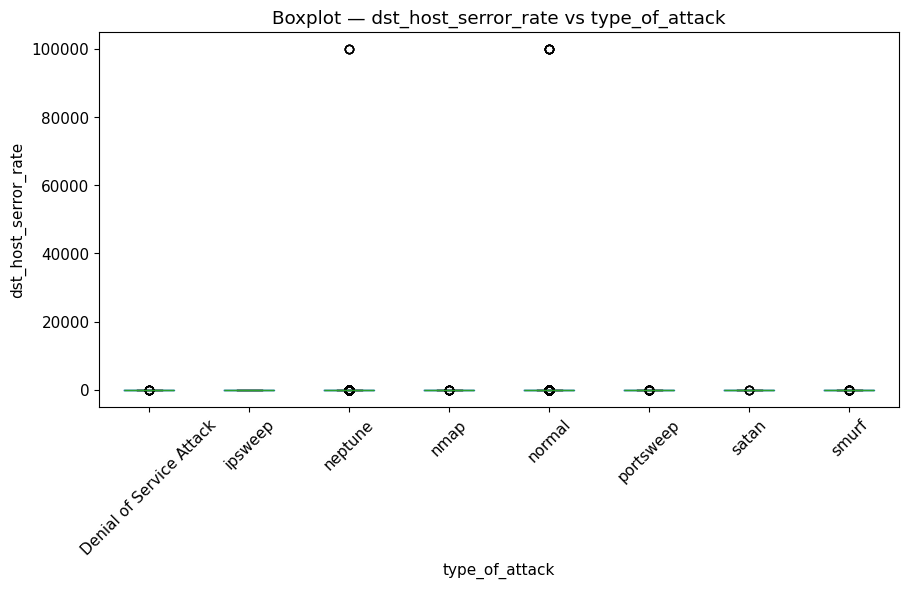

In [183]:
# ============================================================
# Sub-Step D5.2 — Boxplot Feature vs Target (Sampling)
# ============================================================

SAMPLE_N = 6000
df_sample = df[numeric_cols + [TARGET_COL]].dropna().sample(
    n=min(SAMPLE_N, len(df)), random_state=42
)

for feat in numeric_cols:
    fig, ax = plt.subplots(figsize=(10, 5))
    df_sample.boxplot(
        column=feat,
        by=TARGET_COL,
        ax=ax,
        grid=False,
        rot=45
    )
    ax.set_title(f"Boxplot — {feat} vs {TARGET_COL}")
    ax.set_xlabel(TARGET_COL)
    ax.set_ylabel(feat)
    plt.suptitle("")

    add_fig_page_d5(
        title=f"Sub-Step D5.2 — Boxplot ({feat} vs target)",
        fig=fig
    )

len(numeric_cols)

In [184]:
# ============================================================
# Sub-Step D5.3 — Feature Distribution Metadata
# ============================================================

meta_rows = []

for feat in numeric_cols:
    meta_rows.append({
        "feature": feat,
        "non_null_count": df[feat].notna().sum(),
        "zero_ratio": (df[feat] == 0).mean() if (df[feat] == 0).any() else 0.0,
        "unique_count": df[feat].nunique()
    })

meta_df = pd.DataFrame(meta_rows)

add_text_page_d5(
    title="Sub-Step D5.3 — Numerical feature metadata",
    lines=[
        "Metadata distribusi numerik (tanpa interpretasi):",
        meta_df.to_string(index=False)
    ]
)

meta_df

feature  non_null_count  zero_ratio  unique_count
0       dst_host_same_srv_rate          112118    0.055146           102
1       dst_host_diff_srv_rate          112203    0.368159           102
2  dst_host_same_src_port_rate          112008    0.500534           102
3         dst_host_serror_rate          112018    0.641241           102

col  raw_non_null  num_non_null  conv_rate  raw_unique
20       is_host_login        112446        112370   0.999324           3
13          root_shell        112446        112294   0.998648           4
11           logged_in        112446        112276   0.998488           3
19   num_outbound_cmds        112446        112260   0.998346           2
14        su_attempted        112446        112251   0.998266           5
23           srv_count        112446        112237   0.998141         511
22               count        112446        112218   0.997972         514
15            num_root        112446        112212   0.997919          73
16  num_file_creations        112446        112205   0.997857          33
6                 land        112446        112182   0.997652           4
8               urgent        112446        112146   0.997332           6
17          num_shells        112446        112138   0.997261           5
21      is_guest_login        112446        112127   0.997163           4
12     num_compromised        112446        112094   0.996870          82
10   num_failed_logins        112446        112041   0.996398           7
7       wrong_fragment        112446        111923   0.995349           4
0             duration        112446        111889   0.995047        2665
32  dst_host_srv_count        112446        111883   0.994993         258
31      dst_host_count        112446        111858   0.994771         258
18    num_access_files        112446        111855   0.994744          12

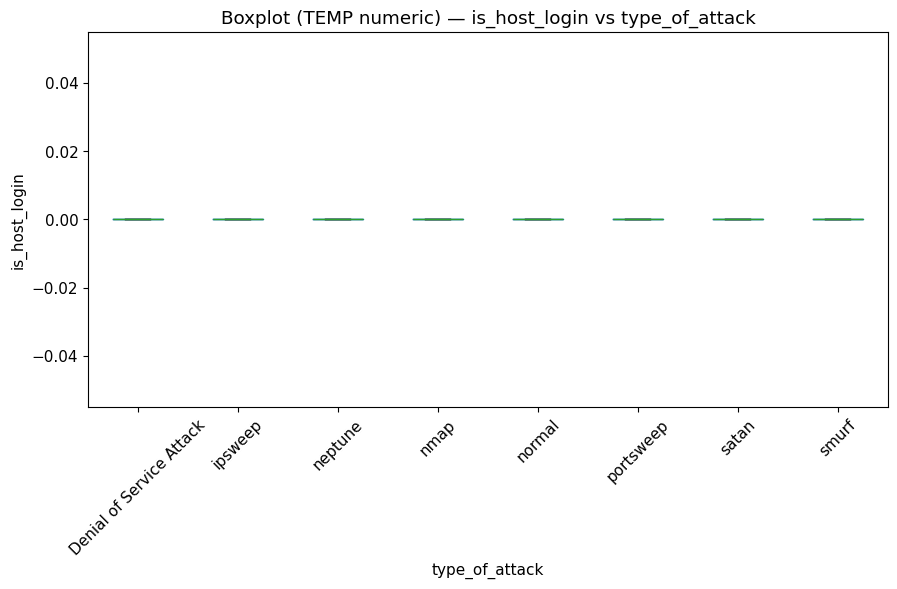

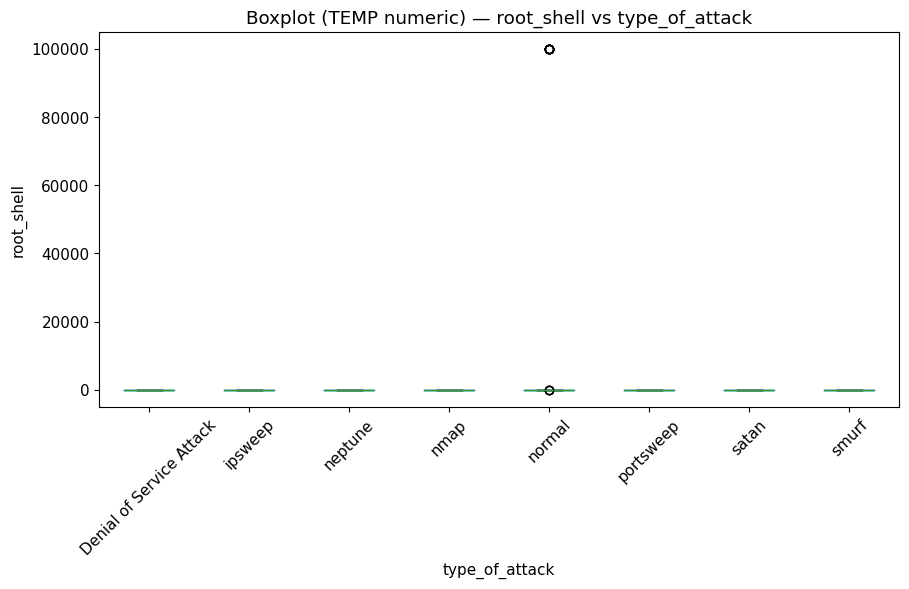

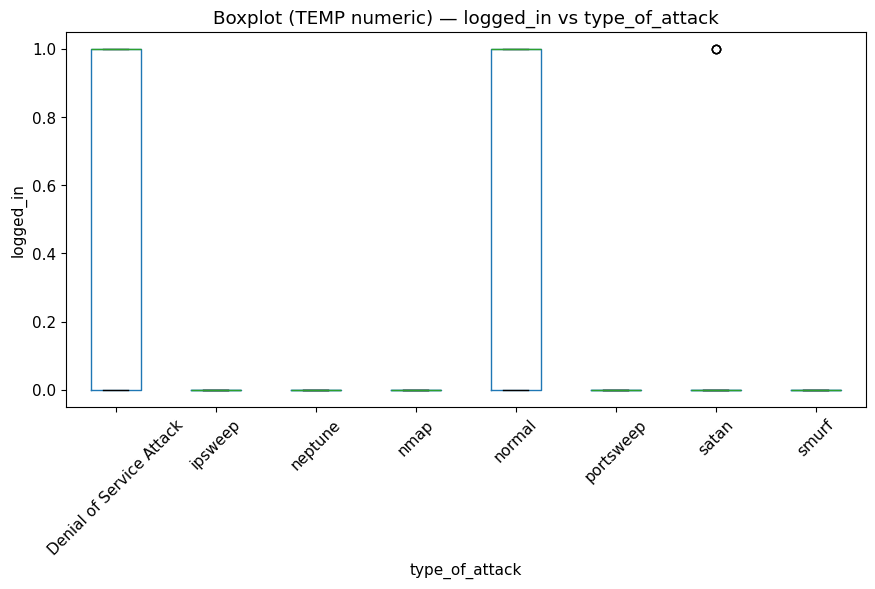

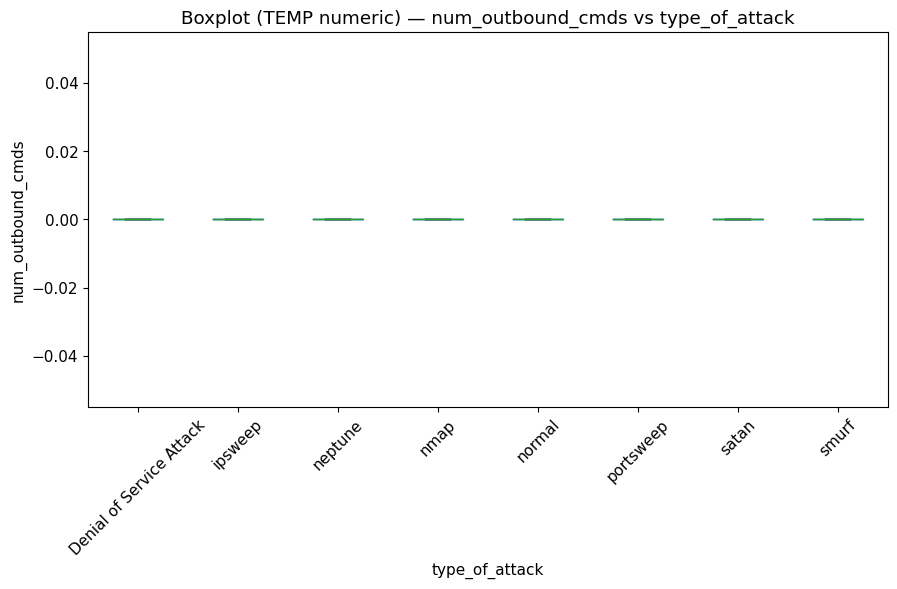

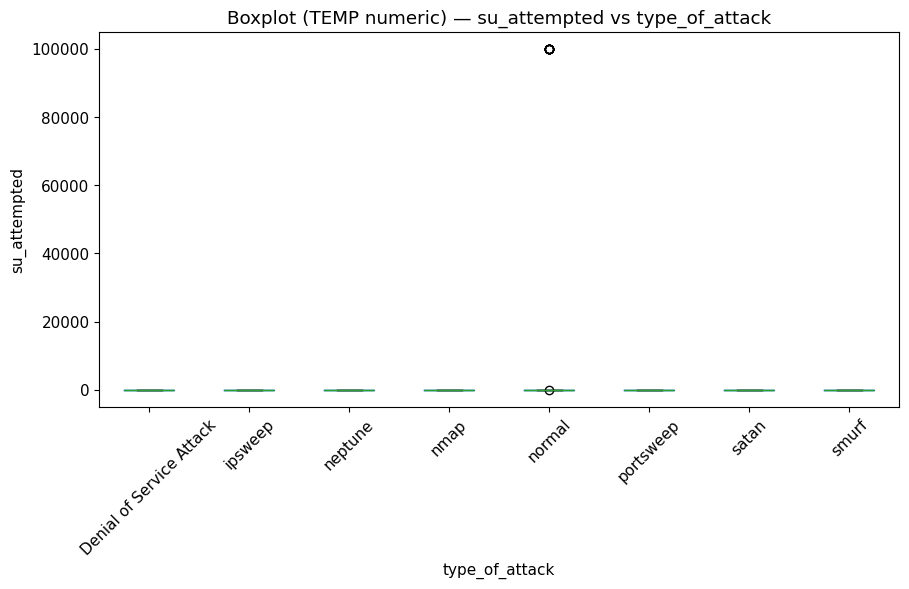

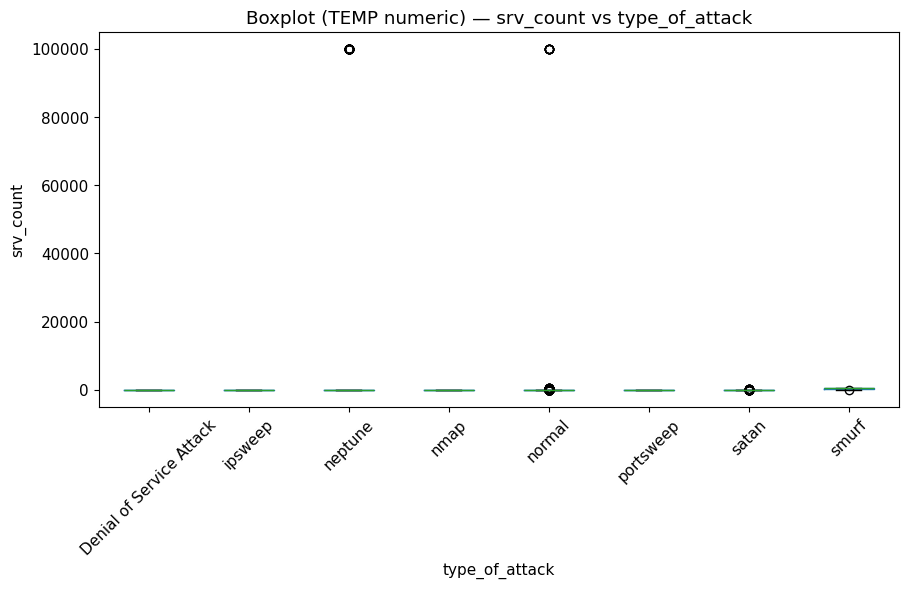

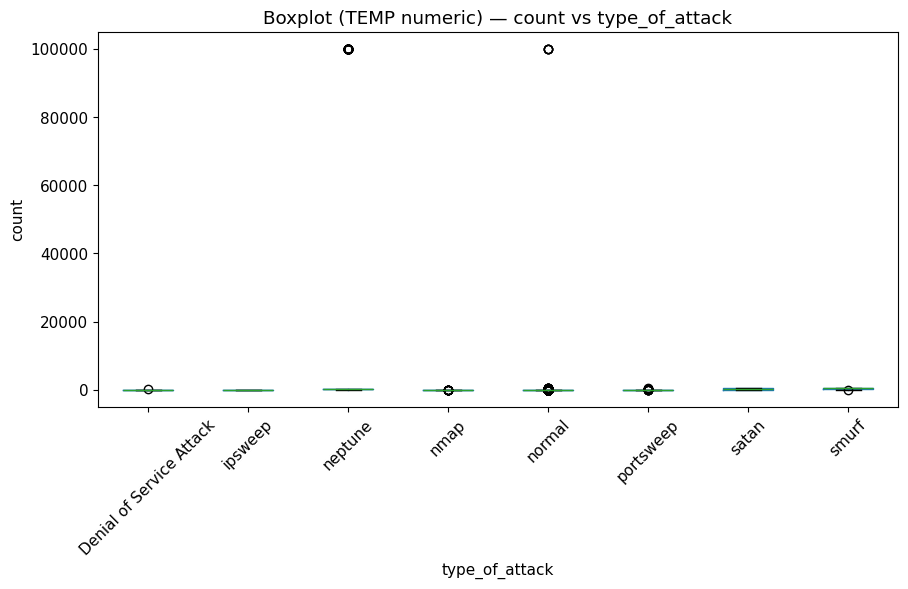

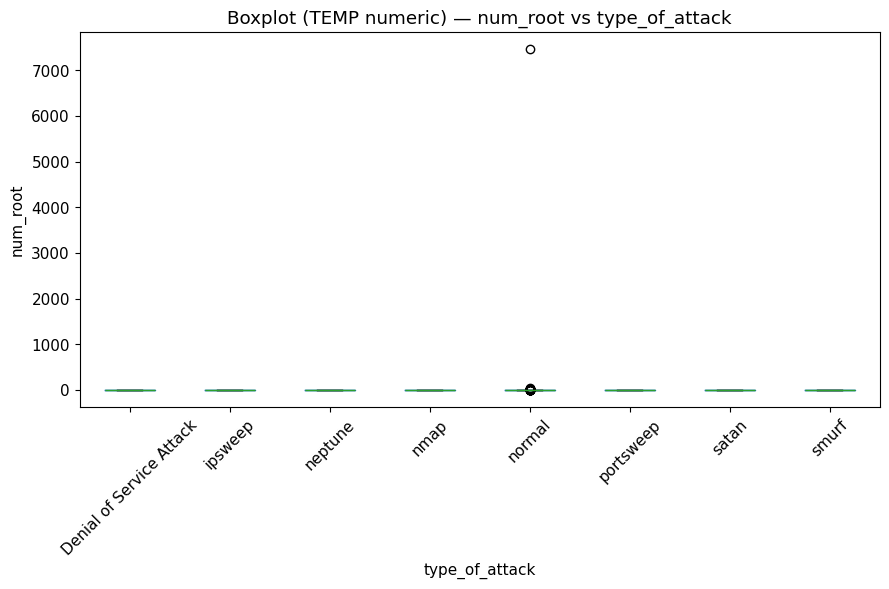

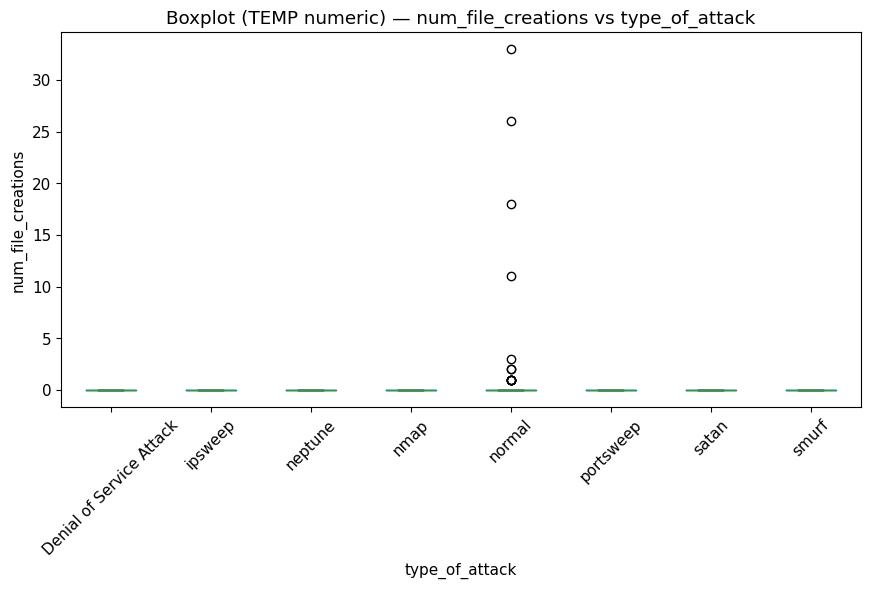

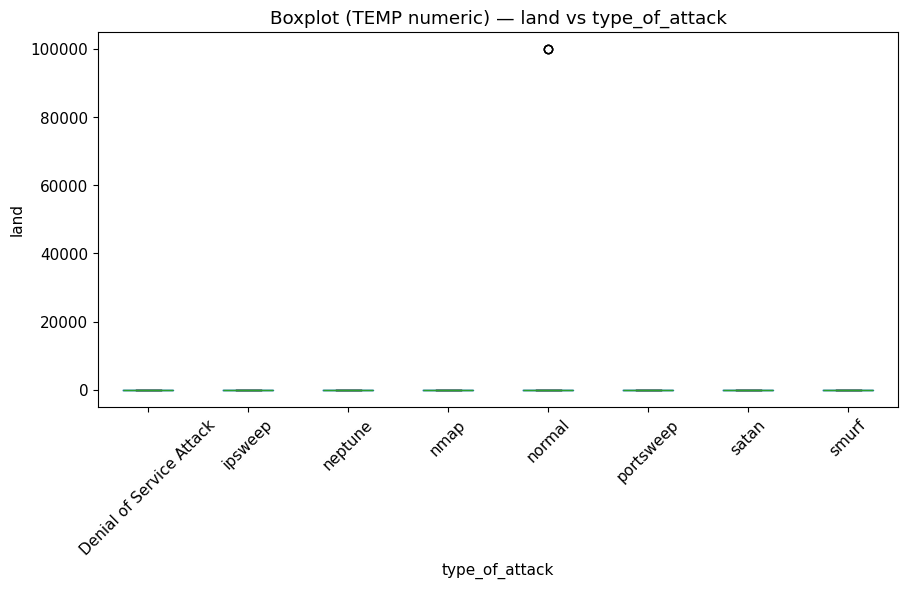

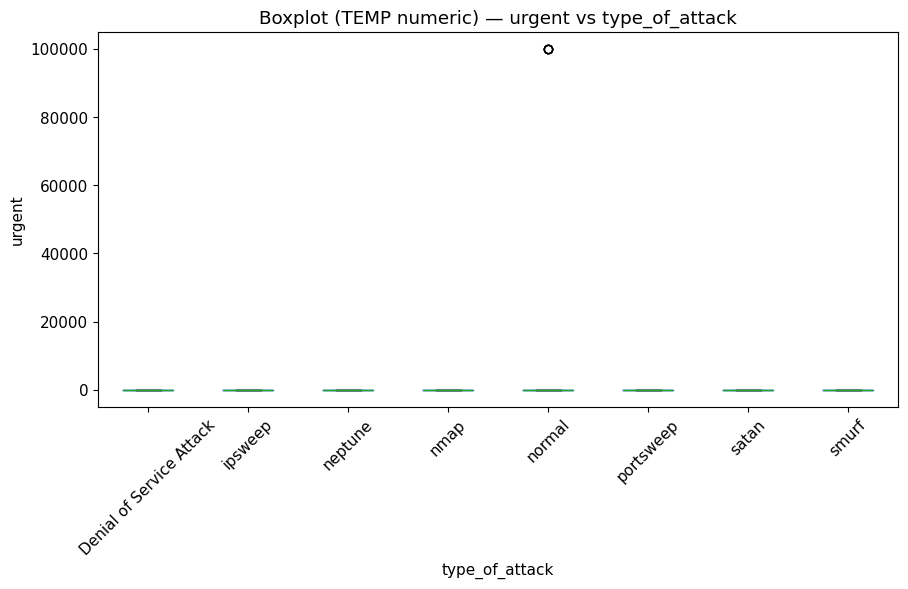

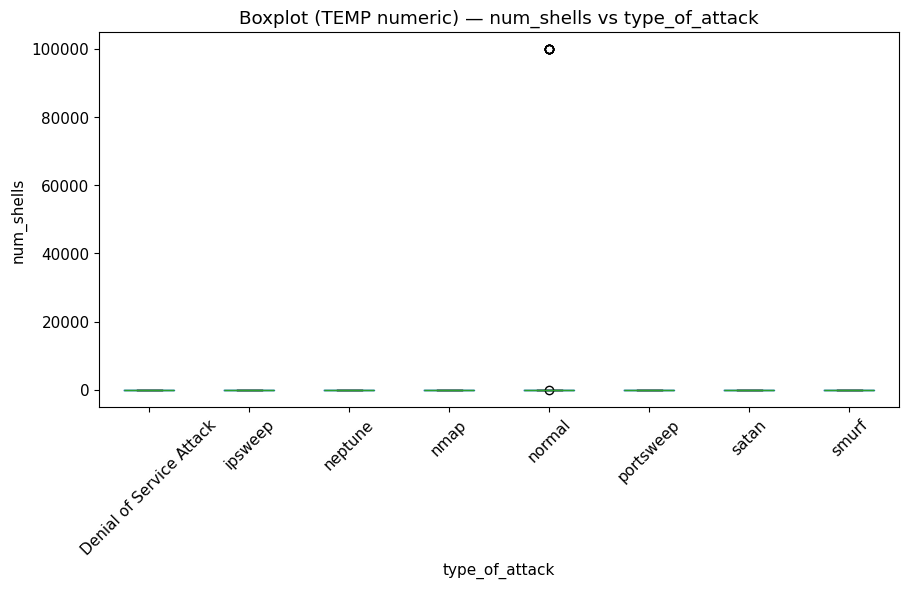

In [185]:
# ============================================================
# Sub-Step D5.4 — Temporary Object→Numeric Probe (No Mutation)
# ============================================================

# 1) Kandidat kolom object
obj_cols = df.select_dtypes(include=["object"]).columns.tolist()
obj_cols = [c for c in obj_cols if c != TARGET_COL]

# 2) Uji konversi numerik sementara (tanpa mutation)
probe_stats = []
converted_cols = []
converted_series_map = {}

for c in obj_cols:
    s_raw = df[c]
    s_num = pd.to_numeric(s_raw, errors="coerce")  # TEMP only

    total = len(s_raw)
    non_null_raw = s_raw.notna().sum()
    non_null_num = s_num.notna().sum()

    # conversion success rate among raw non-null
    conv_rate = (non_null_num / non_null_raw) if non_null_raw > 0 else 0.0

    probe_stats.append({
        "col": c,
        "raw_non_null": int(non_null_raw),
        "num_non_null": int(non_null_num),
        "conv_rate": float(conv_rate),
        "raw_unique": int(s_raw.nunique(dropna=False)),
    })

probe_df = pd.DataFrame(probe_stats).sort_values(["conv_rate", "num_non_null"], ascending=[False, False])

# 3) Pilih kandidat pseudo-numerik (threshold EDA-only)
# - conv_rate tinggi: mayoritas nilai bisa jadi angka
# - num_non_null cukup besar: bukan kolom kecil / noise
MIN_CONV_RATE = 0.95
MIN_NUM_NONNULL = 1000

pseudo_numeric = probe_df[
    (probe_df["conv_rate"] >= MIN_CONV_RATE) &
    (probe_df["num_non_null"] >= MIN_NUM_NONNULL)
].copy()

# Batasi jumlah kolom untuk boxplot agar PDF tidak meledak
TOP_K = 12
pseudo_numeric_top = pseudo_numeric.head(TOP_K)

# Simpan seri numerik sementara untuk plot
for c in pseudo_numeric_top["col"].tolist():
    converted_series_map[c] = pd.to_numeric(df[c], errors="coerce")
    converted_cols.append(c)

add_text_page_d5(
    title="Sub-Step D5.4 — Object→Numeric probe (temporary, no mutation)",
    lines=[
        f"Jumlah kolom object (excl target): {len(obj_cols)}",
        f"Threshold pseudo-numeric: conv_rate >= {MIN_CONV_RATE}, num_non_null >= {MIN_NUM_NONNULL}",
        f"Jumlah kandidat pseudo-numeric lolos: {len(pseudo_numeric)}",
        f"Jumlah kandidat yang diplot (TOP_K={TOP_K}): {len(converted_cols)}",
        "",
        "Top candidates (by conv_rate, then num_non_null):",
        pseudo_numeric_top.to_string(index=False) if len(pseudo_numeric_top) else "Tidak ada kandidat yang memenuhi threshold."
    ]
)

# 4) Boxplot untuk pseudo-numeric (sampling) — jika ada kandidat
if len(converted_cols) > 0:
    SAMPLE_N = 6000
    # ambil sample index agar selaras dengan label
    sample_idx = df[[TARGET_COL]].dropna().sample(n=min(SAMPLE_N, len(df)), random_state=42).index
    y_sample = df.loc[sample_idx, TARGET_COL]

    for c in converted_cols:
        s_num = converted_series_map[c].loc[sample_idx]
        tmp = pd.DataFrame({c: s_num, TARGET_COL: y_sample}).dropna()

        fig, ax = plt.subplots(figsize=(10, 5))
        tmp.boxplot(column=c, by=TARGET_COL, ax=ax, grid=False, rot=45)
        ax.set_title(f"Boxplot (TEMP numeric) — {c} vs {TARGET_COL}")
        ax.set_xlabel(TARGET_COL)
        ax.set_ylabel(c)
        plt.suptitle("")

        add_fig_page_d5(
            title=f"Sub-Step D5.4 — Boxplot TEMP({c}) vs target",
            fig=fig
        )

probe_df.head(20)

In [186]:
# ============================================================
# Sub-Step D5.5 — Export PDF (Finalize)
# ============================================================

render_report_d5(PDF_PATH_D5)

print(f"✅ PDF generated: {PDF_PATH_D5}")
display(FileLink(PDF_PATH_D5))

✅ PDF generated: EDA_STEP_D5_Feature_vs_Target_Early_Signal_Numerical.pdf


/kaggle/working/EDA_STEP_D5_Feature_vs_Target_Early_Signal_Numerical.pdf

__Insight Kesimpulan (Naratif — Mendalam)__

Sub-Step D5.1 — Numerical Feature Inventory
Inventaris fitur menunjukkan bahwa fitur numerik murni yang tersedia relatif sedikit dan homogen, didominasi oleh fitur berbasis rasio. Hal ini mengindikasikan bahwa informasi numerik yang ada merepresentasikan pola agregasi perilaku jaringan, bukan pengukuran mentah kejadian individual.

Sub-Step D5.2 — Boxplot Feature vs Target
Boxplot antar kelas memperlihatkan tumpang tindih distribusi yang sangat kuat pada seluruh fitur numerik. Tidak ditemukan fitur numerik yang mampu memisahkan kelas secara jelas pada analisis univariat, menandakan bahwa sinyal numerik bersifat lemah jika berdiri sendiri.

Sub-Step D5.3 — Numerical Feature Metadata
Metadata distribusi mengungkap adanya zero inflation dan diskretisasi nilai yang kuat. Pola ini menandakan bahwa struktur data numerik tidak mengikuti asumsi kontinu sederhana, dan bahwa pola nol vs non-nol kemungkinan lebih informatif dibandingkan nilai absolutnya.

Sub-Step D5.4 — Object → Numeric Probe
Eksplorasi sementara terhadap fitur object menunjukkan bahwa sebagian besar kolom tersebut secara semantik bersifat numerik. Fitur-fitur ini memperkaya ruang sinyal dengan informasi berbasis status dan counter sistem, yang berpotensi krusial dalam membedakan tipe serangan, meskipun tetap tidak memberikan pemisahan kasar secara univariat.

## Feature vs Target (Early Signal — Categorical)

In [187]:
# ============================================================
# STEP D6 — Report Setup (Collector)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import wrap
from IPython.display import FileLink, display

assert "df" in globals(), "df belum tersedia."
assert "type_of_attack" in df.columns, "Kolom target 'type_of_attack' tidak ditemukan."

TARGET_COL = "type_of_attack"

PDF_PATH_D6 = "EDA_STEP_D6_Feature_vs_Target_Early_Signal_Categorical.pdf"
REPORT_PAGES_D6 = []

def add_text_page_d6(title: str, lines: list[str]):
    REPORT_PAGES_D6.append({
        "type": "text",
        "title": title,
        "lines": [str(x) for x in lines]
    })

def add_fig_page_d6(title: str, fig):
    REPORT_PAGES_D6.append({
        "type": "fig",
        "title": title,
        "fig": fig
    })

def render_report_d6(pdf_path: str):
    plt.rcParams["figure.figsize"] = (11, 8)
    plt.rcParams["font.size"] = 11

    def _render_text(ax, title, lines):
        ax.axis("off")
        wrapped = []
        for line in lines:
            wrapped.extend(wrap(str(line), 110))
            wrapped.append("")
        ax.text(
            0.01, 0.98,
            f"{title}\n\n" + "\n".join(wrapped),
            va="top", ha="left", family="monospace"
        )

    with PdfPages(pdf_path) as pdf:
        for page in REPORT_PAGES_D6:
            if page["type"] == "text":
                fig, ax = plt.subplots()
                _render_text(ax, page["title"], page["lines"])
                pdf.savefig(fig)
                plt.close(fig)
            elif page["type"] == "fig":
                page["fig"].suptitle(page["title"], y=0.98)
                pdf.savefig(page["fig"])
                plt.close(page["fig"])

print("✅ Collector STEP D6 siap.")

✅ Collector STEP D6 siap.


In [188]:
# ============================================================
# Sub-Step D6.1 — Categorical Feature Inventory
# ============================================================

cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
cat_cols = [c for c in cat_cols if c != TARGET_COL]

add_text_page_d6(
    title="Sub-Step D6.1 — Categorical feature inventory",
    lines=[
        f"Jumlah fitur kategorikal (excl target): {len(cat_cols)}",
        "Daftar fitur kategorikal:",
        cat_cols
    ]
)

cat_cols

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [189]:
# ============================================================
# Sub-Step D6.2 — Crosstab Category vs Target (Top-N)
# ============================================================

TOP_N = 10  # batasi agar PDF tetap terbaca

for col in cat_cols:
    # Ambil kategori paling sering
    top_categories = df[col].value_counts(dropna=False).head(TOP_N).index

    sub_df = df[df[col].isin(top_categories)]

    ct_count = pd.crosstab(sub_df[col], sub_df[TARGET_COL])
    ct_norm = pd.crosstab(sub_df[col], sub_df[TARGET_COL], normalize="index").round(3)

    add_text_page_d6(
        title=f"Sub-Step D6.2 — Crosstab count ({col})",
        lines=[
            f"Feature: {col}",
            f"Top-{TOP_N} categories (by frequency)",
            "",
            "Count table:",
            ct_count.to_string(),
            "",
            "Row-normalized frequency:",
            ct_norm.to_string()
        ]
    )

In [190]:
# ============================================================
# Sub-Step D6.3 — Categorical Frequency Metadata
# ============================================================

meta_rows = []

for col in cat_cols:
    meta_rows.append({
        "feature": col,
        "unique_count": df[col].nunique(dropna=False),
        "top_category": df[col].value_counts(dropna=False).index[0],
        "top_category_ratio": df[col].value_counts(normalize=True, dropna=False).iloc[0].round(3)
    })

cat_meta_df = pd.DataFrame(meta_rows)

add_text_page_d6(
    title="Sub-Step D6.3 — Categorical feature metadata",
    lines=[
        "Metadata distribusi kategorikal (tanpa interpretasi):",
        cat_meta_df.to_string(index=False)
    ]
)

cat_meta_df

feature  unique_count top_category  top_category_ratio
0                      duration          2665            0               0.915
1                 protocol_type             4          tcp               0.809
2                       service            71         http               0.320
3                          flag            12           SF               0.586
4                     src_bytes          3201            0               0.392
5                     dst_bytes          8843            0               0.535
6                          land             4            0               0.996
7                wrong_fragment             4            0               0.987
8                        urgent             6            0               0.997
9                           hot            26            0               0.974
10            num_failed_logins             7            0               0.994
11                    logged_in             3            0               0.608
12              num_compromised            82            0               0.986
13                   root_shell             4            0               0.996
14                 su_attempted             5            0               0.997
15                     num_root            73            0               0.993
16           num_file_creations            33            0               0.996
17                   num_shells             5            0               0.995
18             num_access_files            12            0               0.992
19            num_outbound_cmds             2            0               0.998
20                is_host_login             3            0               0.999
21               is_guest_login             4            0               0.989
22                        count           514            1               0.216
23                    srv_count           511            1               0.196
24                  serror_rate             4            0               0.683
25              srv_serror_rate             4            0               0.697
26                  rerror_rate             4            0               0.864
27              srv_rerror_rate             4            0               0.866
28                same_srv_rate             4            1               0.601
29                diff_srv_rate             4            0               0.597
30           srv_diff_host_rate             3            0               0.771
31               dst_host_count           258          255               0.587
32           dst_host_srv_count           258          255               0.286
33  dst_host_srv_diff_host_rate             4            0               0.687
34     dst_host_srv_serror_rate             3            0               0.674
35         dst_host_rerror_rate             4            0               0.817
36     dst_host_srv_rerror_rate             3            0               0.842

In [191]:
# ============================================================
# Sub-Step D6.4 — Export PDF (Finalize)
# ============================================================

render_report_d6(PDF_PATH_D6)

print(f"✅ PDF generated: {PDF_PATH_D6}")
display(FileLink(PDF_PATH_D6))

✅ PDF generated: EDA_STEP_D6_Feature_vs_Target_Early_Signal_Categorical.pdf


/kaggle/working/EDA_STEP_D6_Feature_vs_Target_Early_Signal_Categorical.pdf

__Insight Kesimpulan (Naratif — Mendalam)__

Sub-Step D6.1 — Categorical Feature Inventory
Inventaris fitur menunjukkan bahwa sebagian besar fitur kategorikal sebenarnya merupakan numerik diskret atau pseudo-numerik. Temuan ini memperkuat hasil STEP D5 bahwa struktur fitur dataset ini tidak dapat dipahami hanya melalui tipe data teknis, melainkan harus melalui makna semantik fitur.

Sub-Step D6.2 — Crosstab Category vs Target
Analisis crosstab mengungkap bahwa sejumlah kategori memiliki hubungan yang sangat kuat dengan kelas serangan tertentu, bahkan mendekati eksklusif. Hal ini kontras dengan STEP D5, di mana fitur numerik murni menunjukkan overlap tinggi. Dengan demikian, STEP D6 menyediakan sinyal serangan yang jauh lebih eksplisit pada level EDA.

Sub-Step D6.3 — Categorical Feature Metadata
Metadata distribusi menunjukkan bahwa banyak fitur kategorikal memiliki dominasi internal ekstrem, menandakan bahwa informasi diskriminatif tidak tersebar merata. Struktur ini mengindikasikan bahwa nilai-nilai tertentu bertindak sebagai indikator keadaan sistem atau jaringan yang sangat spesifik.